# **PRCP-1010-InsClaimPred (Insurance Claim Prediction)**
# Team ID : PTID-CDS-APR21-1119

# **Introduction**

This project is on Insurance Claim Prediction. The bigger scope is to account for inaccuracies in the cost of insurance policies. A cautious driver should get a better price compared to a reckless driver. The target here is to build a Machine Learning model that predicts the probability that a driver will initiate an insurance claim in the following year.

It doesn’t seem fair that a person have to pay so much if he/she have been cautious on the road while driving for years. Inaccuracies in car insurance company’s claim predictions to raise the cost of insurance for good drivers and reduce the price for bad ones.

**Dataset Overview**
- It contains  595212×59 rows and columns.
- The features that belong to similar groupings are tagged as ind, reg, car and calc, cat means categorical variable and bin means binary.
-The target values are binary labels in  which 1 means that claim was filed and 0 means not claimed.
- -1 values in the dataset represents missing values.


# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport as pr
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import  layers

# 2. Importing Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Intership\PRCP-1010-InsClaimPred\Data\train.csv")

# 3.EDA
The features are divided into different types like categorical, binary, ordinal and continous numerical and then visualize all of them to get some insights out of it.

### a. Missing values

Nan_values =  0


Since -1 is presnt it can be also considered as missing values



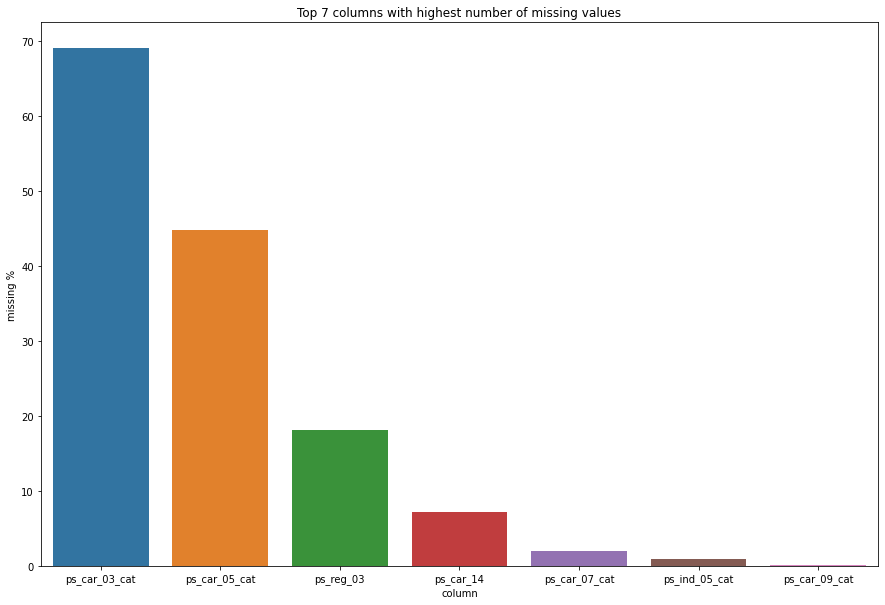

In [ ]:
## Ckeck for the highest percentage of missing values in the dataset. 

print('Nan_values = ', df.isna().sum().sum())
print()
print()
print('Since -1 is presnt it can be also considered as missing values')
print()
df_missing = pd.DataFrame({'column' : df.columns, 'missing %' : ((df == -1).sum()/df.shape[0]*100)})
df_missing_7 = df_missing.nlargest(7, 'missing %')
plt.figure(figsize=(15,10))
sns.barplot(data=df_missing_7, x = 'column', y='missing %')
plt.title('Top 7 columns with highest number of missing values')
plt.show()

***Insights:***
- Here we can see that there is no 0 values present in the data

- But there are many -1 values, which are considered as the missing values

- ps_car_03_cat is having almost 69% of the missing values.

- ps_car_05_cat is having almsot 45% of missing values

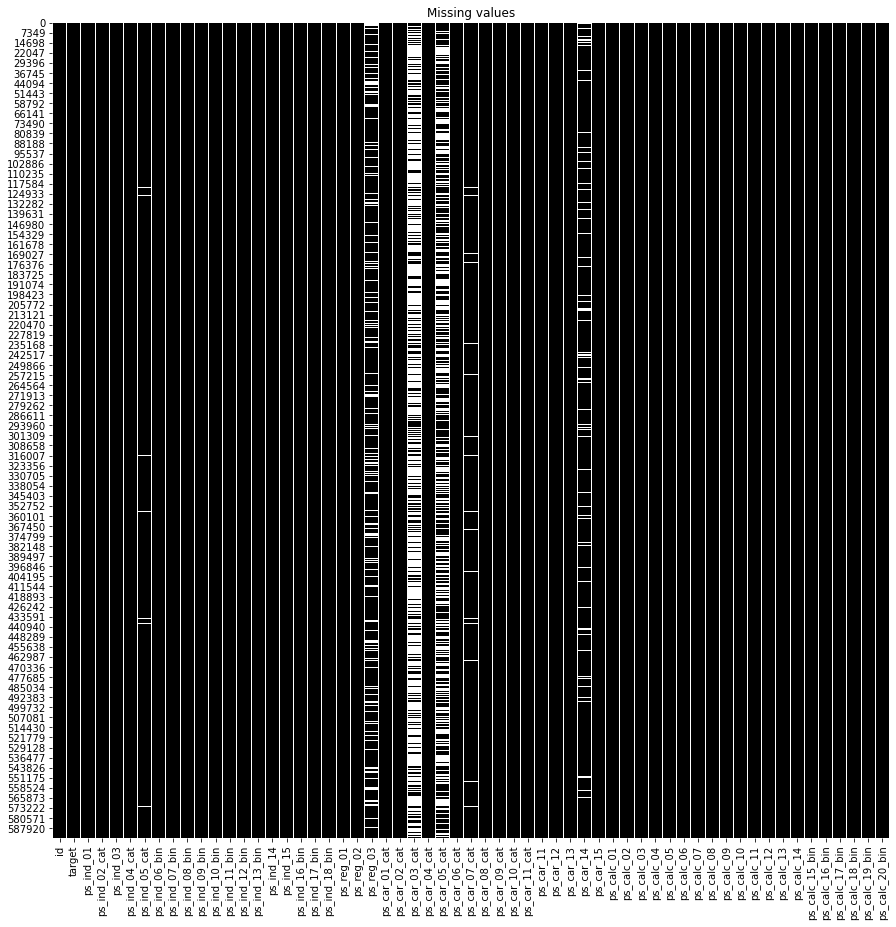

In [ ]:
# Using heatmap for better understanding

plt.figure(figsize=(15,15))
sns.heatmap(df == -1, cmap='gray',cbar=False)
plt.title('Missing values')
plt.show()

***Insight:***
- ps_car_03_cat and ps_car_05_cat is having too many missing values so its better to drop that 2 columns

In [ ]:
#dropping ps_car_03_cat and ps_car_05_cat

df = df.drop(columns=['ps_car_03_cat','ps_car_05_cat'])

### b. Seperating into categorical, binaray,ordinal,continous

In [ ]:
# categorical and binary
features = df.columns.tolist()

cat_feature = [c for c in features if 'cat' in c]
bin_feature = [b for b in features if 'bin' in b]

cat_df = pd.DataFrame({'categorical feature' : cat_feature})
bin_df = pd.DataFrame({'binary feature' : bin_feature})

# ordinal features

int_features = df.select_dtypes(include=['int64']).columns.tolist()

ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'target' not in o and 'id' not in o)]
ordinal_df = pd.DataFrame({'ordinal features' : ordinal_features})

# continous features

cont_features = df.select_dtypes(include=['float64']).columns.tolist()
cont_df = pd.DataFrame({'continous feature' : cont_features })

### c. Categorical features

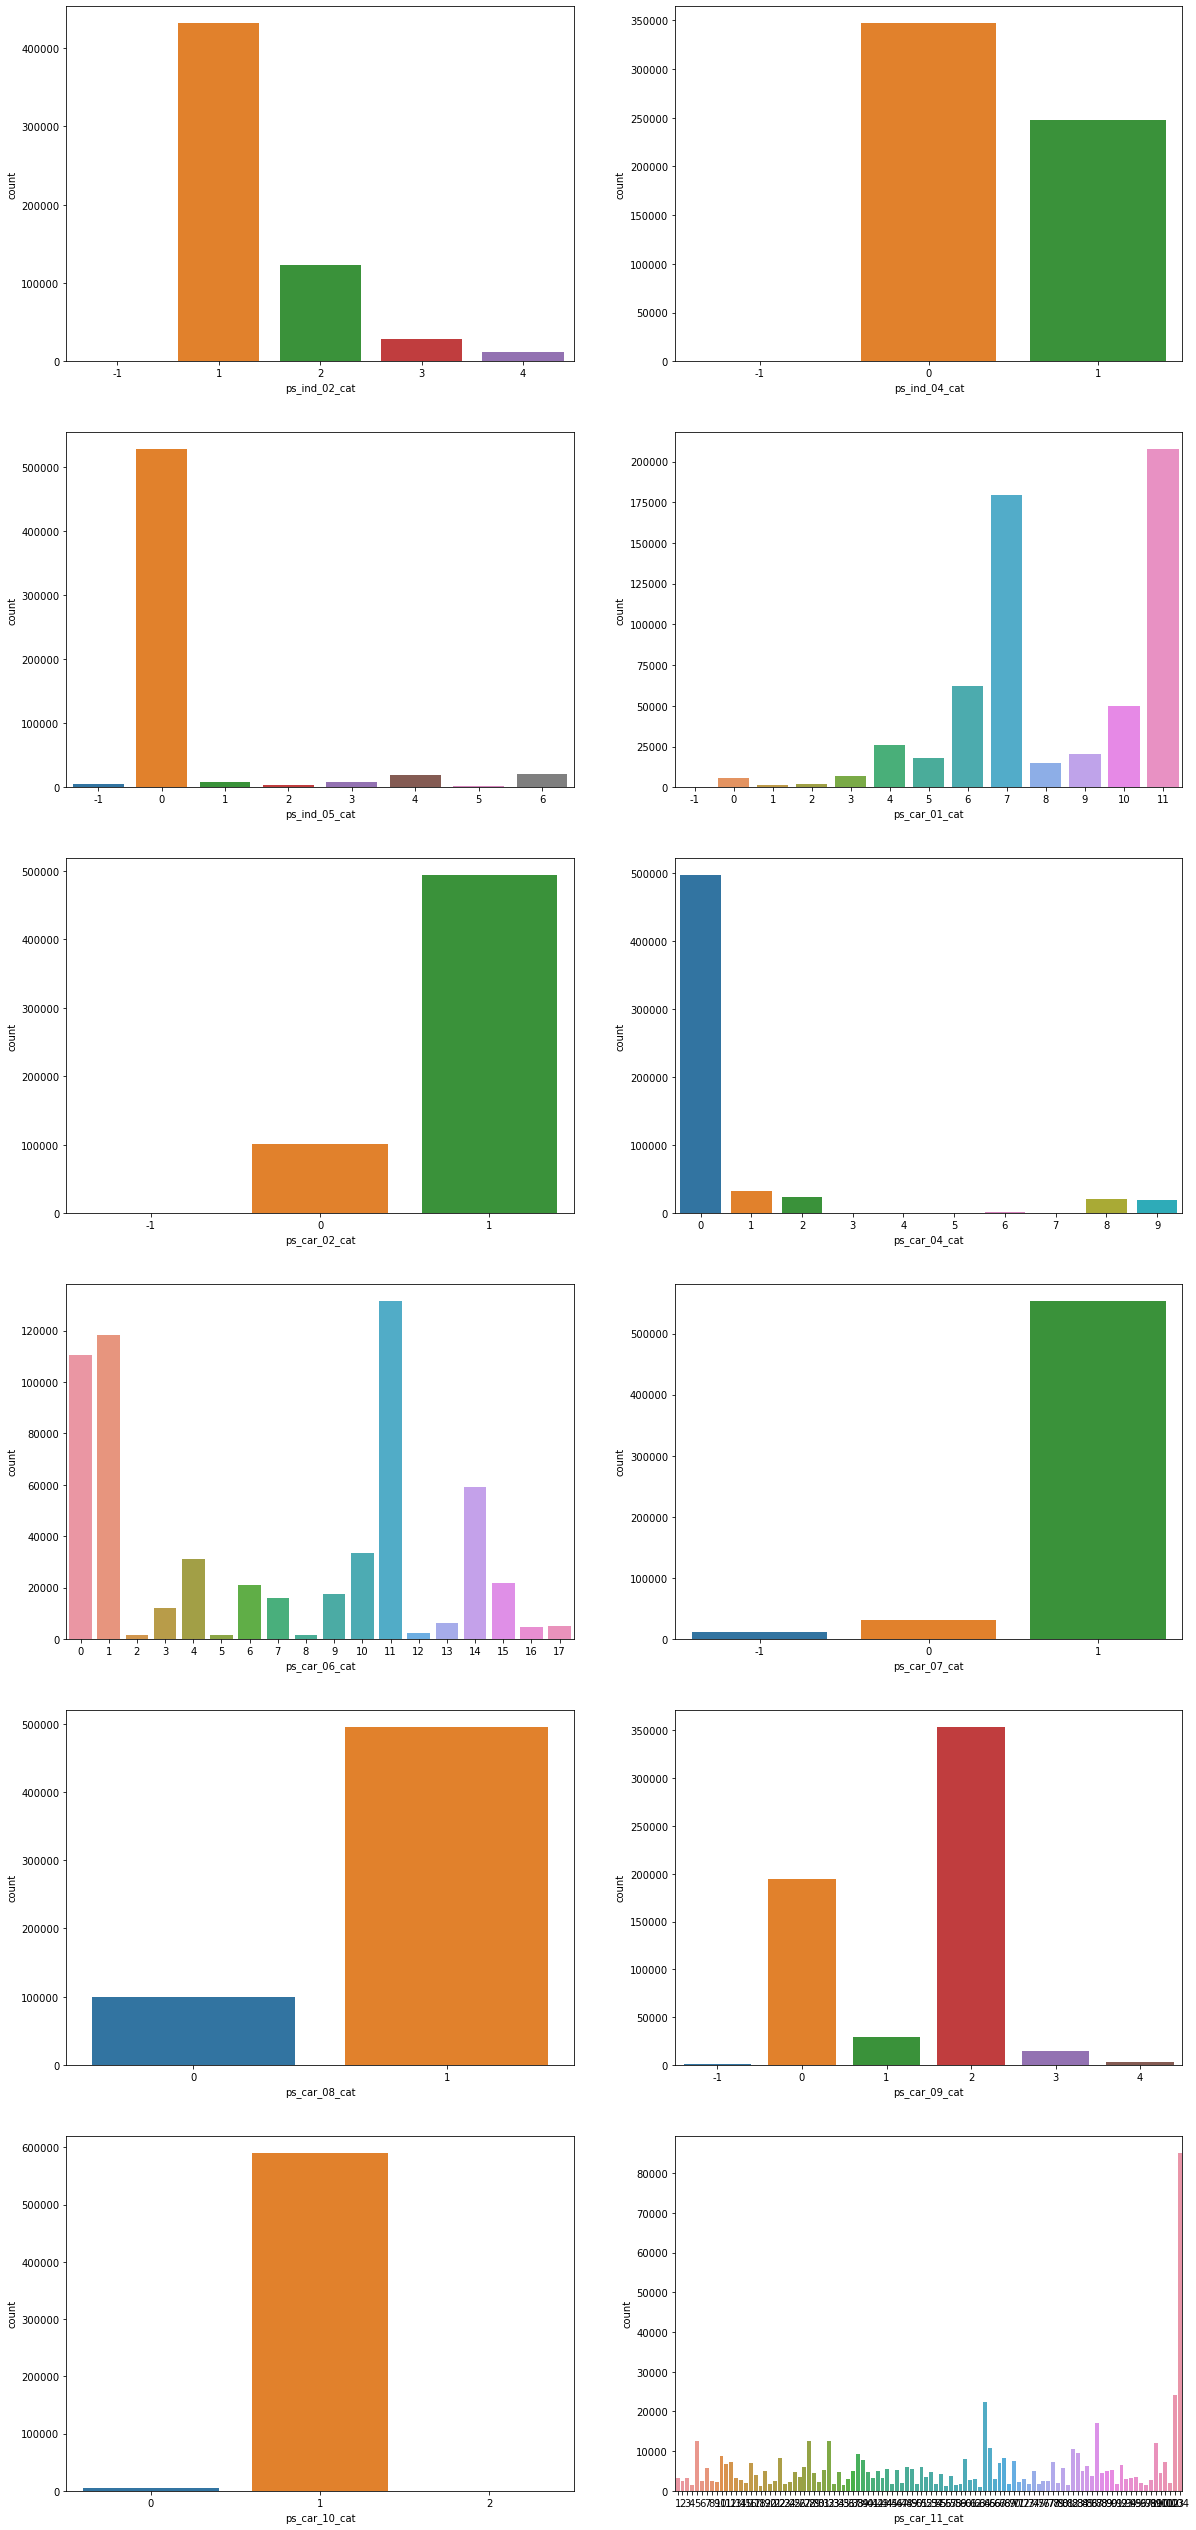

In [ ]:
## Plot shows categorical features and its counts.

row = len(cat_feature)
col = 2
sub = 1
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cat_feature)):
    plt.subplot(row,col,sub)
    sns.countplot(x = df[cat_feature[i]])
    sub +=1
plt.show()

***Insights:***
- 'ps_car_11_cat' has too many categories

- ps_car_08_cat is having exactly 2 categories but it is mentioned as category

- ps_car_10_cat is having mostly 1

- -1 indicates the missing values. for now lets keep this missing values

In [ ]:
# Missing values details
(df[cat_feature] == -1 ).sum()

ps_ind_02_cat      216
ps_ind_04_cat       83
ps_ind_05_cat     5809
ps_car_01_cat      107
ps_car_02_cat        5
ps_car_04_cat        0
ps_car_06_cat        0
ps_car_07_cat    11489
ps_car_08_cat        0
ps_car_09_cat      569
ps_car_10_cat        0
ps_car_11_cat        0
dtype: int64

d. Binary features

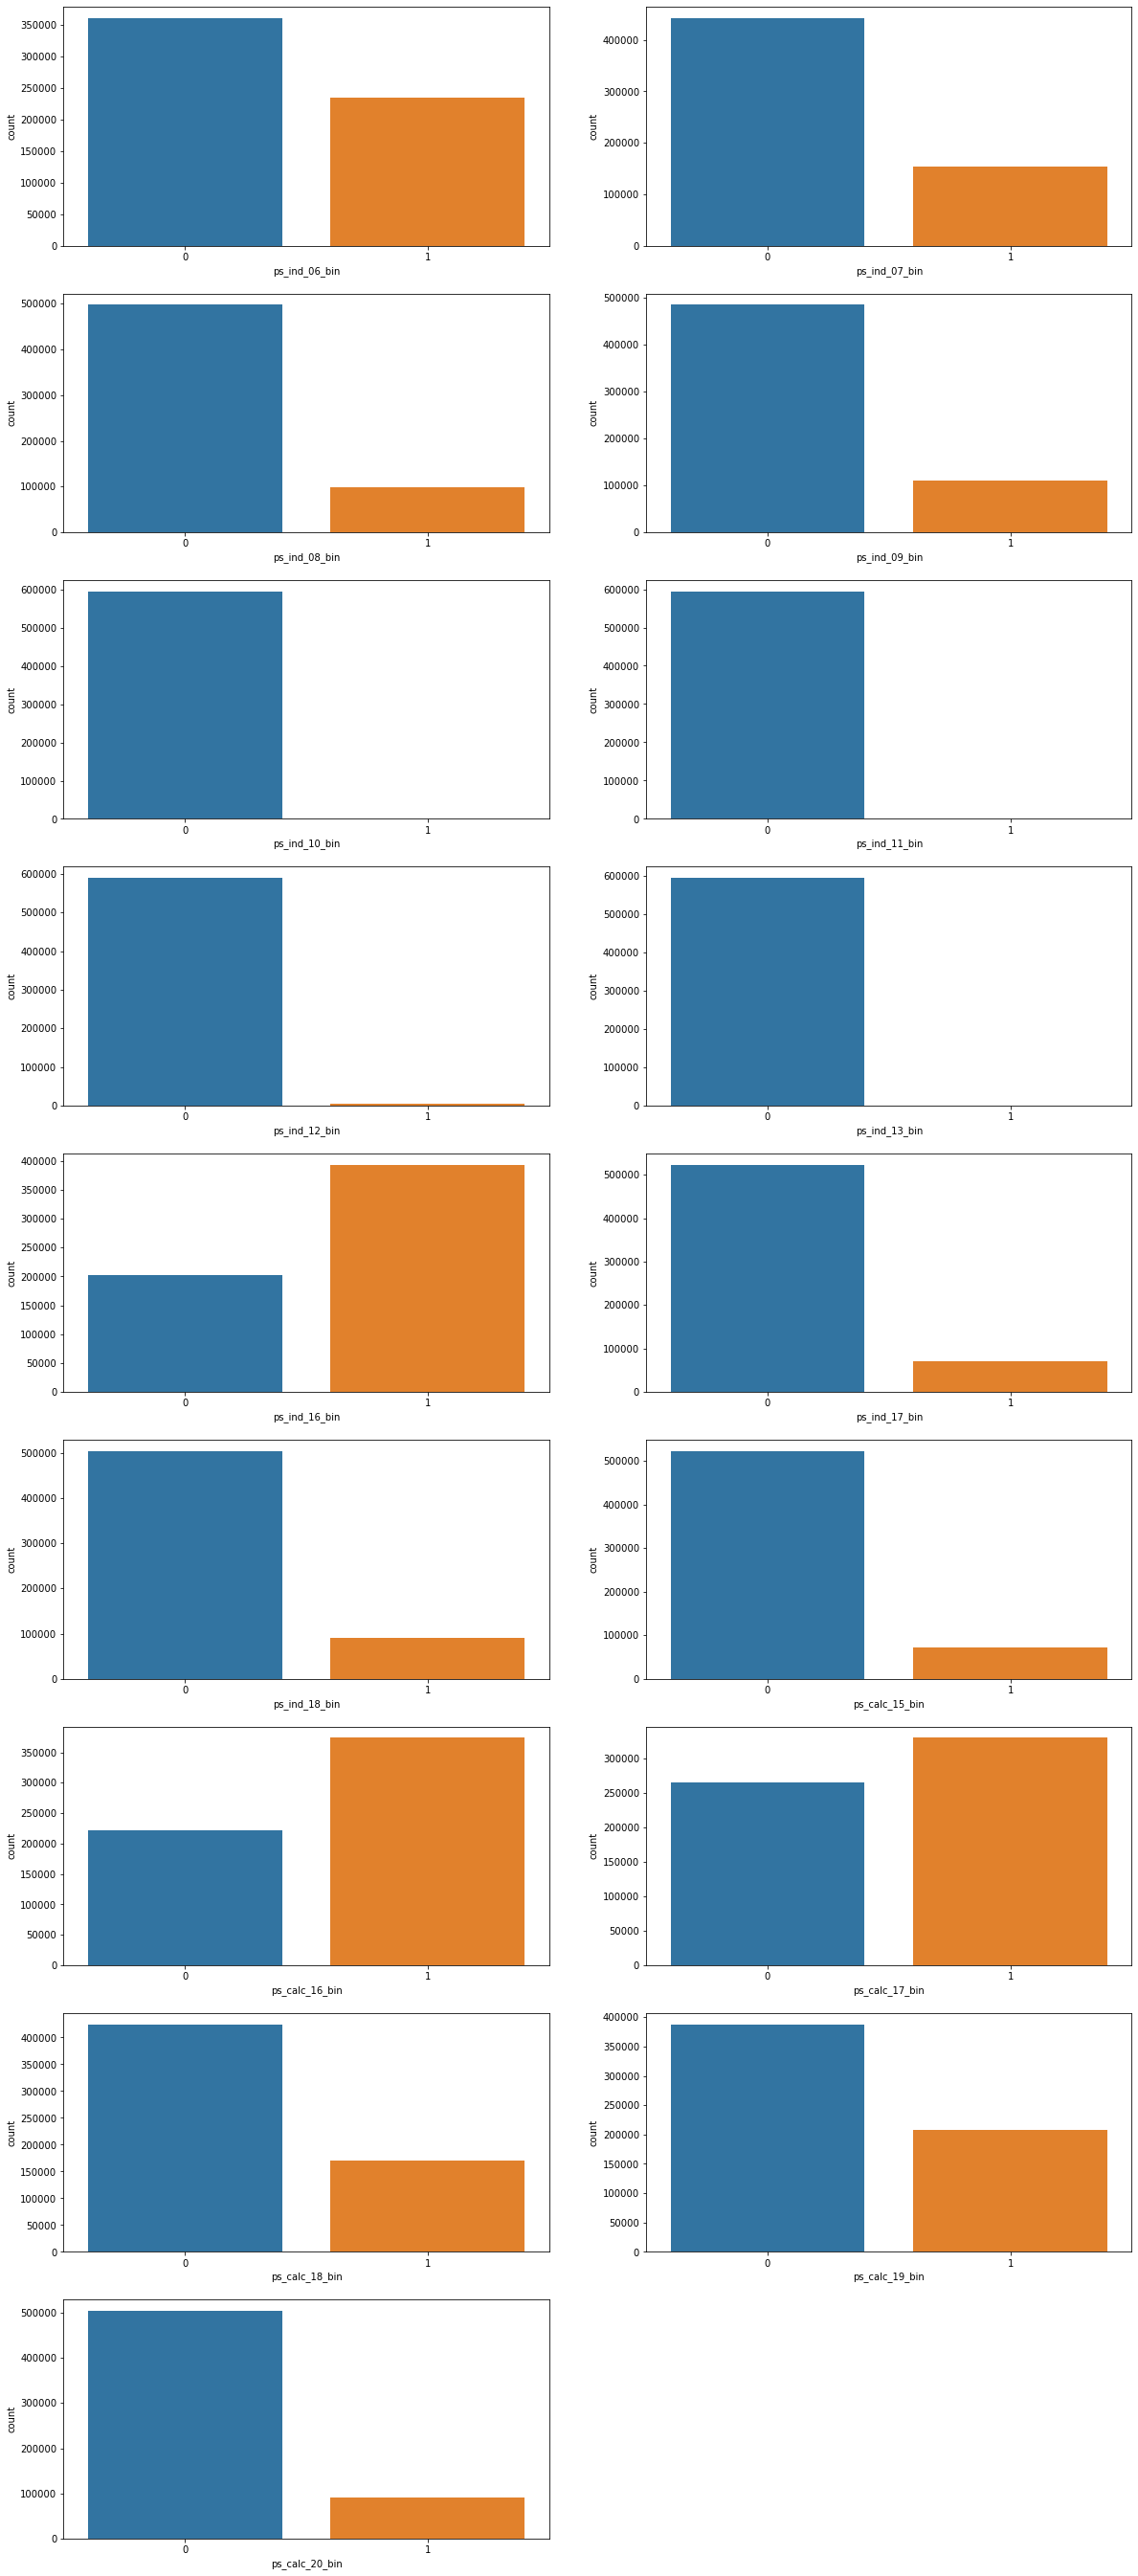

In [ ]:
## Plots show Binary features and its counts.

row = len(bin_feature)
col = 2
sub = 1
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(bin_feature)):
    plt.subplot(row,col,sub)
    sns.countplot(x = df[bin_feature[i]])
    sub +=1
plt.show()

***Insights:***
- 'ps_ind_10_bin' and 'ps_ind_11_bin', 'ps_ind_12_bin' and 'ps_ind_13_bin' are almost 0. So this features doesnot have any contribution for model predictions

- No missing values are present

e. Ordinal features

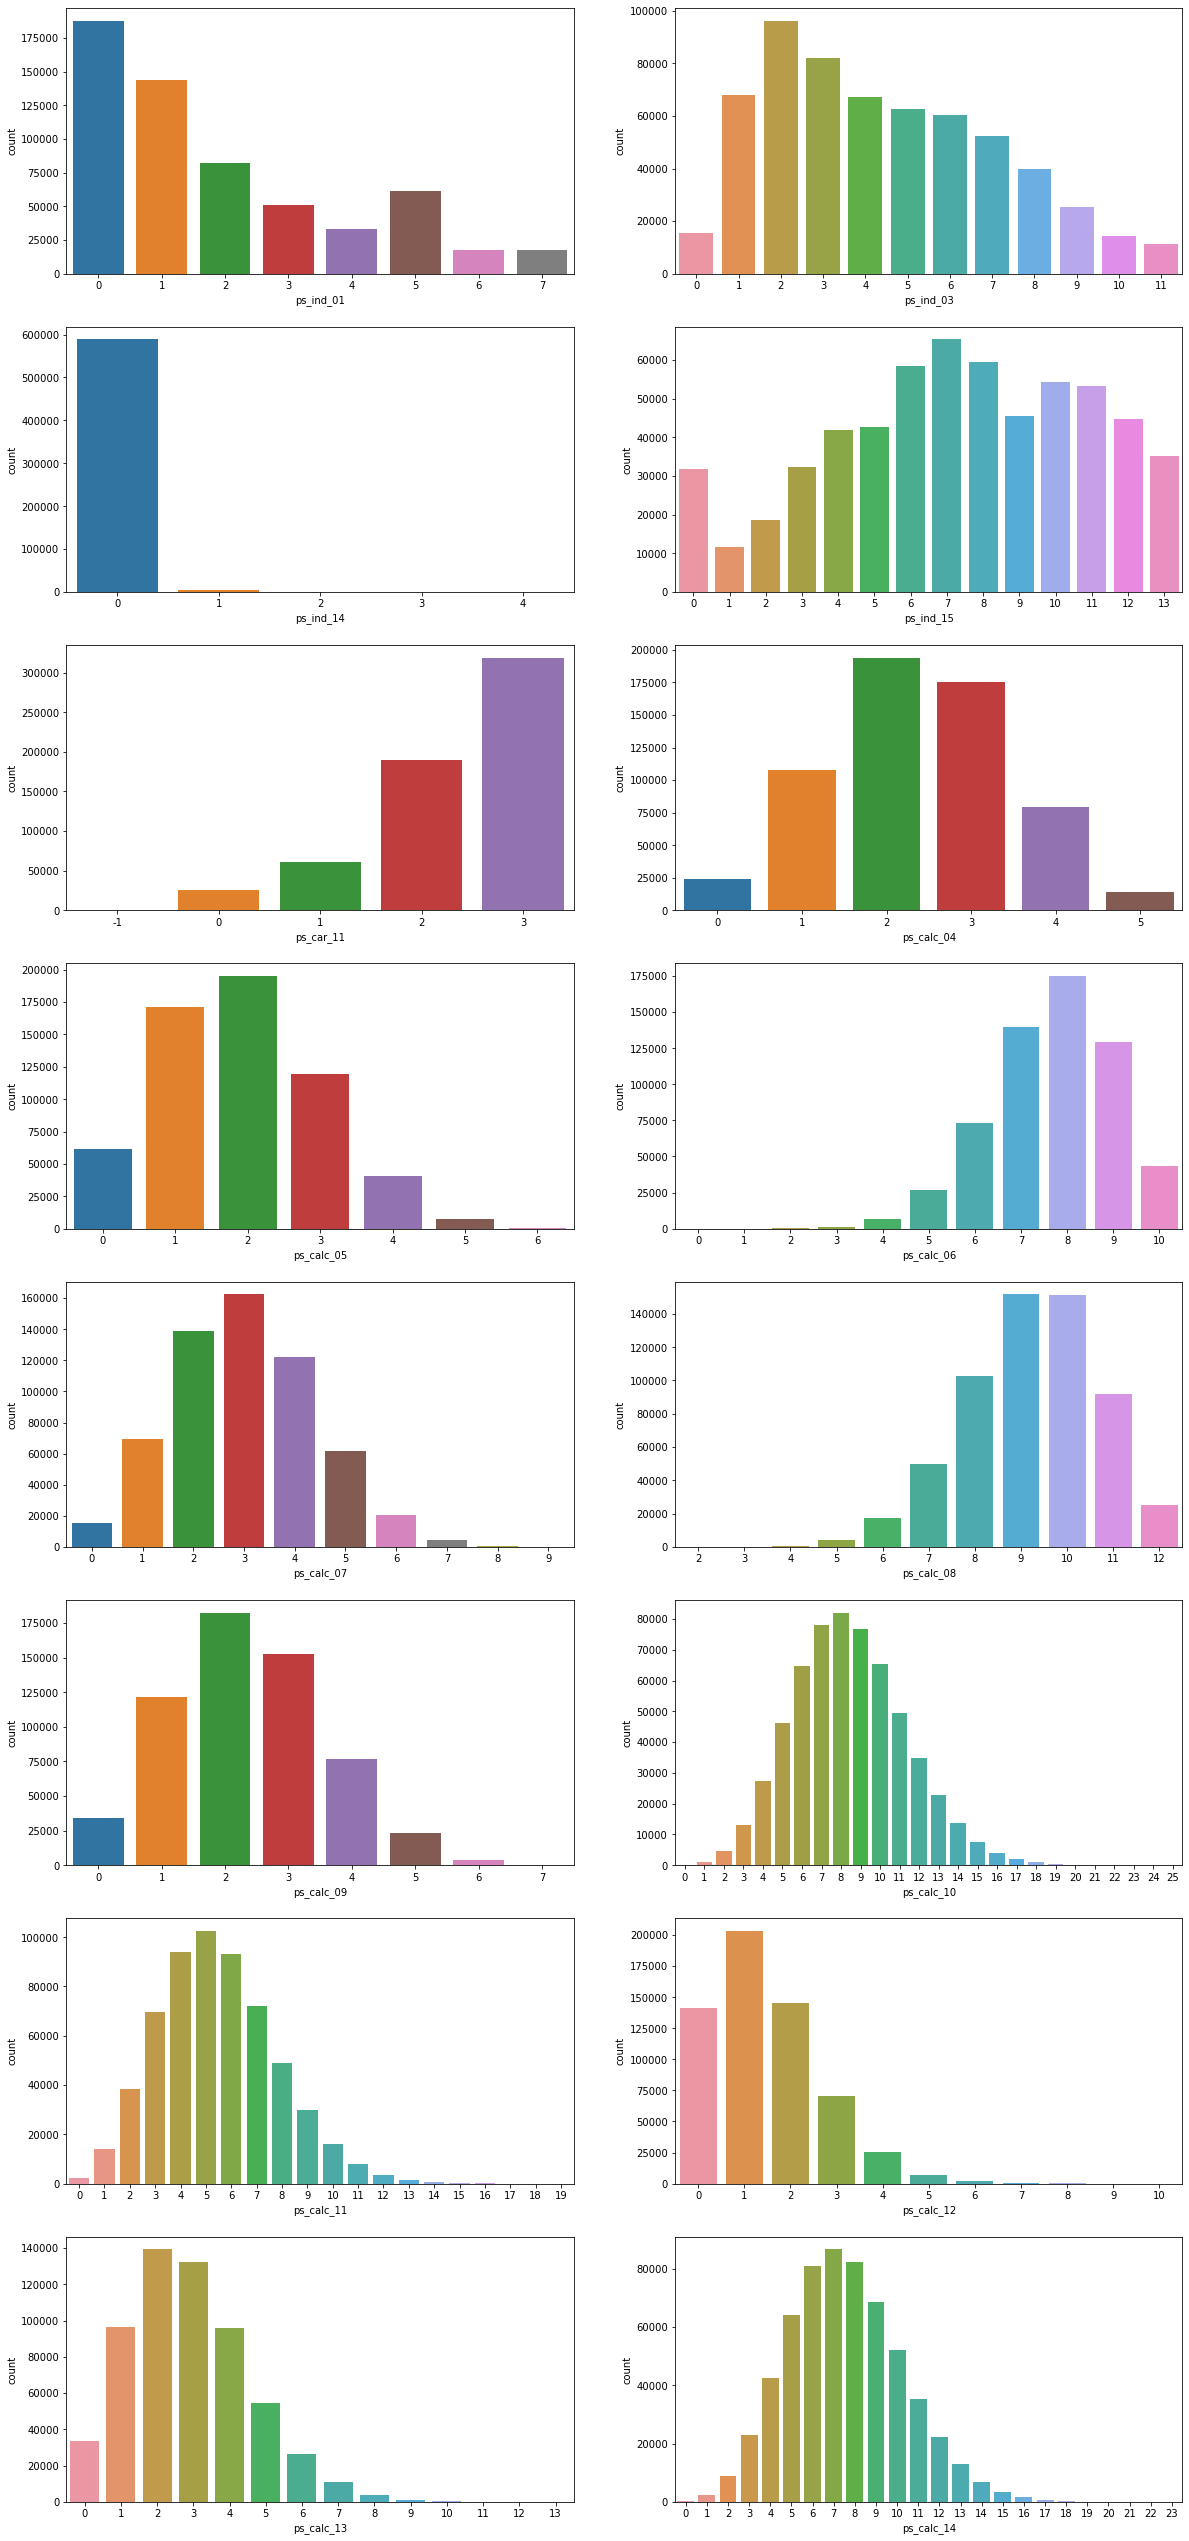

In [ ]:
## Ploting Ordinal features with its counts.
 
row = len(ordinal_features)
col = 2
sub = 1
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(ordinal_features)):
    plt.subplot(row,col,sub)
    sns.countplot(x = df[ordinal_features[i]])
    sub +=1
plt.show()

***Insights:***
- ps_ind_14 is having majority of the values as 0

- ps_car_11 is having missing values. Since only 5 missing values are present,let's keep it for now

### f. Continuous features

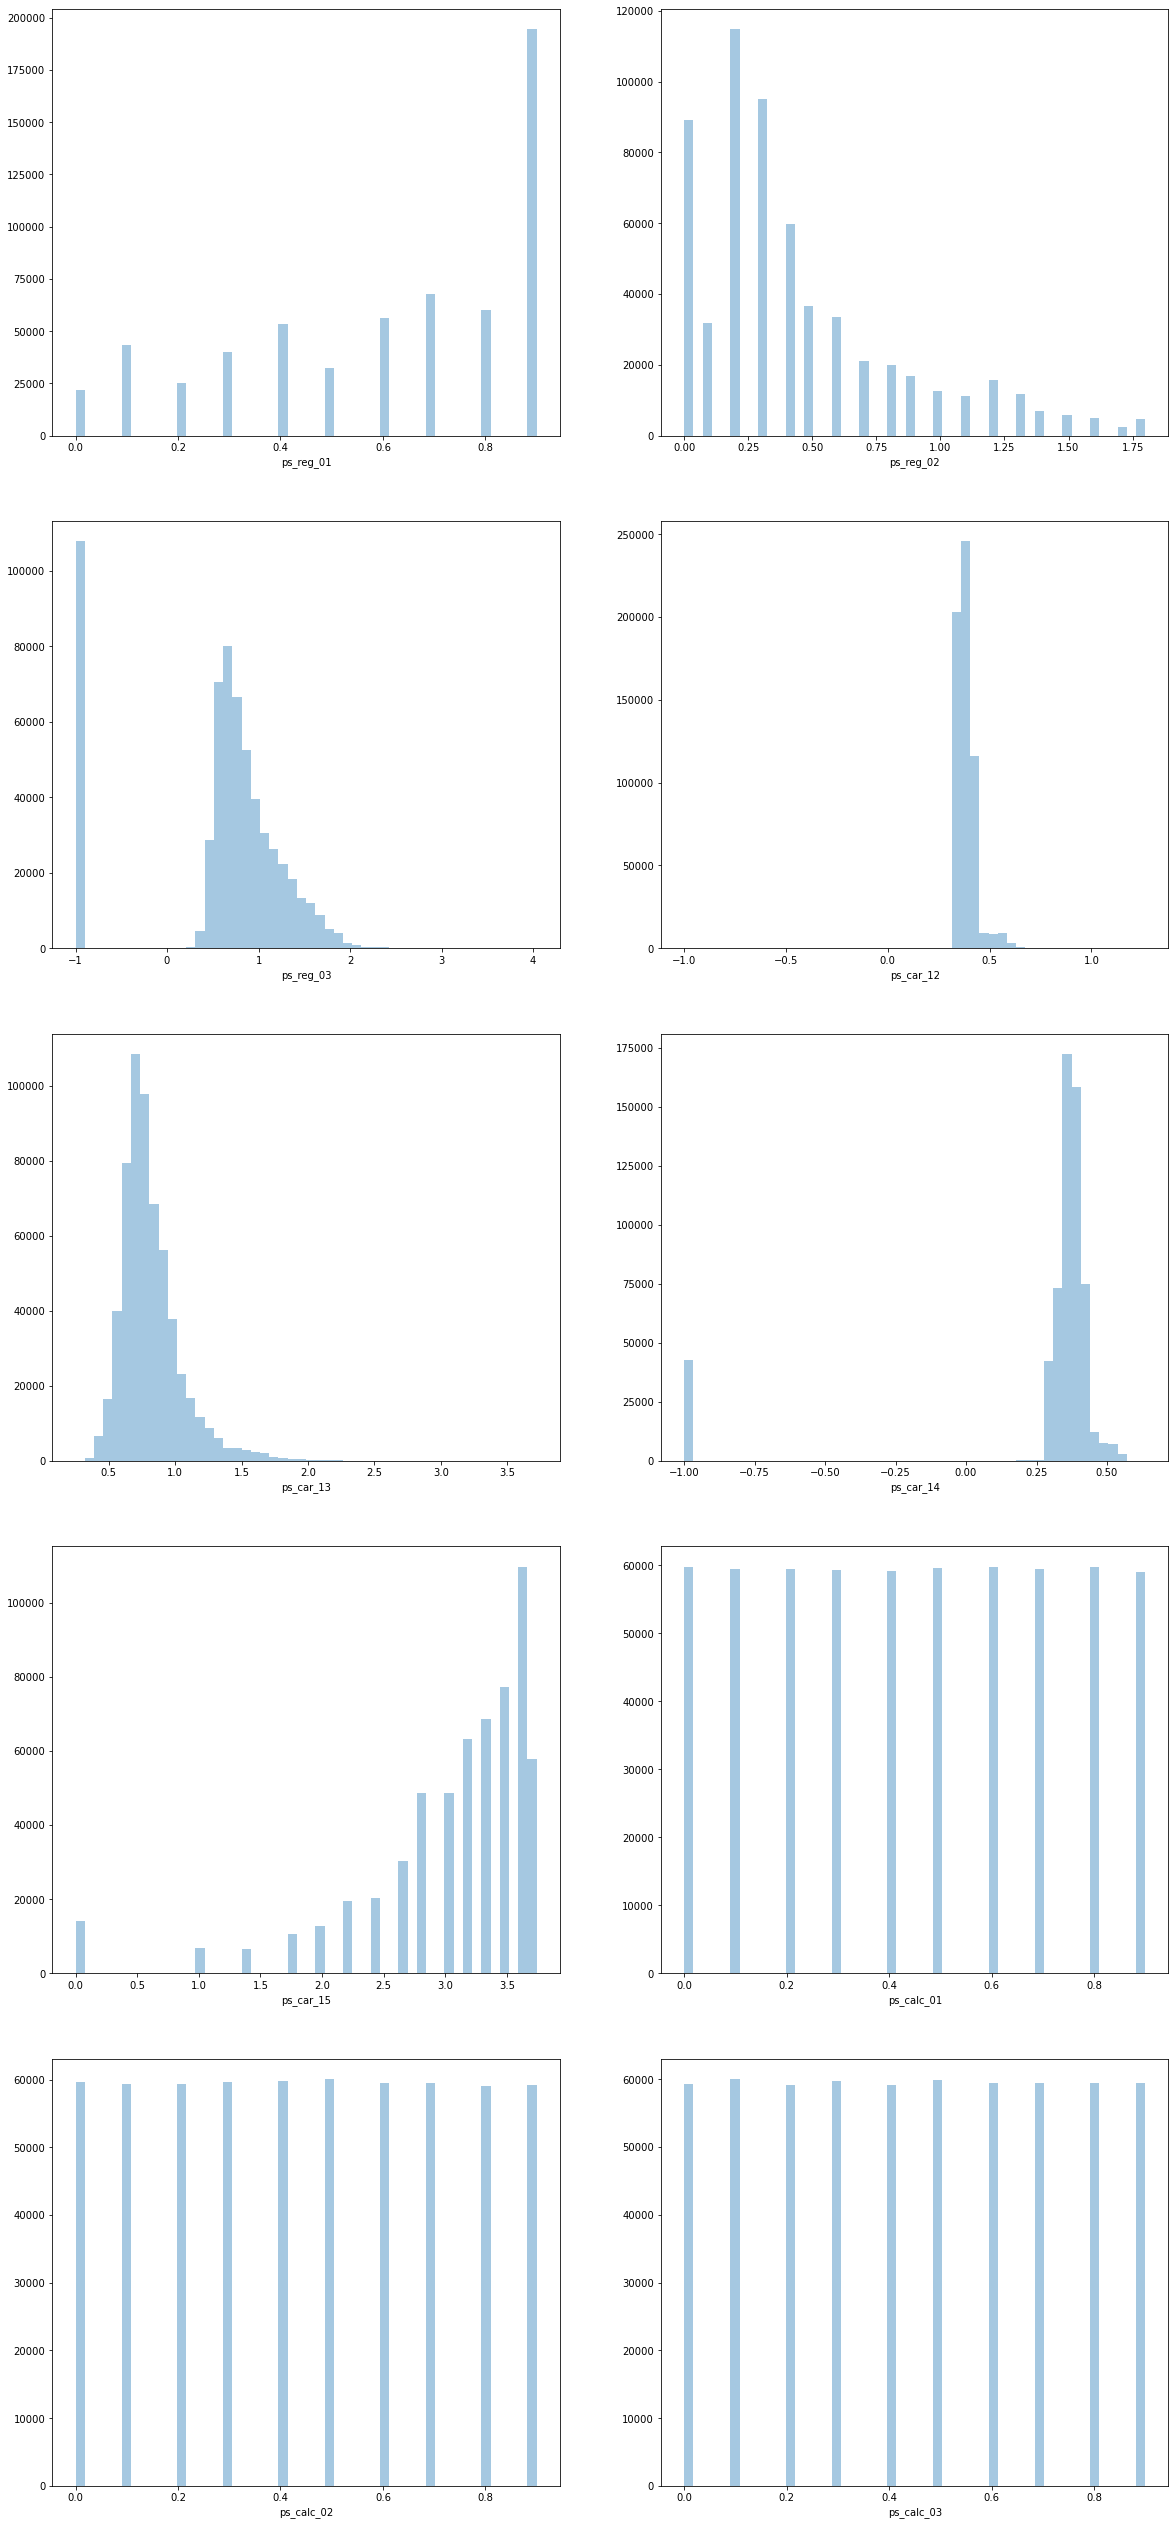

In [ ]:
## Plotting Continues feature and its counts.

row = len(cont_features)
col = 2
sub = 1
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cont_features)):
    plt.subplot(row,col,sub)
    sns.distplot(df[cont_features[i]],kde = False)
    sub +=1
plt.show()

***Insights:***
- ps_reg_03 is right skewed and have many missing values
- ps_car_12 is having very less missing values so lets keep like that for now
- ps_car_14 is also right skewed and has many missing values

In [ ]:
# Missing values details

(df[cont_features]==-1).sum()

ps_reg_01          0
ps_reg_02          0
ps_reg_03     107772
ps_car_12          1
ps_car_13          0
ps_car_14      42620
ps_car_15          0
ps_calc_01         0
ps_calc_02         0
ps_calc_03         0
dtype: int64

### g. Co-relation between categorical features

Text(0.5, 1.0, 'corelation between categorical variable')

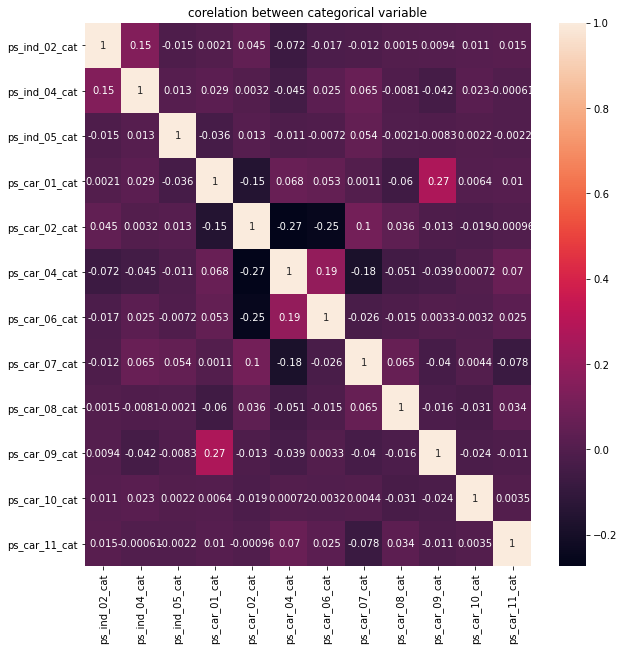

In [ ]:
d = df[cat_feature]
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),annot=True)
plt.title('corelation between categorical variable')

***Insights:***
- ps_ind_02_cat is having maximum corelation with ps_ind_04_cat
- From this it is clear that the categorical features are not co-related to each other

### h. co-relation between binary feaures

Text(0.5, 1.0, 'co-relation between binary feaures')

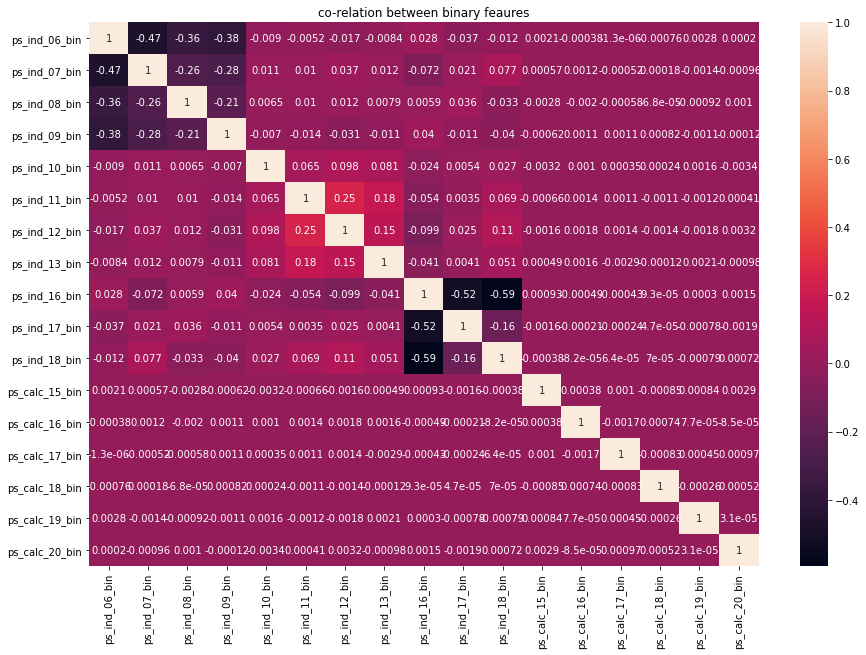

In [ ]:
a = df[bin_feature]
plt.figure(figsize=(15,10))
sns.heatmap(a.corr(),annot=True)
plt.title('co-relation between binary feaures')

**Insights:**
- ps_ind_06_bin is highly negatively co-related with ps_ind_07_bin,ps_ind_08_bin and ps_ind_09_bin

- For now lets keep this. Will deal with it later

### i. co_relation between continous feature

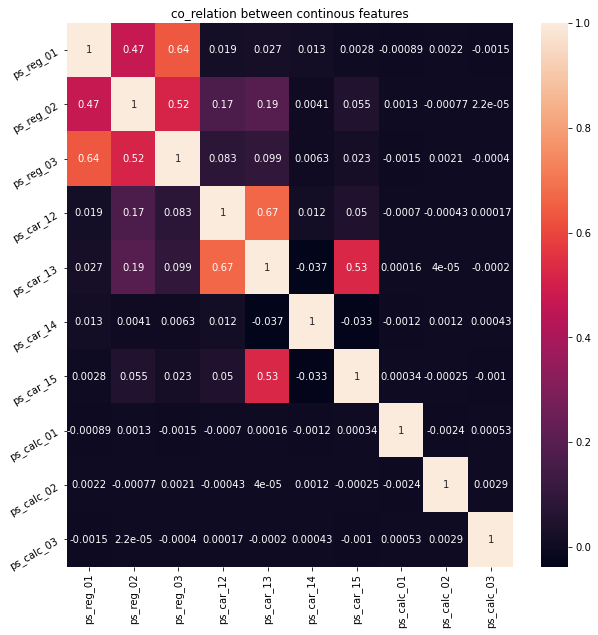

In [ ]:
a = df[cont_features]
plt.figure(figsize=(10,10))
ax=sns.heatmap(a.corr(),annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30) 

plt.title('co_relation between continous features')
plt.show()

***Insights:***
- ps_reg_02 and ps_reg_03 is having the highest co-relation (about 52%)

- ps_reg_01 and ps_reg_02 is having a co_relation of 47%.

- ps_car_12 and ps_car_13 is having a corelation of 67%.

- ps_car_14 and ps_car_12 is having a co_relation of 57%.

- ps_car_13 and ps_car_15 is having a co_relaton of 53%.

- ps_car_13 and ps_car_14 is having a c0_realtion of 43%.

# 4. Removing missing values

In [ ]:
df = df.replace(-1, np.NAN) # replace the -1 values with nan

df = df.dropna()

df.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


- Sucessfully removed missing values. This was done on the basis of considering many trail and error method. While removing the missing values our model was able to give correct predictions.

# 5. Defining the independent and dependent variable

In [ ]:
x = df.drop(columns=['id','target'])
y = df.target

In [ ]:
x.shape,y.shape

((443531, 55), (443531,))

# 6. Modelling


## XgBoost

###  Feature importance using XgBoost

In [ ]:
model = XGBClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.01649062 0.02855472 0.03357328 0.02049953 0.04495305 0.07439395
 0.05278547 0.04520147 0.04423624 0.         0.         0.
 0.         0.         0.0314928  0.04344142 0.0471262  0.
 0.02477349 0.02727295 0.02762496 0.02518188 0.         0.01708019
 0.00851497 0.0354957  0.01459572 0.02792453 0.0112441  0.01347674
 0.02590807 0.00908755 0.06573229 0.02026105 0.0158878  0.01070127
 0.         0.01218546 0.0108858  0.00828043 0.00991381 0.01606297
 0.00944103 0.         0.00840599 0.01075162 0.         0.0145925
 0.01306039 0.01037907 0.         0.         0.01252882 0.
 0.        ]


In [ ]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

In [ ]:
imp_xg = model.feature_importances_
df1 = pd.DataFrame(data=imp_xg,columns=['feature_importance'],index=['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'])

In [ ]:
# Top 25 important features

x_xg = df1.sort_values(by='feature_importance',ascending=True).head(25).index

In [ ]:
x_xg = df[x_xg]
y = df.target

### 2. Balancing imbalanced dataset

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x_xg_sm, y_xg_sm = smote.fit_resample(x_xg,y)

#y_xg_sm.value_counts()

### 3. Splitting into train and test

In [ ]:
x_train_xg,x_test_xg,y_train_xg,y_test_xg = train_test_split(x_xg_sm, y_xg_sm, test_size=0.2, random_state=15, stratify=y_xg_sm)

### 4. Modelling with Hyperparameter tuning

In [ ]:
model_xg = XGBClassifier(
    random_state=25,
    max_depth=10,
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=0.88,
    reg_lambda=1,
    reg_alpha=1
)
model_xg.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.88, verbosity=1)

In [ ]:
## Prediction on test data

y_pred = model_xg.predict(x_test_xg)
cn = confusion_matrix(y_test_xg,y_pred)
print('Confusion matrix : ', cn ,'\n')
ac = accuracy_score(y_test_xg,y_pred)
print('accuracy score :', ac, '\n')
print(classification_report(y_test_xg,y_pred))

Confusion matrix :  [[85416     6]
 [ 3280 82141]] 

accuracy score : 0.9807659664136078 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     85422
           1       1.00      0.96      0.98     85421

    accuracy                           0.98    170843
   macro avg       0.98      0.98      0.98    170843
weighted avg       0.98      0.98      0.98    170843



In [ ]:
pd.crosstab(y_test_xg,y_pred)

col_0,0,1
row_0,,
0,85416,6
1,3280,82141


### 5. K_fold cross Validation

In [ ]:
scores = cross_val_score(model_xg, x_xg_sm,y_xg_sm, cv=5, scoring='accuracy')
print(scores)
print('MEAN : ',scores.mean())
print('STD : ', scores.std())

[0.90382983 0.99984781 0.99987708 0.9999122  0.99987708]
MEAN :  0.9806688007894481
STD :  0.03841948977814313


***Insight:***
- Since K_fold mean is close to the predicted value of the xgboost we can conclude that our model is not overfitting. We are also having less standard deviation

## Random Forest

### 1. Feature importance using random forest

In [ ]:
rand = RandomForestClassifier()
rand.fit(x,y)
print(rand.feature_importances_)

[0.02432337 0.01134801 0.03213583 0.00795052 0.00851082 0.00423966
 0.00384634 0.00432461 0.0043727  0.00010467 0.00029521 0.0012279
 0.00024697 0.00133009 0.03270274 0.00500483 0.0034735  0.00427017
 0.02273741 0.03060821 0.05982085 0.0216252  0.00421968 0.00574461
 0.02387368 0.00403219 0.00419804 0.01273713 0.00159463 0.03243163
 0.01069593 0.02117089 0.05965896 0.04486741 0.02665765 0.03163854
 0.0311768  0.03132141 0.02421101 0.02430049 0.02665518 0.02817598
 0.02861412 0.02566047 0.03825398 0.0354396  0.02358758 0.02997823
 0.03724436 0.00619699 0.00864483 0.00895885 0.00820789 0.00861382
 0.00673784]


In [ ]:
imp_rand = rand.feature_importances_
df2 = pd.DataFrame(data=imp_rand,columns=['feature_importance'],index=['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'])

In [ ]:
x_rand = df2.sort_values(by='feature_importance', ascending=False).head(25).index

In [ ]:
x_rand = df[x_rand]
y = df.target

### 2. Balancing the imbalanced data

In [ ]:
x_rand_sm,y_rand_sm = smote.fit_resample(x_rand, y)
#y_rand_sm.value_counts()

### 3. Splitting into train and test

In [ ]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_rand_sm, y_rand_sm, test_size=0.2, random_state=15, stratify=y_rand_sm)

### 4. Modelling with hyperparamter tuning

In [ ]:
model_ran = RandomForestClassifier(
    random_state=15,
    n_estimators=70,
    max_depth=10
)

# fit the model
model_ran.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model_ran.predict(x_test_r)
cn = confusion_matrix(y_test_r,y_pred)
print('Confusion matrix : ', cn ,'\n')
ac = accuracy_score(y_test_r,y_pred)
print('accuracy score :', ac, '\n')
print(classification_report(y_test_r,y_pred))

Confusion matrix :  [[79916  5506]
 [ 7102 78319]] 

accuracy score : 0.926201249100051 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     85422
           1       0.93      0.92      0.93     85421

    accuracy                           0.93    170843
   macro avg       0.93      0.93      0.93    170843
weighted avg       0.93      0.93      0.93    170843



In [ ]:
pd.crosstab(y_test_r,y_pred)

col_0,0,1
row_0,,
0,79916,5506
1,7102,78319


***Insight:***
- This model is not good as XgBoost. Because Xgboost is having better classification report than that of Random forest.

## CatBoost

In [ ]:
model_cat = CatBoostClassifier()
model_cat.fit(x, y)
# feature importance
print(model_cat.feature_importances_)

Learning rate set to 0.13905
0:	learn: 0.5087944	total: 452ms	remaining: 7m 32s
1:	learn: 0.3883920	total: 551ms	remaining: 4m 34s
2:	learn: 0.3104734	total: 643ms	remaining: 3m 33s
3:	learn: 0.2602971	total: 756ms	remaining: 3m 8s
4:	learn: 0.2274874	total: 866ms	remaining: 2m 52s
5:	learn: 0.2055606	total: 949ms	remaining: 2m 37s
6:	learn: 0.1907637	total: 1.03s	remaining: 2m 25s
7:	learn: 0.1808155	total: 1.1s	remaining: 2m 16s
8:	learn: 0.1735681	total: 1.21s	remaining: 2m 13s
9:	learn: 0.1687850	total: 1.3s	remaining: 2m 8s
10:	learn: 0.1651052	total: 1.41s	remaining: 2m 6s
11:	learn: 0.1624976	total: 1.51s	remaining: 2m 4s
12:	learn: 0.1607972	total: 1.61s	remaining: 2m 2s
13:	learn: 0.1593912	total: 1.73s	remaining: 2m 1s
14:	learn: 0.1583674	total: 1.85s	remaining: 2m 1s
15:	learn: 0.1576620	total: 1.97s	remaining: 2m 1s
16:	learn: 0.1571116	total: 2.08s	remaining: 2m
17:	learn: 0.1566176	total: 2.17s	remaining: 1m 58s
18:	learn: 0.1562985	total: 2.28s	remaining: 1m 57s
19:	lea

158:	learn: 0.1511955	total: 17.8s	remaining: 1m 33s
159:	learn: 0.1511736	total: 17.9s	remaining: 1m 33s
160:	learn: 0.1511575	total: 18s	remaining: 1m 33s
161:	learn: 0.1511376	total: 18.2s	remaining: 1m 34s
162:	learn: 0.1511187	total: 18.3s	remaining: 1m 33s
163:	learn: 0.1510960	total: 18.4s	remaining: 1m 33s
164:	learn: 0.1510789	total: 18.5s	remaining: 1m 33s
165:	learn: 0.1510694	total: 18.6s	remaining: 1m 33s
166:	learn: 0.1510360	total: 18.7s	remaining: 1m 33s
167:	learn: 0.1510153	total: 18.8s	remaining: 1m 33s
168:	learn: 0.1509948	total: 18.9s	remaining: 1m 33s
169:	learn: 0.1509706	total: 19s	remaining: 1m 32s
170:	learn: 0.1509550	total: 19.1s	remaining: 1m 32s
171:	learn: 0.1509301	total: 19.2s	remaining: 1m 32s
172:	learn: 0.1509044	total: 19.4s	remaining: 1m 32s
173:	learn: 0.1508847	total: 19.5s	remaining: 1m 32s
174:	learn: 0.1508604	total: 19.6s	remaining: 1m 32s
175:	learn: 0.1508345	total: 19.7s	remaining: 1m 32s
176:	learn: 0.1508153	total: 19.8s	remaining: 1m 3

314:	learn: 0.1479281	total: 36.4s	remaining: 1m 19s
315:	learn: 0.1479199	total: 36.5s	remaining: 1m 19s
316:	learn: 0.1478973	total: 36.6s	remaining: 1m 18s
317:	learn: 0.1478708	total: 36.7s	remaining: 1m 18s
318:	learn: 0.1478497	total: 36.8s	remaining: 1m 18s
319:	learn: 0.1478282	total: 37s	remaining: 1m 18s
320:	learn: 0.1478003	total: 37.1s	remaining: 1m 18s
321:	learn: 0.1477844	total: 37.2s	remaining: 1m 18s
322:	learn: 0.1477609	total: 37.3s	remaining: 1m 18s
323:	learn: 0.1477450	total: 37.4s	remaining: 1m 18s
324:	learn: 0.1477203	total: 37.5s	remaining: 1m 17s
325:	learn: 0.1477061	total: 37.6s	remaining: 1m 17s
326:	learn: 0.1476855	total: 37.7s	remaining: 1m 17s
327:	learn: 0.1476716	total: 37.8s	remaining: 1m 17s
328:	learn: 0.1476559	total: 37.9s	remaining: 1m 17s
329:	learn: 0.1476295	total: 38s	remaining: 1m 17s
330:	learn: 0.1476008	total: 38.1s	remaining: 1m 17s
331:	learn: 0.1475785	total: 38.2s	remaining: 1m 16s
332:	learn: 0.1475498	total: 38.4s	remaining: 1m 1

472:	learn: 0.1449568	total: 53.2s	remaining: 59.3s
473:	learn: 0.1449277	total: 53.3s	remaining: 59.1s
474:	learn: 0.1449232	total: 53.4s	remaining: 59s
475:	learn: 0.1449131	total: 53.5s	remaining: 58.9s
476:	learn: 0.1448830	total: 53.6s	remaining: 58.7s
477:	learn: 0.1448652	total: 53.7s	remaining: 58.6s
478:	learn: 0.1448428	total: 53.8s	remaining: 58.5s
479:	learn: 0.1448172	total: 53.9s	remaining: 58.4s
480:	learn: 0.1448058	total: 54s	remaining: 58.2s
481:	learn: 0.1447774	total: 54.1s	remaining: 58.1s
482:	learn: 0.1447523	total: 54.2s	remaining: 58s
483:	learn: 0.1447353	total: 54.3s	remaining: 57.8s
484:	learn: 0.1447084	total: 54.4s	remaining: 57.7s
485:	learn: 0.1446792	total: 54.5s	remaining: 57.6s
486:	learn: 0.1446604	total: 54.6s	remaining: 57.5s
487:	learn: 0.1446331	total: 54.7s	remaining: 57.4s
488:	learn: 0.1446069	total: 54.8s	remaining: 57.2s
489:	learn: 0.1445853	total: 54.9s	remaining: 57.1s
490:	learn: 0.1445677	total: 55s	remaining: 57s
491:	learn: 0.1445501	

631:	learn: 0.1420265	total: 1m 9s	remaining: 40.3s
632:	learn: 0.1420049	total: 1m 9s	remaining: 40.1s
633:	learn: 0.1419825	total: 1m 9s	remaining: 40s
634:	learn: 0.1419608	total: 1m 9s	remaining: 39.9s
635:	learn: 0.1419352	total: 1m 9s	remaining: 39.8s
636:	learn: 0.1419117	total: 1m 9s	remaining: 39.7s
637:	learn: 0.1418917	total: 1m 9s	remaining: 39.6s
638:	learn: 0.1418741	total: 1m 9s	remaining: 39.4s
639:	learn: 0.1418471	total: 1m 9s	remaining: 39.3s
640:	learn: 0.1418214	total: 1m 10s	remaining: 39.2s
641:	learn: 0.1418141	total: 1m 10s	remaining: 39.1s
642:	learn: 0.1417968	total: 1m 10s	remaining: 39s
643:	learn: 0.1417737	total: 1m 10s	remaining: 38.9s
644:	learn: 0.1417543	total: 1m 10s	remaining: 38.8s
645:	learn: 0.1417215	total: 1m 10s	remaining: 38.6s
646:	learn: 0.1416967	total: 1m 10s	remaining: 38.5s
647:	learn: 0.1416820	total: 1m 10s	remaining: 38.4s
648:	learn: 0.1416561	total: 1m 10s	remaining: 38.3s
649:	learn: 0.1416336	total: 1m 10s	remaining: 38.2s
650:	l

788:	learn: 0.1392000	total: 1m 24s	remaining: 22.7s
789:	learn: 0.1391757	total: 1m 25s	remaining: 22.6s
790:	learn: 0.1391511	total: 1m 25s	remaining: 22.5s
791:	learn: 0.1391295	total: 1m 25s	remaining: 22.4s
792:	learn: 0.1391135	total: 1m 25s	remaining: 22.3s
793:	learn: 0.1390977	total: 1m 25s	remaining: 22.2s
794:	learn: 0.1390725	total: 1m 25s	remaining: 22s
795:	learn: 0.1390527	total: 1m 25s	remaining: 21.9s
796:	learn: 0.1390407	total: 1m 25s	remaining: 21.8s
797:	learn: 0.1390332	total: 1m 25s	remaining: 21.7s
798:	learn: 0.1390116	total: 1m 25s	remaining: 21.6s
799:	learn: 0.1390021	total: 1m 25s	remaining: 21.5s
800:	learn: 0.1389864	total: 1m 26s	remaining: 21.4s
801:	learn: 0.1389733	total: 1m 26s	remaining: 21.3s
802:	learn: 0.1389533	total: 1m 26s	remaining: 21.2s
803:	learn: 0.1389287	total: 1m 26s	remaining: 21s
804:	learn: 0.1389111	total: 1m 26s	remaining: 20.9s
805:	learn: 0.1388911	total: 1m 26s	remaining: 20.8s
806:	learn: 0.1388696	total: 1m 26s	remaining: 20.

944:	learn: 0.1365219	total: 1m 40s	remaining: 5.83s
945:	learn: 0.1365095	total: 1m 40s	remaining: 5.72s
946:	learn: 0.1364863	total: 1m 40s	remaining: 5.62s
947:	learn: 0.1364693	total: 1m 40s	remaining: 5.51s
948:	learn: 0.1364475	total: 1m 40s	remaining: 5.4s
949:	learn: 0.1364399	total: 1m 40s	remaining: 5.3s
950:	learn: 0.1364324	total: 1m 40s	remaining: 5.19s
951:	learn: 0.1364118	total: 1m 40s	remaining: 5.08s
952:	learn: 0.1363971	total: 1m 40s	remaining: 4.98s
953:	learn: 0.1363833	total: 1m 41s	remaining: 4.87s
954:	learn: 0.1363643	total: 1m 41s	remaining: 4.76s
955:	learn: 0.1363415	total: 1m 41s	remaining: 4.66s
956:	learn: 0.1363217	total: 1m 41s	remaining: 4.55s
957:	learn: 0.1362974	total: 1m 41s	remaining: 4.45s
958:	learn: 0.1362781	total: 1m 41s	remaining: 4.34s
959:	learn: 0.1362720	total: 1m 41s	remaining: 4.23s
960:	learn: 0.1362528	total: 1m 41s	remaining: 4.13s
961:	learn: 0.1362351	total: 1m 41s	remaining: 4.02s
962:	learn: 0.1362149	total: 1m 41s	remaining: 3

In [ ]:
imp_cat = model_cat.feature_importances_
df3 = pd.DataFrame(data=imp_cat,columns=['feature_importance'],index=['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'])

In [ ]:
x_cat =  df3.sort_values(by='feature_importance', ascending=False).head(25).index

In [ ]:
x_cat = df[x_cat]
y = df['target']


### 2. Balancing imbalanced dataset

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x_cat_sm ,y_cat_sm = smote.fit_resample(x_cat, y)
#y_cat_sm.value_counts()

### 3.Splitting into tain and test

In [ ]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_cat_sm, y_cat_sm, test_size=0.2, random_state=15, stratify=y_cat_sm)

### 4.Modelling

In [ ]:
model_cat = CatBoostClassifier(iterations=2000)
model_cat.fit(x_train_c, y_train_c)

Learning rate set to 0.08857
0:	learn: 0.6124624	total: 137ms	remaining: 4m 33s
1:	learn: 0.5930055	total: 278ms	remaining: 4m 37s
2:	learn: 0.5614995	total: 413ms	remaining: 4m 34s
3:	learn: 0.5255946	total: 538ms	remaining: 4m 28s
4:	learn: 0.4811368	total: 696ms	remaining: 4m 37s
5:	learn: 0.4699351	total: 824ms	remaining: 4m 33s
6:	learn: 0.4544417	total: 964ms	remaining: 4m 34s
7:	learn: 0.4284238	total: 1.09s	remaining: 4m 32s
8:	learn: 0.3905380	total: 1.24s	remaining: 4m 33s
9:	learn: 0.3758677	total: 1.36s	remaining: 4m 30s
10:	learn: 0.3558438	total: 1.5s	remaining: 4m 31s
11:	learn: 0.3482675	total: 1.63s	remaining: 4m 30s
12:	learn: 0.3232250	total: 1.79s	remaining: 4m 33s
13:	learn: 0.3003178	total: 1.93s	remaining: 4m 34s
14:	learn: 0.2829843	total: 2.08s	remaining: 4m 35s
15:	learn: 0.2610869	total: 2.21s	remaining: 4m 34s
16:	learn: 0.2404642	total: 2.35s	remaining: 4m 34s
17:	learn: 0.2312101	total: 2.48s	remaining: 4m 33s
18:	learn: 0.2113729	total: 2.63s	remaining: 4

158:	learn: 0.0842682	total: 24.7s	remaining: 4m 45s
159:	learn: 0.0841694	total: 24.8s	remaining: 4m 45s
160:	learn: 0.0841593	total: 25s	remaining: 4m 45s
161:	learn: 0.0841434	total: 25.1s	remaining: 4m 44s
162:	learn: 0.0841274	total: 25.3s	remaining: 4m 44s
163:	learn: 0.0841070	total: 25.4s	remaining: 4m 44s
164:	learn: 0.0840917	total: 25.6s	remaining: 4m 44s
165:	learn: 0.0840691	total: 25.7s	remaining: 4m 44s
166:	learn: 0.0839559	total: 25.9s	remaining: 4m 44s
167:	learn: 0.0839443	total: 26s	remaining: 4m 43s
168:	learn: 0.0839034	total: 26.2s	remaining: 4m 43s
169:	learn: 0.0838993	total: 26.3s	remaining: 4m 42s
170:	learn: 0.0838863	total: 26.4s	remaining: 4m 42s
171:	learn: 0.0838695	total: 26.6s	remaining: 4m 42s
172:	learn: 0.0838552	total: 26.7s	remaining: 4m 42s
173:	learn: 0.0837699	total: 26.9s	remaining: 4m 42s
174:	learn: 0.0837568	total: 27s	remaining: 4m 41s
175:	learn: 0.0837450	total: 27.2s	remaining: 4m 41s
176:	learn: 0.0837337	total: 27.3s	remaining: 4m 41s

315:	learn: 0.0813582	total: 49.9s	remaining: 4m 26s
316:	learn: 0.0813481	total: 50.2s	remaining: 4m 26s
317:	learn: 0.0813359	total: 50.4s	remaining: 4m 26s
318:	learn: 0.0813275	total: 50.7s	remaining: 4m 27s
319:	learn: 0.0813152	total: 51s	remaining: 4m 27s
320:	learn: 0.0813079	total: 51.2s	remaining: 4m 27s
321:	learn: 0.0813062	total: 51.4s	remaining: 4m 27s
322:	learn: 0.0812984	total: 51.7s	remaining: 4m 28s
323:	learn: 0.0812938	total: 51.9s	remaining: 4m 28s
324:	learn: 0.0812827	total: 52.1s	remaining: 4m 28s
325:	learn: 0.0812754	total: 52.3s	remaining: 4m 28s
326:	learn: 0.0812665	total: 52.6s	remaining: 4m 28s
327:	learn: 0.0812647	total: 52.8s	remaining: 4m 29s
328:	learn: 0.0812575	total: 53s	remaining: 4m 29s
329:	learn: 0.0812476	total: 53.2s	remaining: 4m 29s
330:	learn: 0.0812379	total: 53.4s	remaining: 4m 29s
331:	learn: 0.0812299	total: 53.6s	remaining: 4m 29s
332:	learn: 0.0812191	total: 53.8s	remaining: 4m 29s
333:	learn: 0.0812191	total: 54s	remaining: 4m 29s

470:	learn: 0.0797700	total: 1m 19s	remaining: 4m 18s
471:	learn: 0.0797639	total: 1m 19s	remaining: 4m 17s
472:	learn: 0.0797539	total: 1m 19s	remaining: 4m 17s
473:	learn: 0.0797431	total: 1m 20s	remaining: 4m 17s
474:	learn: 0.0797347	total: 1m 20s	remaining: 4m 17s
475:	learn: 0.0797283	total: 1m 20s	remaining: 4m 17s
476:	learn: 0.0797216	total: 1m 20s	remaining: 4m 16s
477:	learn: 0.0797149	total: 1m 20s	remaining: 4m 16s
478:	learn: 0.0797126	total: 1m 20s	remaining: 4m 16s
479:	learn: 0.0797062	total: 1m 20s	remaining: 4m 16s
480:	learn: 0.0796918	total: 1m 21s	remaining: 4m 15s
481:	learn: 0.0796868	total: 1m 21s	remaining: 4m 15s
482:	learn: 0.0796813	total: 1m 21s	remaining: 4m 15s
483:	learn: 0.0796754	total: 1m 21s	remaining: 4m 15s
484:	learn: 0.0796691	total: 1m 21s	remaining: 4m 15s
485:	learn: 0.0796585	total: 1m 21s	remaining: 4m 14s
486:	learn: 0.0796492	total: 1m 22s	remaining: 4m 14s
487:	learn: 0.0796425	total: 1m 22s	remaining: 4m 14s
488:	learn: 0.0796363	total:

624:	learn: 0.0786447	total: 1m 43s	remaining: 3m 46s
625:	learn: 0.0786405	total: 1m 43s	remaining: 3m 46s
626:	learn: 0.0786280	total: 1m 43s	remaining: 3m 46s
627:	learn: 0.0786183	total: 1m 43s	remaining: 3m 46s
628:	learn: 0.0786072	total: 1m 43s	remaining: 3m 46s
629:	learn: 0.0785988	total: 1m 43s	remaining: 3m 45s
630:	learn: 0.0785964	total: 1m 44s	remaining: 3m 45s
631:	learn: 0.0785940	total: 1m 44s	remaining: 3m 45s
632:	learn: 0.0785815	total: 1m 44s	remaining: 3m 45s
633:	learn: 0.0785809	total: 1m 44s	remaining: 3m 45s
634:	learn: 0.0785739	total: 1m 44s	remaining: 3m 44s
635:	learn: 0.0785651	total: 1m 44s	remaining: 3m 44s
636:	learn: 0.0785547	total: 1m 44s	remaining: 3m 44s
637:	learn: 0.0785452	total: 1m 45s	remaining: 3m 44s
638:	learn: 0.0785391	total: 1m 45s	remaining: 3m 43s
639:	learn: 0.0785323	total: 1m 45s	remaining: 3m 43s
640:	learn: 0.0785232	total: 1m 45s	remaining: 3m 43s
641:	learn: 0.0785175	total: 1m 45s	remaining: 3m 43s
642:	learn: 0.0785090	total:

777:	learn: 0.0774279	total: 2m 5s	remaining: 3m 17s
778:	learn: 0.0774171	total: 2m 6s	remaining: 3m 17s
779:	learn: 0.0774093	total: 2m 6s	remaining: 3m 17s
780:	learn: 0.0774034	total: 2m 6s	remaining: 3m 17s
781:	learn: 0.0773934	total: 2m 6s	remaining: 3m 17s
782:	learn: 0.0773866	total: 2m 6s	remaining: 3m 16s
783:	learn: 0.0773752	total: 2m 6s	remaining: 3m 16s
784:	learn: 0.0773700	total: 2m 6s	remaining: 3m 16s
785:	learn: 0.0773663	total: 2m 7s	remaining: 3m 16s
786:	learn: 0.0773572	total: 2m 7s	remaining: 3m 16s
787:	learn: 0.0773501	total: 2m 7s	remaining: 3m 15s
788:	learn: 0.0773431	total: 2m 7s	remaining: 3m 15s
789:	learn: 0.0773341	total: 2m 7s	remaining: 3m 15s
790:	learn: 0.0773330	total: 2m 7s	remaining: 3m 15s
791:	learn: 0.0773267	total: 2m 8s	remaining: 3m 15s
792:	learn: 0.0773185	total: 2m 8s	remaining: 3m 15s
793:	learn: 0.0773102	total: 2m 8s	remaining: 3m 14s
794:	learn: 0.0773020	total: 2m 8s	remaining: 3m 14s
795:	learn: 0.0772940	total: 2m 8s	remaining: 

931:	learn: 0.0762942	total: 2m 28s	remaining: 2m 50s
932:	learn: 0.0762898	total: 2m 28s	remaining: 2m 50s
933:	learn: 0.0762821	total: 2m 29s	remaining: 2m 50s
934:	learn: 0.0762762	total: 2m 29s	remaining: 2m 49s
935:	learn: 0.0762717	total: 2m 29s	remaining: 2m 49s
936:	learn: 0.0762423	total: 2m 29s	remaining: 2m 49s
937:	learn: 0.0762337	total: 2m 29s	remaining: 2m 49s
938:	learn: 0.0762287	total: 2m 29s	remaining: 2m 49s
939:	learn: 0.0762199	total: 2m 29s	remaining: 2m 49s
940:	learn: 0.0762141	total: 2m 30s	remaining: 2m 48s
941:	learn: 0.0762132	total: 2m 30s	remaining: 2m 48s
942:	learn: 0.0762073	total: 2m 30s	remaining: 2m 48s
943:	learn: 0.0762027	total: 2m 30s	remaining: 2m 48s
944:	learn: 0.0761958	total: 2m 30s	remaining: 2m 48s
945:	learn: 0.0761847	total: 2m 30s	remaining: 2m 48s
946:	learn: 0.0761792	total: 2m 31s	remaining: 2m 47s
947:	learn: 0.0761716	total: 2m 31s	remaining: 2m 47s
948:	learn: 0.0761661	total: 2m 31s	remaining: 2m 47s
949:	learn: 0.0761593	total:

1082:	learn: 0.0752986	total: 2m 51s	remaining: 2m 24s
1083:	learn: 0.0752961	total: 2m 51s	remaining: 2m 24s
1084:	learn: 0.0752919	total: 2m 51s	remaining: 2m 24s
1085:	learn: 0.0752800	total: 2m 51s	remaining: 2m 24s
1086:	learn: 0.0752786	total: 2m 51s	remaining: 2m 24s
1087:	learn: 0.0752717	total: 2m 51s	remaining: 2m 24s
1088:	learn: 0.0752664	total: 2m 52s	remaining: 2m 23s
1089:	learn: 0.0752618	total: 2m 52s	remaining: 2m 23s
1090:	learn: 0.0752563	total: 2m 52s	remaining: 2m 23s
1091:	learn: 0.0752461	total: 2m 52s	remaining: 2m 23s
1092:	learn: 0.0752386	total: 2m 52s	remaining: 2m 23s
1093:	learn: 0.0752292	total: 2m 52s	remaining: 2m 23s
1094:	learn: 0.0752126	total: 2m 52s	remaining: 2m 22s
1095:	learn: 0.0752045	total: 2m 53s	remaining: 2m 22s
1096:	learn: 0.0751958	total: 2m 53s	remaining: 2m 22s
1097:	learn: 0.0751893	total: 2m 53s	remaining: 2m 22s
1098:	learn: 0.0751847	total: 2m 53s	remaining: 2m 22s
1099:	learn: 0.0751796	total: 2m 53s	remaining: 2m 22s
1100:	lear

1235:	learn: 0.0741756	total: 3m 13s	remaining: 1m 59s
1236:	learn: 0.0741720	total: 3m 13s	remaining: 1m 59s
1237:	learn: 0.0741645	total: 3m 13s	remaining: 1m 59s
1238:	learn: 0.0741585	total: 3m 14s	remaining: 1m 59s
1239:	learn: 0.0741520	total: 3m 14s	remaining: 1m 59s
1240:	learn: 0.0741430	total: 3m 14s	remaining: 1m 58s
1241:	learn: 0.0741400	total: 3m 14s	remaining: 1m 58s
1242:	learn: 0.0741324	total: 3m 14s	remaining: 1m 58s
1243:	learn: 0.0741252	total: 3m 14s	remaining: 1m 58s
1244:	learn: 0.0741216	total: 3m 14s	remaining: 1m 58s
1245:	learn: 0.0741140	total: 3m 15s	remaining: 1m 58s
1246:	learn: 0.0741066	total: 3m 15s	remaining: 1m 57s
1247:	learn: 0.0740958	total: 3m 15s	remaining: 1m 57s
1248:	learn: 0.0740905	total: 3m 15s	remaining: 1m 57s
1249:	learn: 0.0740877	total: 3m 15s	remaining: 1m 57s
1250:	learn: 0.0740831	total: 3m 16s	remaining: 1m 57s
1251:	learn: 0.0740767	total: 3m 16s	remaining: 1m 57s
1252:	learn: 0.0740721	total: 3m 16s	remaining: 1m 57s
1253:	lear

1385:	learn: 0.0731816	total: 3m 37s	remaining: 1m 36s
1386:	learn: 0.0731776	total: 3m 37s	remaining: 1m 36s
1387:	learn: 0.0731701	total: 3m 37s	remaining: 1m 36s
1388:	learn: 0.0731639	total: 3m 37s	remaining: 1m 35s
1389:	learn: 0.0731578	total: 3m 38s	remaining: 1m 35s
1390:	learn: 0.0731519	total: 3m 38s	remaining: 1m 35s
1391:	learn: 0.0731415	total: 3m 38s	remaining: 1m 35s
1392:	learn: 0.0731346	total: 3m 38s	remaining: 1m 35s
1393:	learn: 0.0731240	total: 3m 38s	remaining: 1m 35s
1394:	learn: 0.0731193	total: 3m 38s	remaining: 1m 34s
1395:	learn: 0.0731104	total: 3m 38s	remaining: 1m 34s
1396:	learn: 0.0731027	total: 3m 39s	remaining: 1m 34s
1397:	learn: 0.0730954	total: 3m 39s	remaining: 1m 34s
1398:	learn: 0.0730898	total: 3m 39s	remaining: 1m 34s
1399:	learn: 0.0730814	total: 3m 39s	remaining: 1m 34s
1400:	learn: 0.0730755	total: 3m 39s	remaining: 1m 33s
1401:	learn: 0.0730671	total: 3m 39s	remaining: 1m 33s
1402:	learn: 0.0730595	total: 3m 40s	remaining: 1m 33s
1403:	lear

1535:	learn: 0.0721454	total: 3m 59s	remaining: 1m 12s
1536:	learn: 0.0721399	total: 3m 59s	remaining: 1m 12s
1537:	learn: 0.0721314	total: 3m 59s	remaining: 1m 12s
1538:	learn: 0.0721258	total: 3m 59s	remaining: 1m 11s
1539:	learn: 0.0721199	total: 4m	remaining: 1m 11s
1540:	learn: 0.0721136	total: 4m	remaining: 1m 11s
1541:	learn: 0.0721060	total: 4m	remaining: 1m 11s
1542:	learn: 0.0720970	total: 4m	remaining: 1m 11s
1543:	learn: 0.0720946	total: 4m	remaining: 1m 11s
1544:	learn: 0.0720872	total: 4m	remaining: 1m 10s
1545:	learn: 0.0720821	total: 4m	remaining: 1m 10s
1546:	learn: 0.0720776	total: 4m 1s	remaining: 1m 10s
1547:	learn: 0.0720728	total: 4m 1s	remaining: 1m 10s
1548:	learn: 0.0720626	total: 4m 1s	remaining: 1m 10s
1549:	learn: 0.0720564	total: 4m 1s	remaining: 1m 10s
1550:	learn: 0.0720525	total: 4m 1s	remaining: 1m 9s
1551:	learn: 0.0720461	total: 4m 1s	remaining: 1m 9s
1552:	learn: 0.0720367	total: 4m 1s	remaining: 1m 9s
1553:	learn: 0.0720263	total: 4m 2s	remaining: 1

1689:	learn: 0.0711959	total: 4m 22s	remaining: 48.1s
1690:	learn: 0.0711899	total: 4m 22s	remaining: 48s
1691:	learn: 0.0711817	total: 4m 22s	remaining: 47.8s
1692:	learn: 0.0711753	total: 4m 22s	remaining: 47.7s
1693:	learn: 0.0711714	total: 4m 22s	remaining: 47.5s
1694:	learn: 0.0711688	total: 4m 23s	remaining: 47.3s
1695:	learn: 0.0711636	total: 4m 23s	remaining: 47.2s
1696:	learn: 0.0711591	total: 4m 23s	remaining: 47s
1697:	learn: 0.0711545	total: 4m 23s	remaining: 46.9s
1698:	learn: 0.0711442	total: 4m 23s	remaining: 46.7s
1699:	learn: 0.0711364	total: 4m 23s	remaining: 46.6s
1700:	learn: 0.0711323	total: 4m 23s	remaining: 46.4s
1701:	learn: 0.0711265	total: 4m 24s	remaining: 46.2s
1702:	learn: 0.0711192	total: 4m 24s	remaining: 46.1s
1703:	learn: 0.0711138	total: 4m 24s	remaining: 45.9s
1704:	learn: 0.0711057	total: 4m 24s	remaining: 45.8s
1705:	learn: 0.0711005	total: 4m 24s	remaining: 45.6s
1706:	learn: 0.0710947	total: 4m 24s	remaining: 45.5s
1707:	learn: 0.0710876	total: 4m

1843:	learn: 0.0702589	total: 4m 44s	remaining: 24.1s
1844:	learn: 0.0702527	total: 4m 45s	remaining: 24s
1845:	learn: 0.0702446	total: 4m 45s	remaining: 23.8s
1846:	learn: 0.0702428	total: 4m 45s	remaining: 23.6s
1847:	learn: 0.0702363	total: 4m 45s	remaining: 23.5s
1848:	learn: 0.0702331	total: 4m 45s	remaining: 23.3s
1849:	learn: 0.0702278	total: 4m 45s	remaining: 23.2s
1850:	learn: 0.0702186	total: 4m 46s	remaining: 23s
1851:	learn: 0.0702114	total: 4m 46s	remaining: 22.9s
1852:	learn: 0.0702085	total: 4m 46s	remaining: 22.7s
1853:	learn: 0.0702007	total: 4m 46s	remaining: 22.6s
1854:	learn: 0.0701947	total: 4m 46s	remaining: 22.4s
1855:	learn: 0.0701883	total: 4m 46s	remaining: 22.2s
1856:	learn: 0.0701836	total: 4m 46s	remaining: 22.1s
1857:	learn: 0.0701778	total: 4m 47s	remaining: 21.9s
1858:	learn: 0.0701722	total: 4m 47s	remaining: 21.8s
1859:	learn: 0.0701676	total: 4m 47s	remaining: 21.6s
1860:	learn: 0.0701563	total: 4m 47s	remaining: 21.5s
1861:	learn: 0.0701473	total: 4m

1998:	learn: 0.0692440	total: 5m 8s	remaining: 154ms
1999:	learn: 0.0692378	total: 5m 8s	remaining: 0us


In [ ]:
y_pred = model_cat.predict(x_test_c)
cn = confusion_matrix(y_test_c,y_pred)
print('Confusion matrix : ', cn ,'\n')
ac = accuracy_score(y_test_c,y_pred)
print('accuracy score :', ac, '\n')
print(classification_report(y_test_c,y_pred))

Confusion matrix :  [[85419     3]
 [ 3285 82136]] 

accuracy score : 0.98075425975896 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     85422
           1       1.00      0.96      0.98     85421

    accuracy                           0.98    170843
   macro avg       0.98      0.98      0.98    170843
weighted avg       0.98      0.98      0.98    170843



In [ ]:
pd.crosstab(y_test_c,y_pred)

col_0,0,1
target,,
0,85419,3
1,3285,82136


### Hyperparameter tuning of CatBoost using RandomizedSearchCV

In [ ]:
# Creating the hyperparameter grid
model_cat = CatBoostClassifier()
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)
             }
rscv = RandomizedSearchCV(model_cat, param_dist,scoring='accuracy', cv=5)

              
              
# Fit the model
              
rscv.fit(x_train_c, y_train_c)
print(rscv.best_params_)
print(rscv.best_score_)


0:	learn: 0.5535070	total: 120ms	remaining: 2m
1:	learn: 0.5180975	total: 210ms	remaining: 1m 44s
2:	learn: 0.4487156	total: 315ms	remaining: 1m 44s
3:	learn: 0.3977233	total: 427ms	remaining: 1m 46s
4:	learn: 0.3779671	total: 546ms	remaining: 1m 48s
5:	learn: 0.3296129	total: 667ms	remaining: 1m 50s
6:	learn: 0.2849261	total: 808ms	remaining: 1m 54s
7:	learn: 0.2493152	total: 925ms	remaining: 1m 54s
8:	learn: 0.2218490	total: 1.08s	remaining: 1m 58s
9:	learn: 0.2102380	total: 1.23s	remaining: 2m 1s
10:	learn: 0.1936656	total: 1.37s	remaining: 2m 2s
11:	learn: 0.1840274	total: 1.49s	remaining: 2m 2s
12:	learn: 0.1626085	total: 1.63s	remaining: 2m 3s
13:	learn: 0.1449576	total: 1.76s	remaining: 2m 4s
14:	learn: 0.1402699	total: 1.89s	remaining: 2m 3s
15:	learn: 0.1344905	total: 2.01s	remaining: 2m 3s
16:	learn: 0.1280222	total: 2.15s	remaining: 2m 4s
17:	learn: 0.1196531	total: 2.29s	remaining: 2m 4s
18:	learn: 0.1101520	total: 2.45s	remaining: 2m 6s
19:	learn: 0.1071717	total: 2.58s	re

158:	learn: 0.0805577	total: 19.1s	remaining: 1m 40s
159:	learn: 0.0805239	total: 19.2s	remaining: 1m 40s
160:	learn: 0.0805080	total: 19.3s	remaining: 1m 40s
161:	learn: 0.0804919	total: 19.4s	remaining: 1m 40s
162:	learn: 0.0804608	total: 19.5s	remaining: 1m 40s
163:	learn: 0.0804211	total: 19.6s	remaining: 1m 40s
164:	learn: 0.0803928	total: 19.8s	remaining: 1m 40s
165:	learn: 0.0803760	total: 19.9s	remaining: 1m 39s
166:	learn: 0.0803537	total: 20s	remaining: 1m 39s
167:	learn: 0.0803137	total: 20.1s	remaining: 1m 39s
168:	learn: 0.0802587	total: 20.2s	remaining: 1m 39s
169:	learn: 0.0802403	total: 20.3s	remaining: 1m 39s
170:	learn: 0.0802303	total: 20.4s	remaining: 1m 39s
171:	learn: 0.0802076	total: 20.6s	remaining: 1m 38s
172:	learn: 0.0800668	total: 20.7s	remaining: 1m 38s
173:	learn: 0.0800502	total: 20.8s	remaining: 1m 38s
174:	learn: 0.0800378	total: 20.9s	remaining: 1m 38s
175:	learn: 0.0800201	total: 21s	remaining: 1m 38s
176:	learn: 0.0799930	total: 21.1s	remaining: 1m 3

315:	learn: 0.0770274	total: 38.2s	remaining: 1m 22s
316:	learn: 0.0770100	total: 38.3s	remaining: 1m 22s
317:	learn: 0.0769784	total: 38.4s	remaining: 1m 22s
318:	learn: 0.0769622	total: 38.5s	remaining: 1m 22s
319:	learn: 0.0769484	total: 38.6s	remaining: 1m 22s
320:	learn: 0.0769260	total: 38.7s	remaining: 1m 21s
321:	learn: 0.0769023	total: 38.9s	remaining: 1m 21s
322:	learn: 0.0768767	total: 39s	remaining: 1m 21s
323:	learn: 0.0768585	total: 39.1s	remaining: 1m 21s
324:	learn: 0.0768339	total: 39.2s	remaining: 1m 21s
325:	learn: 0.0768167	total: 39.3s	remaining: 1m 21s
326:	learn: 0.0767929	total: 39.5s	remaining: 1m 21s
327:	learn: 0.0767830	total: 39.6s	remaining: 1m 21s
328:	learn: 0.0767763	total: 39.7s	remaining: 1m 20s
329:	learn: 0.0767562	total: 39.8s	remaining: 1m 20s
330:	learn: 0.0767414	total: 40s	remaining: 1m 20s
331:	learn: 0.0767235	total: 40.1s	remaining: 1m 20s
332:	learn: 0.0767051	total: 40.3s	remaining: 1m 20s
333:	learn: 0.0766918	total: 40.5s	remaining: 1m 2

471:	learn: 0.0740381	total: 58.1s	remaining: 1m 5s
472:	learn: 0.0740245	total: 58.2s	remaining: 1m 4s
473:	learn: 0.0740131	total: 58.3s	remaining: 1m 4s
474:	learn: 0.0740000	total: 58.4s	remaining: 1m 4s
475:	learn: 0.0739892	total: 58.5s	remaining: 1m 4s
476:	learn: 0.0739710	total: 58.7s	remaining: 1m 4s
477:	learn: 0.0739495	total: 58.8s	remaining: 1m 4s
478:	learn: 0.0739345	total: 58.9s	remaining: 1m 4s
479:	learn: 0.0739227	total: 59s	remaining: 1m 3s
480:	learn: 0.0739100	total: 59.1s	remaining: 1m 3s
481:	learn: 0.0738863	total: 59.2s	remaining: 1m 3s
482:	learn: 0.0738681	total: 59.3s	remaining: 1m 3s
483:	learn: 0.0738450	total: 59.4s	remaining: 1m 3s
484:	learn: 0.0738268	total: 59.5s	remaining: 1m 3s
485:	learn: 0.0738073	total: 59.6s	remaining: 1m 3s
486:	learn: 0.0737856	total: 59.7s	remaining: 1m 2s
487:	learn: 0.0737718	total: 59.8s	remaining: 1m 2s
488:	learn: 0.0737635	total: 60s	remaining: 1m 2s
489:	learn: 0.0737395	total: 1m	remaining: 1m 2s
490:	learn: 0.07372

629:	learn: 0.0711755	total: 1m 16s	remaining: 45s
630:	learn: 0.0711710	total: 1m 16s	remaining: 44.9s
631:	learn: 0.0711604	total: 1m 16s	remaining: 44.8s
632:	learn: 0.0711388	total: 1m 17s	remaining: 44.6s
633:	learn: 0.0711227	total: 1m 17s	remaining: 44.5s
634:	learn: 0.0711056	total: 1m 17s	remaining: 44.4s
635:	learn: 0.0710874	total: 1m 17s	remaining: 44.3s
636:	learn: 0.0710749	total: 1m 17s	remaining: 44.2s
637:	learn: 0.0710609	total: 1m 17s	remaining: 44.1s
638:	learn: 0.0710491	total: 1m 17s	remaining: 43.9s
639:	learn: 0.0710346	total: 1m 17s	remaining: 43.8s
640:	learn: 0.0710125	total: 1m 18s	remaining: 43.7s
641:	learn: 0.0709997	total: 1m 18s	remaining: 43.6s
642:	learn: 0.0709855	total: 1m 18s	remaining: 43.4s
643:	learn: 0.0709811	total: 1m 18s	remaining: 43.3s
644:	learn: 0.0709658	total: 1m 18s	remaining: 43.2s
645:	learn: 0.0709450	total: 1m 18s	remaining: 43.1s
646:	learn: 0.0709348	total: 1m 18s	remaining: 43s
647:	learn: 0.0709169	total: 1m 18s	remaining: 42.

785:	learn: 0.0686113	total: 1m 34s	remaining: 25.9s
786:	learn: 0.0685978	total: 1m 35s	remaining: 25.7s
787:	learn: 0.0685706	total: 1m 35s	remaining: 25.6s
788:	learn: 0.0685595	total: 1m 35s	remaining: 25.5s
789:	learn: 0.0685475	total: 1m 35s	remaining: 25.4s
790:	learn: 0.0685364	total: 1m 35s	remaining: 25.3s
791:	learn: 0.0685271	total: 1m 35s	remaining: 25.1s
792:	learn: 0.0685167	total: 1m 35s	remaining: 25s
793:	learn: 0.0685056	total: 1m 35s	remaining: 24.9s
794:	learn: 0.0684893	total: 1m 36s	remaining: 24.8s
795:	learn: 0.0684680	total: 1m 36s	remaining: 24.6s
796:	learn: 0.0684496	total: 1m 36s	remaining: 24.5s
797:	learn: 0.0684324	total: 1m 36s	remaining: 24.4s
798:	learn: 0.0684191	total: 1m 36s	remaining: 24.3s
799:	learn: 0.0683903	total: 1m 36s	remaining: 24.2s
800:	learn: 0.0683822	total: 1m 36s	remaining: 24.1s
801:	learn: 0.0683617	total: 1m 36s	remaining: 23.9s
802:	learn: 0.0683419	total: 1m 37s	remaining: 23.8s
803:	learn: 0.0683330	total: 1m 37s	remaining: 2

941:	learn: 0.0662196	total: 1m 54s	remaining: 7.06s
942:	learn: 0.0662107	total: 1m 54s	remaining: 6.94s
943:	learn: 0.0661981	total: 1m 54s	remaining: 6.82s
944:	learn: 0.0661856	total: 1m 55s	remaining: 6.7s
945:	learn: 0.0661622	total: 1m 55s	remaining: 6.58s
946:	learn: 0.0661509	total: 1m 55s	remaining: 6.45s
947:	learn: 0.0661408	total: 1m 55s	remaining: 6.33s
948:	learn: 0.0661185	total: 1m 55s	remaining: 6.21s
949:	learn: 0.0660949	total: 1m 55s	remaining: 6.09s
950:	learn: 0.0660833	total: 1m 55s	remaining: 5.97s
951:	learn: 0.0660728	total: 1m 55s	remaining: 5.84s
952:	learn: 0.0660623	total: 1m 56s	remaining: 5.72s
953:	learn: 0.0660376	total: 1m 56s	remaining: 5.6s
954:	learn: 0.0660192	total: 1m 56s	remaining: 5.48s
955:	learn: 0.0660021	total: 1m 56s	remaining: 5.36s
956:	learn: 0.0659910	total: 1m 56s	remaining: 5.24s
957:	learn: 0.0659750	total: 1m 56s	remaining: 5.12s
958:	learn: 0.0659637	total: 1m 56s	remaining: 4.99s
959:	learn: 0.0659373	total: 1m 56s	remaining: 4

99:	learn: 0.0821662	total: 11.8s	remaining: 1m 46s
100:	learn: 0.0821403	total: 11.9s	remaining: 1m 46s
101:	learn: 0.0821141	total: 12s	remaining: 1m 46s
102:	learn: 0.0820829	total: 12.2s	remaining: 1m 45s
103:	learn: 0.0820452	total: 12.3s	remaining: 1m 45s
104:	learn: 0.0820152	total: 12.4s	remaining: 1m 45s
105:	learn: 0.0819992	total: 12.5s	remaining: 1m 45s
106:	learn: 0.0819783	total: 12.6s	remaining: 1m 45s
107:	learn: 0.0819414	total: 12.7s	remaining: 1m 45s
108:	learn: 0.0819197	total: 12.9s	remaining: 1m 45s
109:	learn: 0.0818838	total: 13s	remaining: 1m 44s
110:	learn: 0.0818486	total: 13.1s	remaining: 1m 44s
111:	learn: 0.0818213	total: 13.2s	remaining: 1m 44s
112:	learn: 0.0817982	total: 13.3s	remaining: 1m 44s
113:	learn: 0.0817783	total: 13.4s	remaining: 1m 44s
114:	learn: 0.0817609	total: 13.6s	remaining: 1m 44s
115:	learn: 0.0817209	total: 13.7s	remaining: 1m 44s
116:	learn: 0.0817031	total: 13.8s	remaining: 1m 44s
117:	learn: 0.0815877	total: 13.9s	remaining: 1m 44

255:	learn: 0.0782404	total: 30.2s	remaining: 1m 27s
256:	learn: 0.0782222	total: 30.3s	remaining: 1m 27s
257:	learn: 0.0782012	total: 30.4s	remaining: 1m 27s
258:	learn: 0.0781848	total: 30.5s	remaining: 1m 27s
259:	learn: 0.0781597	total: 30.6s	remaining: 1m 27s
260:	learn: 0.0781445	total: 30.7s	remaining: 1m 27s
261:	learn: 0.0781220	total: 30.8s	remaining: 1m 26s
262:	learn: 0.0781117	total: 31s	remaining: 1m 26s
263:	learn: 0.0780875	total: 31.1s	remaining: 1m 26s
264:	learn: 0.0780622	total: 31.2s	remaining: 1m 26s
265:	learn: 0.0780354	total: 31.4s	remaining: 1m 26s
266:	learn: 0.0780130	total: 31.5s	remaining: 1m 26s
267:	learn: 0.0779977	total: 31.6s	remaining: 1m 26s
268:	learn: 0.0779728	total: 31.7s	remaining: 1m 26s
269:	learn: 0.0779595	total: 31.9s	remaining: 1m 26s
270:	learn: 0.0779354	total: 32s	remaining: 1m 25s
271:	learn: 0.0779184	total: 32.1s	remaining: 1m 25s
272:	learn: 0.0779001	total: 32.2s	remaining: 1m 25s
273:	learn: 0.0778830	total: 32.3s	remaining: 1m 2

411:	learn: 0.0751164	total: 48.7s	remaining: 1m 9s
412:	learn: 0.0750989	total: 48.8s	remaining: 1m 9s
413:	learn: 0.0750902	total: 49s	remaining: 1m 9s
414:	learn: 0.0750731	total: 49.1s	remaining: 1m 9s
415:	learn: 0.0750587	total: 49.2s	remaining: 1m 9s
416:	learn: 0.0750553	total: 49.3s	remaining: 1m 8s
417:	learn: 0.0750361	total: 49.4s	remaining: 1m 8s
418:	learn: 0.0750190	total: 49.5s	remaining: 1m 8s
419:	learn: 0.0749944	total: 49.7s	remaining: 1m 8s
420:	learn: 0.0749753	total: 49.8s	remaining: 1m 8s
421:	learn: 0.0749678	total: 49.9s	remaining: 1m 8s
422:	learn: 0.0749528	total: 50s	remaining: 1m 8s
423:	learn: 0.0749372	total: 50.2s	remaining: 1m 8s
424:	learn: 0.0749086	total: 50.3s	remaining: 1m 8s
425:	learn: 0.0748963	total: 50.4s	remaining: 1m 7s
426:	learn: 0.0748709	total: 50.5s	remaining: 1m 7s
427:	learn: 0.0748552	total: 50.6s	remaining: 1m 7s
428:	learn: 0.0748389	total: 50.7s	remaining: 1m 7s
429:	learn: 0.0748210	total: 50.9s	remaining: 1m 7s
430:	learn: 0.07

571:	learn: 0.0722734	total: 1m 8s	remaining: 51s
572:	learn: 0.0722468	total: 1m 8s	remaining: 50.8s
573:	learn: 0.0722341	total: 1m 8s	remaining: 50.8s
574:	learn: 0.0722230	total: 1m 8s	remaining: 50.6s
575:	learn: 0.0722017	total: 1m 8s	remaining: 50.5s
576:	learn: 0.0721889	total: 1m 8s	remaining: 50.4s
577:	learn: 0.0721650	total: 1m 8s	remaining: 50.3s
578:	learn: 0.0721548	total: 1m 9s	remaining: 50.3s
579:	learn: 0.0721368	total: 1m 9s	remaining: 50.1s
580:	learn: 0.0721257	total: 1m 9s	remaining: 50s
581:	learn: 0.0721004	total: 1m 9s	remaining: 49.9s
582:	learn: 0.0720742	total: 1m 9s	remaining: 49.8s
583:	learn: 0.0720534	total: 1m 9s	remaining: 49.7s
584:	learn: 0.0720391	total: 1m 9s	remaining: 49.6s
585:	learn: 0.0720239	total: 1m 10s	remaining: 49.5s
586:	learn: 0.0720085	total: 1m 10s	remaining: 49.3s
587:	learn: 0.0719906	total: 1m 10s	remaining: 49.2s
588:	learn: 0.0719718	total: 1m 10s	remaining: 49.1s
589:	learn: 0.0719531	total: 1m 10s	remaining: 49s
590:	learn: 0

727:	learn: 0.0697232	total: 1m 28s	remaining: 33.2s
728:	learn: 0.0697044	total: 1m 28s	remaining: 33.1s
729:	learn: 0.0696917	total: 1m 29s	remaining: 32.9s
730:	learn: 0.0696677	total: 1m 29s	remaining: 32.8s
731:	learn: 0.0696499	total: 1m 29s	remaining: 32.7s
732:	learn: 0.0696364	total: 1m 29s	remaining: 32.6s
733:	learn: 0.0696177	total: 1m 29s	remaining: 32.5s
734:	learn: 0.0696038	total: 1m 29s	remaining: 32.3s
735:	learn: 0.0695784	total: 1m 29s	remaining: 32.2s
736:	learn: 0.0695626	total: 1m 29s	remaining: 32.1s
737:	learn: 0.0695364	total: 1m 30s	remaining: 32s
738:	learn: 0.0695112	total: 1m 30s	remaining: 31.9s
739:	learn: 0.0694945	total: 1m 30s	remaining: 31.7s
740:	learn: 0.0694694	total: 1m 30s	remaining: 31.6s
741:	learn: 0.0694505	total: 1m 30s	remaining: 31.5s
742:	learn: 0.0694335	total: 1m 30s	remaining: 31.4s
743:	learn: 0.0694113	total: 1m 30s	remaining: 31.2s
744:	learn: 0.0693581	total: 1m 30s	remaining: 31.1s
745:	learn: 0.0693508	total: 1m 31s	remaining: 3

883:	learn: 0.0670788	total: 1m 47s	remaining: 14.1s
884:	learn: 0.0670609	total: 1m 47s	remaining: 14s
885:	learn: 0.0670471	total: 1m 47s	remaining: 13.8s
886:	learn: 0.0670412	total: 1m 47s	remaining: 13.7s
887:	learn: 0.0670218	total: 1m 47s	remaining: 13.6s
888:	learn: 0.0669990	total: 1m 47s	remaining: 13.5s
889:	learn: 0.0669932	total: 1m 47s	remaining: 13.3s
890:	learn: 0.0669748	total: 1m 48s	remaining: 13.2s
891:	learn: 0.0669546	total: 1m 48s	remaining: 13.1s
892:	learn: 0.0669402	total: 1m 48s	remaining: 13s
893:	learn: 0.0669189	total: 1m 48s	remaining: 12.9s
894:	learn: 0.0669052	total: 1m 48s	remaining: 12.7s
895:	learn: 0.0668909	total: 1m 48s	remaining: 12.6s
896:	learn: 0.0668742	total: 1m 48s	remaining: 12.5s
897:	learn: 0.0668622	total: 1m 48s	remaining: 12.4s
898:	learn: 0.0668525	total: 1m 49s	remaining: 12.3s
899:	learn: 0.0668359	total: 1m 49s	remaining: 12.1s
900:	learn: 0.0668169	total: 1m 49s	remaining: 12s
901:	learn: 0.0668017	total: 1m 49s	remaining: 11.9s

42:	learn: 0.0861141	total: 5.17s	remaining: 1m 55s
43:	learn: 0.0857716	total: 5.28s	remaining: 1m 54s
44:	learn: 0.0856457	total: 5.4s	remaining: 1m 54s
45:	learn: 0.0855926	total: 5.5s	remaining: 1m 54s
46:	learn: 0.0854288	total: 5.62s	remaining: 1m 54s
47:	learn: 0.0853370	total: 5.74s	remaining: 1m 53s
48:	learn: 0.0852883	total: 5.87s	remaining: 1m 53s
49:	learn: 0.0852326	total: 6s	remaining: 1m 53s
50:	learn: 0.0851863	total: 6.11s	remaining: 1m 53s
51:	learn: 0.0851357	total: 6.22s	remaining: 1m 53s
52:	learn: 0.0851007	total: 6.33s	remaining: 1m 53s
53:	learn: 0.0850205	total: 6.44s	remaining: 1m 52s
54:	learn: 0.0848626	total: 6.56s	remaining: 1m 52s
55:	learn: 0.0848277	total: 6.67s	remaining: 1m 52s
56:	learn: 0.0846677	total: 6.78s	remaining: 1m 52s
57:	learn: 0.0846166	total: 6.88s	remaining: 1m 51s
58:	learn: 0.0845818	total: 7.01s	remaining: 1m 51s
59:	learn: 0.0845251	total: 7.14s	remaining: 1m 51s
60:	learn: 0.0842984	total: 7.27s	remaining: 1m 51s
61:	learn: 0.0842

200:	learn: 0.0793490	total: 23.7s	remaining: 1m 34s
201:	learn: 0.0793240	total: 23.9s	remaining: 1m 34s
202:	learn: 0.0793052	total: 24s	remaining: 1m 34s
203:	learn: 0.0792952	total: 24.1s	remaining: 1m 34s
204:	learn: 0.0792772	total: 24.2s	remaining: 1m 33s
205:	learn: 0.0792442	total: 24.4s	remaining: 1m 33s
206:	learn: 0.0792262	total: 24.5s	remaining: 1m 33s
207:	learn: 0.0792030	total: 24.6s	remaining: 1m 33s
208:	learn: 0.0791769	total: 24.7s	remaining: 1m 33s
209:	learn: 0.0791531	total: 24.8s	remaining: 1m 33s
210:	learn: 0.0791260	total: 24.9s	remaining: 1m 33s
211:	learn: 0.0791046	total: 25s	remaining: 1m 33s
212:	learn: 0.0790931	total: 25.1s	remaining: 1m 32s
213:	learn: 0.0790718	total: 25.3s	remaining: 1m 32s
214:	learn: 0.0790478	total: 25.4s	remaining: 1m 32s
215:	learn: 0.0790219	total: 25.5s	remaining: 1m 32s
216:	learn: 0.0790077	total: 25.6s	remaining: 1m 32s
217:	learn: 0.0789794	total: 25.7s	remaining: 1m 32s
218:	learn: 0.0789569	total: 25.8s	remaining: 1m 3

356:	learn: 0.0757947	total: 41.9s	remaining: 1m 15s
357:	learn: 0.0757812	total: 42s	remaining: 1m 15s
358:	learn: 0.0757530	total: 42.1s	remaining: 1m 15s
359:	learn: 0.0757349	total: 42.2s	remaining: 1m 14s
360:	learn: 0.0756606	total: 42.3s	remaining: 1m 14s
361:	learn: 0.0756422	total: 42.4s	remaining: 1m 14s
362:	learn: 0.0756218	total: 42.5s	remaining: 1m 14s
363:	learn: 0.0756067	total: 42.6s	remaining: 1m 14s
364:	learn: 0.0756010	total: 42.8s	remaining: 1m 14s
365:	learn: 0.0755729	total: 42.9s	remaining: 1m 14s
366:	learn: 0.0755458	total: 43s	remaining: 1m 14s
367:	learn: 0.0755458	total: 43.1s	remaining: 1m 13s
368:	learn: 0.0755356	total: 43.2s	remaining: 1m 13s
369:	learn: 0.0755146	total: 43.3s	remaining: 1m 13s
370:	learn: 0.0755037	total: 43.4s	remaining: 1m 13s
371:	learn: 0.0754921	total: 43.5s	remaining: 1m 13s
372:	learn: 0.0754820	total: 43.7s	remaining: 1m 13s
373:	learn: 0.0754578	total: 43.8s	remaining: 1m 13s
374:	learn: 0.0754550	total: 43.9s	remaining: 1m 1

515:	learn: 0.0729317	total: 1m	remaining: 56.8s
516:	learn: 0.0729172	total: 1m	remaining: 56.7s
517:	learn: 0.0728946	total: 1m	remaining: 56.6s
518:	learn: 0.0728765	total: 1m	remaining: 56.5s
519:	learn: 0.0728500	total: 1m 1s	remaining: 56.4s
520:	learn: 0.0728268	total: 1m 1s	remaining: 56.4s
521:	learn: 0.0728093	total: 1m 1s	remaining: 56.3s
522:	learn: 0.0727952	total: 1m 1s	remaining: 56.2s
523:	learn: 0.0727949	total: 1m 1s	remaining: 56.1s
524:	learn: 0.0727900	total: 1m 1s	remaining: 56s
525:	learn: 0.0727787	total: 1m 1s	remaining: 55.9s
526:	learn: 0.0727702	total: 1m 2s	remaining: 55.7s
527:	learn: 0.0727577	total: 1m 2s	remaining: 55.6s
528:	learn: 0.0727339	total: 1m 2s	remaining: 55.5s
529:	learn: 0.0727181	total: 1m 2s	remaining: 55.4s
530:	learn: 0.0726976	total: 1m 2s	remaining: 55.2s
531:	learn: 0.0726805	total: 1m 2s	remaining: 55.1s
532:	learn: 0.0726666	total: 1m 2s	remaining: 55s
533:	learn: 0.0726408	total: 1m 2s	remaining: 54.9s
534:	learn: 0.0726305	total:

672:	learn: 0.0703732	total: 1m 19s	remaining: 38.6s
673:	learn: 0.0703549	total: 1m 19s	remaining: 38.5s
674:	learn: 0.0703282	total: 1m 19s	remaining: 38.4s
675:	learn: 0.0703132	total: 1m 19s	remaining: 38.2s
676:	learn: 0.0702982	total: 1m 19s	remaining: 38.1s
677:	learn: 0.0702823	total: 1m 19s	remaining: 38s
678:	learn: 0.0702584	total: 1m 20s	remaining: 37.9s
679:	learn: 0.0702429	total: 1m 20s	remaining: 37.7s
680:	learn: 0.0702369	total: 1m 20s	remaining: 37.6s
681:	learn: 0.0702116	total: 1m 20s	remaining: 37.5s
682:	learn: 0.0701867	total: 1m 20s	remaining: 37.4s
683:	learn: 0.0701683	total: 1m 20s	remaining: 37.3s
684:	learn: 0.0701560	total: 1m 20s	remaining: 37.1s
685:	learn: 0.0701476	total: 1m 20s	remaining: 37s
686:	learn: 0.0701316	total: 1m 21s	remaining: 36.9s
687:	learn: 0.0701235	total: 1m 21s	remaining: 36.8s
688:	learn: 0.0700988	total: 1m 21s	remaining: 36.7s
689:	learn: 0.0700849	total: 1m 21s	remaining: 36.5s
690:	learn: 0.0700709	total: 1m 21s	remaining: 36.

828:	learn: 0.0677889	total: 1m 37s	remaining: 20.1s
829:	learn: 0.0677746	total: 1m 37s	remaining: 20s
830:	learn: 0.0677710	total: 1m 37s	remaining: 19.9s
831:	learn: 0.0677677	total: 1m 37s	remaining: 19.8s
832:	learn: 0.0677426	total: 1m 38s	remaining: 19.7s
833:	learn: 0.0677320	total: 1m 38s	remaining: 19.6s
834:	learn: 0.0677179	total: 1m 38s	remaining: 19.4s
835:	learn: 0.0677083	total: 1m 38s	remaining: 19.3s
836:	learn: 0.0676942	total: 1m 38s	remaining: 19.2s
837:	learn: 0.0676771	total: 1m 38s	remaining: 19.1s
838:	learn: 0.0676496	total: 1m 38s	remaining: 19s
839:	learn: 0.0676239	total: 1m 38s	remaining: 18.9s
840:	learn: 0.0676078	total: 1m 39s	remaining: 18.7s
841:	learn: 0.0675884	total: 1m 39s	remaining: 18.6s
842:	learn: 0.0675798	total: 1m 39s	remaining: 18.5s
843:	learn: 0.0675600	total: 1m 39s	remaining: 18.4s
844:	learn: 0.0675423	total: 1m 39s	remaining: 18.3s
845:	learn: 0.0675197	total: 1m 39s	remaining: 18.1s
846:	learn: 0.0675041	total: 1m 39s	remaining: 18s

984:	learn: 0.0654304	total: 1m 56s	remaining: 1.77s
985:	learn: 0.0654224	total: 1m 56s	remaining: 1.65s
986:	learn: 0.0654122	total: 1m 56s	remaining: 1.53s
987:	learn: 0.0653958	total: 1m 56s	remaining: 1.41s
988:	learn: 0.0653795	total: 1m 56s	remaining: 1.3s
989:	learn: 0.0653656	total: 1m 56s	remaining: 1.18s
990:	learn: 0.0653426	total: 1m 56s	remaining: 1.06s
991:	learn: 0.0653203	total: 1m 57s	remaining: 944ms
992:	learn: 0.0653077	total: 1m 57s	remaining: 826ms
993:	learn: 0.0652964	total: 1m 57s	remaining: 708ms
994:	learn: 0.0652748	total: 1m 57s	remaining: 590ms
995:	learn: 0.0652595	total: 1m 57s	remaining: 472ms
996:	learn: 0.0652443	total: 1m 57s	remaining: 354ms
997:	learn: 0.0652262	total: 1m 57s	remaining: 236ms
998:	learn: 0.0652105	total: 1m 57s	remaining: 118ms
999:	learn: 0.0651889	total: 1m 58s	remaining: 0us
0:	learn: 0.5524918	total: 124ms	remaining: 2m 3s
1:	learn: 0.5171054	total: 218ms	remaining: 1m 48s
2:	learn: 0.4467226	total: 352ms	remaining: 1m 56s
3:	

143:	learn: 0.0808512	total: 17s	remaining: 1m 41s
144:	learn: 0.0808289	total: 17.1s	remaining: 1m 40s
145:	learn: 0.0806878	total: 17.2s	remaining: 1m 40s
146:	learn: 0.0806684	total: 17.4s	remaining: 1m 40s
147:	learn: 0.0806506	total: 17.5s	remaining: 1m 40s
148:	learn: 0.0806247	total: 17.6s	remaining: 1m 40s
149:	learn: 0.0806016	total: 17.7s	remaining: 1m 40s
150:	learn: 0.0805659	total: 17.8s	remaining: 1m 40s
151:	learn: 0.0805349	total: 18s	remaining: 1m 40s
152:	learn: 0.0805006	total: 18.1s	remaining: 1m 40s
153:	learn: 0.0804730	total: 18.2s	remaining: 1m 39s
154:	learn: 0.0804438	total: 18.3s	remaining: 1m 39s
155:	learn: 0.0804290	total: 18.4s	remaining: 1m 39s
156:	learn: 0.0804125	total: 18.5s	remaining: 1m 39s
157:	learn: 0.0803637	total: 18.6s	remaining: 1m 39s
158:	learn: 0.0803381	total: 18.8s	remaining: 1m 39s
159:	learn: 0.0803149	total: 18.9s	remaining: 1m 39s
160:	learn: 0.0802971	total: 19s	remaining: 1m 38s
161:	learn: 0.0802637	total: 19.1s	remaining: 1m 38s

300:	learn: 0.0771584	total: 35.5s	remaining: 1m 22s
301:	learn: 0.0771326	total: 35.7s	remaining: 1m 22s
302:	learn: 0.0771190	total: 35.8s	remaining: 1m 22s
303:	learn: 0.0770905	total: 35.9s	remaining: 1m 22s
304:	learn: 0.0770721	total: 36s	remaining: 1m 22s
305:	learn: 0.0770583	total: 36.1s	remaining: 1m 21s
306:	learn: 0.0770418	total: 36.3s	remaining: 1m 21s
307:	learn: 0.0770104	total: 36.4s	remaining: 1m 21s
308:	learn: 0.0769907	total: 36.6s	remaining: 1m 21s
309:	learn: 0.0769673	total: 36.7s	remaining: 1m 21s
310:	learn: 0.0769501	total: 36.8s	remaining: 1m 21s
311:	learn: 0.0769239	total: 37s	remaining: 1m 21s
312:	learn: 0.0769127	total: 37.1s	remaining: 1m 21s
313:	learn: 0.0768345	total: 37.2s	remaining: 1m 21s
314:	learn: 0.0768205	total: 37.3s	remaining: 1m 21s
315:	learn: 0.0768156	total: 37.5s	remaining: 1m 21s
316:	learn: 0.0767904	total: 37.6s	remaining: 1m 20s
317:	learn: 0.0767724	total: 37.7s	remaining: 1m 20s
318:	learn: 0.0767522	total: 37.8s	remaining: 1m 2

456:	learn: 0.0740914	total: 55s	remaining: 1m 5s
457:	learn: 0.0740748	total: 55.1s	remaining: 1m 5s
458:	learn: 0.0740611	total: 55.2s	remaining: 1m 5s
459:	learn: 0.0740445	total: 55.3s	remaining: 1m 4s
460:	learn: 0.0740297	total: 55.4s	remaining: 1m 4s
461:	learn: 0.0740194	total: 55.6s	remaining: 1m 4s
462:	learn: 0.0740012	total: 55.7s	remaining: 1m 4s
463:	learn: 0.0740005	total: 55.7s	remaining: 1m 4s
464:	learn: 0.0739840	total: 55.9s	remaining: 1m 4s
465:	learn: 0.0739672	total: 56s	remaining: 1m 4s
466:	learn: 0.0739489	total: 56.1s	remaining: 1m 4s
467:	learn: 0.0739223	total: 56.2s	remaining: 1m 3s
468:	learn: 0.0739045	total: 56.3s	remaining: 1m 3s
469:	learn: 0.0738946	total: 56.4s	remaining: 1m 3s
470:	learn: 0.0738802	total: 56.6s	remaining: 1m 3s
471:	learn: 0.0738662	total: 56.7s	remaining: 1m 3s
472:	learn: 0.0738394	total: 56.8s	remaining: 1m 3s
473:	learn: 0.0738174	total: 56.9s	remaining: 1m 3s
474:	learn: 0.0738035	total: 57s	remaining: 1m 3s
475:	learn: 0.0737

616:	learn: 0.0713162	total: 1m 13s	remaining: 45.9s
617:	learn: 0.0713042	total: 1m 14s	remaining: 45.8s
618:	learn: 0.0712900	total: 1m 14s	remaining: 45.6s
619:	learn: 0.0712736	total: 1m 14s	remaining: 45.5s
620:	learn: 0.0712671	total: 1m 14s	remaining: 45.4s
621:	learn: 0.0712443	total: 1m 14s	remaining: 45.3s
622:	learn: 0.0712265	total: 1m 14s	remaining: 45.2s
623:	learn: 0.0712132	total: 1m 14s	remaining: 45s
624:	learn: 0.0711984	total: 1m 14s	remaining: 44.9s
625:	learn: 0.0711791	total: 1m 14s	remaining: 44.8s
626:	learn: 0.0711535	total: 1m 15s	remaining: 44.7s
627:	learn: 0.0711425	total: 1m 15s	remaining: 44.5s
628:	learn: 0.0711260	total: 1m 15s	remaining: 44.4s
629:	learn: 0.0711090	total: 1m 15s	remaining: 44.3s
630:	learn: 0.0710862	total: 1m 15s	remaining: 44.2s
631:	learn: 0.0710653	total: 1m 15s	remaining: 44s
632:	learn: 0.0710484	total: 1m 15s	remaining: 43.9s
633:	learn: 0.0710355	total: 1m 15s	remaining: 43.8s
634:	learn: 0.0710178	total: 1m 15s	remaining: 43.

772:	learn: 0.0687427	total: 1m 32s	remaining: 27.1s
773:	learn: 0.0687323	total: 1m 32s	remaining: 27s
774:	learn: 0.0687057	total: 1m 32s	remaining: 26.8s
775:	learn: 0.0686825	total: 1m 32s	remaining: 26.7s
776:	learn: 0.0686650	total: 1m 32s	remaining: 26.6s
777:	learn: 0.0686459	total: 1m 32s	remaining: 26.5s
778:	learn: 0.0686277	total: 1m 32s	remaining: 26.4s
779:	learn: 0.0686025	total: 1m 33s	remaining: 26.3s
780:	learn: 0.0685811	total: 1m 33s	remaining: 26.1s
781:	learn: 0.0685651	total: 1m 33s	remaining: 26s
782:	learn: 0.0685538	total: 1m 33s	remaining: 25.9s
783:	learn: 0.0685307	total: 1m 33s	remaining: 25.8s
784:	learn: 0.0685135	total: 1m 33s	remaining: 25.7s
785:	learn: 0.0684954	total: 1m 33s	remaining: 25.5s
786:	learn: 0.0684819	total: 1m 33s	remaining: 25.4s
787:	learn: 0.0684625	total: 1m 34s	remaining: 25.3s
788:	learn: 0.0684326	total: 1m 34s	remaining: 25.2s
789:	learn: 0.0684139	total: 1m 34s	remaining: 25.1s
790:	learn: 0.0683947	total: 1m 34s	remaining: 24.

928:	learn: 0.0661099	total: 1m 50s	remaining: 8.48s
929:	learn: 0.0660953	total: 1m 51s	remaining: 8.36s
930:	learn: 0.0660846	total: 1m 51s	remaining: 8.24s
931:	learn: 0.0660757	total: 1m 51s	remaining: 8.12s
932:	learn: 0.0660611	total: 1m 51s	remaining: 8s
933:	learn: 0.0660398	total: 1m 51s	remaining: 7.88s
934:	learn: 0.0660183	total: 1m 51s	remaining: 7.76s
935:	learn: 0.0660056	total: 1m 51s	remaining: 7.64s
936:	learn: 0.0659869	total: 1m 51s	remaining: 7.52s
937:	learn: 0.0659651	total: 1m 52s	remaining: 7.41s
938:	learn: 0.0659513	total: 1m 52s	remaining: 7.29s
939:	learn: 0.0659391	total: 1m 52s	remaining: 7.17s
940:	learn: 0.0659224	total: 1m 52s	remaining: 7.05s
941:	learn: 0.0659060	total: 1m 52s	remaining: 6.93s
942:	learn: 0.0658963	total: 1m 52s	remaining: 6.81s
943:	learn: 0.0658763	total: 1m 52s	remaining: 6.69s
944:	learn: 0.0658637	total: 1m 52s	remaining: 6.57s
945:	learn: 0.0658535	total: 1m 53s	remaining: 6.45s
946:	learn: 0.0658298	total: 1m 53s	remaining: 6.

86:	learn: 0.0827859	total: 10.4s	remaining: 1m 49s
87:	learn: 0.0827467	total: 10.6s	remaining: 1m 49s
88:	learn: 0.0827306	total: 10.7s	remaining: 1m 49s
89:	learn: 0.0827017	total: 10.8s	remaining: 1m 49s
90:	learn: 0.0826542	total: 10.9s	remaining: 1m 48s
91:	learn: 0.0826171	total: 11s	remaining: 1m 48s
92:	learn: 0.0825735	total: 11.1s	remaining: 1m 48s
93:	learn: 0.0825326	total: 11.2s	remaining: 1m 48s
94:	learn: 0.0824948	total: 11.4s	remaining: 1m 48s
95:	learn: 0.0824681	total: 11.5s	remaining: 1m 48s
96:	learn: 0.0824338	total: 11.6s	remaining: 1m 47s
97:	learn: 0.0824050	total: 11.7s	remaining: 1m 47s
98:	learn: 0.0823739	total: 11.8s	remaining: 1m 47s
99:	learn: 0.0822549	total: 11.9s	remaining: 1m 47s
100:	learn: 0.0822246	total: 12.1s	remaining: 1m 47s
101:	learn: 0.0821954	total: 12.2s	remaining: 1m 47s
102:	learn: 0.0821600	total: 12.3s	remaining: 1m 47s
103:	learn: 0.0821422	total: 12.4s	remaining: 1m 47s
104:	learn: 0.0821145	total: 12.5s	remaining: 1m 46s
105:	lear

242:	learn: 0.0781910	total: 29s	remaining: 1m 30s
243:	learn: 0.0781766	total: 29.1s	remaining: 1m 30s
244:	learn: 0.0781617	total: 29.3s	remaining: 1m 30s
245:	learn: 0.0781486	total: 29.4s	remaining: 1m 30s
246:	learn: 0.0781407	total: 29.5s	remaining: 1m 29s
247:	learn: 0.0781407	total: 29.5s	remaining: 1m 29s
248:	learn: 0.0781318	total: 29.6s	remaining: 1m 29s
249:	learn: 0.0781059	total: 29.8s	remaining: 1m 29s
250:	learn: 0.0780749	total: 29.9s	remaining: 1m 29s
251:	learn: 0.0780514	total: 30s	remaining: 1m 29s
252:	learn: 0.0780253	total: 30.1s	remaining: 1m 28s
253:	learn: 0.0779995	total: 30.2s	remaining: 1m 28s
254:	learn: 0.0779791	total: 30.4s	remaining: 1m 28s
255:	learn: 0.0779656	total: 30.5s	remaining: 1m 28s
256:	learn: 0.0779417	total: 30.6s	remaining: 1m 28s
257:	learn: 0.0779104	total: 30.7s	remaining: 1m 28s
258:	learn: 0.0778922	total: 30.8s	remaining: 1m 28s
259:	learn: 0.0778702	total: 30.9s	remaining: 1m 27s
260:	learn: 0.0778478	total: 31s	remaining: 1m 27s

399:	learn: 0.0750857	total: 47.9s	remaining: 1m 11s
400:	learn: 0.0750660	total: 48.1s	remaining: 1m 11s
401:	learn: 0.0750541	total: 48.2s	remaining: 1m 11s
402:	learn: 0.0750249	total: 48.3s	remaining: 1m 11s
403:	learn: 0.0750048	total: 48.5s	remaining: 1m 11s
404:	learn: 0.0749923	total: 48.6s	remaining: 1m 11s
405:	learn: 0.0749802	total: 48.7s	remaining: 1m 11s
406:	learn: 0.0749754	total: 48.8s	remaining: 1m 11s
407:	learn: 0.0749271	total: 48.9s	remaining: 1m 11s
408:	learn: 0.0749044	total: 49.1s	remaining: 1m 10s
409:	learn: 0.0748851	total: 49.2s	remaining: 1m 10s
410:	learn: 0.0748743	total: 49.3s	remaining: 1m 10s
411:	learn: 0.0748596	total: 49.4s	remaining: 1m 10s
412:	learn: 0.0748435	total: 49.5s	remaining: 1m 10s
413:	learn: 0.0748261	total: 49.6s	remaining: 1m 10s
414:	learn: 0.0748155	total: 49.7s	remaining: 1m 10s
415:	learn: 0.0748038	total: 49.9s	remaining: 1m 9s
416:	learn: 0.0747856	total: 50s	remaining: 1m 9s
417:	learn: 0.0747633	total: 50.1s	remaining: 1m 9

559:	learn: 0.0721228	total: 1m 6s	remaining: 52.1s
560:	learn: 0.0721099	total: 1m 6s	remaining: 52s
561:	learn: 0.0720938	total: 1m 6s	remaining: 51.9s
562:	learn: 0.0720758	total: 1m 6s	remaining: 51.8s
563:	learn: 0.0720658	total: 1m 6s	remaining: 51.6s
564:	learn: 0.0720392	total: 1m 6s	remaining: 51.5s
565:	learn: 0.0720107	total: 1m 7s	remaining: 51.4s
566:	learn: 0.0719947	total: 1m 7s	remaining: 51.3s
567:	learn: 0.0719781	total: 1m 7s	remaining: 51.1s
568:	learn: 0.0719571	total: 1m 7s	remaining: 51s
569:	learn: 0.0719395	total: 1m 7s	remaining: 50.9s
570:	learn: 0.0719142	total: 1m 7s	remaining: 50.8s
571:	learn: 0.0718972	total: 1m 7s	remaining: 50.7s
572:	learn: 0.0718836	total: 1m 7s	remaining: 50.6s
573:	learn: 0.0718448	total: 1m 7s	remaining: 50.4s
574:	learn: 0.0718338	total: 1m 8s	remaining: 50.3s
575:	learn: 0.0718201	total: 1m 8s	remaining: 50.2s
576:	learn: 0.0718074	total: 1m 8s	remaining: 50.1s
577:	learn: 0.0717906	total: 1m 8s	remaining: 49.9s
578:	learn: 0.07

716:	learn: 0.0693702	total: 1m 26s	remaining: 34s
717:	learn: 0.0693574	total: 1m 26s	remaining: 33.9s
718:	learn: 0.0693391	total: 1m 26s	remaining: 33.8s
719:	learn: 0.0693222	total: 1m 26s	remaining: 33.6s
720:	learn: 0.0693015	total: 1m 26s	remaining: 33.5s
721:	learn: 0.0692826	total: 1m 26s	remaining: 33.4s
722:	learn: 0.0692674	total: 1m 26s	remaining: 33.3s
723:	learn: 0.0692178	total: 1m 27s	remaining: 33.2s
724:	learn: 0.0692065	total: 1m 27s	remaining: 33.1s
725:	learn: 0.0691912	total: 1m 27s	remaining: 32.9s
726:	learn: 0.0691751	total: 1m 27s	remaining: 32.8s
727:	learn: 0.0691696	total: 1m 27s	remaining: 32.7s
728:	learn: 0.0691470	total: 1m 27s	remaining: 32.6s
729:	learn: 0.0691285	total: 1m 27s	remaining: 32.5s
730:	learn: 0.0691150	total: 1m 27s	remaining: 32.3s
731:	learn: 0.0690960	total: 1m 28s	remaining: 32.2s
732:	learn: 0.0690858	total: 1m 28s	remaining: 32.1s
733:	learn: 0.0690683	total: 1m 28s	remaining: 32s
734:	learn: 0.0690565	total: 1m 28s	remaining: 31.

872:	learn: 0.0668310	total: 1m 45s	remaining: 15.3s
873:	learn: 0.0668073	total: 1m 45s	remaining: 15.2s
874:	learn: 0.0667873	total: 1m 45s	remaining: 15.1s
875:	learn: 0.0667817	total: 1m 45s	remaining: 15s
876:	learn: 0.0667614	total: 1m 45s	remaining: 14.8s
877:	learn: 0.0667420	total: 1m 45s	remaining: 14.7s
878:	learn: 0.0667212	total: 1m 46s	remaining: 14.6s
879:	learn: 0.0667027	total: 1m 46s	remaining: 14.5s
880:	learn: 0.0666747	total: 1m 46s	remaining: 14.4s
881:	learn: 0.0666638	total: 1m 46s	remaining: 14.2s
882:	learn: 0.0666424	total: 1m 46s	remaining: 14.1s
883:	learn: 0.0666256	total: 1m 46s	remaining: 14s
884:	learn: 0.0666114	total: 1m 46s	remaining: 13.9s
885:	learn: 0.0665898	total: 1m 46s	remaining: 13.7s
886:	learn: 0.0665814	total: 1m 46s	remaining: 13.6s
887:	learn: 0.0665748	total: 1m 47s	remaining: 13.5s
888:	learn: 0.0665633	total: 1m 47s	remaining: 13.4s
889:	learn: 0.0665394	total: 1m 47s	remaining: 13.3s
890:	learn: 0.0665226	total: 1m 47s	remaining: 13.

30:	learn: 0.2959856	total: 3.5s	remaining: 1m 49s
31:	learn: 0.2937348	total: 3.6s	remaining: 1m 48s
32:	learn: 0.2870128	total: 3.7s	remaining: 1m 48s
33:	learn: 0.2775870	total: 3.81s	remaining: 1m 48s
34:	learn: 0.2678250	total: 3.93s	remaining: 1m 48s
35:	learn: 0.2654249	total: 4.04s	remaining: 1m 48s
36:	learn: 0.2547228	total: 4.16s	remaining: 1m 48s
37:	learn: 0.2511361	total: 4.26s	remaining: 1m 47s
38:	learn: 0.2471084	total: 4.37s	remaining: 1m 47s
39:	learn: 0.2410972	total: 4.49s	remaining: 1m 47s
40:	learn: 0.2390882	total: 4.59s	remaining: 1m 47s
41:	learn: 0.2307883	total: 4.71s	remaining: 1m 47s
42:	learn: 0.2292267	total: 4.82s	remaining: 1m 47s
43:	learn: 0.2269643	total: 4.92s	remaining: 1m 46s
44:	learn: 0.2244334	total: 5.04s	remaining: 1m 46s
45:	learn: 0.2213693	total: 5.16s	remaining: 1m 47s
46:	learn: 0.2182765	total: 5.28s	remaining: 1m 47s
47:	learn: 0.2127072	total: 5.4s	remaining: 1m 47s
48:	learn: 0.2082426	total: 5.55s	remaining: 1m 47s
49:	learn: 0.203

187:	learn: 0.0888559	total: 21.1s	remaining: 1m 31s
188:	learn: 0.0887954	total: 21.2s	remaining: 1m 31s
189:	learn: 0.0887180	total: 21.4s	remaining: 1m 31s
190:	learn: 0.0887036	total: 21.5s	remaining: 1m 31s
191:	learn: 0.0886105	total: 21.6s	remaining: 1m 30s
192:	learn: 0.0885962	total: 21.7s	remaining: 1m 30s
193:	learn: 0.0885844	total: 21.8s	remaining: 1m 30s
194:	learn: 0.0885724	total: 21.9s	remaining: 1m 30s
195:	learn: 0.0884973	total: 22.1s	remaining: 1m 30s
196:	learn: 0.0884228	total: 22.2s	remaining: 1m 30s
197:	learn: 0.0884071	total: 22.3s	remaining: 1m 30s
198:	learn: 0.0883923	total: 22.4s	remaining: 1m 30s
199:	learn: 0.0883141	total: 22.5s	remaining: 1m 30s
200:	learn: 0.0880509	total: 22.7s	remaining: 1m 30s
201:	learn: 0.0879872	total: 22.8s	remaining: 1m 29s
202:	learn: 0.0879752	total: 22.9s	remaining: 1m 29s
203:	learn: 0.0879606	total: 23s	remaining: 1m 29s
204:	learn: 0.0879513	total: 23.1s	remaining: 1m 29s
205:	learn: 0.0879372	total: 23.2s	remaining: 1m

344:	learn: 0.0839438	total: 38s	remaining: 1m 12s
345:	learn: 0.0839372	total: 38.1s	remaining: 1m 12s
346:	learn: 0.0839308	total: 38.2s	remaining: 1m 11s
347:	learn: 0.0839223	total: 38.4s	remaining: 1m 11s
348:	learn: 0.0839160	total: 38.5s	remaining: 1m 11s
349:	learn: 0.0839123	total: 38.6s	remaining: 1m 11s
350:	learn: 0.0839055	total: 38.7s	remaining: 1m 11s
351:	learn: 0.0838993	total: 38.8s	remaining: 1m 11s
352:	learn: 0.0838951	total: 38.9s	remaining: 1m 11s
353:	learn: 0.0838875	total: 39s	remaining: 1m 11s
354:	learn: 0.0838822	total: 39.1s	remaining: 1m 11s
355:	learn: 0.0838757	total: 39.2s	remaining: 1m 10s
356:	learn: 0.0838658	total: 39.3s	remaining: 1m 10s
357:	learn: 0.0838585	total: 39.4s	remaining: 1m 10s
358:	learn: 0.0838520	total: 39.5s	remaining: 1m 10s
359:	learn: 0.0838008	total: 39.6s	remaining: 1m 10s
360:	learn: 0.0837918	total: 39.7s	remaining: 1m 10s
361:	learn: 0.0837864	total: 39.8s	remaining: 1m 10s
362:	learn: 0.0837821	total: 40s	remaining: 1m 10s

503:	learn: 0.0827296	total: 55.5s	remaining: 54.6s
504:	learn: 0.0827247	total: 55.6s	remaining: 54.5s
505:	learn: 0.0827211	total: 55.7s	remaining: 54.4s
506:	learn: 0.0827178	total: 55.8s	remaining: 54.3s
507:	learn: 0.0827143	total: 55.9s	remaining: 54.2s
508:	learn: 0.0827101	total: 56s	remaining: 54.1s
509:	learn: 0.0826657	total: 56.2s	remaining: 54s
510:	learn: 0.0826623	total: 56.3s	remaining: 53.8s
511:	learn: 0.0826571	total: 56.4s	remaining: 53.7s
512:	learn: 0.0826539	total: 56.5s	remaining: 53.6s
513:	learn: 0.0826484	total: 56.6s	remaining: 53.5s
514:	learn: 0.0826466	total: 56.7s	remaining: 53.4s
515:	learn: 0.0826424	total: 56.8s	remaining: 53.3s
516:	learn: 0.0826373	total: 56.9s	remaining: 53.2s
517:	learn: 0.0826326	total: 57s	remaining: 53s
518:	learn: 0.0826284	total: 57.1s	remaining: 52.9s
519:	learn: 0.0826235	total: 57.2s	remaining: 52.8s
520:	learn: 0.0826207	total: 57.3s	remaining: 52.7s
521:	learn: 0.0826165	total: 57.5s	remaining: 52.6s
522:	learn: 0.082610

661:	learn: 0.0818321	total: 1m 14s	remaining: 37.9s
662:	learn: 0.0818266	total: 1m 14s	remaining: 37.8s
663:	learn: 0.0818238	total: 1m 14s	remaining: 37.7s
664:	learn: 0.0817955	total: 1m 14s	remaining: 37.6s
665:	learn: 0.0817912	total: 1m 14s	remaining: 37.5s
666:	learn: 0.0817867	total: 1m 14s	remaining: 37.4s
667:	learn: 0.0817707	total: 1m 14s	remaining: 37.3s
668:	learn: 0.0817636	total: 1m 15s	remaining: 37.1s
669:	learn: 0.0817634	total: 1m 15s	remaining: 37s
670:	learn: 0.0817619	total: 1m 15s	remaining: 36.9s
671:	learn: 0.0817571	total: 1m 15s	remaining: 36.8s
672:	learn: 0.0817532	total: 1m 15s	remaining: 36.7s
673:	learn: 0.0817490	total: 1m 15s	remaining: 36.5s
674:	learn: 0.0817457	total: 1m 15s	remaining: 36.4s
675:	learn: 0.0817406	total: 1m 15s	remaining: 36.3s
676:	learn: 0.0817374	total: 1m 15s	remaining: 36.2s
677:	learn: 0.0817349	total: 1m 15s	remaining: 36.1s
678:	learn: 0.0817302	total: 1m 16s	remaining: 36s
679:	learn: 0.0817284	total: 1m 16s	remaining: 35.

818:	learn: 0.0811348	total: 1m 31s	remaining: 20.2s
819:	learn: 0.0811314	total: 1m 31s	remaining: 20s
820:	learn: 0.0811307	total: 1m 31s	remaining: 19.9s
821:	learn: 0.0811300	total: 1m 31s	remaining: 19.8s
822:	learn: 0.0811273	total: 1m 31s	remaining: 19.7s
823:	learn: 0.0811235	total: 1m 31s	remaining: 19.6s
824:	learn: 0.0811200	total: 1m 31s	remaining: 19.5s
825:	learn: 0.0811184	total: 1m 31s	remaining: 19.4s
826:	learn: 0.0811165	total: 1m 32s	remaining: 19.3s
827:	learn: 0.0811119	total: 1m 32s	remaining: 19.2s
828:	learn: 0.0811080	total: 1m 32s	remaining: 19s
829:	learn: 0.0811021	total: 1m 32s	remaining: 18.9s
830:	learn: 0.0810961	total: 1m 32s	remaining: 18.8s
831:	learn: 0.0810902	total: 1m 32s	remaining: 18.7s
832:	learn: 0.0810873	total: 1m 32s	remaining: 18.6s
833:	learn: 0.0810832	total: 1m 33s	remaining: 18.5s
834:	learn: 0.0810804	total: 1m 33s	remaining: 18.4s
835:	learn: 0.0810794	total: 1m 33s	remaining: 18.3s
836:	learn: 0.0810786	total: 1m 33s	remaining: 18.

974:	learn: 0.0806120	total: 1m 48s	remaining: 2.78s
975:	learn: 0.0806104	total: 1m 48s	remaining: 2.67s
976:	learn: 0.0806096	total: 1m 48s	remaining: 2.56s
977:	learn: 0.0806082	total: 1m 48s	remaining: 2.45s
978:	learn: 0.0806027	total: 1m 48s	remaining: 2.33s
979:	learn: 0.0805997	total: 1m 48s	remaining: 2.22s
980:	learn: 0.0805967	total: 1m 49s	remaining: 2.11s
981:	learn: 0.0805950	total: 1m 49s	remaining: 2s
982:	learn: 0.0805911	total: 1m 49s	remaining: 1.89s
983:	learn: 0.0805904	total: 1m 49s	remaining: 1.78s
984:	learn: 0.0805850	total: 1m 49s	remaining: 1.67s
985:	learn: 0.0805826	total: 1m 49s	remaining: 1.55s
986:	learn: 0.0805788	total: 1m 49s	remaining: 1.44s
987:	learn: 0.0805754	total: 1m 49s	remaining: 1.33s
988:	learn: 0.0805719	total: 1m 49s	remaining: 1.22s
989:	learn: 0.0805698	total: 1m 50s	remaining: 1.11s
990:	learn: 0.0805662	total: 1m 50s	remaining: 1000ms
991:	learn: 0.0805613	total: 1m 50s	remaining: 889ms
992:	learn: 0.0805583	total: 1m 50s	remaining: 7

132:	learn: 0.0992612	total: 15s	remaining: 1m 37s
133:	learn: 0.0989538	total: 15.1s	remaining: 1m 37s
134:	learn: 0.0988949	total: 15.2s	remaining: 1m 37s
135:	learn: 0.0983496	total: 15.3s	remaining: 1m 37s
136:	learn: 0.0981191	total: 15.5s	remaining: 1m 37s
137:	learn: 0.0977035	total: 15.6s	remaining: 1m 37s
138:	learn: 0.0976525	total: 15.7s	remaining: 1m 37s
139:	learn: 0.0972341	total: 15.8s	remaining: 1m 37s
140:	learn: 0.0971868	total: 15.9s	remaining: 1m 36s
141:	learn: 0.0963762	total: 16s	remaining: 1m 36s
142:	learn: 0.0963297	total: 16.1s	remaining: 1m 36s
143:	learn: 0.0961465	total: 16.2s	remaining: 1m 36s
144:	learn: 0.0958661	total: 16.3s	remaining: 1m 36s
145:	learn: 0.0955127	total: 16.5s	remaining: 1m 36s
146:	learn: 0.0954069	total: 16.6s	remaining: 1m 36s
147:	learn: 0.0951813	total: 16.7s	remaining: 1m 35s
148:	learn: 0.0950331	total: 16.8s	remaining: 1m 35s
149:	learn: 0.0944149	total: 16.9s	remaining: 1m 35s
150:	learn: 0.0943605	total: 17s	remaining: 1m 35s

289:	learn: 0.0849507	total: 32s	remaining: 1m 18s
290:	learn: 0.0849436	total: 32.1s	remaining: 1m 18s
291:	learn: 0.0849042	total: 32.3s	remaining: 1m 18s
292:	learn: 0.0848972	total: 32.4s	remaining: 1m 18s
293:	learn: 0.0848468	total: 32.5s	remaining: 1m 17s
294:	learn: 0.0847955	total: 32.6s	remaining: 1m 17s
295:	learn: 0.0847548	total: 32.7s	remaining: 1m 17s
296:	learn: 0.0847453	total: 32.8s	remaining: 1m 17s
297:	learn: 0.0847394	total: 32.9s	remaining: 1m 17s
298:	learn: 0.0847315	total: 33s	remaining: 1m 17s
299:	learn: 0.0847266	total: 33.1s	remaining: 1m 17s
300:	learn: 0.0847188	total: 33.2s	remaining: 1m 17s
301:	learn: 0.0846731	total: 33.4s	remaining: 1m 17s
302:	learn: 0.0846679	total: 33.5s	remaining: 1m 17s
303:	learn: 0.0846603	total: 33.6s	remaining: 1m 16s
304:	learn: 0.0846525	total: 33.7s	remaining: 1m 16s
305:	learn: 0.0846455	total: 33.8s	remaining: 1m 16s
306:	learn: 0.0845812	total: 33.9s	remaining: 1m 16s
307:	learn: 0.0845720	total: 34.1s	remaining: 1m 1

447:	learn: 0.0831679	total: 49.6s	remaining: 1m 1s
448:	learn: 0.0831631	total: 49.7s	remaining: 1m 1s
449:	learn: 0.0831577	total: 49.8s	remaining: 1m
450:	learn: 0.0831533	total: 49.9s	remaining: 1m
451:	learn: 0.0831489	total: 50.1s	remaining: 1m
452:	learn: 0.0831434	total: 50.2s	remaining: 1m
453:	learn: 0.0831392	total: 50.3s	remaining: 1m
454:	learn: 0.0831353	total: 50.4s	remaining: 1m
455:	learn: 0.0831312	total: 50.5s	remaining: 1m
456:	learn: 0.0831268	total: 50.6s	remaining: 1m
457:	learn: 0.0831224	total: 50.7s	remaining: 60s
458:	learn: 0.0831163	total: 50.8s	remaining: 59.9s
459:	learn: 0.0831112	total: 50.9s	remaining: 59.8s
460:	learn: 0.0830198	total: 51s	remaining: 59.7s
461:	learn: 0.0830137	total: 51.1s	remaining: 59.6s
462:	learn: 0.0830108	total: 51.3s	remaining: 59.5s
463:	learn: 0.0829689	total: 51.4s	remaining: 59.3s
464:	learn: 0.0829625	total: 51.5s	remaining: 59.2s
465:	learn: 0.0829565	total: 51.6s	remaining: 59.1s
466:	learn: 0.0829516	total: 51.7s	remai

608:	learn: 0.0822091	total: 1m 9s	remaining: 44.6s
609:	learn: 0.0822040	total: 1m 9s	remaining: 44.4s
610:	learn: 0.0822014	total: 1m 9s	remaining: 44.3s
611:	learn: 0.0821971	total: 1m 9s	remaining: 44.2s
612:	learn: 0.0821917	total: 1m 9s	remaining: 44.1s
613:	learn: 0.0821869	total: 1m 9s	remaining: 44s
614:	learn: 0.0821833	total: 1m 10s	remaining: 43.9s
615:	learn: 0.0821787	total: 1m 10s	remaining: 43.7s
616:	learn: 0.0821727	total: 1m 10s	remaining: 43.6s
617:	learn: 0.0821692	total: 1m 10s	remaining: 43.5s
618:	learn: 0.0821666	total: 1m 10s	remaining: 43.4s
619:	learn: 0.0821613	total: 1m 10s	remaining: 43.3s
620:	learn: 0.0821561	total: 1m 10s	remaining: 43.1s
621:	learn: 0.0821508	total: 1m 10s	remaining: 43s
622:	learn: 0.0821468	total: 1m 10s	remaining: 42.9s
623:	learn: 0.0821443	total: 1m 11s	remaining: 42.8s
624:	learn: 0.0821401	total: 1m 11s	remaining: 42.7s
625:	learn: 0.0821364	total: 1m 11s	remaining: 42.5s
626:	learn: 0.0821324	total: 1m 11s	remaining: 42.4s
627

765:	learn: 0.0814653	total: 1m 25s	remaining: 26.2s
766:	learn: 0.0814633	total: 1m 25s	remaining: 26.1s
767:	learn: 0.0814586	total: 1m 26s	remaining: 26s
768:	learn: 0.0814574	total: 1m 26s	remaining: 25.9s
769:	learn: 0.0814549	total: 1m 26s	remaining: 25.8s
770:	learn: 0.0814549	total: 1m 26s	remaining: 25.7s
771:	learn: 0.0814530	total: 1m 26s	remaining: 25.5s
772:	learn: 0.0814497	total: 1m 26s	remaining: 25.4s
773:	learn: 0.0814492	total: 1m 26s	remaining: 25.3s
774:	learn: 0.0814480	total: 1m 26s	remaining: 25.2s
775:	learn: 0.0814448	total: 1m 26s	remaining: 25.1s
776:	learn: 0.0814417	total: 1m 26s	remaining: 25s
777:	learn: 0.0814409	total: 1m 27s	remaining: 24.9s
778:	learn: 0.0814290	total: 1m 27s	remaining: 24.8s
779:	learn: 0.0814286	total: 1m 27s	remaining: 24.6s
780:	learn: 0.0814249	total: 1m 27s	remaining: 24.5s
781:	learn: 0.0814182	total: 1m 27s	remaining: 24.4s
782:	learn: 0.0814133	total: 1m 27s	remaining: 24.3s
783:	learn: 0.0814096	total: 1m 27s	remaining: 24.

921:	learn: 0.0808744	total: 1m 43s	remaining: 8.72s
922:	learn: 0.0808714	total: 1m 43s	remaining: 8.61s
923:	learn: 0.0808664	total: 1m 43s	remaining: 8.5s
924:	learn: 0.0808642	total: 1m 43s	remaining: 8.38s
925:	learn: 0.0808620	total: 1m 43s	remaining: 8.27s
926:	learn: 0.0808613	total: 1m 43s	remaining: 8.16s
927:	learn: 0.0808581	total: 1m 43s	remaining: 8.05s
928:	learn: 0.0808539	total: 1m 43s	remaining: 7.94s
929:	learn: 0.0808495	total: 1m 43s	remaining: 7.83s
930:	learn: 0.0808488	total: 1m 44s	remaining: 7.71s
931:	learn: 0.0808473	total: 1m 44s	remaining: 7.6s
932:	learn: 0.0808439	total: 1m 44s	remaining: 7.49s
933:	learn: 0.0808418	total: 1m 44s	remaining: 7.38s
934:	learn: 0.0808400	total: 1m 44s	remaining: 7.26s
935:	learn: 0.0808366	total: 1m 44s	remaining: 7.15s
936:	learn: 0.0808330	total: 1m 44s	remaining: 7.04s
937:	learn: 0.0808286	total: 1m 44s	remaining: 6.93s
938:	learn: 0.0808254	total: 1m 45s	remaining: 6.82s
939:	learn: 0.0808215	total: 1m 45s	remaining: 6

79:	learn: 0.1293616	total: 9.57s	remaining: 1m 50s
80:	learn: 0.1276667	total: 9.74s	remaining: 1m 50s
81:	learn: 0.1260014	total: 9.91s	remaining: 1m 50s
82:	learn: 0.1248368	total: 10.1s	remaining: 1m 51s
83:	learn: 0.1233570	total: 10.2s	remaining: 1m 51s
84:	learn: 0.1229802	total: 10.3s	remaining: 1m 51s
85:	learn: 0.1226297	total: 10.4s	remaining: 1m 50s
86:	learn: 0.1218162	total: 10.5s	remaining: 1m 50s
87:	learn: 0.1214533	total: 10.6s	remaining: 1m 50s
88:	learn: 0.1211636	total: 10.7s	remaining: 1m 49s
89:	learn: 0.1190605	total: 10.9s	remaining: 1m 49s
90:	learn: 0.1176960	total: 11s	remaining: 1m 49s
91:	learn: 0.1174375	total: 11.1s	remaining: 1m 49s
92:	learn: 0.1168249	total: 11.2s	remaining: 1m 49s
93:	learn: 0.1165902	total: 11.3s	remaining: 1m 49s
94:	learn: 0.1160745	total: 11.4s	remaining: 1m 48s
95:	learn: 0.1154291	total: 11.5s	remaining: 1m 48s
96:	learn: 0.1148907	total: 11.6s	remaining: 1m 48s
97:	learn: 0.1134565	total: 11.8s	remaining: 1m 48s
98:	learn: 0.1

236:	learn: 0.0866346	total: 28.8s	remaining: 1m 32s
237:	learn: 0.0866241	total: 29s	remaining: 1m 32s
238:	learn: 0.0866154	total: 29.1s	remaining: 1m 32s
239:	learn: 0.0866057	total: 29.2s	remaining: 1m 32s
240:	learn: 0.0865986	total: 29.3s	remaining: 1m 32s
241:	learn: 0.0865908	total: 29.4s	remaining: 1m 32s
242:	learn: 0.0865186	total: 29.5s	remaining: 1m 31s
243:	learn: 0.0865108	total: 29.6s	remaining: 1m 31s
244:	learn: 0.0865030	total: 29.8s	remaining: 1m 31s
245:	learn: 0.0864613	total: 29.9s	remaining: 1m 31s
246:	learn: 0.0864491	total: 30s	remaining: 1m 31s
247:	learn: 0.0864411	total: 30.1s	remaining: 1m 31s
248:	learn: 0.0864327	total: 30.2s	remaining: 1m 31s
249:	learn: 0.0864224	total: 30.3s	remaining: 1m 30s
250:	learn: 0.0863769	total: 30.4s	remaining: 1m 30s
251:	learn: 0.0863574	total: 30.6s	remaining: 1m 30s
252:	learn: 0.0863490	total: 30.7s	remaining: 1m 30s
253:	learn: 0.0862399	total: 30.8s	remaining: 1m 30s
254:	learn: 0.0861895	total: 30.9s	remaining: 1m 3

393:	learn: 0.0833316	total: 47.2s	remaining: 1m 12s
394:	learn: 0.0833248	total: 47.4s	remaining: 1m 12s
395:	learn: 0.0833050	total: 47.5s	remaining: 1m 12s
396:	learn: 0.0833006	total: 47.6s	remaining: 1m 12s
397:	learn: 0.0832949	total: 47.8s	remaining: 1m 12s
398:	learn: 0.0832896	total: 47.9s	remaining: 1m 12s
399:	learn: 0.0832846	total: 48s	remaining: 1m 11s
400:	learn: 0.0832798	total: 48.1s	remaining: 1m 11s
401:	learn: 0.0832752	total: 48.2s	remaining: 1m 11s
402:	learn: 0.0832691	total: 48.4s	remaining: 1m 11s
403:	learn: 0.0832644	total: 48.5s	remaining: 1m 11s
404:	learn: 0.0831809	total: 48.5s	remaining: 1m 11s
405:	learn: 0.0831747	total: 48.7s	remaining: 1m 11s
406:	learn: 0.0831690	total: 48.8s	remaining: 1m 11s
407:	learn: 0.0831314	total: 48.9s	remaining: 1m 11s
408:	learn: 0.0831277	total: 49.1s	remaining: 1m 10s
409:	learn: 0.0831205	total: 49.2s	remaining: 1m 10s
410:	learn: 0.0831188	total: 49.3s	remaining: 1m 10s
411:	learn: 0.0831121	total: 49.4s	remaining: 1m

552:	learn: 0.0823371	total: 1m 5s	remaining: 52.6s
553:	learn: 0.0823327	total: 1m 5s	remaining: 52.5s
554:	learn: 0.0823279	total: 1m 5s	remaining: 52.4s
555:	learn: 0.0823251	total: 1m 5s	remaining: 52.3s
556:	learn: 0.0822185	total: 1m 5s	remaining: 52.2s
557:	learn: 0.0822143	total: 1m 5s	remaining: 52.1s
558:	learn: 0.0822115	total: 1m 5s	remaining: 52s
559:	learn: 0.0821830	total: 1m 6s	remaining: 52s
560:	learn: 0.0821791	total: 1m 6s	remaining: 51.8s
561:	learn: 0.0821729	total: 1m 6s	remaining: 51.7s
562:	learn: 0.0821686	total: 1m 6s	remaining: 51.6s
563:	learn: 0.0821635	total: 1m 6s	remaining: 51.5s
564:	learn: 0.0821594	total: 1m 6s	remaining: 51.4s
565:	learn: 0.0821555	total: 1m 6s	remaining: 51.3s
566:	learn: 0.0821499	total: 1m 7s	remaining: 51.2s
567:	learn: 0.0821452	total: 1m 7s	remaining: 51.1s
568:	learn: 0.0821419	total: 1m 7s	remaining: 51s
569:	learn: 0.0821387	total: 1m 7s	remaining: 50.9s
570:	learn: 0.0821340	total: 1m 7s	remaining: 50.8s
571:	learn: 0.0821

710:	learn: 0.0815633	total: 1m 21s	remaining: 33.2s
711:	learn: 0.0815575	total: 1m 21s	remaining: 33.1s
712:	learn: 0.0815521	total: 1m 21s	remaining: 33s
713:	learn: 0.0815470	total: 1m 22s	remaining: 32.9s
714:	learn: 0.0815469	total: 1m 22s	remaining: 32.7s
715:	learn: 0.0815445	total: 1m 22s	remaining: 32.6s
716:	learn: 0.0815413	total: 1m 22s	remaining: 32.5s
717:	learn: 0.0815211	total: 1m 22s	remaining: 32.4s
718:	learn: 0.0815164	total: 1m 22s	remaining: 32.2s
719:	learn: 0.0814920	total: 1m 22s	remaining: 32.1s
720:	learn: 0.0814879	total: 1m 22s	remaining: 32s
721:	learn: 0.0814878	total: 1m 22s	remaining: 31.9s
722:	learn: 0.0814843	total: 1m 22s	remaining: 31.7s
723:	learn: 0.0814826	total: 1m 22s	remaining: 31.6s
724:	learn: 0.0814780	total: 1m 23s	remaining: 31.5s
725:	learn: 0.0814740	total: 1m 23s	remaining: 31.4s
726:	learn: 0.0814719	total: 1m 23s	remaining: 31.3s
727:	learn: 0.0814670	total: 1m 23s	remaining: 31.1s
728:	learn: 0.0814638	total: 1m 23s	remaining: 31s

867:	learn: 0.0810143	total: 1m 43s	remaining: 15.7s
868:	learn: 0.0810077	total: 1m 43s	remaining: 15.5s
869:	learn: 0.0810024	total: 1m 43s	remaining: 15.4s
870:	learn: 0.0810010	total: 1m 43s	remaining: 15.3s
871:	learn: 0.0810001	total: 1m 43s	remaining: 15.2s
872:	learn: 0.0809975	total: 1m 43s	remaining: 15.1s
873:	learn: 0.0809973	total: 1m 43s	remaining: 14.9s
874:	learn: 0.0809934	total: 1m 43s	remaining: 14.8s
875:	learn: 0.0809920	total: 1m 43s	remaining: 14.7s
876:	learn: 0.0809807	total: 1m 44s	remaining: 14.6s
877:	learn: 0.0809762	total: 1m 44s	remaining: 14.5s
878:	learn: 0.0809742	total: 1m 44s	remaining: 14.3s
879:	learn: 0.0809709	total: 1m 44s	remaining: 14.2s
880:	learn: 0.0809682	total: 1m 44s	remaining: 14.1s
881:	learn: 0.0809646	total: 1m 44s	remaining: 14s
882:	learn: 0.0809621	total: 1m 44s	remaining: 13.9s
883:	learn: 0.0809574	total: 1m 44s	remaining: 13.7s
884:	learn: 0.0809535	total: 1m 44s	remaining: 13.6s
885:	learn: 0.0809535	total: 1m 44s	remaining: 1

25:	learn: 0.3417726	total: 2.78s	remaining: 1m 44s
26:	learn: 0.3338777	total: 2.87s	remaining: 1m 43s
27:	learn: 0.3306806	total: 2.99s	remaining: 1m 43s
28:	learn: 0.3188324	total: 3.1s	remaining: 1m 43s
29:	learn: 0.3100391	total: 3.21s	remaining: 1m 43s
30:	learn: 0.3032067	total: 3.32s	remaining: 1m 43s
31:	learn: 0.2902703	total: 3.43s	remaining: 1m 43s
32:	learn: 0.2832875	total: 3.52s	remaining: 1m 43s
33:	learn: 0.2777087	total: 3.64s	remaining: 1m 43s
34:	learn: 0.2733235	total: 3.74s	remaining: 1m 43s
35:	learn: 0.2712903	total: 3.84s	remaining: 1m 42s
36:	learn: 0.2655363	total: 3.95s	remaining: 1m 42s
37:	learn: 0.2598662	total: 4.05s	remaining: 1m 42s
38:	learn: 0.2539125	total: 4.15s	remaining: 1m 42s
39:	learn: 0.2463288	total: 4.27s	remaining: 1m 42s
40:	learn: 0.2410779	total: 4.42s	remaining: 1m 43s
41:	learn: 0.2349093	total: 4.55s	remaining: 1m 43s
42:	learn: 0.2325420	total: 4.67s	remaining: 1m 44s
43:	learn: 0.2301726	total: 4.8s	remaining: 1m 44s
44:	learn: 0.2

183:	learn: 0.0891055	total: 19.2s	remaining: 1m 25s
184:	learn: 0.0890727	total: 19.3s	remaining: 1m 25s
185:	learn: 0.0890569	total: 19.4s	remaining: 1m 24s
186:	learn: 0.0890396	total: 19.5s	remaining: 1m 24s
187:	learn: 0.0890227	total: 19.6s	remaining: 1m 24s
188:	learn: 0.0890032	total: 19.7s	remaining: 1m 24s
189:	learn: 0.0889831	total: 19.8s	remaining: 1m 24s
190:	learn: 0.0889685	total: 19.9s	remaining: 1m 24s
191:	learn: 0.0889062	total: 20s	remaining: 1m 24s
192:	learn: 0.0888911	total: 20.1s	remaining: 1m 23s
193:	learn: 0.0888681	total: 20.2s	remaining: 1m 23s
194:	learn: 0.0887704	total: 20.3s	remaining: 1m 23s
195:	learn: 0.0887543	total: 20.4s	remaining: 1m 23s
196:	learn: 0.0885583	total: 20.5s	remaining: 1m 23s
197:	learn: 0.0885454	total: 20.6s	remaining: 1m 23s
198:	learn: 0.0884690	total: 20.6s	remaining: 1m 23s
199:	learn: 0.0884560	total: 20.7s	remaining: 1m 22s
200:	learn: 0.0883791	total: 20.8s	remaining: 1m 22s
201:	learn: 0.0883665	total: 20.9s	remaining: 1m

341:	learn: 0.0838979	total: 35.2s	remaining: 1m 7s
342:	learn: 0.0838933	total: 35.4s	remaining: 1m 7s
343:	learn: 0.0838864	total: 35.5s	remaining: 1m 7s
344:	learn: 0.0838809	total: 35.7s	remaining: 1m 7s
345:	learn: 0.0838732	total: 35.8s	remaining: 1m 7s
346:	learn: 0.0838684	total: 35.9s	remaining: 1m 7s
347:	learn: 0.0838612	total: 36.1s	remaining: 1m 7s
348:	learn: 0.0838532	total: 36.2s	remaining: 1m 7s
349:	learn: 0.0838493	total: 36.3s	remaining: 1m 7s
350:	learn: 0.0838422	total: 36.4s	remaining: 1m 7s
351:	learn: 0.0838374	total: 36.6s	remaining: 1m 7s
352:	learn: 0.0838311	total: 36.7s	remaining: 1m 7s
353:	learn: 0.0838258	total: 36.8s	remaining: 1m 7s
354:	learn: 0.0838191	total: 36.9s	remaining: 1m 7s
355:	learn: 0.0838121	total: 37s	remaining: 1m 6s
356:	learn: 0.0838074	total: 37.1s	remaining: 1m 6s
357:	learn: 0.0837986	total: 37.2s	remaining: 1m 6s
358:	learn: 0.0837933	total: 37.3s	remaining: 1m 6s
359:	learn: 0.0837490	total: 37.4s	remaining: 1m 6s
360:	learn: 0.

500:	learn: 0.0825839	total: 51.9s	remaining: 51.7s
501:	learn: 0.0825775	total: 52s	remaining: 51.6s
502:	learn: 0.0825740	total: 52.2s	remaining: 51.6s
503:	learn: 0.0825700	total: 52.3s	remaining: 51.5s
504:	learn: 0.0825664	total: 52.5s	remaining: 51.4s
505:	learn: 0.0825633	total: 52.6s	remaining: 51.3s
506:	learn: 0.0825589	total: 52.7s	remaining: 51.2s
507:	learn: 0.0825559	total: 52.8s	remaining: 51.2s
508:	learn: 0.0825517	total: 52.9s	remaining: 51.1s
509:	learn: 0.0825486	total: 53s	remaining: 51s
510:	learn: 0.0825439	total: 53.1s	remaining: 50.8s
511:	learn: 0.0825382	total: 53.2s	remaining: 50.7s
512:	learn: 0.0825355	total: 53.3s	remaining: 50.6s
513:	learn: 0.0825321	total: 53.4s	remaining: 50.5s
514:	learn: 0.0825298	total: 53.6s	remaining: 50.4s
515:	learn: 0.0825220	total: 53.7s	remaining: 50.3s
516:	learn: 0.0825184	total: 53.8s	remaining: 50.2s
517:	learn: 0.0825147	total: 53.9s	remaining: 50.1s
518:	learn: 0.0825115	total: 54s	remaining: 50s
519:	learn: 0.0825083	

661:	learn: 0.0819112	total: 1m 9s	remaining: 35.7s
662:	learn: 0.0819057	total: 1m 10s	remaining: 35.6s
663:	learn: 0.0818862	total: 1m 10s	remaining: 35.5s
664:	learn: 0.0818838	total: 1m 10s	remaining: 35.4s
665:	learn: 0.0818801	total: 1m 10s	remaining: 35.2s
666:	learn: 0.0818737	total: 1m 10s	remaining: 35.1s
667:	learn: 0.0818698	total: 1m 10s	remaining: 35s
668:	learn: 0.0818659	total: 1m 10s	remaining: 34.9s
669:	learn: 0.0818659	total: 1m 10s	remaining: 34.8s
670:	learn: 0.0818617	total: 1m 10s	remaining: 34.7s
671:	learn: 0.0818580	total: 1m 10s	remaining: 34.6s
672:	learn: 0.0818579	total: 1m 10s	remaining: 34.5s
673:	learn: 0.0818544	total: 1m 11s	remaining: 34.4s
674:	learn: 0.0818512	total: 1m 11s	remaining: 34.3s
675:	learn: 0.0818481	total: 1m 11s	remaining: 34.2s
676:	learn: 0.0818301	total: 1m 11s	remaining: 34.1s
677:	learn: 0.0818266	total: 1m 11s	remaining: 34s
678:	learn: 0.0818208	total: 1m 11s	remaining: 33.9s
679:	learn: 0.0818208	total: 1m 11s	remaining: 33.7

817:	learn: 0.0812179	total: 1m 27s	remaining: 19.5s
818:	learn: 0.0812142	total: 1m 27s	remaining: 19.4s
819:	learn: 0.0812095	total: 1m 27s	remaining: 19.3s
820:	learn: 0.0812049	total: 1m 28s	remaining: 19.2s
821:	learn: 0.0811997	total: 1m 28s	remaining: 19.1s
822:	learn: 0.0811954	total: 1m 28s	remaining: 19s
823:	learn: 0.0811917	total: 1m 28s	remaining: 18.9s
824:	learn: 0.0811854	total: 1m 28s	remaining: 18.8s
825:	learn: 0.0811825	total: 1m 28s	remaining: 18.7s
826:	learn: 0.0811805	total: 1m 28s	remaining: 18.5s
827:	learn: 0.0811770	total: 1m 28s	remaining: 18.4s
828:	learn: 0.0811731	total: 1m 28s	remaining: 18.3s
829:	learn: 0.0811727	total: 1m 28s	remaining: 18.2s
830:	learn: 0.0811697	total: 1m 29s	remaining: 18.1s
831:	learn: 0.0811662	total: 1m 29s	remaining: 18s
832:	learn: 0.0811612	total: 1m 29s	remaining: 17.9s
833:	learn: 0.0811563	total: 1m 29s	remaining: 17.8s
834:	learn: 0.0811528	total: 1m 29s	remaining: 17.7s
835:	learn: 0.0811484	total: 1m 29s	remaining: 17.

973:	learn: 0.0806175	total: 1m 46s	remaining: 2.84s
974:	learn: 0.0806163	total: 1m 46s	remaining: 2.73s
975:	learn: 0.0806109	total: 1m 46s	remaining: 2.62s
976:	learn: 0.0806082	total: 1m 46s	remaining: 2.51s
977:	learn: 0.0806048	total: 1m 46s	remaining: 2.4s
978:	learn: 0.0806019	total: 1m 47s	remaining: 2.29s
979:	learn: 0.0805982	total: 1m 47s	remaining: 2.19s
980:	learn: 0.0805946	total: 1m 47s	remaining: 2.08s
981:	learn: 0.0805914	total: 1m 47s	remaining: 1.97s
982:	learn: 0.0805878	total: 1m 47s	remaining: 1.86s
983:	learn: 0.0805845	total: 1m 47s	remaining: 1.75s
984:	learn: 0.0805815	total: 1m 47s	remaining: 1.64s
985:	learn: 0.0805778	total: 1m 48s	remaining: 1.53s
986:	learn: 0.0805778	total: 1m 48s	remaining: 1.42s
987:	learn: 0.0805772	total: 1m 48s	remaining: 1.31s
988:	learn: 0.0805736	total: 1m 48s	remaining: 1.21s
989:	learn: 0.0805693	total: 1m 48s	remaining: 1.1s
990:	learn: 0.0805662	total: 1m 48s	remaining: 987ms
991:	learn: 0.0805662	total: 1m 48s	remaining: 8

132:	learn: 0.0976374	total: 17.1s	remaining: 1m 51s
133:	learn: 0.0973062	total: 17.2s	remaining: 1m 51s
134:	learn: 0.0968303	total: 17.3s	remaining: 1m 51s
135:	learn: 0.0965044	total: 17.4s	remaining: 1m 50s
136:	learn: 0.0962954	total: 17.6s	remaining: 1m 50s
137:	learn: 0.0960637	total: 17.7s	remaining: 1m 50s
138:	learn: 0.0956570	total: 17.9s	remaining: 1m 50s
139:	learn: 0.0954831	total: 18s	remaining: 1m 50s
140:	learn: 0.0954289	total: 18.1s	remaining: 1m 50s
141:	learn: 0.0951515	total: 18.3s	remaining: 1m 50s
142:	learn: 0.0950392	total: 18.4s	remaining: 1m 50s
143:	learn: 0.0949998	total: 18.5s	remaining: 1m 50s
144:	learn: 0.0949633	total: 18.7s	remaining: 1m 50s
145:	learn: 0.0949201	total: 18.8s	remaining: 1m 49s
146:	learn: 0.0948781	total: 18.9s	remaining: 1m 49s
147:	learn: 0.0948193	total: 19.1s	remaining: 1m 49s
148:	learn: 0.0945350	total: 19.2s	remaining: 1m 49s
149:	learn: 0.0943864	total: 19.3s	remaining: 1m 49s
150:	learn: 0.0940516	total: 19.5s	remaining: 1m

288:	learn: 0.0852828	total: 36.4s	remaining: 1m 29s
289:	learn: 0.0852256	total: 36.5s	remaining: 1m 29s
290:	learn: 0.0850905	total: 36.7s	remaining: 1m 29s
291:	learn: 0.0850801	total: 36.8s	remaining: 1m 29s
292:	learn: 0.0850048	total: 36.9s	remaining: 1m 29s
293:	learn: 0.0849302	total: 37.1s	remaining: 1m 29s
294:	learn: 0.0848858	total: 37.2s	remaining: 1m 28s
295:	learn: 0.0848299	total: 37.3s	remaining: 1m 28s
296:	learn: 0.0848222	total: 37.5s	remaining: 1m 28s
297:	learn: 0.0848144	total: 37.6s	remaining: 1m 28s
298:	learn: 0.0848026	total: 37.7s	remaining: 1m 28s
299:	learn: 0.0847928	total: 37.9s	remaining: 1m 28s
300:	learn: 0.0847217	total: 38s	remaining: 1m 28s
301:	learn: 0.0847129	total: 38.1s	remaining: 1m 28s
302:	learn: 0.0847054	total: 38.2s	remaining: 1m 27s
303:	learn: 0.0846993	total: 38.4s	remaining: 1m 27s
304:	learn: 0.0846929	total: 38.5s	remaining: 1m 27s
305:	learn: 0.0846854	total: 38.6s	remaining: 1m 27s
306:	learn: 0.0846772	total: 38.7s	remaining: 1m

444:	learn: 0.0832692	total: 55.9s	remaining: 1m 9s
445:	learn: 0.0832649	total: 56s	remaining: 1m 9s
446:	learn: 0.0831970	total: 56.2s	remaining: 1m 9s
447:	learn: 0.0831640	total: 56.3s	remaining: 1m 9s
448:	learn: 0.0831611	total: 56.4s	remaining: 1m 9s
449:	learn: 0.0831546	total: 56.5s	remaining: 1m 9s
450:	learn: 0.0831490	total: 56.6s	remaining: 1m 8s
451:	learn: 0.0831451	total: 56.7s	remaining: 1m 8s
452:	learn: 0.0831418	total: 56.8s	remaining: 1m 8s
453:	learn: 0.0831370	total: 56.9s	remaining: 1m 8s
454:	learn: 0.0831327	total: 57s	remaining: 1m 8s
455:	learn: 0.0831280	total: 57.1s	remaining: 1m 8s
456:	learn: 0.0831229	total: 57.2s	remaining: 1m 8s
457:	learn: 0.0831183	total: 57.4s	remaining: 1m 7s
458:	learn: 0.0830716	total: 57.5s	remaining: 1m 7s
459:	learn: 0.0830651	total: 57.7s	remaining: 1m 7s
460:	learn: 0.0830580	total: 57.8s	remaining: 1m 7s
461:	learn: 0.0830508	total: 57.9s	remaining: 1m 7s
462:	learn: 0.0830456	total: 58s	remaining: 1m 7s
463:	learn: 0.0830

604:	learn: 0.0822476	total: 1m 16s	remaining: 49.6s
605:	learn: 0.0822415	total: 1m 16s	remaining: 49.5s
606:	learn: 0.0822394	total: 1m 16s	remaining: 49.4s
607:	learn: 0.0822356	total: 1m 16s	remaining: 49.3s
608:	learn: 0.0822309	total: 1m 16s	remaining: 49.1s
609:	learn: 0.0822257	total: 1m 16s	remaining: 49s
610:	learn: 0.0822233	total: 1m 16s	remaining: 48.9s
611:	learn: 0.0822198	total: 1m 16s	remaining: 48.8s
612:	learn: 0.0822148	total: 1m 17s	remaining: 48.6s
613:	learn: 0.0822118	total: 1m 17s	remaining: 48.5s
614:	learn: 0.0822068	total: 1m 17s	remaining: 48.4s
615:	learn: 0.0822031	total: 1m 17s	remaining: 48.2s
616:	learn: 0.0822018	total: 1m 17s	remaining: 48.1s
617:	learn: 0.0821984	total: 1m 17s	remaining: 47.9s
618:	learn: 0.0821921	total: 1m 17s	remaining: 47.8s
619:	learn: 0.0821872	total: 1m 17s	remaining: 47.6s
620:	learn: 0.0821836	total: 1m 17s	remaining: 47.5s
621:	learn: 0.0821796	total: 1m 17s	remaining: 47.4s
622:	learn: 0.0821744	total: 1m 18s	remaining: 4

761:	learn: 0.0814909	total: 1m 33s	remaining: 29.3s
762:	learn: 0.0814858	total: 1m 34s	remaining: 29.2s
763:	learn: 0.0814808	total: 1m 34s	remaining: 29.1s
764:	learn: 0.0814772	total: 1m 34s	remaining: 29s
765:	learn: 0.0814738	total: 1m 34s	remaining: 28.8s
766:	learn: 0.0814729	total: 1m 34s	remaining: 28.7s
767:	learn: 0.0814690	total: 1m 34s	remaining: 28.6s
768:	learn: 0.0814639	total: 1m 34s	remaining: 28.5s
769:	learn: 0.0814602	total: 1m 34s	remaining: 28.4s
770:	learn: 0.0814552	total: 1m 35s	remaining: 28.2s
771:	learn: 0.0814526	total: 1m 35s	remaining: 28.1s
772:	learn: 0.0814476	total: 1m 35s	remaining: 28s
773:	learn: 0.0814427	total: 1m 35s	remaining: 27.9s
774:	learn: 0.0814381	total: 1m 35s	remaining: 27.7s
775:	learn: 0.0814331	total: 1m 35s	remaining: 27.6s
776:	learn: 0.0814297	total: 1m 35s	remaining: 27.5s
777:	learn: 0.0814250	total: 1m 36s	remaining: 27.4s
778:	learn: 0.0814227	total: 1m 36s	remaining: 27.3s
779:	learn: 0.0814197	total: 1m 36s	remaining: 27.

918:	learn: 0.0808584	total: 1m 52s	remaining: 9.9s
919:	learn: 0.0808564	total: 1m 52s	remaining: 9.78s
920:	learn: 0.0808549	total: 1m 52s	remaining: 9.65s
921:	learn: 0.0808514	total: 1m 52s	remaining: 9.53s
922:	learn: 0.0808479	total: 1m 52s	remaining: 9.41s
923:	learn: 0.0808459	total: 1m 52s	remaining: 9.29s
924:	learn: 0.0808413	total: 1m 53s	remaining: 9.16s
925:	learn: 0.0808388	total: 1m 53s	remaining: 9.04s
926:	learn: 0.0808370	total: 1m 53s	remaining: 8.92s
927:	learn: 0.0808347	total: 1m 53s	remaining: 8.8s
928:	learn: 0.0808312	total: 1m 53s	remaining: 8.68s
929:	learn: 0.0808286	total: 1m 53s	remaining: 8.56s
930:	learn: 0.0808242	total: 1m 53s	remaining: 8.44s
931:	learn: 0.0808242	total: 1m 53s	remaining: 8.31s
932:	learn: 0.0808198	total: 1m 54s	remaining: 8.19s
933:	learn: 0.0808160	total: 1m 54s	remaining: 8.07s
934:	learn: 0.0808134	total: 1m 54s	remaining: 7.95s
935:	learn: 0.0808105	total: 1m 54s	remaining: 7.83s
936:	learn: 0.0808088	total: 1m 54s	remaining: 7

77:	learn: 0.0844686	total: 11s	remaining: 2m 10s
78:	learn: 0.0842979	total: 11.2s	remaining: 2m 10s
79:	learn: 0.0842689	total: 11.3s	remaining: 2m 10s
80:	learn: 0.0842471	total: 11.5s	remaining: 2m 10s
81:	learn: 0.0840674	total: 11.7s	remaining: 2m 10s
82:	learn: 0.0840424	total: 11.8s	remaining: 2m 10s
83:	learn: 0.0839779	total: 12s	remaining: 2m 10s
84:	learn: 0.0839530	total: 12.1s	remaining: 2m 10s
85:	learn: 0.0839332	total: 12.3s	remaining: 2m 10s
86:	learn: 0.0839099	total: 12.4s	remaining: 2m 10s
87:	learn: 0.0838941	total: 12.6s	remaining: 2m 10s
88:	learn: 0.0838674	total: 12.8s	remaining: 2m 10s
89:	learn: 0.0838425	total: 12.9s	remaining: 2m 10s
90:	learn: 0.0838157	total: 13.1s	remaining: 2m 10s
91:	learn: 0.0837954	total: 13.2s	remaining: 2m 10s
92:	learn: 0.0834587	total: 13.4s	remaining: 2m 10s
93:	learn: 0.0832706	total: 13.5s	remaining: 2m 10s
94:	learn: 0.0832447	total: 13.6s	remaining: 2m 9s
95:	learn: 0.0832220	total: 13.8s	remaining: 2m 9s
96:	learn: 0.08320

235:	learn: 0.0802973	total: 30.4s	remaining: 1m 38s
236:	learn: 0.0802849	total: 30.6s	remaining: 1m 38s
237:	learn: 0.0802746	total: 30.7s	remaining: 1m 38s
238:	learn: 0.0802639	total: 30.8s	remaining: 1m 38s
239:	learn: 0.0802524	total: 30.9s	remaining: 1m 37s
240:	learn: 0.0802362	total: 31.1s	remaining: 1m 37s
241:	learn: 0.0802188	total: 31.2s	remaining: 1m 37s
242:	learn: 0.0802046	total: 31.3s	remaining: 1m 37s
243:	learn: 0.0801926	total: 31.4s	remaining: 1m 37s
244:	learn: 0.0801748	total: 31.6s	remaining: 1m 37s
245:	learn: 0.0801578	total: 31.7s	remaining: 1m 37s
246:	learn: 0.0801451	total: 31.8s	remaining: 1m 36s
247:	learn: 0.0801357	total: 31.9s	remaining: 1m 36s
248:	learn: 0.0801260	total: 32s	remaining: 1m 36s
249:	learn: 0.0801080	total: 32.1s	remaining: 1m 36s
250:	learn: 0.0801062	total: 32.2s	remaining: 1m 36s
251:	learn: 0.0800959	total: 32.3s	remaining: 1m 35s
252:	learn: 0.0800853	total: 32.4s	remaining: 1m 35s
253:	learn: 0.0800722	total: 32.5s	remaining: 1m

392:	learn: 0.0779011	total: 49.3s	remaining: 1m 16s
393:	learn: 0.0778918	total: 49.4s	remaining: 1m 16s
394:	learn: 0.0778702	total: 49.5s	remaining: 1m 15s
395:	learn: 0.0778533	total: 49.6s	remaining: 1m 15s
396:	learn: 0.0778398	total: 49.8s	remaining: 1m 15s
397:	learn: 0.0778241	total: 49.9s	remaining: 1m 15s
398:	learn: 0.0778095	total: 50s	remaining: 1m 15s
399:	learn: 0.0778005	total: 50.1s	remaining: 1m 15s
400:	learn: 0.0777938	total: 50.2s	remaining: 1m 15s
401:	learn: 0.0777810	total: 50.3s	remaining: 1m 14s
402:	learn: 0.0777678	total: 50.5s	remaining: 1m 14s
403:	learn: 0.0777569	total: 50.6s	remaining: 1m 14s
404:	learn: 0.0777485	total: 50.7s	remaining: 1m 14s
405:	learn: 0.0777374	total: 50.8s	remaining: 1m 14s
406:	learn: 0.0777288	total: 50.9s	remaining: 1m 14s
407:	learn: 0.0777180	total: 51s	remaining: 1m 13s
408:	learn: 0.0777097	total: 51.1s	remaining: 1m 13s
409:	learn: 0.0776925	total: 51.3s	remaining: 1m 13s
410:	learn: 0.0776810	total: 51.4s	remaining: 1m 1

552:	learn: 0.0761018	total: 1m 8s	remaining: 55.3s
553:	learn: 0.0760867	total: 1m 8s	remaining: 55.1s
554:	learn: 0.0760703	total: 1m 8s	remaining: 55s
555:	learn: 0.0760560	total: 1m 8s	remaining: 54.9s
556:	learn: 0.0760430	total: 1m 8s	remaining: 54.8s
557:	learn: 0.0760365	total: 1m 8s	remaining: 54.6s
558:	learn: 0.0760214	total: 1m 9s	remaining: 54.5s
559:	learn: 0.0760168	total: 1m 9s	remaining: 54.4s
560:	learn: 0.0760081	total: 1m 9s	remaining: 54.3s
561:	learn: 0.0759971	total: 1m 9s	remaining: 54.1s
562:	learn: 0.0759914	total: 1m 9s	remaining: 54s
563:	learn: 0.0759734	total: 1m 9s	remaining: 53.9s
564:	learn: 0.0759617	total: 1m 9s	remaining: 53.7s
565:	learn: 0.0759529	total: 1m 9s	remaining: 53.6s
566:	learn: 0.0759446	total: 1m 9s	remaining: 53.4s
567:	learn: 0.0759336	total: 1m 10s	remaining: 53.3s
568:	learn: 0.0759233	total: 1m 10s	remaining: 53.2s
569:	learn: 0.0759161	total: 1m 10s	remaining: 53s
570:	learn: 0.0759004	total: 1m 10s	remaining: 52.9s
571:	learn: 0.

709:	learn: 0.0743926	total: 1m 27s	remaining: 35.6s
710:	learn: 0.0743832	total: 1m 27s	remaining: 35.5s
711:	learn: 0.0743674	total: 1m 27s	remaining: 35.4s
712:	learn: 0.0743536	total: 1m 27s	remaining: 35.3s
713:	learn: 0.0743400	total: 1m 27s	remaining: 35.1s
714:	learn: 0.0743307	total: 1m 27s	remaining: 35s
715:	learn: 0.0743212	total: 1m 27s	remaining: 34.9s
716:	learn: 0.0743094	total: 1m 28s	remaining: 34.8s
717:	learn: 0.0743069	total: 1m 28s	remaining: 34.6s
718:	learn: 0.0743029	total: 1m 28s	remaining: 34.5s
719:	learn: 0.0742900	total: 1m 28s	remaining: 34.4s
720:	learn: 0.0742746	total: 1m 28s	remaining: 34.3s
721:	learn: 0.0742696	total: 1m 28s	remaining: 34.2s
722:	learn: 0.0742556	total: 1m 28s	remaining: 34s
723:	learn: 0.0742481	total: 1m 29s	remaining: 33.9s
724:	learn: 0.0742432	total: 1m 29s	remaining: 33.8s
725:	learn: 0.0742332	total: 1m 29s	remaining: 33.7s
726:	learn: 0.0742249	total: 1m 29s	remaining: 33.6s
727:	learn: 0.0742119	total: 1m 29s	remaining: 33.

866:	learn: 0.0727658	total: 1m 44s	remaining: 16s
867:	learn: 0.0727538	total: 1m 44s	remaining: 15.9s
868:	learn: 0.0727389	total: 1m 44s	remaining: 15.7s
869:	learn: 0.0727324	total: 1m 44s	remaining: 15.6s
870:	learn: 0.0727287	total: 1m 44s	remaining: 15.5s
871:	learn: 0.0727174	total: 1m 44s	remaining: 15.4s
872:	learn: 0.0726997	total: 1m 44s	remaining: 15.3s
873:	learn: 0.0726882	total: 1m 44s	remaining: 15.1s
874:	learn: 0.0726818	total: 1m 45s	remaining: 15s
875:	learn: 0.0726727	total: 1m 45s	remaining: 14.9s
876:	learn: 0.0726589	total: 1m 45s	remaining: 14.8s
877:	learn: 0.0726482	total: 1m 45s	remaining: 14.6s
878:	learn: 0.0726397	total: 1m 45s	remaining: 14.5s
879:	learn: 0.0726349	total: 1m 45s	remaining: 14.4s
880:	learn: 0.0726274	total: 1m 45s	remaining: 14.3s
881:	learn: 0.0726203	total: 1m 45s	remaining: 14.1s
882:	learn: 0.0726028	total: 1m 45s	remaining: 14s
883:	learn: 0.0725893	total: 1m 45s	remaining: 13.9s
884:	learn: 0.0725780	total: 1m 46s	remaining: 13.8s

23:	learn: 0.1060861	total: 2.7s	remaining: 1m 49s
24:	learn: 0.1040419	total: 2.81s	remaining: 1m 49s
25:	learn: 0.1029334	total: 2.9s	remaining: 1m 48s
26:	learn: 0.1011918	total: 3.01s	remaining: 1m 48s
27:	learn: 0.0994092	total: 3.13s	remaining: 1m 48s
28:	learn: 0.0966297	total: 3.23s	remaining: 1m 48s
29:	learn: 0.0957474	total: 3.35s	remaining: 1m 48s
30:	learn: 0.0955038	total: 3.46s	remaining: 1m 48s
31:	learn: 0.0949610	total: 3.56s	remaining: 1m 47s
32:	learn: 0.0943294	total: 3.67s	remaining: 1m 47s
33:	learn: 0.0930467	total: 3.77s	remaining: 1m 47s
34:	learn: 0.0923691	total: 3.88s	remaining: 1m 46s
35:	learn: 0.0919464	total: 3.99s	remaining: 1m 46s
36:	learn: 0.0918014	total: 4.1s	remaining: 1m 46s
37:	learn: 0.0912965	total: 4.22s	remaining: 1m 46s
38:	learn: 0.0911057	total: 4.33s	remaining: 1m 46s
39:	learn: 0.0895740	total: 4.44s	remaining: 1m 46s
40:	learn: 0.0877686	total: 4.56s	remaining: 1m 46s
41:	learn: 0.0873234	total: 4.67s	remaining: 1m 46s
42:	learn: 0.08

181:	learn: 0.0812143	total: 18.9s	remaining: 1m 25s
182:	learn: 0.0812033	total: 19s	remaining: 1m 25s
183:	learn: 0.0811875	total: 19.2s	remaining: 1m 24s
184:	learn: 0.0811693	total: 19.3s	remaining: 1m 24s
185:	learn: 0.0811370	total: 19.4s	remaining: 1m 24s
186:	learn: 0.0811219	total: 19.5s	remaining: 1m 24s
187:	learn: 0.0811082	total: 19.6s	remaining: 1m 24s
188:	learn: 0.0811045	total: 19.7s	remaining: 1m 24s
189:	learn: 0.0811044	total: 19.7s	remaining: 1m 24s
190:	learn: 0.0810820	total: 19.8s	remaining: 1m 23s
191:	learn: 0.0810609	total: 19.9s	remaining: 1m 23s
192:	learn: 0.0810430	total: 20s	remaining: 1m 23s
193:	learn: 0.0810288	total: 20.1s	remaining: 1m 23s
194:	learn: 0.0810094	total: 20.2s	remaining: 1m 23s
195:	learn: 0.0810006	total: 20.3s	remaining: 1m 23s
196:	learn: 0.0809809	total: 20.4s	remaining: 1m 23s
197:	learn: 0.0809719	total: 20.5s	remaining: 1m 23s
198:	learn: 0.0809587	total: 20.6s	remaining: 1m 23s
199:	learn: 0.0809438	total: 20.7s	remaining: 1m 2

338:	learn: 0.0788136	total: 34.7s	remaining: 1m 7s
339:	learn: 0.0788058	total: 34.8s	remaining: 1m 7s
340:	learn: 0.0787943	total: 34.9s	remaining: 1m 7s
341:	learn: 0.0787943	total: 35s	remaining: 1m 7s
342:	learn: 0.0787918	total: 35.1s	remaining: 1m 7s
343:	learn: 0.0787724	total: 35.2s	remaining: 1m 7s
344:	learn: 0.0787653	total: 35.3s	remaining: 1m 6s
345:	learn: 0.0787635	total: 35.4s	remaining: 1m 6s
346:	learn: 0.0787520	total: 35.4s	remaining: 1m 6s
347:	learn: 0.0787400	total: 35.5s	remaining: 1m 6s
348:	learn: 0.0787374	total: 35.6s	remaining: 1m 6s
349:	learn: 0.0787172	total: 35.7s	remaining: 1m 6s
350:	learn: 0.0787069	total: 35.8s	remaining: 1m 6s
351:	learn: 0.0786975	total: 35.9s	remaining: 1m 6s
352:	learn: 0.0786975	total: 36s	remaining: 1m 5s
353:	learn: 0.0786854	total: 36.1s	remaining: 1m 5s
354:	learn: 0.0786762	total: 36.2s	remaining: 1m 5s
355:	learn: 0.0786681	total: 36.3s	remaining: 1m 5s
356:	learn: 0.0786509	total: 36.4s	remaining: 1m 5s
357:	learn: 0.07

498:	learn: 0.0768250	total: 50.6s	remaining: 50.9s
499:	learn: 0.0768154	total: 50.8s	remaining: 50.8s
500:	learn: 0.0767956	total: 50.9s	remaining: 50.7s
501:	learn: 0.0767801	total: 51s	remaining: 50.6s
502:	learn: 0.0767657	total: 51.1s	remaining: 50.5s
503:	learn: 0.0767561	total: 51.2s	remaining: 50.3s
504:	learn: 0.0767503	total: 51.3s	remaining: 50.2s
505:	learn: 0.0767380	total: 51.4s	remaining: 50.1s
506:	learn: 0.0767226	total: 51.5s	remaining: 50s
507:	learn: 0.0767015	total: 51.6s	remaining: 49.9s
508:	learn: 0.0766925	total: 51.7s	remaining: 49.8s
509:	learn: 0.0766809	total: 51.8s	remaining: 49.7s
510:	learn: 0.0766755	total: 51.9s	remaining: 49.6s
511:	learn: 0.0766694	total: 51.9s	remaining: 49.5s
512:	learn: 0.0766601	total: 52s	remaining: 49.4s
513:	learn: 0.0766412	total: 52.1s	remaining: 49.3s
514:	learn: 0.0766346	total: 52.2s	remaining: 49.2s
515:	learn: 0.0766240	total: 52.3s	remaining: 49.1s
516:	learn: 0.0766182	total: 52.4s	remaining: 49s
517:	learn: 0.076604

660:	learn: 0.0750252	total: 1m 6s	remaining: 34.2s
661:	learn: 0.0750171	total: 1m 6s	remaining: 34.1s
662:	learn: 0.0750022	total: 1m 6s	remaining: 34s
663:	learn: 0.0749947	total: 1m 7s	remaining: 33.9s
664:	learn: 0.0749870	total: 1m 7s	remaining: 33.8s
665:	learn: 0.0749719	total: 1m 7s	remaining: 33.7s
666:	learn: 0.0749656	total: 1m 7s	remaining: 33.6s
667:	learn: 0.0749548	total: 1m 7s	remaining: 33.5s
668:	learn: 0.0749475	total: 1m 7s	remaining: 33.4s
669:	learn: 0.0749330	total: 1m 7s	remaining: 33.3s
670:	learn: 0.0749143	total: 1m 7s	remaining: 33.2s
671:	learn: 0.0749059	total: 1m 7s	remaining: 33.1s
672:	learn: 0.0748913	total: 1m 7s	remaining: 33s
673:	learn: 0.0748781	total: 1m 8s	remaining: 32.9s
674:	learn: 0.0748655	total: 1m 8s	remaining: 32.8s
675:	learn: 0.0748570	total: 1m 8s	remaining: 32.7s
676:	learn: 0.0748494	total: 1m 8s	remaining: 32.6s
677:	learn: 0.0748359	total: 1m 8s	remaining: 32.5s
678:	learn: 0.0748290	total: 1m 8s	remaining: 32.4s
679:	learn: 0.07

816:	learn: 0.0733790	total: 1m 22s	remaining: 18.5s
817:	learn: 0.0733762	total: 1m 22s	remaining: 18.4s
818:	learn: 0.0733671	total: 1m 22s	remaining: 18.3s
819:	learn: 0.0733570	total: 1m 22s	remaining: 18.2s
820:	learn: 0.0733456	total: 1m 23s	remaining: 18.1s
821:	learn: 0.0733374	total: 1m 23s	remaining: 18s
822:	learn: 0.0733314	total: 1m 23s	remaining: 17.9s
823:	learn: 0.0733170	total: 1m 23s	remaining: 17.8s
824:	learn: 0.0733060	total: 1m 23s	remaining: 17.7s
825:	learn: 0.0732949	total: 1m 23s	remaining: 17.6s
826:	learn: 0.0732945	total: 1m 23s	remaining: 17.5s
827:	learn: 0.0732866	total: 1m 23s	remaining: 17.4s
828:	learn: 0.0732801	total: 1m 23s	remaining: 17.3s
829:	learn: 0.0732708	total: 1m 23s	remaining: 17.2s
830:	learn: 0.0732581	total: 1m 24s	remaining: 17.1s
831:	learn: 0.0732401	total: 1m 24s	remaining: 17s
832:	learn: 0.0732323	total: 1m 24s	remaining: 16.9s
833:	learn: 0.0732265	total: 1m 24s	remaining: 16.8s
834:	learn: 0.0732109	total: 1m 24s	remaining: 16.

972:	learn: 0.0718124	total: 1m 39s	remaining: 2.75s
973:	learn: 0.0718025	total: 1m 39s	remaining: 2.65s
974:	learn: 0.0717894	total: 1m 39s	remaining: 2.55s
975:	learn: 0.0717806	total: 1m 39s	remaining: 2.45s
976:	learn: 0.0717683	total: 1m 39s	remaining: 2.35s
977:	learn: 0.0717531	total: 1m 39s	remaining: 2.24s
978:	learn: 0.0717397	total: 1m 39s	remaining: 2.14s
979:	learn: 0.0717322	total: 1m 40s	remaining: 2.04s
980:	learn: 0.0717232	total: 1m 40s	remaining: 1.94s
981:	learn: 0.0717131	total: 1m 40s	remaining: 1.84s
982:	learn: 0.0716977	total: 1m 40s	remaining: 1.74s
983:	learn: 0.0716847	total: 1m 40s	remaining: 1.63s
984:	learn: 0.0716754	total: 1m 40s	remaining: 1.53s
985:	learn: 0.0716653	total: 1m 40s	remaining: 1.43s
986:	learn: 0.0716562	total: 1m 40s	remaining: 1.33s
987:	learn: 0.0716412	total: 1m 40s	remaining: 1.22s
988:	learn: 0.0716286	total: 1m 40s	remaining: 1.12s
989:	learn: 0.0716152	total: 1m 41s	remaining: 1.02s
990:	learn: 0.0716092	total: 1m 41s	remaining:

129:	learn: 0.0819970	total: 15s	remaining: 1m 40s
130:	learn: 0.0819929	total: 15.1s	remaining: 1m 40s
131:	learn: 0.0819688	total: 15.2s	remaining: 1m 40s
132:	learn: 0.0819511	total: 15.3s	remaining: 1m 40s
133:	learn: 0.0819361	total: 15.4s	remaining: 1m 39s
134:	learn: 0.0819174	total: 15.6s	remaining: 1m 39s
135:	learn: 0.0819008	total: 15.7s	remaining: 1m 39s
136:	learn: 0.0818849	total: 15.8s	remaining: 1m 39s
137:	learn: 0.0818719	total: 15.9s	remaining: 1m 39s
138:	learn: 0.0818602	total: 16s	remaining: 1m 39s
139:	learn: 0.0818417	total: 16.1s	remaining: 1m 38s
140:	learn: 0.0818209	total: 16.2s	remaining: 1m 38s
141:	learn: 0.0818131	total: 16.3s	remaining: 1m 38s
142:	learn: 0.0817895	total: 16.5s	remaining: 1m 38s
143:	learn: 0.0817723	total: 16.6s	remaining: 1m 38s
144:	learn: 0.0817622	total: 16.7s	remaining: 1m 38s
145:	learn: 0.0817593	total: 16.9s	remaining: 1m 38s
146:	learn: 0.0817419	total: 17s	remaining: 1m 38s
147:	learn: 0.0817270	total: 17.1s	remaining: 1m 38s

285:	learn: 0.0794793	total: 32.8s	remaining: 1m 21s
286:	learn: 0.0794342	total: 32.9s	remaining: 1m 21s
287:	learn: 0.0794236	total: 33s	remaining: 1m 21s
288:	learn: 0.0794121	total: 33.1s	remaining: 1m 21s
289:	learn: 0.0794070	total: 33.2s	remaining: 1m 21s
290:	learn: 0.0793943	total: 33.3s	remaining: 1m 21s
291:	learn: 0.0793870	total: 33.4s	remaining: 1m 21s
292:	learn: 0.0793706	total: 33.5s	remaining: 1m 20s
293:	learn: 0.0793635	total: 33.6s	remaining: 1m 20s
294:	learn: 0.0793444	total: 33.7s	remaining: 1m 20s
295:	learn: 0.0793280	total: 33.8s	remaining: 1m 20s
296:	learn: 0.0793130	total: 33.9s	remaining: 1m 20s
297:	learn: 0.0793105	total: 34s	remaining: 1m 20s
298:	learn: 0.0792927	total: 34.2s	remaining: 1m 20s
299:	learn: 0.0792774	total: 34.3s	remaining: 1m 20s
300:	learn: 0.0792688	total: 34.4s	remaining: 1m 19s
301:	learn: 0.0792567	total: 34.5s	remaining: 1m 19s
302:	learn: 0.0792411	total: 34.6s	remaining: 1m 19s
303:	learn: 0.0792338	total: 34.8s	remaining: 1m 1

443:	learn: 0.0774053	total: 51.2s	remaining: 1m 4s
444:	learn: 0.0773919	total: 51.3s	remaining: 1m 4s
445:	learn: 0.0773847	total: 51.5s	remaining: 1m 3s
446:	learn: 0.0773801	total: 51.6s	remaining: 1m 3s
447:	learn: 0.0773752	total: 51.7s	remaining: 1m 3s
448:	learn: 0.0773673	total: 51.8s	remaining: 1m 3s
449:	learn: 0.0773582	total: 51.9s	remaining: 1m 3s
450:	learn: 0.0773560	total: 52s	remaining: 1m 3s
451:	learn: 0.0773476	total: 52.2s	remaining: 1m 3s
452:	learn: 0.0773340	total: 52.3s	remaining: 1m 3s
453:	learn: 0.0773210	total: 52.4s	remaining: 1m 3s
454:	learn: 0.0773117	total: 52.5s	remaining: 1m 2s
455:	learn: 0.0773032	total: 52.7s	remaining: 1m 2s
456:	learn: 0.0772914	total: 52.8s	remaining: 1m 2s
457:	learn: 0.0772821	total: 52.9s	remaining: 1m 2s
458:	learn: 0.0772674	total: 53.1s	remaining: 1m 2s
459:	learn: 0.0772465	total: 53.2s	remaining: 1m 2s
460:	learn: 0.0772384	total: 53.3s	remaining: 1m 2s
461:	learn: 0.0772222	total: 53.5s	remaining: 1m 2s
462:	learn: 0.

603:	learn: 0.0755349	total: 1m 9s	remaining: 45.8s
604:	learn: 0.0755296	total: 1m 10s	remaining: 45.7s
605:	learn: 0.0755204	total: 1m 10s	remaining: 45.6s
606:	learn: 0.0755193	total: 1m 10s	remaining: 45.5s
607:	learn: 0.0755061	total: 1m 10s	remaining: 45.4s
608:	learn: 0.0754916	total: 1m 10s	remaining: 45.3s
609:	learn: 0.0754804	total: 1m 10s	remaining: 45.1s
610:	learn: 0.0754674	total: 1m 10s	remaining: 45s
611:	learn: 0.0754543	total: 1m 10s	remaining: 44.9s
612:	learn: 0.0754459	total: 1m 10s	remaining: 44.8s
613:	learn: 0.0754376	total: 1m 11s	remaining: 44.7s
614:	learn: 0.0754227	total: 1m 11s	remaining: 44.6s
615:	learn: 0.0754150	total: 1m 11s	remaining: 44.4s
616:	learn: 0.0754026	total: 1m 11s	remaining: 44.3s
617:	learn: 0.0753931	total: 1m 11s	remaining: 44.2s
618:	learn: 0.0753793	total: 1m 11s	remaining: 44.1s
619:	learn: 0.0753685	total: 1m 11s	remaining: 44s
620:	learn: 0.0753580	total: 1m 11s	remaining: 43.9s
621:	learn: 0.0753451	total: 1m 11s	remaining: 43.7

759:	learn: 0.0738461	total: 1m 27s	remaining: 27.6s
760:	learn: 0.0738344	total: 1m 27s	remaining: 27.5s
761:	learn: 0.0738149	total: 1m 27s	remaining: 27.3s
762:	learn: 0.0738049	total: 1m 27s	remaining: 27.2s
763:	learn: 0.0738048	total: 1m 27s	remaining: 27.1s
764:	learn: 0.0737958	total: 1m 27s	remaining: 27s
765:	learn: 0.0737854	total: 1m 27s	remaining: 26.9s
766:	learn: 0.0737817	total: 1m 28s	remaining: 26.8s
767:	learn: 0.0737695	total: 1m 28s	remaining: 26.6s
768:	learn: 0.0737578	total: 1m 28s	remaining: 26.5s
769:	learn: 0.0737461	total: 1m 28s	remaining: 26.4s
770:	learn: 0.0737324	total: 1m 28s	remaining: 26.3s
771:	learn: 0.0737159	total: 1m 28s	remaining: 26.2s
772:	learn: 0.0737049	total: 1m 28s	remaining: 26.1s
773:	learn: 0.0736937	total: 1m 28s	remaining: 26s
774:	learn: 0.0736937	total: 1m 29s	remaining: 25.9s
775:	learn: 0.0736768	total: 1m 29s	remaining: 25.8s
776:	learn: 0.0736689	total: 1m 29s	remaining: 25.6s
777:	learn: 0.0736566	total: 1m 29s	remaining: 25.

915:	learn: 0.0722223	total: 1m 48s	remaining: 9.94s
916:	learn: 0.0722120	total: 1m 48s	remaining: 9.82s
917:	learn: 0.0722072	total: 1m 48s	remaining: 9.71s
918:	learn: 0.0722025	total: 1m 48s	remaining: 9.59s
919:	learn: 0.0721659	total: 1m 48s	remaining: 9.47s
920:	learn: 0.0721545	total: 1m 49s	remaining: 9.35s
921:	learn: 0.0721545	total: 1m 49s	remaining: 9.23s
922:	learn: 0.0721543	total: 1m 49s	remaining: 9.11s
923:	learn: 0.0721527	total: 1m 49s	remaining: 8.99s
924:	learn: 0.0721500	total: 1m 49s	remaining: 8.87s
925:	learn: 0.0721408	total: 1m 49s	remaining: 8.76s
926:	learn: 0.0721315	total: 1m 49s	remaining: 8.64s
927:	learn: 0.0721190	total: 1m 49s	remaining: 8.52s
928:	learn: 0.0721052	total: 1m 49s	remaining: 8.4s
929:	learn: 0.0720974	total: 1m 50s	remaining: 8.28s
930:	learn: 0.0720903	total: 1m 50s	remaining: 8.16s
931:	learn: 0.0720828	total: 1m 50s	remaining: 8.05s
932:	learn: 0.0720740	total: 1m 50s	remaining: 7.93s
933:	learn: 0.0720653	total: 1m 50s	remaining: 

75:	learn: 0.0841579	total: 8.99s	remaining: 1m 49s
76:	learn: 0.0840209	total: 9.09s	remaining: 1m 49s
77:	learn: 0.0839934	total: 9.24s	remaining: 1m 49s
78:	learn: 0.0839760	total: 9.37s	remaining: 1m 49s
79:	learn: 0.0839511	total: 9.47s	remaining: 1m 48s
80:	learn: 0.0838013	total: 9.62s	remaining: 1m 49s
81:	learn: 0.0837847	total: 9.74s	remaining: 1m 48s
82:	learn: 0.0836119	total: 9.86s	remaining: 1m 48s
83:	learn: 0.0834856	total: 9.95s	remaining: 1m 48s
84:	learn: 0.0834520	total: 10s	remaining: 1m 48s
85:	learn: 0.0834273	total: 10.2s	remaining: 1m 48s
86:	learn: 0.0834001	total: 10.3s	remaining: 1m 47s
87:	learn: 0.0833784	total: 10.5s	remaining: 1m 48s
88:	learn: 0.0833607	total: 10.6s	remaining: 1m 48s
89:	learn: 0.0833384	total: 10.8s	remaining: 1m 48s
90:	learn: 0.0833175	total: 10.9s	remaining: 1m 49s
91:	learn: 0.0832808	total: 11.1s	remaining: 1m 49s
92:	learn: 0.0832462	total: 11.2s	remaining: 1m 49s
93:	learn: 0.0832250	total: 11.3s	remaining: 1m 49s
94:	learn: 0.0

231:	learn: 0.0804463	total: 27.2s	remaining: 1m 29s
232:	learn: 0.0804383	total: 27.3s	remaining: 1m 29s
233:	learn: 0.0804259	total: 27.4s	remaining: 1m 29s
234:	learn: 0.0804108	total: 27.5s	remaining: 1m 29s
235:	learn: 0.0803961	total: 27.6s	remaining: 1m 29s
236:	learn: 0.0803860	total: 27.7s	remaining: 1m 29s
237:	learn: 0.0803734	total: 27.8s	remaining: 1m 29s
238:	learn: 0.0803493	total: 27.9s	remaining: 1m 28s
239:	learn: 0.0803407	total: 28s	remaining: 1m 28s
240:	learn: 0.0803254	total: 28.1s	remaining: 1m 28s
241:	learn: 0.0803102	total: 28.3s	remaining: 1m 28s
242:	learn: 0.0802975	total: 28.4s	remaining: 1m 28s
243:	learn: 0.0802713	total: 28.5s	remaining: 1m 28s
244:	learn: 0.0802572	total: 28.6s	remaining: 1m 28s
245:	learn: 0.0802397	total: 28.7s	remaining: 1m 28s
246:	learn: 0.0802265	total: 28.9s	remaining: 1m 28s
247:	learn: 0.0801296	total: 29s	remaining: 1m 27s
248:	learn: 0.0801156	total: 29.1s	remaining: 1m 27s
249:	learn: 0.0800980	total: 29.2s	remaining: 1m 2

387:	learn: 0.0780366	total: 44s	remaining: 1m 9s
388:	learn: 0.0780151	total: 44.1s	remaining: 1m 9s
389:	learn: 0.0780085	total: 44.2s	remaining: 1m 9s
390:	learn: 0.0780008	total: 44.4s	remaining: 1m 9s
391:	learn: 0.0779922	total: 44.5s	remaining: 1m 8s
392:	learn: 0.0779863	total: 44.6s	remaining: 1m 8s
393:	learn: 0.0779708	total: 44.7s	remaining: 1m 8s
394:	learn: 0.0779707	total: 44.8s	remaining: 1m 8s
395:	learn: 0.0779701	total: 44.9s	remaining: 1m 8s
396:	learn: 0.0779569	total: 45s	remaining: 1m 8s
397:	learn: 0.0779362	total: 45.1s	remaining: 1m 8s
398:	learn: 0.0779252	total: 45.2s	remaining: 1m 8s
399:	learn: 0.0779252	total: 45.3s	remaining: 1m 8s
400:	learn: 0.0779170	total: 45.5s	remaining: 1m 7s
401:	learn: 0.0779010	total: 45.6s	remaining: 1m 7s
402:	learn: 0.0779010	total: 45.7s	remaining: 1m 7s
403:	learn: 0.0779001	total: 45.8s	remaining: 1m 7s
404:	learn: 0.0778906	total: 45.9s	remaining: 1m 7s
405:	learn: 0.0778790	total: 46s	remaining: 1m 7s
406:	learn: 0.0778

547:	learn: 0.0763353	total: 1m 2s	remaining: 51.5s
548:	learn: 0.0763244	total: 1m 2s	remaining: 51.4s
549:	learn: 0.0763141	total: 1m 2s	remaining: 51.2s
550:	learn: 0.0763012	total: 1m 2s	remaining: 51.1s
551:	learn: 0.0762895	total: 1m 2s	remaining: 51s
552:	learn: 0.0762807	total: 1m 2s	remaining: 50.9s
553:	learn: 0.0762738	total: 1m 3s	remaining: 50.7s
554:	learn: 0.0762697	total: 1m 3s	remaining: 50.6s
555:	learn: 0.0762513	total: 1m 3s	remaining: 50.5s
556:	learn: 0.0762423	total: 1m 3s	remaining: 50.4s
557:	learn: 0.0762257	total: 1m 3s	remaining: 50.3s
558:	learn: 0.0762166	total: 1m 3s	remaining: 50.2s
559:	learn: 0.0762029	total: 1m 3s	remaining: 50s
560:	learn: 0.0761975	total: 1m 3s	remaining: 49.9s
561:	learn: 0.0761821	total: 1m 3s	remaining: 49.8s
562:	learn: 0.0761614	total: 1m 3s	remaining: 49.7s
563:	learn: 0.0761506	total: 1m 4s	remaining: 49.5s
564:	learn: 0.0761261	total: 1m 4s	remaining: 49.4s
565:	learn: 0.0761111	total: 1m 4s	remaining: 49.3s
566:	learn: 0.07

705:	learn: 0.0744110	total: 1m 19s	remaining: 33s
706:	learn: 0.0744035	total: 1m 19s	remaining: 32.9s
707:	learn: 0.0743995	total: 1m 19s	remaining: 32.8s
708:	learn: 0.0743882	total: 1m 19s	remaining: 32.7s
709:	learn: 0.0743803	total: 1m 19s	remaining: 32.6s
710:	learn: 0.0743707	total: 1m 19s	remaining: 32.5s
711:	learn: 0.0743638	total: 1m 20s	remaining: 32.4s
712:	learn: 0.0743638	total: 1m 20s	remaining: 32.2s
713:	learn: 0.0743555	total: 1m 20s	remaining: 32.1s
714:	learn: 0.0743389	total: 1m 20s	remaining: 32s
715:	learn: 0.0743312	total: 1m 20s	remaining: 31.9s
716:	learn: 0.0743222	total: 1m 20s	remaining: 31.8s
717:	learn: 0.0743137	total: 1m 20s	remaining: 31.7s
718:	learn: 0.0743069	total: 1m 20s	remaining: 31.6s
719:	learn: 0.0743040	total: 1m 20s	remaining: 31.5s
720:	learn: 0.0742925	total: 1m 21s	remaining: 31.4s
721:	learn: 0.0742764	total: 1m 21s	remaining: 31.3s
722:	learn: 0.0742666	total: 1m 21s	remaining: 31.2s
723:	learn: 0.0742642	total: 1m 21s	remaining: 31s

862:	learn: 0.0727989	total: 1m 39s	remaining: 15.8s
863:	learn: 0.0727844	total: 1m 39s	remaining: 15.7s
864:	learn: 0.0727780	total: 1m 39s	remaining: 15.6s
865:	learn: 0.0727471	total: 1m 39s	remaining: 15.5s
866:	learn: 0.0727309	total: 1m 40s	remaining: 15.3s
867:	learn: 0.0727234	total: 1m 40s	remaining: 15.2s
868:	learn: 0.0727149	total: 1m 40s	remaining: 15.1s
869:	learn: 0.0726998	total: 1m 40s	remaining: 15s
870:	learn: 0.0726861	total: 1m 40s	remaining: 14.9s
871:	learn: 0.0726690	total: 1m 40s	remaining: 14.8s
872:	learn: 0.0726607	total: 1m 40s	remaining: 14.7s
873:	learn: 0.0726516	total: 1m 40s	remaining: 14.5s
874:	learn: 0.0726472	total: 1m 41s	remaining: 14.4s
875:	learn: 0.0726456	total: 1m 41s	remaining: 14.3s
876:	learn: 0.0726377	total: 1m 41s	remaining: 14.2s
877:	learn: 0.0726185	total: 1m 41s	remaining: 14.1s
878:	learn: 0.0726124	total: 1m 41s	remaining: 14s
879:	learn: 0.0726003	total: 1m 41s	remaining: 13.9s
880:	learn: 0.0725987	total: 1m 41s	remaining: 13.

18:	learn: 0.1265542	total: 2.55s	remaining: 2m 11s
19:	learn: 0.1215073	total: 2.68s	remaining: 2m 11s
20:	learn: 0.1194894	total: 2.8s	remaining: 2m 10s
21:	learn: 0.1173353	total: 2.93s	remaining: 2m 10s
22:	learn: 0.1133187	total: 3.07s	remaining: 2m 10s
23:	learn: 0.1067669	total: 3.25s	remaining: 2m 12s
24:	learn: 0.1044742	total: 3.4s	remaining: 2m 12s
25:	learn: 0.1017956	total: 3.57s	remaining: 2m 13s
26:	learn: 0.1000937	total: 3.75s	remaining: 2m 14s
27:	learn: 0.0985551	total: 3.89s	remaining: 2m 15s
28:	learn: 0.0975029	total: 4.03s	remaining: 2m 15s
29:	learn: 0.0969516	total: 4.17s	remaining: 2m 14s
30:	learn: 0.0952053	total: 4.33s	remaining: 2m 15s
31:	learn: 0.0941499	total: 4.48s	remaining: 2m 15s
32:	learn: 0.0938977	total: 4.63s	remaining: 2m 15s
33:	learn: 0.0937369	total: 4.73s	remaining: 2m 14s
34:	learn: 0.0931213	total: 4.9s	remaining: 2m 15s
35:	learn: 0.0914959	total: 5.04s	remaining: 2m 15s
36:	learn: 0.0909950	total: 5.16s	remaining: 2m 14s
37:	learn: 0.09

177:	learn: 0.0809127	total: 21s	remaining: 1m 37s
178:	learn: 0.0809092	total: 21.1s	remaining: 1m 36s
179:	learn: 0.0808959	total: 21.2s	remaining: 1m 36s
180:	learn: 0.0808913	total: 21.3s	remaining: 1m 36s
181:	learn: 0.0808792	total: 21.4s	remaining: 1m 36s
182:	learn: 0.0808666	total: 21.5s	remaining: 1m 36s
183:	learn: 0.0808564	total: 21.6s	remaining: 1m 35s
184:	learn: 0.0808428	total: 21.7s	remaining: 1m 35s
185:	learn: 0.0808215	total: 21.8s	remaining: 1m 35s
186:	learn: 0.0808071	total: 21.9s	remaining: 1m 35s
187:	learn: 0.0807888	total: 22s	remaining: 1m 35s
188:	learn: 0.0807710	total: 22.1s	remaining: 1m 34s
189:	learn: 0.0807556	total: 22.2s	remaining: 1m 34s
190:	learn: 0.0807443	total: 22.3s	remaining: 1m 34s
191:	learn: 0.0807290	total: 22.4s	remaining: 1m 34s
192:	learn: 0.0807139	total: 22.5s	remaining: 1m 34s
193:	learn: 0.0807035	total: 22.7s	remaining: 1m 34s
194:	learn: 0.0806888	total: 22.8s	remaining: 1m 34s
195:	learn: 0.0806781	total: 22.9s	remaining: 1m 3

334:	learn: 0.0786399	total: 38s	remaining: 1m 15s
335:	learn: 0.0786324	total: 38.1s	remaining: 1m 15s
336:	learn: 0.0786253	total: 38.2s	remaining: 1m 15s
337:	learn: 0.0786172	total: 38.3s	remaining: 1m 15s
338:	learn: 0.0786062	total: 38.4s	remaining: 1m 14s
339:	learn: 0.0786007	total: 38.5s	remaining: 1m 14s
340:	learn: 0.0785904	total: 38.6s	remaining: 1m 14s
341:	learn: 0.0785772	total: 38.7s	remaining: 1m 14s
342:	learn: 0.0785643	total: 38.8s	remaining: 1m 14s
343:	learn: 0.0785456	total: 38.9s	remaining: 1m 14s
344:	learn: 0.0785269	total: 39s	remaining: 1m 14s
345:	learn: 0.0785153	total: 39.2s	remaining: 1m 14s
346:	learn: 0.0784990	total: 39.3s	remaining: 1m 13s
347:	learn: 0.0784884	total: 39.4s	remaining: 1m 13s
348:	learn: 0.0784805	total: 39.6s	remaining: 1m 13s
349:	learn: 0.0784687	total: 39.7s	remaining: 1m 13s
350:	learn: 0.0784517	total: 39.8s	remaining: 1m 13s
351:	learn: 0.0784353	total: 39.9s	remaining: 1m 13s
352:	learn: 0.0784257	total: 40s	remaining: 1m 13s

492:	learn: 0.0767865	total: 54.3s	remaining: 55.8s
493:	learn: 0.0767687	total: 54.4s	remaining: 55.7s
494:	learn: 0.0767583	total: 54.5s	remaining: 55.6s
495:	learn: 0.0767520	total: 54.6s	remaining: 55.4s
496:	learn: 0.0767386	total: 54.7s	remaining: 55.3s
497:	learn: 0.0767230	total: 54.8s	remaining: 55.2s
498:	learn: 0.0767068	total: 54.8s	remaining: 55.1s
499:	learn: 0.0766918	total: 54.9s	remaining: 54.9s
500:	learn: 0.0766837	total: 55s	remaining: 54.8s
501:	learn: 0.0766741	total: 55.1s	remaining: 54.7s
502:	learn: 0.0766621	total: 55.2s	remaining: 54.6s
503:	learn: 0.0766513	total: 55.3s	remaining: 54.4s
504:	learn: 0.0766388	total: 55.4s	remaining: 54.3s
505:	learn: 0.0766222	total: 55.5s	remaining: 54.2s
506:	learn: 0.0766137	total: 55.6s	remaining: 54.1s
507:	learn: 0.0766062	total: 55.7s	remaining: 54s
508:	learn: 0.0765973	total: 55.8s	remaining: 53.8s
509:	learn: 0.0765916	total: 55.9s	remaining: 53.7s
510:	learn: 0.0765820	total: 56s	remaining: 53.6s
511:	learn: 0.0765

652:	learn: 0.0750573	total: 1m 10s	remaining: 37.4s
653:	learn: 0.0750460	total: 1m 10s	remaining: 37.3s
654:	learn: 0.0750398	total: 1m 10s	remaining: 37.2s
655:	learn: 0.0750313	total: 1m 10s	remaining: 37.1s
656:	learn: 0.0750178	total: 1m 10s	remaining: 37s
657:	learn: 0.0750062	total: 1m 10s	remaining: 36.9s
658:	learn: 0.0749924	total: 1m 10s	remaining: 36.7s
659:	learn: 0.0749793	total: 1m 11s	remaining: 36.6s
660:	learn: 0.0749676	total: 1m 11s	remaining: 36.5s
661:	learn: 0.0749646	total: 1m 11s	remaining: 36.4s
662:	learn: 0.0749646	total: 1m 11s	remaining: 36.3s
663:	learn: 0.0749614	total: 1m 11s	remaining: 36.2s
664:	learn: 0.0749553	total: 1m 11s	remaining: 36.1s
665:	learn: 0.0749431	total: 1m 11s	remaining: 35.9s
666:	learn: 0.0749361	total: 1m 11s	remaining: 35.8s
667:	learn: 0.0749329	total: 1m 11s	remaining: 35.7s
668:	learn: 0.0749208	total: 1m 11s	remaining: 35.6s
669:	learn: 0.0749131	total: 1m 12s	remaining: 35.5s
670:	learn: 0.0748987	total: 1m 12s	remaining: 3

808:	learn: 0.0733983	total: 1m 26s	remaining: 20.3s
809:	learn: 0.0733802	total: 1m 26s	remaining: 20.2s
810:	learn: 0.0733706	total: 1m 26s	remaining: 20.1s
811:	learn: 0.0733514	total: 1m 26s	remaining: 20s
812:	learn: 0.0733396	total: 1m 26s	remaining: 19.9s
813:	learn: 0.0733259	total: 1m 26s	remaining: 19.8s
814:	learn: 0.0733053	total: 1m 26s	remaining: 19.7s
815:	learn: 0.0732933	total: 1m 26s	remaining: 19.6s
816:	learn: 0.0732866	total: 1m 27s	remaining: 19.5s
817:	learn: 0.0732755	total: 1m 27s	remaining: 19.4s
818:	learn: 0.0732646	total: 1m 27s	remaining: 19.3s
819:	learn: 0.0732564	total: 1m 27s	remaining: 19.2s
820:	learn: 0.0732439	total: 1m 27s	remaining: 19.1s
821:	learn: 0.0732308	total: 1m 27s	remaining: 19s
822:	learn: 0.0732204	total: 1m 27s	remaining: 18.9s
823:	learn: 0.0732105	total: 1m 27s	remaining: 18.7s
824:	learn: 0.0731922	total: 1m 27s	remaining: 18.6s
825:	learn: 0.0731839	total: 1m 27s	remaining: 18.5s
826:	learn: 0.0731714	total: 1m 28s	remaining: 18.

964:	learn: 0.0717722	total: 1m 43s	remaining: 3.77s
965:	learn: 0.0717698	total: 1m 43s	remaining: 3.66s
966:	learn: 0.0717661	total: 1m 44s	remaining: 3.55s
967:	learn: 0.0717539	total: 1m 44s	remaining: 3.44s
968:	learn: 0.0717472	total: 1m 44s	remaining: 3.34s
969:	learn: 0.0717403	total: 1m 44s	remaining: 3.23s
970:	learn: 0.0717286	total: 1m 44s	remaining: 3.12s
971:	learn: 0.0717212	total: 1m 44s	remaining: 3.01s
972:	learn: 0.0716820	total: 1m 44s	remaining: 2.91s
973:	learn: 0.0716680	total: 1m 44s	remaining: 2.8s
974:	learn: 0.0716539	total: 1m 44s	remaining: 2.69s
975:	learn: 0.0716452	total: 1m 45s	remaining: 2.58s
976:	learn: 0.0716334	total: 1m 45s	remaining: 2.48s
977:	learn: 0.0716265	total: 1m 45s	remaining: 2.37s
978:	learn: 0.0716169	total: 1m 45s	remaining: 2.26s
979:	learn: 0.0716092	total: 1m 45s	remaining: 2.15s
980:	learn: 0.0715980	total: 1m 45s	remaining: 2.05s
981:	learn: 0.0715883	total: 1m 45s	remaining: 1.94s
982:	learn: 0.0715800	total: 1m 45s	remaining: 

122:	learn: 0.0888344	total: 19.9s	remaining: 2m 21s
123:	learn: 0.0886514	total: 20s	remaining: 2m 21s
124:	learn: 0.0885571	total: 20.2s	remaining: 2m 21s
125:	learn: 0.0885222	total: 20.4s	remaining: 2m 21s
126:	learn: 0.0884333	total: 20.5s	remaining: 2m 20s
127:	learn: 0.0883437	total: 20.7s	remaining: 2m 20s
128:	learn: 0.0882928	total: 20.8s	remaining: 2m 20s
129:	learn: 0.0881776	total: 21s	remaining: 2m 20s
130:	learn: 0.0881393	total: 21.1s	remaining: 2m 20s
131:	learn: 0.0880960	total: 21.3s	remaining: 2m 20s
132:	learn: 0.0880284	total: 21.5s	remaining: 2m 19s
133:	learn: 0.0880024	total: 21.6s	remaining: 2m 19s
134:	learn: 0.0878722	total: 21.8s	remaining: 2m 19s
135:	learn: 0.0877567	total: 21.9s	remaining: 2m 19s
136:	learn: 0.0877082	total: 22.1s	remaining: 2m 19s
137:	learn: 0.0876235	total: 22.2s	remaining: 2m 18s
138:	learn: 0.0875504	total: 22.4s	remaining: 2m 18s
139:	learn: 0.0875196	total: 22.5s	remaining: 2m 18s
140:	learn: 0.0870548	total: 22.7s	remaining: 2m 1

281:	learn: 0.0810199	total: 45.6s	remaining: 1m 56s
282:	learn: 0.0809089	total: 45.8s	remaining: 1m 56s
283:	learn: 0.0808881	total: 46s	remaining: 1m 55s
284:	learn: 0.0808648	total: 46.1s	remaining: 1m 55s
285:	learn: 0.0808359	total: 46.2s	remaining: 1m 55s
286:	learn: 0.0808118	total: 46.4s	remaining: 1m 55s
287:	learn: 0.0807868	total: 46.6s	remaining: 1m 55s
288:	learn: 0.0807577	total: 46.7s	remaining: 1m 54s
289:	learn: 0.0807027	total: 46.9s	remaining: 1m 54s
290:	learn: 0.0806849	total: 47s	remaining: 1m 54s
291:	learn: 0.0806470	total: 47.1s	remaining: 1m 54s
292:	learn: 0.0806130	total: 47.3s	remaining: 1m 54s
293:	learn: 0.0805861	total: 47.5s	remaining: 1m 53s
294:	learn: 0.0805649	total: 47.6s	remaining: 1m 53s
295:	learn: 0.0805252	total: 47.8s	remaining: 1m 53s
296:	learn: 0.0804864	total: 47.9s	remaining: 1m 53s
297:	learn: 0.0804744	total: 48.1s	remaining: 1m 53s
298:	learn: 0.0804426	total: 48.2s	remaining: 1m 53s
299:	learn: 0.0803466	total: 48.4s	remaining: 1m 5

438:	learn: 0.0768567	total: 1m 8s	remaining: 1m 28s
439:	learn: 0.0768117	total: 1m 9s	remaining: 1m 27s
440:	learn: 0.0767823	total: 1m 9s	remaining: 1m 27s
441:	learn: 0.0767616	total: 1m 9s	remaining: 1m 27s
442:	learn: 0.0767395	total: 1m 9s	remaining: 1m 27s
443:	learn: 0.0767149	total: 1m 9s	remaining: 1m 27s
444:	learn: 0.0766962	total: 1m 9s	remaining: 1m 27s
445:	learn: 0.0766818	total: 1m 9s	remaining: 1m 26s
446:	learn: 0.0766648	total: 1m 10s	remaining: 1m 26s
447:	learn: 0.0766314	total: 1m 10s	remaining: 1m 26s
448:	learn: 0.0766045	total: 1m 10s	remaining: 1m 26s
449:	learn: 0.0765846	total: 1m 10s	remaining: 1m 26s
450:	learn: 0.0765600	total: 1m 10s	remaining: 1m 26s
451:	learn: 0.0765540	total: 1m 10s	remaining: 1m 25s
452:	learn: 0.0765310	total: 1m 11s	remaining: 1m 25s
453:	learn: 0.0765104	total: 1m 11s	remaining: 1m 25s
454:	learn: 0.0764852	total: 1m 11s	remaining: 1m 25s
455:	learn: 0.0764684	total: 1m 11s	remaining: 1m 25s
456:	learn: 0.0764446	total: 1m 11s	

591:	learn: 0.0736931	total: 1m 31s	remaining: 1m 3s
592:	learn: 0.0736708	total: 1m 31s	remaining: 1m 2s
593:	learn: 0.0736592	total: 1m 31s	remaining: 1m 2s
594:	learn: 0.0736396	total: 1m 31s	remaining: 1m 2s
595:	learn: 0.0736270	total: 1m 32s	remaining: 1m 2s
596:	learn: 0.0736031	total: 1m 32s	remaining: 1m 2s
597:	learn: 0.0735827	total: 1m 32s	remaining: 1m 2s
598:	learn: 0.0735622	total: 1m 32s	remaining: 1m 1s
599:	learn: 0.0735438	total: 1m 32s	remaining: 1m 1s
600:	learn: 0.0735244	total: 1m 32s	remaining: 1m 1s
601:	learn: 0.0735005	total: 1m 32s	remaining: 1m 1s
602:	learn: 0.0734861	total: 1m 33s	remaining: 1m 1s
603:	learn: 0.0734713	total: 1m 33s	remaining: 1m 1s
604:	learn: 0.0734459	total: 1m 33s	remaining: 1m
605:	learn: 0.0734260	total: 1m 33s	remaining: 1m
606:	learn: 0.0734096	total: 1m 33s	remaining: 1m
607:	learn: 0.0733713	total: 1m 33s	remaining: 1m
608:	learn: 0.0733432	total: 1m 33s	remaining: 1m
609:	learn: 0.0733270	total: 1m 34s	remaining: 1m
610:	learn:

748:	learn: 0.0707434	total: 1m 57s	remaining: 39.3s
749:	learn: 0.0707373	total: 1m 57s	remaining: 39.2s
750:	learn: 0.0707270	total: 1m 57s	remaining: 39s
751:	learn: 0.0707081	total: 1m 57s	remaining: 38.9s
752:	learn: 0.0706853	total: 1m 58s	remaining: 38.7s
753:	learn: 0.0706746	total: 1m 58s	remaining: 38.6s
754:	learn: 0.0706562	total: 1m 58s	remaining: 38.4s
755:	learn: 0.0706323	total: 1m 58s	remaining: 38.3s
756:	learn: 0.0706252	total: 1m 58s	remaining: 38.1s
757:	learn: 0.0706014	total: 1m 58s	remaining: 38s
758:	learn: 0.0705775	total: 1m 59s	remaining: 37.8s
759:	learn: 0.0705488	total: 1m 59s	remaining: 37.7s
760:	learn: 0.0705280	total: 1m 59s	remaining: 37.5s
761:	learn: 0.0705104	total: 1m 59s	remaining: 37.3s
762:	learn: 0.0704983	total: 1m 59s	remaining: 37.2s
763:	learn: 0.0704866	total: 1m 59s	remaining: 37s
764:	learn: 0.0704795	total: 2m	remaining: 36.9s
765:	learn: 0.0704535	total: 2m	remaining: 36.7s
766:	learn: 0.0704302	total: 2m	remaining: 36.5s
767:	learn:

906:	learn: 0.0679525	total: 2m 20s	remaining: 14.4s
907:	learn: 0.0679312	total: 2m 20s	remaining: 14.3s
908:	learn: 0.0679156	total: 2m 21s	remaining: 14.1s
909:	learn: 0.0678880	total: 2m 21s	remaining: 14s
910:	learn: 0.0678740	total: 2m 21s	remaining: 13.8s
911:	learn: 0.0678620	total: 2m 21s	remaining: 13.6s
912:	learn: 0.0678468	total: 2m 21s	remaining: 13.5s
913:	learn: 0.0678296	total: 2m 21s	remaining: 13.3s
914:	learn: 0.0678158	total: 2m 21s	remaining: 13.2s
915:	learn: 0.0677973	total: 2m 22s	remaining: 13s
916:	learn: 0.0677772	total: 2m 22s	remaining: 12.9s
917:	learn: 0.0677607	total: 2m 22s	remaining: 12.7s
918:	learn: 0.0677409	total: 2m 22s	remaining: 12.6s
919:	learn: 0.0677309	total: 2m 22s	remaining: 12.4s
920:	learn: 0.0677112	total: 2m 22s	remaining: 12.2s
921:	learn: 0.0676830	total: 2m 22s	remaining: 12.1s
922:	learn: 0.0676656	total: 2m 23s	remaining: 11.9s
923:	learn: 0.0676419	total: 2m 23s	remaining: 11.8s
924:	learn: 0.0676234	total: 2m 23s	remaining: 11.

64:	learn: 0.1016956	total: 10.3s	remaining: 2m 28s
65:	learn: 0.1008533	total: 10.5s	remaining: 2m 28s
66:	learn: 0.1005172	total: 10.6s	remaining: 2m 28s
67:	learn: 0.1002169	total: 10.8s	remaining: 2m 27s
68:	learn: 0.0997224	total: 10.9s	remaining: 2m 27s
69:	learn: 0.0987540	total: 11.1s	remaining: 2m 27s
70:	learn: 0.0982803	total: 11.3s	remaining: 2m 27s
71:	learn: 0.0979305	total: 11.4s	remaining: 2m 26s
72:	learn: 0.0973663	total: 11.6s	remaining: 2m 27s
73:	learn: 0.0965765	total: 11.7s	remaining: 2m 26s
74:	learn: 0.0962393	total: 11.9s	remaining: 2m 26s
75:	learn: 0.0959696	total: 12.1s	remaining: 2m 26s
76:	learn: 0.0955139	total: 12.2s	remaining: 2m 26s
77:	learn: 0.0952652	total: 12.4s	remaining: 2m 26s
78:	learn: 0.0949336	total: 12.5s	remaining: 2m 26s
79:	learn: 0.0947209	total: 12.7s	remaining: 2m 25s
80:	learn: 0.0943070	total: 12.8s	remaining: 2m 25s
81:	learn: 0.0941618	total: 13s	remaining: 2m 25s
82:	learn: 0.0937454	total: 13.2s	remaining: 2m 25s
83:	learn: 0.0

221:	learn: 0.0828437	total: 36.1s	remaining: 2m 6s
222:	learn: 0.0828246	total: 36.2s	remaining: 2m 6s
223:	learn: 0.0827768	total: 36.4s	remaining: 2m 6s
224:	learn: 0.0827508	total: 36.6s	remaining: 2m 5s
225:	learn: 0.0827278	total: 36.7s	remaining: 2m 5s
226:	learn: 0.0826922	total: 36.9s	remaining: 2m 5s
227:	learn: 0.0826644	total: 37s	remaining: 2m 5s
228:	learn: 0.0826378	total: 37.2s	remaining: 2m 5s
229:	learn: 0.0826099	total: 37.3s	remaining: 2m 5s
230:	learn: 0.0825821	total: 37.5s	remaining: 2m 4s
231:	learn: 0.0825449	total: 37.7s	remaining: 2m 4s
232:	learn: 0.0825208	total: 37.9s	remaining: 2m 4s
233:	learn: 0.0824920	total: 38s	remaining: 2m 4s
234:	learn: 0.0824575	total: 38.2s	remaining: 2m 4s
235:	learn: 0.0824397	total: 38.3s	remaining: 2m 4s
236:	learn: 0.0823954	total: 38.5s	remaining: 2m 4s
237:	learn: 0.0823771	total: 38.7s	remaining: 2m 3s
238:	learn: 0.0823293	total: 38.9s	remaining: 2m 3s
239:	learn: 0.0823024	total: 39s	remaining: 2m 3s
240:	learn: 0.0822

379:	learn: 0.0781973	total: 1m	remaining: 1m 39s
380:	learn: 0.0781704	total: 1m 1s	remaining: 1m 39s
381:	learn: 0.0781531	total: 1m 1s	remaining: 1m 38s
382:	learn: 0.0781315	total: 1m 1s	remaining: 1m 38s
383:	learn: 0.0780954	total: 1m 1s	remaining: 1m 38s
384:	learn: 0.0780715	total: 1m 1s	remaining: 1m 38s
385:	learn: 0.0780560	total: 1m 1s	remaining: 1m 38s
386:	learn: 0.0780366	total: 1m 1s	remaining: 1m 38s
387:	learn: 0.0780138	total: 1m 2s	remaining: 1m 38s
388:	learn: 0.0779965	total: 1m 2s	remaining: 1m 37s
389:	learn: 0.0779695	total: 1m 2s	remaining: 1m 37s
390:	learn: 0.0779440	total: 1m 2s	remaining: 1m 37s
391:	learn: 0.0779302	total: 1m 2s	remaining: 1m 37s
392:	learn: 0.0779118	total: 1m 2s	remaining: 1m 37s
393:	learn: 0.0778862	total: 1m 3s	remaining: 1m 37s
394:	learn: 0.0778588	total: 1m 3s	remaining: 1m 36s
395:	learn: 0.0778396	total: 1m 3s	remaining: 1m 36s
396:	learn: 0.0778192	total: 1m 3s	remaining: 1m 36s
397:	learn: 0.0777993	total: 1m 3s	remaining: 1m 

533:	learn: 0.0748507	total: 1m 24s	remaining: 1m 13s
534:	learn: 0.0748304	total: 1m 24s	remaining: 1m 13s
535:	learn: 0.0748141	total: 1m 24s	remaining: 1m 13s
536:	learn: 0.0748004	total: 1m 24s	remaining: 1m 13s
537:	learn: 0.0747893	total: 1m 24s	remaining: 1m 12s
538:	learn: 0.0747685	total: 1m 24s	remaining: 1m 12s
539:	learn: 0.0747510	total: 1m 25s	remaining: 1m 12s
540:	learn: 0.0747214	total: 1m 25s	remaining: 1m 12s
541:	learn: 0.0746927	total: 1m 25s	remaining: 1m 12s
542:	learn: 0.0746703	total: 1m 25s	remaining: 1m 12s
543:	learn: 0.0746607	total: 1m 25s	remaining: 1m 11s
544:	learn: 0.0746423	total: 1m 25s	remaining: 1m 11s
545:	learn: 0.0746313	total: 1m 26s	remaining: 1m 11s
546:	learn: 0.0746115	total: 1m 26s	remaining: 1m 11s
547:	learn: 0.0745897	total: 1m 26s	remaining: 1m 11s
548:	learn: 0.0745770	total: 1m 26s	remaining: 1m 10s
549:	learn: 0.0745598	total: 1m 26s	remaining: 1m 10s
550:	learn: 0.0745501	total: 1m 26s	remaining: 1m 10s
551:	learn: 0.0745268	total:

688:	learn: 0.0719047	total: 1m 47s	remaining: 48.7s
689:	learn: 0.0718872	total: 1m 48s	remaining: 48.5s
690:	learn: 0.0718692	total: 1m 48s	remaining: 48.4s
691:	learn: 0.0718531	total: 1m 48s	remaining: 48.2s
692:	learn: 0.0718312	total: 1m 48s	remaining: 48.1s
693:	learn: 0.0718054	total: 1m 48s	remaining: 47.9s
694:	learn: 0.0717892	total: 1m 48s	remaining: 47.7s
695:	learn: 0.0717750	total: 1m 48s	remaining: 47.6s
696:	learn: 0.0717618	total: 1m 49s	remaining: 47.4s
697:	learn: 0.0717515	total: 1m 49s	remaining: 47.3s
698:	learn: 0.0717380	total: 1m 49s	remaining: 47.1s
699:	learn: 0.0717242	total: 1m 49s	remaining: 47s
700:	learn: 0.0717031	total: 1m 49s	remaining: 46.8s
701:	learn: 0.0716869	total: 1m 50s	remaining: 46.7s
702:	learn: 0.0716711	total: 1m 50s	remaining: 46.6s
703:	learn: 0.0716360	total: 1m 50s	remaining: 46.4s
704:	learn: 0.0716172	total: 1m 50s	remaining: 46.3s
705:	learn: 0.0716066	total: 1m 50s	remaining: 46.2s
706:	learn: 0.0715766	total: 1m 50s	remaining: 4

845:	learn: 0.0688712	total: 2m 13s	remaining: 24.2s
846:	learn: 0.0688459	total: 2m 13s	remaining: 24.1s
847:	learn: 0.0688316	total: 2m 13s	remaining: 23.9s
848:	learn: 0.0688080	total: 2m 13s	remaining: 23.7s
849:	learn: 0.0687840	total: 2m 13s	remaining: 23.6s
850:	learn: 0.0687620	total: 2m 13s	remaining: 23.5s
851:	learn: 0.0687447	total: 2m 14s	remaining: 23.3s
852:	learn: 0.0687223	total: 2m 14s	remaining: 23.1s
853:	learn: 0.0686931	total: 2m 14s	remaining: 23s
854:	learn: 0.0686733	total: 2m 14s	remaining: 22.8s
855:	learn: 0.0686581	total: 2m 14s	remaining: 22.7s
856:	learn: 0.0686335	total: 2m 15s	remaining: 22.5s
857:	learn: 0.0686068	total: 2m 15s	remaining: 22.4s
858:	learn: 0.0685943	total: 2m 15s	remaining: 22.3s
859:	learn: 0.0685721	total: 2m 15s	remaining: 22.1s
860:	learn: 0.0685463	total: 2m 16s	remaining: 22s
861:	learn: 0.0685328	total: 2m 16s	remaining: 21.8s
862:	learn: 0.0685099	total: 2m 16s	remaining: 21.7s
863:	learn: 0.0684787	total: 2m 16s	remaining: 21.

2:	learn: 0.5278943	total: 559ms	remaining: 3m 5s
3:	learn: 0.4954281	total: 758ms	remaining: 3m 8s
4:	learn: 0.4804501	total: 920ms	remaining: 3m 3s
5:	learn: 0.4697936	total: 1.07s	remaining: 2m 56s
6:	learn: 0.4577025	total: 1.23s	remaining: 2m 55s
7:	learn: 0.4399060	total: 1.42s	remaining: 2m 56s
8:	learn: 0.4085630	total: 1.6s	remaining: 2m 56s
9:	learn: 0.3884074	total: 1.75s	remaining: 2m 53s
10:	learn: 0.3719655	total: 1.9s	remaining: 2m 50s
11:	learn: 0.3466720	total: 2.05s	remaining: 2m 49s
12:	learn: 0.3283087	total: 2.21s	remaining: 2m 47s
13:	learn: 0.3104794	total: 2.35s	remaining: 2m 45s
14:	learn: 0.2919898	total: 2.51s	remaining: 2m 44s
15:	learn: 0.2788841	total: 2.69s	remaining: 2m 45s
16:	learn: 0.2653960	total: 2.86s	remaining: 2m 45s
17:	learn: 0.2564688	total: 3.01s	remaining: 2m 44s
18:	learn: 0.2418419	total: 3.17s	remaining: 2m 43s
19:	learn: 0.2336563	total: 3.33s	remaining: 2m 43s
20:	learn: 0.2230766	total: 3.48s	remaining: 2m 42s
21:	learn: 0.2175198	tota

161:	learn: 0.0850004	total: 28s	remaining: 2m 24s
162:	learn: 0.0849713	total: 28.1s	remaining: 2m 24s
163:	learn: 0.0848975	total: 28.3s	remaining: 2m 24s
164:	learn: 0.0847777	total: 28.4s	remaining: 2m 23s
165:	learn: 0.0847524	total: 28.5s	remaining: 2m 23s
166:	learn: 0.0847233	total: 28.7s	remaining: 2m 23s
167:	learn: 0.0846936	total: 28.9s	remaining: 2m 22s
168:	learn: 0.0846631	total: 29s	remaining: 2m 22s
169:	learn: 0.0846075	total: 29.2s	remaining: 2m 22s
170:	learn: 0.0845322	total: 29.3s	remaining: 2m 22s
171:	learn: 0.0845081	total: 29.5s	remaining: 2m 21s
172:	learn: 0.0844744	total: 29.6s	remaining: 2m 21s
173:	learn: 0.0844455	total: 29.8s	remaining: 2m 21s
174:	learn: 0.0844165	total: 30s	remaining: 2m 21s
175:	learn: 0.0843851	total: 30.1s	remaining: 2m 20s
176:	learn: 0.0843461	total: 30.3s	remaining: 2m 20s
177:	learn: 0.0841963	total: 30.4s	remaining: 2m 20s
178:	learn: 0.0841532	total: 30.6s	remaining: 2m 20s
179:	learn: 0.0841263	total: 30.8s	remaining: 2m 20s

319:	learn: 0.0793662	total: 55.1s	remaining: 1m 57s
320:	learn: 0.0793487	total: 55.2s	remaining: 1m 56s
321:	learn: 0.0793162	total: 55.4s	remaining: 1m 56s
322:	learn: 0.0792958	total: 55.6s	remaining: 1m 56s
323:	learn: 0.0792655	total: 55.7s	remaining: 1m 56s
324:	learn: 0.0792444	total: 55.9s	remaining: 1m 56s
325:	learn: 0.0792241	total: 56s	remaining: 1m 55s
326:	learn: 0.0791967	total: 56.2s	remaining: 1m 55s
327:	learn: 0.0791664	total: 56.3s	remaining: 1m 55s
328:	learn: 0.0791521	total: 56.5s	remaining: 1m 55s
329:	learn: 0.0791327	total: 56.7s	remaining: 1m 55s
330:	learn: 0.0791093	total: 56.8s	remaining: 1m 54s
331:	learn: 0.0790967	total: 56.9s	remaining: 1m 54s
332:	learn: 0.0790689	total: 57.1s	remaining: 1m 54s
333:	learn: 0.0790375	total: 57.2s	remaining: 1m 54s
334:	learn: 0.0790153	total: 57.4s	remaining: 1m 53s
335:	learn: 0.0789937	total: 57.5s	remaining: 1m 53s
336:	learn: 0.0789750	total: 57.7s	remaining: 1m 53s
337:	learn: 0.0789490	total: 57.8s	remaining: 1m

473:	learn: 0.0759218	total: 1m 20s	remaining: 1m 29s
474:	learn: 0.0758993	total: 1m 20s	remaining: 1m 29s
475:	learn: 0.0758889	total: 1m 20s	remaining: 1m 28s
476:	learn: 0.0758736	total: 1m 20s	remaining: 1m 28s
477:	learn: 0.0758517	total: 1m 21s	remaining: 1m 28s
478:	learn: 0.0758364	total: 1m 21s	remaining: 1m 28s
479:	learn: 0.0758117	total: 1m 21s	remaining: 1m 28s
480:	learn: 0.0757941	total: 1m 21s	remaining: 1m 27s
481:	learn: 0.0757764	total: 1m 21s	remaining: 1m 27s
482:	learn: 0.0757643	total: 1m 21s	remaining: 1m 27s
483:	learn: 0.0757290	total: 1m 21s	remaining: 1m 27s
484:	learn: 0.0757052	total: 1m 22s	remaining: 1m 27s
485:	learn: 0.0756867	total: 1m 22s	remaining: 1m 27s
486:	learn: 0.0756683	total: 1m 22s	remaining: 1m 26s
487:	learn: 0.0756413	total: 1m 22s	remaining: 1m 26s
488:	learn: 0.0756092	total: 1m 22s	remaining: 1m 26s
489:	learn: 0.0755858	total: 1m 23s	remaining: 1m 26s
490:	learn: 0.0755616	total: 1m 23s	remaining: 1m 26s
491:	learn: 0.0755477	total:

626:	learn: 0.0726624	total: 1m 44s	remaining: 1m 2s
627:	learn: 0.0726498	total: 1m 44s	remaining: 1m 1s
628:	learn: 0.0726291	total: 1m 44s	remaining: 1m 1s
629:	learn: 0.0725975	total: 1m 44s	remaining: 1m 1s
630:	learn: 0.0725814	total: 1m 44s	remaining: 1m 1s
631:	learn: 0.0725638	total: 1m 45s	remaining: 1m 1s
632:	learn: 0.0725579	total: 1m 45s	remaining: 1m 1s
633:	learn: 0.0725389	total: 1m 45s	remaining: 1m
634:	learn: 0.0725081	total: 1m 45s	remaining: 1m
635:	learn: 0.0724841	total: 1m 45s	remaining: 1m
636:	learn: 0.0724667	total: 1m 45s	remaining: 1m
637:	learn: 0.0724417	total: 1m 46s	remaining: 1m
638:	learn: 0.0724147	total: 1m 46s	remaining: 60s
639:	learn: 0.0723916	total: 1m 46s	remaining: 59.8s
640:	learn: 0.0723741	total: 1m 46s	remaining: 59.6s
641:	learn: 0.0723657	total: 1m 46s	remaining: 59.5s
642:	learn: 0.0723466	total: 1m 46s	remaining: 59.3s
643:	learn: 0.0723260	total: 1m 46s	remaining: 59.1s
644:	learn: 0.0723108	total: 1m 47s	remaining: 58.9s
645:	learn

784:	learn: 0.0696637	total: 2m 7s	remaining: 35s
785:	learn: 0.0696548	total: 2m 7s	remaining: 34.8s
786:	learn: 0.0696415	total: 2m 7s	remaining: 34.6s
787:	learn: 0.0696048	total: 2m 8s	remaining: 34.5s
788:	learn: 0.0695924	total: 2m 8s	remaining: 34.3s
789:	learn: 0.0695698	total: 2m 8s	remaining: 34.1s
790:	learn: 0.0695576	total: 2m 8s	remaining: 34s
791:	learn: 0.0695405	total: 2m 8s	remaining: 33.8s
792:	learn: 0.0695250	total: 2m 8s	remaining: 33.7s
793:	learn: 0.0695137	total: 2m 9s	remaining: 33.5s
794:	learn: 0.0694896	total: 2m 9s	remaining: 33.3s
795:	learn: 0.0694746	total: 2m 9s	remaining: 33.2s
796:	learn: 0.0694579	total: 2m 9s	remaining: 33s
797:	learn: 0.0694443	total: 2m 9s	remaining: 32.8s
798:	learn: 0.0694315	total: 2m 9s	remaining: 32.7s
799:	learn: 0.0694106	total: 2m 10s	remaining: 32.5s
800:	learn: 0.0693949	total: 2m 10s	remaining: 32.3s
801:	learn: 0.0693617	total: 2m 10s	remaining: 32.2s
802:	learn: 0.0693493	total: 2m 10s	remaining: 32s
803:	learn: 0.06

940:	learn: 0.0668239	total: 2m 31s	remaining: 9.53s
941:	learn: 0.0668000	total: 2m 32s	remaining: 9.37s
942:	learn: 0.0667774	total: 2m 32s	remaining: 9.2s
943:	learn: 0.0667546	total: 2m 32s	remaining: 9.05s
944:	learn: 0.0667371	total: 2m 32s	remaining: 8.89s
945:	learn: 0.0667284	total: 2m 32s	remaining: 8.72s
946:	learn: 0.0667042	total: 2m 33s	remaining: 8.56s
947:	learn: 0.0666686	total: 2m 33s	remaining: 8.4s
948:	learn: 0.0666480	total: 2m 33s	remaining: 8.24s
949:	learn: 0.0666303	total: 2m 33s	remaining: 8.08s
950:	learn: 0.0666134	total: 2m 33s	remaining: 7.92s
951:	learn: 0.0665944	total: 2m 33s	remaining: 7.76s
952:	learn: 0.0665716	total: 2m 34s	remaining: 7.59s
953:	learn: 0.0665524	total: 2m 34s	remaining: 7.43s
954:	learn: 0.0665423	total: 2m 34s	remaining: 7.27s
955:	learn: 0.0665259	total: 2m 34s	remaining: 7.12s
956:	learn: 0.0665038	total: 2m 34s	remaining: 6.95s
957:	learn: 0.0664790	total: 2m 34s	remaining: 6.79s
958:	learn: 0.0664651	total: 2m 35s	remaining: 6

97:	learn: 0.0899576	total: 15.8s	remaining: 2m 25s
98:	learn: 0.0898010	total: 16s	remaining: 2m 25s
99:	learn: 0.0895415	total: 16.2s	remaining: 2m 26s
100:	learn: 0.0893709	total: 16.5s	remaining: 2m 26s
101:	learn: 0.0892190	total: 16.7s	remaining: 2m 27s
102:	learn: 0.0889496	total: 16.9s	remaining: 2m 27s
103:	learn: 0.0885795	total: 17.1s	remaining: 2m 27s
104:	learn: 0.0885078	total: 17.3s	remaining: 2m 27s
105:	learn: 0.0884474	total: 17.4s	remaining: 2m 26s
106:	learn: 0.0883301	total: 17.6s	remaining: 2m 26s
107:	learn: 0.0882235	total: 17.7s	remaining: 2m 26s
108:	learn: 0.0880537	total: 17.9s	remaining: 2m 26s
109:	learn: 0.0880126	total: 18s	remaining: 2m 25s
110:	learn: 0.0879541	total: 18.2s	remaining: 2m 25s
111:	learn: 0.0878958	total: 18.3s	remaining: 2m 25s
112:	learn: 0.0878535	total: 18.4s	remaining: 2m 24s
113:	learn: 0.0878136	total: 18.6s	remaining: 2m 24s
114:	learn: 0.0877744	total: 18.7s	remaining: 2m 24s
115:	learn: 0.0877306	total: 18.9s	remaining: 2m 23s


254:	learn: 0.0815472	total: 43.4s	remaining: 2m 6s
255:	learn: 0.0815311	total: 43.7s	remaining: 2m 6s
256:	learn: 0.0815142	total: 43.9s	remaining: 2m 6s
257:	learn: 0.0814905	total: 44.1s	remaining: 2m 6s
258:	learn: 0.0814568	total: 44.3s	remaining: 2m 6s
259:	learn: 0.0814355	total: 44.4s	remaining: 2m 6s
260:	learn: 0.0813621	total: 44.6s	remaining: 2m 6s
261:	learn: 0.0813414	total: 44.9s	remaining: 2m 6s
262:	learn: 0.0813200	total: 45.1s	remaining: 2m 6s
263:	learn: 0.0812813	total: 45.4s	remaining: 2m 6s
264:	learn: 0.0812376	total: 45.5s	remaining: 2m 6s
265:	learn: 0.0811964	total: 45.7s	remaining: 2m 6s
266:	learn: 0.0811434	total: 45.9s	remaining: 2m 5s
267:	learn: 0.0811274	total: 46s	remaining: 2m 5s
268:	learn: 0.0811105	total: 46.2s	remaining: 2m 5s
269:	learn: 0.0810776	total: 46.4s	remaining: 2m 5s
270:	learn: 0.0810346	total: 46.5s	remaining: 2m 5s
271:	learn: 0.0808815	total: 46.7s	remaining: 2m 5s
272:	learn: 0.0808547	total: 46.9s	remaining: 2m 4s
273:	learn: 0.

412:	learn: 0.0771859	total: 1m 9s	remaining: 1m 39s
413:	learn: 0.0771600	total: 1m 9s	remaining: 1m 38s
414:	learn: 0.0771258	total: 1m 10s	remaining: 1m 38s
415:	learn: 0.0771123	total: 1m 10s	remaining: 1m 38s
416:	learn: 0.0770981	total: 1m 10s	remaining: 1m 38s
417:	learn: 0.0770633	total: 1m 10s	remaining: 1m 38s
418:	learn: 0.0770493	total: 1m 10s	remaining: 1m 37s
419:	learn: 0.0770169	total: 1m 10s	remaining: 1m 37s
420:	learn: 0.0769986	total: 1m 10s	remaining: 1m 37s
421:	learn: 0.0769644	total: 1m 11s	remaining: 1m 37s
422:	learn: 0.0769475	total: 1m 11s	remaining: 1m 37s
423:	learn: 0.0769297	total: 1m 11s	remaining: 1m 36s
424:	learn: 0.0769078	total: 1m 11s	remaining: 1m 36s
425:	learn: 0.0768866	total: 1m 11s	remaining: 1m 36s
426:	learn: 0.0768612	total: 1m 11s	remaining: 1m 36s
427:	learn: 0.0768301	total: 1m 11s	remaining: 1m 36s
428:	learn: 0.0768066	total: 1m 12s	remaining: 1m 35s
429:	learn: 0.0767885	total: 1m 12s	remaining: 1m 35s
430:	learn: 0.0767818	total: 1

564:	learn: 0.0740096	total: 1m 35s	remaining: 1m 13s
565:	learn: 0.0739895	total: 1m 36s	remaining: 1m 13s
566:	learn: 0.0739517	total: 1m 36s	remaining: 1m 13s
567:	learn: 0.0739341	total: 1m 36s	remaining: 1m 13s
568:	learn: 0.0739126	total: 1m 36s	remaining: 1m 13s
569:	learn: 0.0738861	total: 1m 36s	remaining: 1m 13s
570:	learn: 0.0738697	total: 1m 37s	remaining: 1m 13s
571:	learn: 0.0738546	total: 1m 37s	remaining: 1m 12s
572:	learn: 0.0738332	total: 1m 37s	remaining: 1m 12s
573:	learn: 0.0738084	total: 1m 37s	remaining: 1m 12s
574:	learn: 0.0737852	total: 1m 37s	remaining: 1m 12s
575:	learn: 0.0737704	total: 1m 38s	remaining: 1m 12s
576:	learn: 0.0737475	total: 1m 38s	remaining: 1m 12s
577:	learn: 0.0737327	total: 1m 38s	remaining: 1m 11s
578:	learn: 0.0737099	total: 1m 38s	remaining: 1m 11s
579:	learn: 0.0736917	total: 1m 38s	remaining: 1m 11s
580:	learn: 0.0736791	total: 1m 39s	remaining: 1m 11s
581:	learn: 0.0736639	total: 1m 39s	remaining: 1m 11s
582:	learn: 0.0736399	total:

721:	learn: 0.0708902	total: 2m 1s	remaining: 46.7s
722:	learn: 0.0708699	total: 2m 1s	remaining: 46.5s
723:	learn: 0.0708566	total: 2m 1s	remaining: 46.4s
724:	learn: 0.0708450	total: 2m 1s	remaining: 46.2s
725:	learn: 0.0708364	total: 2m 1s	remaining: 46s
726:	learn: 0.0708305	total: 2m 2s	remaining: 45.8s
727:	learn: 0.0708204	total: 2m 2s	remaining: 45.7s
728:	learn: 0.0708004	total: 2m 2s	remaining: 45.5s
729:	learn: 0.0707865	total: 2m 2s	remaining: 45.3s
730:	learn: 0.0707746	total: 2m 2s	remaining: 45.1s
731:	learn: 0.0707595	total: 2m 2s	remaining: 44.9s
732:	learn: 0.0707506	total: 2m 2s	remaining: 44.8s
733:	learn: 0.0707362	total: 2m 3s	remaining: 44.6s
734:	learn: 0.0707010	total: 2m 3s	remaining: 44.4s
735:	learn: 0.0706857	total: 2m 3s	remaining: 44.3s
736:	learn: 0.0706724	total: 2m 3s	remaining: 44.1s
737:	learn: 0.0706504	total: 2m 3s	remaining: 43.9s
738:	learn: 0.0706247	total: 2m 3s	remaining: 43.7s
739:	learn: 0.0706043	total: 2m 4s	remaining: 43.6s
740:	learn: 0.

879:	learn: 0.0681087	total: 2m 27s	remaining: 20.1s
880:	learn: 0.0680888	total: 2m 27s	remaining: 19.9s
881:	learn: 0.0680628	total: 2m 27s	remaining: 19.7s
882:	learn: 0.0680541	total: 2m 27s	remaining: 19.6s
883:	learn: 0.0680362	total: 2m 27s	remaining: 19.4s
884:	learn: 0.0680092	total: 2m 28s	remaining: 19.2s
885:	learn: 0.0679791	total: 2m 28s	remaining: 19.1s
886:	learn: 0.0679658	total: 2m 28s	remaining: 18.9s
887:	learn: 0.0679547	total: 2m 28s	remaining: 18.7s
888:	learn: 0.0679372	total: 2m 28s	remaining: 18.6s
889:	learn: 0.0679122	total: 2m 28s	remaining: 18.4s
890:	learn: 0.0679024	total: 2m 29s	remaining: 18.2s
891:	learn: 0.0678759	total: 2m 29s	remaining: 18.1s
892:	learn: 0.0678566	total: 2m 29s	remaining: 17.9s
893:	learn: 0.0678396	total: 2m 29s	remaining: 17.7s
894:	learn: 0.0678264	total: 2m 29s	remaining: 17.6s
895:	learn: 0.0678141	total: 2m 30s	remaining: 17.4s
896:	learn: 0.0678017	total: 2m 30s	remaining: 17.3s
897:	learn: 0.0677905	total: 2m 30s	remaining:

36:	learn: 0.1355057	total: 6.44s	remaining: 2m 47s
37:	learn: 0.1331870	total: 6.6s	remaining: 2m 47s
38:	learn: 0.1299568	total: 6.78s	remaining: 2m 46s
39:	learn: 0.1286771	total: 6.94s	remaining: 2m 46s
40:	learn: 0.1266145	total: 7.11s	remaining: 2m 46s
41:	learn: 0.1243071	total: 7.34s	remaining: 2m 47s
42:	learn: 0.1228445	total: 7.5s	remaining: 2m 46s
43:	learn: 0.1218961	total: 7.66s	remaining: 2m 46s
44:	learn: 0.1194999	total: 7.81s	remaining: 2m 45s
45:	learn: 0.1168350	total: 7.98s	remaining: 2m 45s
46:	learn: 0.1160327	total: 8.14s	remaining: 2m 45s
47:	learn: 0.1146888	total: 8.31s	remaining: 2m 44s
48:	learn: 0.1126507	total: 8.46s	remaining: 2m 44s
49:	learn: 0.1107887	total: 8.62s	remaining: 2m 43s
50:	learn: 0.1099754	total: 8.76s	remaining: 2m 42s
51:	learn: 0.1091074	total: 8.91s	remaining: 2m 42s
52:	learn: 0.1081420	total: 9.07s	remaining: 2m 42s
53:	learn: 0.1074061	total: 9.24s	remaining: 2m 41s
54:	learn: 0.1067509	total: 9.39s	remaining: 2m 41s
55:	learn: 0.1

193:	learn: 0.0839263	total: 31.5s	remaining: 2m 10s
194:	learn: 0.0838936	total: 31.6s	remaining: 2m 10s
195:	learn: 0.0838715	total: 31.8s	remaining: 2m 10s
196:	learn: 0.0837944	total: 31.9s	remaining: 2m 10s
197:	learn: 0.0837640	total: 32.1s	remaining: 2m 9s
198:	learn: 0.0837451	total: 32.2s	remaining: 2m 9s
199:	learn: 0.0837166	total: 32.4s	remaining: 2m 9s
200:	learn: 0.0836866	total: 32.5s	remaining: 2m 9s
201:	learn: 0.0836470	total: 32.7s	remaining: 2m 9s
202:	learn: 0.0836260	total: 32.8s	remaining: 2m 8s
203:	learn: 0.0836044	total: 33s	remaining: 2m 8s
204:	learn: 0.0835787	total: 33.1s	remaining: 2m 8s
205:	learn: 0.0835539	total: 33.3s	remaining: 2m 8s
206:	learn: 0.0835235	total: 33.4s	remaining: 2m 8s
207:	learn: 0.0834952	total: 33.6s	remaining: 2m 7s
208:	learn: 0.0834430	total: 33.7s	remaining: 2m 7s
209:	learn: 0.0834037	total: 33.9s	remaining: 2m 7s
210:	learn: 0.0833740	total: 34s	remaining: 2m 7s
211:	learn: 0.0833484	total: 34.2s	remaining: 2m 7s
212:	learn: 

350:	learn: 0.0787864	total: 55.7s	remaining: 1m 42s
351:	learn: 0.0787691	total: 55.9s	remaining: 1m 42s
352:	learn: 0.0787435	total: 56s	remaining: 1m 42s
353:	learn: 0.0787111	total: 56.2s	remaining: 1m 42s
354:	learn: 0.0786935	total: 56.3s	remaining: 1m 42s
355:	learn: 0.0786064	total: 56.5s	remaining: 1m 42s
356:	learn: 0.0785762	total: 56.6s	remaining: 1m 42s
357:	learn: 0.0785432	total: 56.8s	remaining: 1m 41s
358:	learn: 0.0785158	total: 57s	remaining: 1m 41s
359:	learn: 0.0785004	total: 57.1s	remaining: 1m 41s
360:	learn: 0.0784769	total: 57.3s	remaining: 1m 41s
361:	learn: 0.0784516	total: 57.4s	remaining: 1m 41s
362:	learn: 0.0784208	total: 57.6s	remaining: 1m 41s
363:	learn: 0.0784075	total: 57.7s	remaining: 1m 40s
364:	learn: 0.0783754	total: 57.9s	remaining: 1m 40s
365:	learn: 0.0783560	total: 58.1s	remaining: 1m 40s
366:	learn: 0.0783407	total: 58.2s	remaining: 1m 40s
367:	learn: 0.0783146	total: 58.3s	remaining: 1m 40s
368:	learn: 0.0782923	total: 58.5s	remaining: 1m 4

504:	learn: 0.0753187	total: 1m 19s	remaining: 1m 17s
505:	learn: 0.0753034	total: 1m 19s	remaining: 1m 17s
506:	learn: 0.0752940	total: 1m 19s	remaining: 1m 17s
507:	learn: 0.0752816	total: 1m 19s	remaining: 1m 17s
508:	learn: 0.0752628	total: 1m 20s	remaining: 1m 17s
509:	learn: 0.0752410	total: 1m 20s	remaining: 1m 17s
510:	learn: 0.0752254	total: 1m 20s	remaining: 1m 16s
511:	learn: 0.0752097	total: 1m 20s	remaining: 1m 16s
512:	learn: 0.0751923	total: 1m 20s	remaining: 1m 16s
513:	learn: 0.0751661	total: 1m 20s	remaining: 1m 16s
514:	learn: 0.0751480	total: 1m 20s	remaining: 1m 16s
515:	learn: 0.0751249	total: 1m 21s	remaining: 1m 16s
516:	learn: 0.0751038	total: 1m 21s	remaining: 1m 15s
517:	learn: 0.0750911	total: 1m 21s	remaining: 1m 15s
518:	learn: 0.0750796	total: 1m 21s	remaining: 1m 15s
519:	learn: 0.0750656	total: 1m 21s	remaining: 1m 15s
520:	learn: 0.0750468	total: 1m 21s	remaining: 1m 15s
521:	learn: 0.0750307	total: 1m 22s	remaining: 1m 15s
522:	learn: 0.0750085	total:

660:	learn: 0.0720553	total: 1m 45s	remaining: 54.1s
661:	learn: 0.0720264	total: 1m 45s	remaining: 53.9s
662:	learn: 0.0720074	total: 1m 45s	remaining: 53.8s
663:	learn: 0.0719796	total: 1m 46s	remaining: 53.6s
664:	learn: 0.0719442	total: 1m 46s	remaining: 53.5s
665:	learn: 0.0718990	total: 1m 46s	remaining: 53.3s
666:	learn: 0.0718901	total: 1m 46s	remaining: 53.2s
667:	learn: 0.0718723	total: 1m 46s	remaining: 53s
668:	learn: 0.0718501	total: 1m 46s	remaining: 52.9s
669:	learn: 0.0718251	total: 1m 47s	remaining: 52.7s
670:	learn: 0.0717954	total: 1m 47s	remaining: 52.6s
671:	learn: 0.0717740	total: 1m 47s	remaining: 52.4s
672:	learn: 0.0717552	total: 1m 47s	remaining: 52.3s
673:	learn: 0.0717286	total: 1m 47s	remaining: 52.1s
674:	learn: 0.0717162	total: 1m 47s	remaining: 52s
675:	learn: 0.0717013	total: 1m 48s	remaining: 51.8s
676:	learn: 0.0716823	total: 1m 48s	remaining: 51.7s
677:	learn: 0.0716597	total: 1m 48s	remaining: 51.5s
678:	learn: 0.0716414	total: 1m 48s	remaining: 51.

818:	learn: 0.0688990	total: 2m 11s	remaining: 29.1s
819:	learn: 0.0688771	total: 2m 11s	remaining: 28.9s
820:	learn: 0.0688559	total: 2m 11s	remaining: 28.8s
821:	learn: 0.0688290	total: 2m 12s	remaining: 28.6s
822:	learn: 0.0688150	total: 2m 12s	remaining: 28.4s
823:	learn: 0.0687892	total: 2m 12s	remaining: 28.3s
824:	learn: 0.0687675	total: 2m 12s	remaining: 28.1s
825:	learn: 0.0687526	total: 2m 12s	remaining: 28s
826:	learn: 0.0687431	total: 2m 12s	remaining: 27.8s
827:	learn: 0.0687269	total: 2m 13s	remaining: 27.6s
828:	learn: 0.0687110	total: 2m 13s	remaining: 27.5s
829:	learn: 0.0686922	total: 2m 13s	remaining: 27.3s
830:	learn: 0.0686728	total: 2m 13s	remaining: 27.1s
831:	learn: 0.0686501	total: 2m 13s	remaining: 27s
832:	learn: 0.0686311	total: 2m 13s	remaining: 26.8s
833:	learn: 0.0686052	total: 2m 13s	remaining: 26.7s
834:	learn: 0.0685931	total: 2m 14s	remaining: 26.5s
835:	learn: 0.0685756	total: 2m 14s	remaining: 26.3s
836:	learn: 0.0685554	total: 2m 14s	remaining: 26.

974:	learn: 0.0661595	total: 2m 35s	remaining: 3.98s
975:	learn: 0.0661477	total: 2m 35s	remaining: 3.82s
976:	learn: 0.0661178	total: 2m 35s	remaining: 3.67s
977:	learn: 0.0660910	total: 2m 35s	remaining: 3.5s
978:	learn: 0.0660603	total: 2m 35s	remaining: 3.35s
979:	learn: 0.0660409	total: 2m 36s	remaining: 3.19s
980:	learn: 0.0660291	total: 2m 36s	remaining: 3.03s
981:	learn: 0.0660115	total: 2m 36s	remaining: 2.87s
982:	learn: 0.0659941	total: 2m 36s	remaining: 2.71s
983:	learn: 0.0659807	total: 2m 36s	remaining: 2.55s
984:	learn: 0.0659631	total: 2m 36s	remaining: 2.39s
985:	learn: 0.0659475	total: 2m 37s	remaining: 2.23s
986:	learn: 0.0659364	total: 2m 37s	remaining: 2.07s
987:	learn: 0.0659037	total: 2m 37s	remaining: 1.91s
988:	learn: 0.0658889	total: 2m 37s	remaining: 1.75s
989:	learn: 0.0658793	total: 2m 37s	remaining: 1.59s
990:	learn: 0.0658518	total: 2m 37s	remaining: 1.43s
991:	learn: 0.0658352	total: 2m 37s	remaining: 1.27s
992:	learn: 0.0658172	total: 2m 38s	remaining: 

134:	learn: 0.0829596	total: 18.6s	remaining: 1m 59s
135:	learn: 0.0829184	total: 18.7s	remaining: 1m 58s
136:	learn: 0.0828409	total: 18.8s	remaining: 1m 58s
137:	learn: 0.0826628	total: 19s	remaining: 1m 58s
138:	learn: 0.0826483	total: 19.1s	remaining: 1m 58s
139:	learn: 0.0826107	total: 19.2s	remaining: 1m 58s
140:	learn: 0.0825285	total: 19.4s	remaining: 1m 58s
141:	learn: 0.0824893	total: 19.5s	remaining: 1m 57s
142:	learn: 0.0824713	total: 19.6s	remaining: 1m 57s
143:	learn: 0.0824259	total: 19.8s	remaining: 1m 57s
144:	learn: 0.0823992	total: 19.9s	remaining: 1m 57s
145:	learn: 0.0823772	total: 20s	remaining: 1m 57s
146:	learn: 0.0823574	total: 20.2s	remaining: 1m 56s
147:	learn: 0.0823321	total: 20.3s	remaining: 1m 56s
148:	learn: 0.0822937	total: 20.4s	remaining: 1m 56s
149:	learn: 0.0822571	total: 20.6s	remaining: 1m 56s
150:	learn: 0.0820251	total: 20.7s	remaining: 1m 56s
151:	learn: 0.0819940	total: 20.9s	remaining: 1m 56s
152:	learn: 0.0819289	total: 21s	remaining: 1m 56s

291:	learn: 0.0773788	total: 39.5s	remaining: 1m 35s
292:	learn: 0.0773686	total: 39.7s	remaining: 1m 35s
293:	learn: 0.0773457	total: 39.8s	remaining: 1m 35s
294:	learn: 0.0773070	total: 40s	remaining: 1m 35s
295:	learn: 0.0772893	total: 40.1s	remaining: 1m 35s
296:	learn: 0.0772726	total: 40.2s	remaining: 1m 35s
297:	learn: 0.0772190	total: 40.4s	remaining: 1m 35s
298:	learn: 0.0771984	total: 40.5s	remaining: 1m 34s
299:	learn: 0.0771891	total: 40.6s	remaining: 1m 34s
300:	learn: 0.0771624	total: 40.8s	remaining: 1m 34s
301:	learn: 0.0771305	total: 40.9s	remaining: 1m 34s
302:	learn: 0.0770995	total: 41s	remaining: 1m 34s
303:	learn: 0.0770594	total: 41.1s	remaining: 1m 34s
304:	learn: 0.0770362	total: 41.3s	remaining: 1m 34s
305:	learn: 0.0770105	total: 41.4s	remaining: 1m 33s
306:	learn: 0.0769869	total: 41.5s	remaining: 1m 33s
307:	learn: 0.0769649	total: 41.6s	remaining: 1m 33s
308:	learn: 0.0769480	total: 41.8s	remaining: 1m 33s
309:	learn: 0.0769354	total: 42s	remaining: 1m 33s

447:	learn: 0.0735468	total: 59.3s	remaining: 1m 13s
448:	learn: 0.0735286	total: 59.4s	remaining: 1m 12s
449:	learn: 0.0735109	total: 59.5s	remaining: 1m 12s
450:	learn: 0.0734926	total: 59.7s	remaining: 1m 12s
451:	learn: 0.0734786	total: 59.8s	remaining: 1m 12s
452:	learn: 0.0734461	total: 59.9s	remaining: 1m 12s
453:	learn: 0.0734213	total: 1m	remaining: 1m 12s
454:	learn: 0.0733970	total: 1m	remaining: 1m 12s
455:	learn: 0.0733818	total: 1m	remaining: 1m 11s
456:	learn: 0.0733537	total: 1m	remaining: 1m 11s
457:	learn: 0.0733342	total: 1m	remaining: 1m 11s
458:	learn: 0.0733027	total: 1m	remaining: 1m 11s
459:	learn: 0.0732786	total: 1m	remaining: 1m 11s
460:	learn: 0.0732465	total: 1m	remaining: 1m 11s
461:	learn: 0.0732143	total: 1m 1s	remaining: 1m 11s
462:	learn: 0.0731923	total: 1m 1s	remaining: 1m 10s
463:	learn: 0.0731470	total: 1m 1s	remaining: 1m 10s
464:	learn: 0.0731084	total: 1m 1s	remaining: 1m 10s
465:	learn: 0.0730888	total: 1m 1s	remaining: 1m 10s
466:	learn: 0.073

604:	learn: 0.0697110	total: 1m 19s	remaining: 51.7s
605:	learn: 0.0696936	total: 1m 19s	remaining: 51.5s
606:	learn: 0.0696725	total: 1m 19s	remaining: 51.4s
607:	learn: 0.0696437	total: 1m 19s	remaining: 51.3s
608:	learn: 0.0696195	total: 1m 19s	remaining: 51.1s
609:	learn: 0.0696027	total: 1m 19s	remaining: 51s
610:	learn: 0.0695872	total: 1m 19s	remaining: 50.9s
611:	learn: 0.0695700	total: 1m 20s	remaining: 50.7s
612:	learn: 0.0695427	total: 1m 20s	remaining: 50.6s
613:	learn: 0.0695192	total: 1m 20s	remaining: 50.5s
614:	learn: 0.0694843	total: 1m 20s	remaining: 50.3s
615:	learn: 0.0694698	total: 1m 20s	remaining: 50.2s
616:	learn: 0.0694456	total: 1m 20s	remaining: 50.1s
617:	learn: 0.0694311	total: 1m 20s	remaining: 49.9s
618:	learn: 0.0694083	total: 1m 20s	remaining: 49.8s
619:	learn: 0.0693804	total: 1m 21s	remaining: 49.7s
620:	learn: 0.0693483	total: 1m 21s	remaining: 49.6s
621:	learn: 0.0693081	total: 1m 21s	remaining: 49.4s
622:	learn: 0.0692892	total: 1m 21s	remaining: 4

760:	learn: 0.0659835	total: 1m 39s	remaining: 31.3s
761:	learn: 0.0659682	total: 1m 39s	remaining: 31.1s
762:	learn: 0.0659471	total: 1m 39s	remaining: 31s
763:	learn: 0.0659257	total: 1m 39s	remaining: 30.9s
764:	learn: 0.0659049	total: 1m 40s	remaining: 30.7s
765:	learn: 0.0658855	total: 1m 40s	remaining: 30.6s
766:	learn: 0.0658564	total: 1m 40s	remaining: 30.5s
767:	learn: 0.0658323	total: 1m 40s	remaining: 30.4s
768:	learn: 0.0658035	total: 1m 40s	remaining: 30.2s
769:	learn: 0.0657787	total: 1m 40s	remaining: 30.1s
770:	learn: 0.0657411	total: 1m 40s	remaining: 30s
771:	learn: 0.0657128	total: 1m 41s	remaining: 29.8s
772:	learn: 0.0656928	total: 1m 41s	remaining: 29.7s
773:	learn: 0.0656703	total: 1m 41s	remaining: 29.6s
774:	learn: 0.0656304	total: 1m 41s	remaining: 29.4s
775:	learn: 0.0656012	total: 1m 41s	remaining: 29.3s
776:	learn: 0.0655886	total: 1m 41s	remaining: 29.2s
777:	learn: 0.0655636	total: 1m 41s	remaining: 29.1s
778:	learn: 0.0655551	total: 1m 41s	remaining: 28.

917:	learn: 0.0625363	total: 2m 1s	remaining: 10.8s
918:	learn: 0.0625161	total: 2m 1s	remaining: 10.7s
919:	learn: 0.0625035	total: 2m 1s	remaining: 10.6s
920:	learn: 0.0624770	total: 2m 1s	remaining: 10.4s
921:	learn: 0.0624518	total: 2m 1s	remaining: 10.3s
922:	learn: 0.0624190	total: 2m 1s	remaining: 10.2s
923:	learn: 0.0623997	total: 2m 1s	remaining: 10s
924:	learn: 0.0623864	total: 2m 2s	remaining: 9.89s
925:	learn: 0.0623770	total: 2m 2s	remaining: 9.76s
926:	learn: 0.0623621	total: 2m 2s	remaining: 9.63s
927:	learn: 0.0623405	total: 2m 2s	remaining: 9.5s
928:	learn: 0.0623091	total: 2m 2s	remaining: 9.37s
929:	learn: 0.0622895	total: 2m 2s	remaining: 9.23s
930:	learn: 0.0622750	total: 2m 2s	remaining: 9.1s
931:	learn: 0.0622567	total: 2m 2s	remaining: 8.97s
932:	learn: 0.0622356	total: 2m 3s	remaining: 8.84s
933:	learn: 0.0622225	total: 2m 3s	remaining: 8.71s
934:	learn: 0.0621969	total: 2m 3s	remaining: 8.57s
935:	learn: 0.0621832	total: 2m 3s	remaining: 8.44s
936:	learn: 0.06

77:	learn: 0.0861683	total: 10.8s	remaining: 2m 7s
78:	learn: 0.0861176	total: 11s	remaining: 2m 7s
79:	learn: 0.0859128	total: 11.1s	remaining: 2m 7s
80:	learn: 0.0858761	total: 11.3s	remaining: 2m 7s
81:	learn: 0.0858191	total: 11.4s	remaining: 2m 7s
82:	learn: 0.0857866	total: 11.6s	remaining: 2m 7s
83:	learn: 0.0856952	total: 11.7s	remaining: 2m 7s
84:	learn: 0.0856410	total: 11.8s	remaining: 2m 7s
85:	learn: 0.0855952	total: 12s	remaining: 2m 7s
86:	learn: 0.0854550	total: 12.1s	remaining: 2m 7s
87:	learn: 0.0852924	total: 12.3s	remaining: 2m 7s
88:	learn: 0.0852525	total: 12.4s	remaining: 2m 6s
89:	learn: 0.0852172	total: 12.5s	remaining: 2m 6s
90:	learn: 0.0851898	total: 12.7s	remaining: 2m 6s
91:	learn: 0.0851530	total: 12.8s	remaining: 2m 6s
92:	learn: 0.0851196	total: 12.9s	remaining: 2m 6s
93:	learn: 0.0850833	total: 13.1s	remaining: 2m 6s
94:	learn: 0.0850375	total: 13.2s	remaining: 2m 5s
95:	learn: 0.0849464	total: 13.4s	remaining: 2m 5s
96:	learn: 0.0847788	total: 13.5s	r

237:	learn: 0.0789620	total: 36.2s	remaining: 1m 55s
238:	learn: 0.0789327	total: 36.3s	remaining: 1m 55s
239:	learn: 0.0789045	total: 36.5s	remaining: 1m 55s
240:	learn: 0.0788703	total: 36.6s	remaining: 1m 55s
241:	learn: 0.0788262	total: 36.8s	remaining: 1m 55s
242:	learn: 0.0788071	total: 36.9s	remaining: 1m 55s
243:	learn: 0.0787746	total: 37.1s	remaining: 1m 54s
244:	learn: 0.0787575	total: 37.2s	remaining: 1m 54s
245:	learn: 0.0787259	total: 37.4s	remaining: 1m 54s
246:	learn: 0.0787041	total: 37.5s	remaining: 1m 54s
247:	learn: 0.0786768	total: 37.7s	remaining: 1m 54s
248:	learn: 0.0786397	total: 37.9s	remaining: 1m 54s
249:	learn: 0.0786066	total: 38s	remaining: 1m 54s
250:	learn: 0.0785797	total: 38.2s	remaining: 1m 53s
251:	learn: 0.0785474	total: 38.3s	remaining: 1m 53s
252:	learn: 0.0785153	total: 38.5s	remaining: 1m 53s
253:	learn: 0.0784859	total: 38.6s	remaining: 1m 53s
254:	learn: 0.0784524	total: 38.8s	remaining: 1m 53s
255:	learn: 0.0784358	total: 38.9s	remaining: 1m

394:	learn: 0.0747939	total: 1m	remaining: 1m 32s
395:	learn: 0.0747605	total: 1m	remaining: 1m 32s
396:	learn: 0.0747470	total: 1m	remaining: 1m 32s
397:	learn: 0.0747244	total: 1m	remaining: 1m 32s
398:	learn: 0.0747023	total: 1m 1s	remaining: 1m 32s
399:	learn: 0.0746881	total: 1m 1s	remaining: 1m 31s
400:	learn: 0.0746606	total: 1m 1s	remaining: 1m 31s
401:	learn: 0.0746542	total: 1m 1s	remaining: 1m 31s
402:	learn: 0.0746240	total: 1m 1s	remaining: 1m 31s
403:	learn: 0.0746144	total: 1m 1s	remaining: 1m 31s
404:	learn: 0.0745991	total: 1m 1s	remaining: 1m 30s
405:	learn: 0.0745717	total: 1m 2s	remaining: 1m 30s
406:	learn: 0.0745524	total: 1m 2s	remaining: 1m 30s
407:	learn: 0.0745189	total: 1m 2s	remaining: 1m 30s
408:	learn: 0.0745010	total: 1m 2s	remaining: 1m 30s
409:	learn: 0.0744569	total: 1m 2s	remaining: 1m 30s
410:	learn: 0.0744342	total: 1m 2s	remaining: 1m 29s
411:	learn: 0.0744194	total: 1m 2s	remaining: 1m 29s
412:	learn: 0.0743896	total: 1m 3s	remaining: 1m 29s
413:	

548:	learn: 0.0710934	total: 1m 21s	remaining: 1m 6s
549:	learn: 0.0710618	total: 1m 21s	remaining: 1m 6s
550:	learn: 0.0710421	total: 1m 21s	remaining: 1m 6s
551:	learn: 0.0710180	total: 1m 21s	remaining: 1m 6s
552:	learn: 0.0710001	total: 1m 22s	remaining: 1m 6s
553:	learn: 0.0709651	total: 1m 22s	remaining: 1m 6s
554:	learn: 0.0709520	total: 1m 22s	remaining: 1m 6s
555:	learn: 0.0709262	total: 1m 22s	remaining: 1m 5s
556:	learn: 0.0709135	total: 1m 22s	remaining: 1m 5s
557:	learn: 0.0708971	total: 1m 22s	remaining: 1m 5s
558:	learn: 0.0708749	total: 1m 22s	remaining: 1m 5s
559:	learn: 0.0708504	total: 1m 23s	remaining: 1m 5s
560:	learn: 0.0708299	total: 1m 23s	remaining: 1m 5s
561:	learn: 0.0708082	total: 1m 23s	remaining: 1m 4s
562:	learn: 0.0707859	total: 1m 23s	remaining: 1m 4s
563:	learn: 0.0707693	total: 1m 23s	remaining: 1m 4s
564:	learn: 0.0707463	total: 1m 23s	remaining: 1m 4s
565:	learn: 0.0707124	total: 1m 23s	remaining: 1m 4s
566:	learn: 0.0706912	total: 1m 24s	remaining:

705:	learn: 0.0673139	total: 1m 43s	remaining: 43.3s
706:	learn: 0.0673055	total: 1m 44s	remaining: 43.1s
707:	learn: 0.0672863	total: 1m 44s	remaining: 43s
708:	learn: 0.0672484	total: 1m 44s	remaining: 42.9s
709:	learn: 0.0672227	total: 1m 44s	remaining: 42.7s
710:	learn: 0.0671946	total: 1m 44s	remaining: 42.6s
711:	learn: 0.0671837	total: 1m 44s	remaining: 42.4s
712:	learn: 0.0671705	total: 1m 45s	remaining: 42.3s
713:	learn: 0.0671539	total: 1m 45s	remaining: 42.1s
714:	learn: 0.0671318	total: 1m 45s	remaining: 42s
715:	learn: 0.0671187	total: 1m 45s	remaining: 41.8s
716:	learn: 0.0671013	total: 1m 45s	remaining: 41.7s
717:	learn: 0.0670857	total: 1m 45s	remaining: 41.5s
718:	learn: 0.0670618	total: 1m 45s	remaining: 41.4s
719:	learn: 0.0670483	total: 1m 45s	remaining: 41.2s
720:	learn: 0.0670348	total: 1m 46s	remaining: 41s
721:	learn: 0.0670189	total: 1m 46s	remaining: 40.9s
722:	learn: 0.0669864	total: 1m 46s	remaining: 40.7s
723:	learn: 0.0669632	total: 1m 46s	remaining: 40.6s

863:	learn: 0.0639189	total: 2m 6s	remaining: 19.9s
864:	learn: 0.0639013	total: 2m 6s	remaining: 19.8s
865:	learn: 0.0638800	total: 2m 6s	remaining: 19.6s
866:	learn: 0.0638567	total: 2m 6s	remaining: 19.5s
867:	learn: 0.0638354	total: 2m 7s	remaining: 19.3s
868:	learn: 0.0638153	total: 2m 7s	remaining: 19.2s
869:	learn: 0.0637875	total: 2m 7s	remaining: 19s
870:	learn: 0.0637640	total: 2m 7s	remaining: 18.9s
871:	learn: 0.0637475	total: 2m 7s	remaining: 18.7s
872:	learn: 0.0637287	total: 2m 7s	remaining: 18.6s
873:	learn: 0.0637031	total: 2m 7s	remaining: 18.4s
874:	learn: 0.0636848	total: 2m 8s	remaining: 18.3s
875:	learn: 0.0636722	total: 2m 8s	remaining: 18.1s
876:	learn: 0.0636481	total: 2m 8s	remaining: 18s
877:	learn: 0.0636303	total: 2m 8s	remaining: 17.8s
878:	learn: 0.0636054	total: 2m 8s	remaining: 17.7s
879:	learn: 0.0635847	total: 2m 8s	remaining: 17.6s
880:	learn: 0.0635623	total: 2m 8s	remaining: 17.4s
881:	learn: 0.0635456	total: 2m 8s	remaining: 17.3s
882:	learn: 0.06

20:	learn: 0.1393789	total: 2.93s	remaining: 2m 16s
21:	learn: 0.1337899	total: 3.06s	remaining: 2m 16s
22:	learn: 0.1302755	total: 3.2s	remaining: 2m 16s
23:	learn: 0.1268860	total: 3.33s	remaining: 2m 15s
24:	learn: 0.1254371	total: 3.47s	remaining: 2m 15s
25:	learn: 0.1237597	total: 3.6s	remaining: 2m 14s
26:	learn: 0.1225076	total: 3.74s	remaining: 2m 14s
27:	learn: 0.1199097	total: 3.85s	remaining: 2m 13s
28:	learn: 0.1161801	total: 3.98s	remaining: 2m 13s
29:	learn: 0.1151678	total: 4.11s	remaining: 2m 12s
30:	learn: 0.1115447	total: 4.27s	remaining: 2m 13s
31:	learn: 0.1089012	total: 4.41s	remaining: 2m 13s
32:	learn: 0.1072282	total: 4.54s	remaining: 2m 13s
33:	learn: 0.1066785	total: 4.67s	remaining: 2m 12s
34:	learn: 0.1054801	total: 4.82s	remaining: 2m 12s
35:	learn: 0.1039078	total: 4.95s	remaining: 2m 12s
36:	learn: 0.1024841	total: 5.09s	remaining: 2m 12s
37:	learn: 0.1018173	total: 5.22s	remaining: 2m 12s
38:	learn: 0.1001354	total: 5.37s	remaining: 2m 12s
39:	learn: 0.0

180:	learn: 0.0805980	total: 24.2s	remaining: 1m 49s
181:	learn: 0.0805910	total: 24.3s	remaining: 1m 49s
182:	learn: 0.0805644	total: 24.5s	remaining: 1m 49s
183:	learn: 0.0805318	total: 24.6s	remaining: 1m 49s
184:	learn: 0.0804869	total: 24.7s	remaining: 1m 48s
185:	learn: 0.0804555	total: 24.8s	remaining: 1m 48s
186:	learn: 0.0804351	total: 25s	remaining: 1m 48s
187:	learn: 0.0803876	total: 25.1s	remaining: 1m 48s
188:	learn: 0.0803537	total: 25.2s	remaining: 1m 48s
189:	learn: 0.0803320	total: 25.4s	remaining: 1m 48s
190:	learn: 0.0803006	total: 25.5s	remaining: 1m 47s
191:	learn: 0.0802638	total: 25.6s	remaining: 1m 47s
192:	learn: 0.0802319	total: 25.7s	remaining: 1m 47s
193:	learn: 0.0801280	total: 25.9s	remaining: 1m 47s
194:	learn: 0.0800926	total: 26s	remaining: 1m 47s
195:	learn: 0.0800507	total: 26.1s	remaining: 1m 47s
196:	learn: 0.0800113	total: 26.3s	remaining: 1m 47s
197:	learn: 0.0799858	total: 26.4s	remaining: 1m 46s
198:	learn: 0.0799445	total: 26.5s	remaining: 1m 4

337:	learn: 0.0758078	total: 45.4s	remaining: 1m 28s
338:	learn: 0.0757826	total: 45.6s	remaining: 1m 28s
339:	learn: 0.0757616	total: 45.7s	remaining: 1m 28s
340:	learn: 0.0757300	total: 45.9s	remaining: 1m 28s
341:	learn: 0.0757149	total: 46.1s	remaining: 1m 28s
342:	learn: 0.0756782	total: 46.2s	remaining: 1m 28s
343:	learn: 0.0756608	total: 46.4s	remaining: 1m 28s
344:	learn: 0.0756311	total: 46.5s	remaining: 1m 28s
345:	learn: 0.0756081	total: 46.7s	remaining: 1m 28s
346:	learn: 0.0755891	total: 46.8s	remaining: 1m 28s
347:	learn: 0.0755481	total: 47s	remaining: 1m 28s
348:	learn: 0.0755226	total: 47.1s	remaining: 1m 27s
349:	learn: 0.0754910	total: 47.3s	remaining: 1m 27s
350:	learn: 0.0754601	total: 47.4s	remaining: 1m 27s
351:	learn: 0.0754335	total: 47.6s	remaining: 1m 27s
352:	learn: 0.0754136	total: 47.8s	remaining: 1m 27s
353:	learn: 0.0753941	total: 47.9s	remaining: 1m 27s
354:	learn: 0.0753651	total: 48.1s	remaining: 1m 27s
355:	learn: 0.0753452	total: 48.2s	remaining: 1m

493:	learn: 0.0721073	total: 1m 7s	remaining: 1m 9s
494:	learn: 0.0720928	total: 1m 7s	remaining: 1m 9s
495:	learn: 0.0720509	total: 1m 7s	remaining: 1m 8s
496:	learn: 0.0720241	total: 1m 7s	remaining: 1m 8s
497:	learn: 0.0719990	total: 1m 8s	remaining: 1m 8s
498:	learn: 0.0719558	total: 1m 8s	remaining: 1m 8s
499:	learn: 0.0719392	total: 1m 8s	remaining: 1m 8s
500:	learn: 0.0719131	total: 1m 8s	remaining: 1m 8s
501:	learn: 0.0718940	total: 1m 8s	remaining: 1m 8s
502:	learn: 0.0718734	total: 1m 8s	remaining: 1m 7s
503:	learn: 0.0718511	total: 1m 8s	remaining: 1m 7s
504:	learn: 0.0718389	total: 1m 9s	remaining: 1m 7s
505:	learn: 0.0718105	total: 1m 9s	remaining: 1m 7s
506:	learn: 0.0717771	total: 1m 9s	remaining: 1m 7s
507:	learn: 0.0717622	total: 1m 9s	remaining: 1m 7s
508:	learn: 0.0717439	total: 1m 9s	remaining: 1m 7s
509:	learn: 0.0717215	total: 1m 9s	remaining: 1m 6s
510:	learn: 0.0717119	total: 1m 9s	remaining: 1m 6s
511:	learn: 0.0716830	total: 1m 9s	remaining: 1m 6s
512:	learn: 

649:	learn: 0.0684194	total: 1m 28s	remaining: 47.4s
650:	learn: 0.0683961	total: 1m 28s	remaining: 47.3s
651:	learn: 0.0683673	total: 1m 28s	remaining: 47.1s
652:	learn: 0.0683337	total: 1m 28s	remaining: 47s
653:	learn: 0.0683226	total: 1m 28s	remaining: 46.9s
654:	learn: 0.0682979	total: 1m 28s	remaining: 46.7s
655:	learn: 0.0682776	total: 1m 28s	remaining: 46.6s
656:	learn: 0.0682418	total: 1m 28s	remaining: 46.4s
657:	learn: 0.0682185	total: 1m 29s	remaining: 46.3s
658:	learn: 0.0681940	total: 1m 29s	remaining: 46.2s
659:	learn: 0.0681731	total: 1m 29s	remaining: 46s
660:	learn: 0.0681391	total: 1m 29s	remaining: 45.9s
661:	learn: 0.0681146	total: 1m 29s	remaining: 45.8s
662:	learn: 0.0680951	total: 1m 29s	remaining: 45.6s
663:	learn: 0.0680798	total: 1m 29s	remaining: 45.5s
664:	learn: 0.0680629	total: 1m 29s	remaining: 45.3s
665:	learn: 0.0680278	total: 1m 30s	remaining: 45.2s
666:	learn: 0.0680004	total: 1m 30s	remaining: 45.1s
667:	learn: 0.0679739	total: 1m 30s	remaining: 44.

805:	learn: 0.0650213	total: 1m 48s	remaining: 26.1s
806:	learn: 0.0650006	total: 1m 48s	remaining: 25.9s
807:	learn: 0.0649759	total: 1m 48s	remaining: 25.8s
808:	learn: 0.0649594	total: 1m 48s	remaining: 25.7s
809:	learn: 0.0649395	total: 1m 48s	remaining: 25.5s
810:	learn: 0.0649076	total: 1m 48s	remaining: 25.4s
811:	learn: 0.0648811	total: 1m 49s	remaining: 25.3s
812:	learn: 0.0648684	total: 1m 49s	remaining: 25.1s
813:	learn: 0.0648426	total: 1m 49s	remaining: 25s
814:	learn: 0.0648233	total: 1m 49s	remaining: 24.8s
815:	learn: 0.0648092	total: 1m 49s	remaining: 24.7s
816:	learn: 0.0647910	total: 1m 49s	remaining: 24.6s
817:	learn: 0.0647724	total: 1m 49s	remaining: 24.4s
818:	learn: 0.0647567	total: 1m 49s	remaining: 24.3s
819:	learn: 0.0647121	total: 1m 50s	remaining: 24.2s
820:	learn: 0.0646961	total: 1m 50s	remaining: 24s
821:	learn: 0.0646842	total: 1m 50s	remaining: 23.9s
822:	learn: 0.0646689	total: 1m 50s	remaining: 23.8s
823:	learn: 0.0646481	total: 1m 50s	remaining: 23.

963:	learn: 0.0617058	total: 2m 10s	remaining: 4.88s
964:	learn: 0.0616876	total: 2m 10s	remaining: 4.74s
965:	learn: 0.0616610	total: 2m 10s	remaining: 4.61s
966:	learn: 0.0616375	total: 2m 11s	remaining: 4.47s
967:	learn: 0.0616150	total: 2m 11s	remaining: 4.34s
968:	learn: 0.0615717	total: 2m 11s	remaining: 4.2s
969:	learn: 0.0615383	total: 2m 11s	remaining: 4.07s
970:	learn: 0.0615229	total: 2m 11s	remaining: 3.93s
971:	learn: 0.0615015	total: 2m 11s	remaining: 3.8s
972:	learn: 0.0614808	total: 2m 11s	remaining: 3.66s
973:	learn: 0.0614667	total: 2m 12s	remaining: 3.52s
974:	learn: 0.0614476	total: 2m 12s	remaining: 3.39s
975:	learn: 0.0614287	total: 2m 12s	remaining: 3.25s
976:	learn: 0.0614172	total: 2m 12s	remaining: 3.12s
977:	learn: 0.0613892	total: 2m 12s	remaining: 2.98s
978:	learn: 0.0613614	total: 2m 12s	remaining: 2.85s
979:	learn: 0.0613484	total: 2m 12s	remaining: 2.71s
980:	learn: 0.0613332	total: 2m 12s	remaining: 2.58s
981:	learn: 0.0613227	total: 2m 13s	remaining: 2

122:	learn: 0.0835411	total: 16.8s	remaining: 2m
123:	learn: 0.0834966	total: 17s	remaining: 1m 59s
124:	learn: 0.0834610	total: 17.1s	remaining: 1m 59s
125:	learn: 0.0832676	total: 17.2s	remaining: 1m 59s
126:	learn: 0.0832265	total: 17.4s	remaining: 1m 59s
127:	learn: 0.0831964	total: 17.5s	remaining: 1m 59s
128:	learn: 0.0831563	total: 17.6s	remaining: 1m 58s
129:	learn: 0.0830855	total: 17.8s	remaining: 1m 58s
130:	learn: 0.0830416	total: 17.9s	remaining: 1m 58s
131:	learn: 0.0830053	total: 18.1s	remaining: 1m 58s
132:	learn: 0.0829344	total: 18.2s	remaining: 1m 58s
133:	learn: 0.0829095	total: 18.3s	remaining: 1m 58s
134:	learn: 0.0827949	total: 18.5s	remaining: 1m 58s
135:	learn: 0.0827682	total: 18.6s	remaining: 1m 57s
136:	learn: 0.0826456	total: 18.7s	remaining: 1m 57s
137:	learn: 0.0825684	total: 18.9s	remaining: 1m 57s
138:	learn: 0.0824941	total: 19s	remaining: 1m 57s
139:	learn: 0.0824617	total: 19.1s	remaining: 1m 57s
140:	learn: 0.0824342	total: 19.2s	remaining: 1m 57s
1

278:	learn: 0.0775929	total: 37s	remaining: 1m 35s
279:	learn: 0.0775561	total: 37.2s	remaining: 1m 35s
280:	learn: 0.0775080	total: 37.3s	remaining: 1m 35s
281:	learn: 0.0774934	total: 37.4s	remaining: 1m 35s
282:	learn: 0.0774702	total: 37.5s	remaining: 1m 35s
283:	learn: 0.0774408	total: 37.7s	remaining: 1m 34s
284:	learn: 0.0774220	total: 37.8s	remaining: 1m 34s
285:	learn: 0.0773923	total: 37.9s	remaining: 1m 34s
286:	learn: 0.0773627	total: 38.1s	remaining: 1m 34s
287:	learn: 0.0773403	total: 38.2s	remaining: 1m 34s
288:	learn: 0.0773180	total: 38.4s	remaining: 1m 34s
289:	learn: 0.0772973	total: 38.5s	remaining: 1m 34s
290:	learn: 0.0772746	total: 38.7s	remaining: 1m 34s
291:	learn: 0.0772644	total: 38.8s	remaining: 1m 34s
292:	learn: 0.0772465	total: 39s	remaining: 1m 34s
293:	learn: 0.0772147	total: 39.1s	remaining: 1m 33s
294:	learn: 0.0771982	total: 39.3s	remaining: 1m 33s
295:	learn: 0.0771732	total: 39.4s	remaining: 1m 33s
296:	learn: 0.0771507	total: 39.5s	remaining: 1m 3

435:	learn: 0.0735787	total: 57.8s	remaining: 1m 14s
436:	learn: 0.0735513	total: 57.9s	remaining: 1m 14s
437:	learn: 0.0735367	total: 58.1s	remaining: 1m 14s
438:	learn: 0.0735106	total: 58.2s	remaining: 1m 14s
439:	learn: 0.0734846	total: 58.3s	remaining: 1m 14s
440:	learn: 0.0734477	total: 58.4s	remaining: 1m 14s
441:	learn: 0.0734328	total: 58.6s	remaining: 1m 13s
442:	learn: 0.0734173	total: 58.7s	remaining: 1m 13s
443:	learn: 0.0733926	total: 58.8s	remaining: 1m 13s
444:	learn: 0.0733644	total: 59s	remaining: 1m 13s
445:	learn: 0.0733484	total: 59.1s	remaining: 1m 13s
446:	learn: 0.0733167	total: 59.2s	remaining: 1m 13s
447:	learn: 0.0732909	total: 59.3s	remaining: 1m 13s
448:	learn: 0.0732805	total: 59.5s	remaining: 1m 12s
449:	learn: 0.0732666	total: 59.6s	remaining: 1m 12s
450:	learn: 0.0732380	total: 59.7s	remaining: 1m 12s
451:	learn: 0.0732220	total: 59.8s	remaining: 1m 12s
452:	learn: 0.0731861	total: 60s	remaining: 1m 12s
453:	learn: 0.0731681	total: 1m	remaining: 1m 12s


593:	learn: 0.0697546	total: 1m 18s	remaining: 53.6s
594:	learn: 0.0697259	total: 1m 18s	remaining: 53.5s
595:	learn: 0.0697084	total: 1m 18s	remaining: 53.4s
596:	learn: 0.0696755	total: 1m 18s	remaining: 53.2s
597:	learn: 0.0696429	total: 1m 18s	remaining: 53.1s
598:	learn: 0.0696124	total: 1m 19s	remaining: 53s
599:	learn: 0.0695829	total: 1m 19s	remaining: 52.8s
600:	learn: 0.0695619	total: 1m 19s	remaining: 52.7s
601:	learn: 0.0695492	total: 1m 19s	remaining: 52.6s
602:	learn: 0.0695113	total: 1m 19s	remaining: 52.4s
603:	learn: 0.0694964	total: 1m 19s	remaining: 52.3s
604:	learn: 0.0694749	total: 1m 19s	remaining: 52.2s
605:	learn: 0.0694575	total: 1m 20s	remaining: 52s
606:	learn: 0.0694257	total: 1m 20s	remaining: 51.9s
607:	learn: 0.0694077	total: 1m 20s	remaining: 51.8s
608:	learn: 0.0693801	total: 1m 20s	remaining: 51.6s
609:	learn: 0.0693582	total: 1m 20s	remaining: 51.5s
610:	learn: 0.0693412	total: 1m 20s	remaining: 51.4s
611:	learn: 0.0693210	total: 1m 20s	remaining: 51.

749:	learn: 0.0661352	total: 1m 39s	remaining: 33s
750:	learn: 0.0661139	total: 1m 39s	remaining: 32.9s
751:	learn: 0.0661006	total: 1m 39s	remaining: 32.8s
752:	learn: 0.0660861	total: 1m 39s	remaining: 32.6s
753:	learn: 0.0660723	total: 1m 39s	remaining: 32.5s
754:	learn: 0.0660679	total: 1m 39s	remaining: 32.4s
755:	learn: 0.0660565	total: 1m 39s	remaining: 32.3s
756:	learn: 0.0660330	total: 1m 40s	remaining: 32.1s
757:	learn: 0.0660101	total: 1m 40s	remaining: 32s
758:	learn: 0.0659809	total: 1m 40s	remaining: 31.9s
759:	learn: 0.0659486	total: 1m 40s	remaining: 31.8s
760:	learn: 0.0659362	total: 1m 40s	remaining: 31.6s
761:	learn: 0.0659114	total: 1m 40s	remaining: 31.5s
762:	learn: 0.0658900	total: 1m 41s	remaining: 31.4s
763:	learn: 0.0658791	total: 1m 41s	remaining: 31.3s
764:	learn: 0.0658653	total: 1m 41s	remaining: 31.1s
765:	learn: 0.0658492	total: 1m 41s	remaining: 31s
766:	learn: 0.0658324	total: 1m 41s	remaining: 30.9s
767:	learn: 0.0657894	total: 1m 41s	remaining: 30.8s

906:	learn: 0.0628672	total: 2m 2s	remaining: 12.5s
907:	learn: 0.0628385	total: 2m 2s	remaining: 12.4s
908:	learn: 0.0628172	total: 2m 2s	remaining: 12.3s
909:	learn: 0.0628024	total: 2m 2s	remaining: 12.1s
910:	learn: 0.0627838	total: 2m 2s	remaining: 12s
911:	learn: 0.0627654	total: 2m 2s	remaining: 11.9s
912:	learn: 0.0627523	total: 2m 3s	remaining: 11.7s
913:	learn: 0.0627379	total: 2m 3s	remaining: 11.6s
914:	learn: 0.0627244	total: 2m 3s	remaining: 11.5s
915:	learn: 0.0627034	total: 2m 3s	remaining: 11.3s
916:	learn: 0.0626873	total: 2m 3s	remaining: 11.2s
917:	learn: 0.0626707	total: 2m 3s	remaining: 11.1s
918:	learn: 0.0626403	total: 2m 3s	remaining: 10.9s
919:	learn: 0.0626118	total: 2m 4s	remaining: 10.8s
920:	learn: 0.0626007	total: 2m 4s	remaining: 10.7s
921:	learn: 0.0625765	total: 2m 4s	remaining: 10.5s
922:	learn: 0.0625484	total: 2m 4s	remaining: 10.4s
923:	learn: 0.0625415	total: 2m 4s	remaining: 10.2s
924:	learn: 0.0625288	total: 2m 4s	remaining: 10.1s
925:	learn: 0.

64:	learn: 0.0872484	total: 9.36s	remaining: 2m 14s
65:	learn: 0.0871967	total: 9.48s	remaining: 2m 14s
66:	learn: 0.0870521	total: 9.62s	remaining: 2m 13s
67:	learn: 0.0870001	total: 9.74s	remaining: 2m 13s
68:	learn: 0.0869251	total: 9.89s	remaining: 2m 13s
69:	learn: 0.0868458	total: 10s	remaining: 2m 13s
70:	learn: 0.0867083	total: 10.2s	remaining: 2m 12s
71:	learn: 0.0865744	total: 10.3s	remaining: 2m 12s
72:	learn: 0.0865291	total: 10.4s	remaining: 2m 12s
73:	learn: 0.0864795	total: 10.5s	remaining: 2m 11s
74:	learn: 0.0864063	total: 10.7s	remaining: 2m 11s
75:	learn: 0.0863172	total: 10.8s	remaining: 2m 11s
76:	learn: 0.0862655	total: 10.9s	remaining: 2m 11s
77:	learn: 0.0862136	total: 11.1s	remaining: 2m 10s
78:	learn: 0.0860970	total: 11.2s	remaining: 2m 10s
79:	learn: 0.0860500	total: 11.3s	remaining: 2m 10s
80:	learn: 0.0860023	total: 11.5s	remaining: 2m 10s
81:	learn: 0.0859733	total: 11.6s	remaining: 2m 9s
82:	learn: 0.0859287	total: 11.7s	remaining: 2m 9s
83:	learn: 0.085

222:	learn: 0.0792063	total: 29.9s	remaining: 1m 44s
223:	learn: 0.0791772	total: 30s	remaining: 1m 44s
224:	learn: 0.0791376	total: 30.2s	remaining: 1m 43s
225:	learn: 0.0791223	total: 30.3s	remaining: 1m 43s
226:	learn: 0.0790889	total: 30.4s	remaining: 1m 43s
227:	learn: 0.0790607	total: 30.6s	remaining: 1m 43s
228:	learn: 0.0790159	total: 30.7s	remaining: 1m 43s
229:	learn: 0.0790026	total: 30.8s	remaining: 1m 43s
230:	learn: 0.0789741	total: 30.9s	remaining: 1m 43s
231:	learn: 0.0789541	total: 31.1s	remaining: 1m 42s
232:	learn: 0.0789273	total: 31.2s	remaining: 1m 42s
233:	learn: 0.0788952	total: 31.3s	remaining: 1m 42s
234:	learn: 0.0788630	total: 31.5s	remaining: 1m 42s
235:	learn: 0.0788526	total: 31.6s	remaining: 1m 42s
236:	learn: 0.0788239	total: 31.7s	remaining: 1m 42s
237:	learn: 0.0788060	total: 31.8s	remaining: 1m 41s
238:	learn: 0.0787582	total: 32s	remaining: 1m 41s
239:	learn: 0.0787350	total: 32.1s	remaining: 1m 41s
240:	learn: 0.0787091	total: 32.2s	remaining: 1m 4

378:	learn: 0.0748436	total: 49.9s	remaining: 1m 21s
379:	learn: 0.0748134	total: 50s	remaining: 1m 21s
380:	learn: 0.0747818	total: 50.2s	remaining: 1m 21s
381:	learn: 0.0747525	total: 50.3s	remaining: 1m 21s
382:	learn: 0.0747391	total: 50.4s	remaining: 1m 21s
383:	learn: 0.0747159	total: 50.5s	remaining: 1m 21s
384:	learn: 0.0747073	total: 50.7s	remaining: 1m 20s
385:	learn: 0.0746838	total: 50.8s	remaining: 1m 20s
386:	learn: 0.0746610	total: 50.9s	remaining: 1m 20s
387:	learn: 0.0746393	total: 51s	remaining: 1m 20s
388:	learn: 0.0746061	total: 51.2s	remaining: 1m 20s
389:	learn: 0.0745914	total: 51.3s	remaining: 1m 20s
390:	learn: 0.0745560	total: 51.4s	remaining: 1m 20s
391:	learn: 0.0745343	total: 51.6s	remaining: 1m 19s
392:	learn: 0.0745235	total: 51.7s	remaining: 1m 19s
393:	learn: 0.0744733	total: 51.8s	remaining: 1m 19s
394:	learn: 0.0744433	total: 51.9s	remaining: 1m 19s
395:	learn: 0.0744232	total: 52.1s	remaining: 1m 19s
396:	learn: 0.0743866	total: 52.2s	remaining: 1m 1

535:	learn: 0.0711534	total: 1m 10s	remaining: 1m 1s
536:	learn: 0.0711343	total: 1m 10s	remaining: 1m
537:	learn: 0.0710962	total: 1m 10s	remaining: 1m
538:	learn: 0.0710584	total: 1m 10s	remaining: 1m
539:	learn: 0.0710446	total: 1m 10s	remaining: 1m
540:	learn: 0.0710287	total: 1m 11s	remaining: 1m
541:	learn: 0.0709546	total: 1m 11s	remaining: 1m
542:	learn: 0.0709283	total: 1m 11s	remaining: 1m
543:	learn: 0.0709176	total: 1m 11s	remaining: 59.9s
544:	learn: 0.0708915	total: 1m 11s	remaining: 59.8s
545:	learn: 0.0708557	total: 1m 11s	remaining: 59.7s
546:	learn: 0.0708411	total: 1m 11s	remaining: 59.5s
547:	learn: 0.0708259	total: 1m 12s	remaining: 59.4s
548:	learn: 0.0708041	total: 1m 12s	remaining: 59.3s
549:	learn: 0.0707864	total: 1m 12s	remaining: 59.1s
550:	learn: 0.0707652	total: 1m 12s	remaining: 59s
551:	learn: 0.0707469	total: 1m 12s	remaining: 58.9s
552:	learn: 0.0707187	total: 1m 12s	remaining: 58.7s
553:	learn: 0.0706893	total: 1m 12s	remaining: 58.6s
554:	learn: 0.07

692:	learn: 0.0674613	total: 1m 32s	remaining: 40.8s
693:	learn: 0.0674241	total: 1m 32s	remaining: 40.7s
694:	learn: 0.0673854	total: 1m 32s	remaining: 40.6s
695:	learn: 0.0673678	total: 1m 32s	remaining: 40.4s
696:	learn: 0.0673451	total: 1m 32s	remaining: 40.3s
697:	learn: 0.0673251	total: 1m 32s	remaining: 40.2s
698:	learn: 0.0673096	total: 1m 32s	remaining: 40s
699:	learn: 0.0672683	total: 1m 33s	remaining: 39.9s
700:	learn: 0.0672519	total: 1m 33s	remaining: 39.8s
701:	learn: 0.0672290	total: 1m 33s	remaining: 39.6s
702:	learn: 0.0672089	total: 1m 33s	remaining: 39.5s
703:	learn: 0.0671943	total: 1m 33s	remaining: 39.4s
704:	learn: 0.0671631	total: 1m 33s	remaining: 39.2s
705:	learn: 0.0671346	total: 1m 33s	remaining: 39.1s
706:	learn: 0.0671143	total: 1m 34s	remaining: 39s
707:	learn: 0.0670809	total: 1m 34s	remaining: 38.8s
708:	learn: 0.0670594	total: 1m 34s	remaining: 38.7s
709:	learn: 0.0670359	total: 1m 34s	remaining: 38.6s
710:	learn: 0.0670084	total: 1m 34s	remaining: 38.

848:	learn: 0.0639095	total: 1m 52s	remaining: 20.1s
849:	learn: 0.0638900	total: 1m 52s	remaining: 19.9s
850:	learn: 0.0638761	total: 1m 53s	remaining: 19.8s
851:	learn: 0.0638319	total: 1m 53s	remaining: 19.7s
852:	learn: 0.0638103	total: 1m 53s	remaining: 19.5s
853:	learn: 0.0637928	total: 1m 53s	remaining: 19.4s
854:	learn: 0.0637688	total: 1m 53s	remaining: 19.3s
855:	learn: 0.0637477	total: 1m 53s	remaining: 19.1s
856:	learn: 0.0637110	total: 1m 53s	remaining: 19s
857:	learn: 0.0636786	total: 1m 53s	remaining: 18.9s
858:	learn: 0.0636609	total: 1m 54s	remaining: 18.7s
859:	learn: 0.0636333	total: 1m 54s	remaining: 18.6s
860:	learn: 0.0636127	total: 1m 54s	remaining: 18.5s
861:	learn: 0.0635964	total: 1m 54s	remaining: 18.3s
862:	learn: 0.0635704	total: 1m 54s	remaining: 18.2s
863:	learn: 0.0635471	total: 1m 54s	remaining: 18.1s
864:	learn: 0.0635238	total: 1m 54s	remaining: 17.9s
865:	learn: 0.0635008	total: 1m 54s	remaining: 17.8s
866:	learn: 0.0634678	total: 1m 55s	remaining: 1

6:	learn: 0.2527984	total: 925ms	remaining: 2m 11s
7:	learn: 0.2276340	total: 1.1s	remaining: 2m 16s
8:	learn: 0.2146815	total: 1.24s	remaining: 2m 16s
9:	learn: 0.1920863	total: 1.37s	remaining: 2m 15s
10:	learn: 0.1711823	total: 1.5s	remaining: 2m 14s
11:	learn: 0.1511961	total: 1.62s	remaining: 2m 13s
12:	learn: 0.1391003	total: 1.76s	remaining: 2m 13s
13:	learn: 0.1336101	total: 1.87s	remaining: 2m 11s
14:	learn: 0.1220828	total: 2s	remaining: 2m 11s
15:	learn: 0.1181829	total: 2.11s	remaining: 2m 9s
16:	learn: 0.1141777	total: 2.24s	remaining: 2m 9s
17:	learn: 0.1067916	total: 2.39s	remaining: 2m 10s
18:	learn: 0.1042473	total: 2.51s	remaining: 2m 9s
19:	learn: 0.0996675	total: 2.65s	remaining: 2m 9s
20:	learn: 0.0969225	total: 2.78s	remaining: 2m 9s
21:	learn: 0.0950873	total: 2.94s	remaining: 2m 10s
22:	learn: 0.0931322	total: 3.09s	remaining: 2m 11s
23:	learn: 0.0915717	total: 3.2s	remaining: 2m 10s
24:	learn: 0.0911009	total: 3.35s	remaining: 2m 10s
25:	learn: 0.0906193	total:

166:	learn: 0.0783760	total: 20.8s	remaining: 1m 43s
167:	learn: 0.0783471	total: 21s	remaining: 1m 43s
168:	learn: 0.0782326	total: 21.1s	remaining: 1m 43s
169:	learn: 0.0781989	total: 21.2s	remaining: 1m 43s
170:	learn: 0.0781646	total: 21.3s	remaining: 1m 43s
171:	learn: 0.0781338	total: 21.4s	remaining: 1m 43s
172:	learn: 0.0781018	total: 21.5s	remaining: 1m 42s
173:	learn: 0.0780660	total: 21.6s	remaining: 1m 42s
174:	learn: 0.0780367	total: 21.8s	remaining: 1m 42s
175:	learn: 0.0779941	total: 21.9s	remaining: 1m 42s
176:	learn: 0.0779611	total: 22s	remaining: 1m 42s
177:	learn: 0.0779444	total: 22.1s	remaining: 1m 42s
178:	learn: 0.0779194	total: 22.2s	remaining: 1m 41s
179:	learn: 0.0778271	total: 22.3s	remaining: 1m 41s
180:	learn: 0.0777831	total: 22.5s	remaining: 1m 41s
181:	learn: 0.0777681	total: 22.6s	remaining: 1m 41s
182:	learn: 0.0777426	total: 22.7s	remaining: 1m 41s
183:	learn: 0.0777114	total: 22.8s	remaining: 1m 41s
184:	learn: 0.0776712	total: 22.9s	remaining: 1m 4

323:	learn: 0.0732211	total: 39.5s	remaining: 1m 22s
324:	learn: 0.0732027	total: 39.7s	remaining: 1m 22s
325:	learn: 0.0731561	total: 39.8s	remaining: 1m 22s
326:	learn: 0.0731278	total: 39.9s	remaining: 1m 22s
327:	learn: 0.0730790	total: 40s	remaining: 1m 21s
328:	learn: 0.0730633	total: 40.1s	remaining: 1m 21s
329:	learn: 0.0730296	total: 40.2s	remaining: 1m 21s
330:	learn: 0.0729992	total: 40.4s	remaining: 1m 21s
331:	learn: 0.0729544	total: 40.5s	remaining: 1m 21s
332:	learn: 0.0729291	total: 40.6s	remaining: 1m 21s
333:	learn: 0.0729021	total: 40.7s	remaining: 1m 21s
334:	learn: 0.0728580	total: 40.8s	remaining: 1m 21s
335:	learn: 0.0728164	total: 40.9s	remaining: 1m 20s
336:	learn: 0.0727924	total: 41s	remaining: 1m 20s
337:	learn: 0.0727834	total: 41.2s	remaining: 1m 20s
338:	learn: 0.0727633	total: 41.3s	remaining: 1m 20s
339:	learn: 0.0727318	total: 41.4s	remaining: 1m 20s
340:	learn: 0.0727141	total: 41.5s	remaining: 1m 20s
341:	learn: 0.0726964	total: 41.6s	remaining: 1m 2

480:	learn: 0.0688701	total: 58.1s	remaining: 1m 2s
481:	learn: 0.0688586	total: 58.2s	remaining: 1m 2s
482:	learn: 0.0688311	total: 58.3s	remaining: 1m 2s
483:	learn: 0.0688023	total: 58.5s	remaining: 1m 2s
484:	learn: 0.0687586	total: 58.6s	remaining: 1m 2s
485:	learn: 0.0687229	total: 58.7s	remaining: 1m 2s
486:	learn: 0.0686949	total: 58.8s	remaining: 1m 1s
487:	learn: 0.0686743	total: 58.9s	remaining: 1m 1s
488:	learn: 0.0686367	total: 59s	remaining: 1m 1s
489:	learn: 0.0685889	total: 59.2s	remaining: 1m 1s
490:	learn: 0.0685550	total: 59.3s	remaining: 1m 1s
491:	learn: 0.0685007	total: 59.4s	remaining: 1m 1s
492:	learn: 0.0684712	total: 59.5s	remaining: 1m 1s
493:	learn: 0.0684457	total: 59.6s	remaining: 1m 1s
494:	learn: 0.0684194	total: 59.8s	remaining: 1m
495:	learn: 0.0683996	total: 59.9s	remaining: 1m
496:	learn: 0.0683864	total: 60s	remaining: 1m
497:	learn: 0.0683442	total: 1m	remaining: 1m
498:	learn: 0.0683123	total: 1m	remaining: 1m
499:	learn: 0.0682883	total: 1m	remai

638:	learn: 0.0646159	total: 1m 16s	remaining: 43.4s
639:	learn: 0.0645783	total: 1m 16s	remaining: 43.3s
640:	learn: 0.0645509	total: 1m 17s	remaining: 43.2s
641:	learn: 0.0645162	total: 1m 17s	remaining: 43s
642:	learn: 0.0644934	total: 1m 17s	remaining: 42.9s
643:	learn: 0.0644620	total: 1m 17s	remaining: 42.8s
644:	learn: 0.0644303	total: 1m 17s	remaining: 42.7s
645:	learn: 0.0644028	total: 1m 17s	remaining: 42.6s
646:	learn: 0.0643715	total: 1m 17s	remaining: 42.4s
647:	learn: 0.0643469	total: 1m 17s	remaining: 42.3s
648:	learn: 0.0643202	total: 1m 18s	remaining: 42.2s
649:	learn: 0.0642862	total: 1m 18s	remaining: 42.1s
650:	learn: 0.0642672	total: 1m 18s	remaining: 41.9s
651:	learn: 0.0642287	total: 1m 18s	remaining: 41.8s
652:	learn: 0.0642035	total: 1m 18s	remaining: 41.7s
653:	learn: 0.0641718	total: 1m 18s	remaining: 41.6s
654:	learn: 0.0641436	total: 1m 18s	remaining: 41.5s
655:	learn: 0.0641147	total: 1m 18s	remaining: 41.3s
656:	learn: 0.0640816	total: 1m 18s	remaining: 4

794:	learn: 0.0606529	total: 1m 35s	remaining: 24.6s
795:	learn: 0.0606353	total: 1m 35s	remaining: 24.5s
796:	learn: 0.0606110	total: 1m 35s	remaining: 24.4s
797:	learn: 0.0605857	total: 1m 35s	remaining: 24.2s
798:	learn: 0.0605709	total: 1m 35s	remaining: 24.1s
799:	learn: 0.0605423	total: 1m 36s	remaining: 24s
800:	learn: 0.0605078	total: 1m 36s	remaining: 23.9s
801:	learn: 0.0604713	total: 1m 36s	remaining: 23.8s
802:	learn: 0.0604365	total: 1m 36s	remaining: 23.6s
803:	learn: 0.0604172	total: 1m 36s	remaining: 23.5s
804:	learn: 0.0603890	total: 1m 36s	remaining: 23.4s
805:	learn: 0.0603762	total: 1m 36s	remaining: 23.3s
806:	learn: 0.0603625	total: 1m 36s	remaining: 23.2s
807:	learn: 0.0603296	total: 1m 36s	remaining: 23s
808:	learn: 0.0602901	total: 1m 37s	remaining: 22.9s
809:	learn: 0.0602765	total: 1m 37s	remaining: 22.8s
810:	learn: 0.0602557	total: 1m 37s	remaining: 22.7s
811:	learn: 0.0602368	total: 1m 37s	remaining: 22.6s
812:	learn: 0.0602078	total: 1m 37s	remaining: 22.

950:	learn: 0.0568582	total: 1m 54s	remaining: 5.88s
951:	learn: 0.0568399	total: 1m 54s	remaining: 5.76s
952:	learn: 0.0568266	total: 1m 54s	remaining: 5.64s
953:	learn: 0.0568113	total: 1m 54s	remaining: 5.52s
954:	learn: 0.0567828	total: 1m 54s	remaining: 5.4s
955:	learn: 0.0567617	total: 1m 54s	remaining: 5.28s
956:	learn: 0.0567386	total: 1m 54s	remaining: 5.16s
957:	learn: 0.0567275	total: 1m 54s	remaining: 5.04s
958:	learn: 0.0567009	total: 1m 55s	remaining: 4.92s
959:	learn: 0.0566678	total: 1m 55s	remaining: 4.8s
960:	learn: 0.0566422	total: 1m 55s	remaining: 4.68s
961:	learn: 0.0566170	total: 1m 55s	remaining: 4.56s
962:	learn: 0.0566043	total: 1m 55s	remaining: 4.44s
963:	learn: 0.0565865	total: 1m 55s	remaining: 4.32s
964:	learn: 0.0565605	total: 1m 55s	remaining: 4.2s
965:	learn: 0.0565354	total: 1m 55s	remaining: 4.08s
966:	learn: 0.0565013	total: 1m 56s	remaining: 3.96s
967:	learn: 0.0564715	total: 1m 56s	remaining: 3.84s
968:	learn: 0.0564508	total: 1m 56s	remaining: 3.

110:	learn: 0.0812091	total: 13.6s	remaining: 1m 49s
111:	learn: 0.0811784	total: 13.7s	remaining: 1m 48s
112:	learn: 0.0811446	total: 13.8s	remaining: 1m 48s
113:	learn: 0.0811050	total: 14s	remaining: 1m 48s
114:	learn: 0.0809618	total: 14.1s	remaining: 1m 48s
115:	learn: 0.0809165	total: 14.2s	remaining: 1m 48s
116:	learn: 0.0808183	total: 14.3s	remaining: 1m 48s
117:	learn: 0.0807830	total: 14.4s	remaining: 1m 47s
118:	learn: 0.0807450	total: 14.6s	remaining: 1m 47s
119:	learn: 0.0807230	total: 14.7s	remaining: 1m 47s
120:	learn: 0.0805847	total: 14.8s	remaining: 1m 47s
121:	learn: 0.0804892	total: 14.9s	remaining: 1m 47s
122:	learn: 0.0804725	total: 15s	remaining: 1m 47s
123:	learn: 0.0804365	total: 15.1s	remaining: 1m 46s
124:	learn: 0.0803954	total: 15.3s	remaining: 1m 46s
125:	learn: 0.0803544	total: 15.4s	remaining: 1m 46s
126:	learn: 0.0803113	total: 15.5s	remaining: 1m 46s
127:	learn: 0.0802730	total: 15.6s	remaining: 1m 46s
128:	learn: 0.0802386	total: 15.7s	remaining: 1m 4

266:	learn: 0.0755863	total: 32.1s	remaining: 1m 28s
267:	learn: 0.0755457	total: 32.2s	remaining: 1m 28s
268:	learn: 0.0754995	total: 32.4s	remaining: 1m 27s
269:	learn: 0.0754677	total: 32.5s	remaining: 1m 27s
270:	learn: 0.0754200	total: 32.6s	remaining: 1m 27s
271:	learn: 0.0753894	total: 32.7s	remaining: 1m 27s
272:	learn: 0.0753602	total: 32.8s	remaining: 1m 27s
273:	learn: 0.0753145	total: 33s	remaining: 1m 27s
274:	learn: 0.0752859	total: 33.1s	remaining: 1m 27s
275:	learn: 0.0752507	total: 33.2s	remaining: 1m 27s
276:	learn: 0.0752169	total: 33.3s	remaining: 1m 26s
277:	learn: 0.0751820	total: 33.4s	remaining: 1m 26s
278:	learn: 0.0751639	total: 33.5s	remaining: 1m 26s
279:	learn: 0.0751316	total: 33.7s	remaining: 1m 26s
280:	learn: 0.0751040	total: 33.8s	remaining: 1m 26s
281:	learn: 0.0750858	total: 33.9s	remaining: 1m 26s
282:	learn: 0.0750496	total: 34s	remaining: 1m 26s
283:	learn: 0.0750219	total: 34.1s	remaining: 1m 25s
284:	learn: 0.0749990	total: 34.2s	remaining: 1m 2

423:	learn: 0.0708530	total: 51s	remaining: 1m 9s
424:	learn: 0.0708234	total: 51.1s	remaining: 1m 9s
425:	learn: 0.0707983	total: 51.2s	remaining: 1m 9s
426:	learn: 0.0707584	total: 51.3s	remaining: 1m 8s
427:	learn: 0.0707282	total: 51.4s	remaining: 1m 8s
428:	learn: 0.0706984	total: 51.6s	remaining: 1m 8s
429:	learn: 0.0706567	total: 51.7s	remaining: 1m 8s
430:	learn: 0.0706233	total: 51.8s	remaining: 1m 8s
431:	learn: 0.0705942	total: 51.9s	remaining: 1m 8s
432:	learn: 0.0705742	total: 52s	remaining: 1m 8s
433:	learn: 0.0705472	total: 52.1s	remaining: 1m 8s
434:	learn: 0.0705148	total: 52.3s	remaining: 1m 7s
435:	learn: 0.0704778	total: 52.4s	remaining: 1m 7s
436:	learn: 0.0704573	total: 52.5s	remaining: 1m 7s
437:	learn: 0.0704302	total: 52.6s	remaining: 1m 7s
438:	learn: 0.0704103	total: 52.7s	remaining: 1m 7s
439:	learn: 0.0703891	total: 52.9s	remaining: 1m 7s
440:	learn: 0.0703643	total: 53s	remaining: 1m 7s
441:	learn: 0.0703275	total: 53.1s	remaining: 1m 7s
442:	learn: 0.0703

584:	learn: 0.0664397	total: 1m 9s	remaining: 49.6s
585:	learn: 0.0664044	total: 1m 10s	remaining: 49.5s
586:	learn: 0.0663836	total: 1m 10s	remaining: 49.4s
587:	learn: 0.0663471	total: 1m 10s	remaining: 49.3s
588:	learn: 0.0663278	total: 1m 10s	remaining: 49.1s
589:	learn: 0.0663097	total: 1m 10s	remaining: 49s
590:	learn: 0.0662877	total: 1m 10s	remaining: 48.9s
591:	learn: 0.0662820	total: 1m 10s	remaining: 48.8s
592:	learn: 0.0662557	total: 1m 10s	remaining: 48.6s
593:	learn: 0.0662178	total: 1m 10s	remaining: 48.5s
594:	learn: 0.0661967	total: 1m 11s	remaining: 48.4s
595:	learn: 0.0661714	total: 1m 11s	remaining: 48.3s
596:	learn: 0.0661356	total: 1m 11s	remaining: 48.2s
597:	learn: 0.0661066	total: 1m 11s	remaining: 48s
598:	learn: 0.0660733	total: 1m 11s	remaining: 47.9s
599:	learn: 0.0660295	total: 1m 11s	remaining: 47.8s
600:	learn: 0.0659935	total: 1m 11s	remaining: 47.7s
601:	learn: 0.0659778	total: 1m 11s	remaining: 47.6s
602:	learn: 0.0659623	total: 1m 12s	remaining: 47.4

741:	learn: 0.0624026	total: 1m 28s	remaining: 30.8s
742:	learn: 0.0623968	total: 1m 28s	remaining: 30.7s
743:	learn: 0.0623704	total: 1m 28s	remaining: 30.6s
744:	learn: 0.0623417	total: 1m 29s	remaining: 30.5s
745:	learn: 0.0623190	total: 1m 29s	remaining: 30.4s
746:	learn: 0.0622920	total: 1m 29s	remaining: 30.3s
747:	learn: 0.0622505	total: 1m 29s	remaining: 30.1s
748:	learn: 0.0622242	total: 1m 29s	remaining: 30s
749:	learn: 0.0621966	total: 1m 29s	remaining: 29.9s
750:	learn: 0.0621561	total: 1m 29s	remaining: 29.8s
751:	learn: 0.0621345	total: 1m 29s	remaining: 29.7s
752:	learn: 0.0621123	total: 1m 30s	remaining: 29.5s
753:	learn: 0.0620895	total: 1m 30s	remaining: 29.4s
754:	learn: 0.0620536	total: 1m 30s	remaining: 29.3s
755:	learn: 0.0620330	total: 1m 30s	remaining: 29.2s
756:	learn: 0.0620130	total: 1m 30s	remaining: 29.1s
757:	learn: 0.0619818	total: 1m 30s	remaining: 28.9s
758:	learn: 0.0619424	total: 1m 30s	remaining: 28.8s
759:	learn: 0.0619216	total: 1m 30s	remaining: 2

897:	learn: 0.0584830	total: 1m 47s	remaining: 12.2s
898:	learn: 0.0584611	total: 1m 47s	remaining: 12.1s
899:	learn: 0.0584203	total: 1m 47s	remaining: 12s
900:	learn: 0.0583873	total: 1m 47s	remaining: 11.8s
901:	learn: 0.0583721	total: 1m 47s	remaining: 11.7s
902:	learn: 0.0583604	total: 1m 48s	remaining: 11.6s
903:	learn: 0.0583389	total: 1m 48s	remaining: 11.5s
904:	learn: 0.0583277	total: 1m 48s	remaining: 11.4s
905:	learn: 0.0583051	total: 1m 48s	remaining: 11.2s
906:	learn: 0.0582841	total: 1m 48s	remaining: 11.1s
907:	learn: 0.0582773	total: 1m 48s	remaining: 11s
908:	learn: 0.0582632	total: 1m 48s	remaining: 10.9s
909:	learn: 0.0582450	total: 1m 48s	remaining: 10.8s
910:	learn: 0.0582150	total: 1m 49s	remaining: 10.6s
911:	learn: 0.0581953	total: 1m 49s	remaining: 10.5s
912:	learn: 0.0581727	total: 1m 49s	remaining: 10.4s
913:	learn: 0.0581516	total: 1m 49s	remaining: 10.3s
914:	learn: 0.0581262	total: 1m 49s	remaining: 10.2s
915:	learn: 0.0581027	total: 1m 49s	remaining: 10.

56:	learn: 0.0843295	total: 7.02s	remaining: 1m 56s
57:	learn: 0.0842717	total: 7.14s	remaining: 1m 56s
58:	learn: 0.0842222	total: 7.36s	remaining: 1m 57s
59:	learn: 0.0839316	total: 7.49s	remaining: 1m 57s
60:	learn: 0.0838835	total: 7.61s	remaining: 1m 57s
61:	learn: 0.0838214	total: 7.72s	remaining: 1m 56s
62:	learn: 0.0836785	total: 7.86s	remaining: 1m 56s
63:	learn: 0.0836573	total: 7.96s	remaining: 1m 56s
64:	learn: 0.0835223	total: 8.06s	remaining: 1m 56s
65:	learn: 0.0834651	total: 8.19s	remaining: 1m 55s
66:	learn: 0.0830301	total: 8.32s	remaining: 1m 55s
67:	learn: 0.0829710	total: 8.44s	remaining: 1m 55s
68:	learn: 0.0829468	total: 8.55s	remaining: 1m 55s
69:	learn: 0.0828909	total: 8.66s	remaining: 1m 55s
70:	learn: 0.0828703	total: 8.78s	remaining: 1m 54s
71:	learn: 0.0828254	total: 8.96s	remaining: 1m 55s
72:	learn: 0.0823609	total: 9.11s	remaining: 1m 55s
73:	learn: 0.0822244	total: 9.23s	remaining: 1m 55s
74:	learn: 0.0821881	total: 9.37s	remaining: 1m 55s
75:	learn: 0

213:	learn: 0.0767631	total: 25.6s	remaining: 1m 33s
214:	learn: 0.0767262	total: 25.7s	remaining: 1m 33s
215:	learn: 0.0767033	total: 25.8s	remaining: 1m 33s
216:	learn: 0.0766609	total: 25.9s	remaining: 1m 33s
217:	learn: 0.0766345	total: 26s	remaining: 1m 33s
218:	learn: 0.0766071	total: 26.2s	remaining: 1m 33s
219:	learn: 0.0765745	total: 26.3s	remaining: 1m 33s
220:	learn: 0.0765549	total: 26.4s	remaining: 1m 33s
221:	learn: 0.0765373	total: 26.5s	remaining: 1m 32s
222:	learn: 0.0764922	total: 26.6s	remaining: 1m 32s
223:	learn: 0.0764667	total: 26.8s	remaining: 1m 32s
224:	learn: 0.0764337	total: 26.9s	remaining: 1m 32s
225:	learn: 0.0764149	total: 27s	remaining: 1m 32s
226:	learn: 0.0763791	total: 27.1s	remaining: 1m 32s
227:	learn: 0.0763592	total: 27.2s	remaining: 1m 32s
228:	learn: 0.0763407	total: 27.3s	remaining: 1m 31s
229:	learn: 0.0763152	total: 27.4s	remaining: 1m 31s
230:	learn: 0.0762944	total: 27.5s	remaining: 1m 31s
231:	learn: 0.0762705	total: 27.7s	remaining: 1m 3

370:	learn: 0.0718844	total: 44.2s	remaining: 1m 14s
371:	learn: 0.0718540	total: 44.3s	remaining: 1m 14s
372:	learn: 0.0718159	total: 44.4s	remaining: 1m 14s
373:	learn: 0.0717822	total: 44.5s	remaining: 1m 14s
374:	learn: 0.0717627	total: 44.6s	remaining: 1m 14s
375:	learn: 0.0717365	total: 44.7s	remaining: 1m 14s
376:	learn: 0.0717029	total: 44.9s	remaining: 1m 14s
377:	learn: 0.0716674	total: 45s	remaining: 1m 13s
378:	learn: 0.0716362	total: 45.1s	remaining: 1m 13s
379:	learn: 0.0716079	total: 45.2s	remaining: 1m 13s
380:	learn: 0.0715840	total: 45.3s	remaining: 1m 13s
381:	learn: 0.0715499	total: 45.4s	remaining: 1m 13s
382:	learn: 0.0715259	total: 45.5s	remaining: 1m 13s
383:	learn: 0.0714984	total: 45.7s	remaining: 1m 13s
384:	learn: 0.0714869	total: 45.8s	remaining: 1m 13s
385:	learn: 0.0714535	total: 45.9s	remaining: 1m 13s
386:	learn: 0.0714305	total: 46s	remaining: 1m 12s
387:	learn: 0.0713797	total: 46.2s	remaining: 1m 12s
388:	learn: 0.0713687	total: 46.3s	remaining: 1m 1

530:	learn: 0.0674618	total: 1m 3s	remaining: 56.4s
531:	learn: 0.0674372	total: 1m 3s	remaining: 56.3s
532:	learn: 0.0674205	total: 1m 4s	remaining: 56.2s
533:	learn: 0.0673837	total: 1m 4s	remaining: 56s
534:	learn: 0.0673698	total: 1m 4s	remaining: 55.9s
535:	learn: 0.0673411	total: 1m 4s	remaining: 55.8s
536:	learn: 0.0673061	total: 1m 4s	remaining: 55.6s
537:	learn: 0.0672823	total: 1m 4s	remaining: 55.5s
538:	learn: 0.0672705	total: 1m 4s	remaining: 55.4s
539:	learn: 0.0672435	total: 1m 4s	remaining: 55.3s
540:	learn: 0.0672155	total: 1m 5s	remaining: 55.2s
541:	learn: 0.0671866	total: 1m 5s	remaining: 55s
542:	learn: 0.0671683	total: 1m 5s	remaining: 54.9s
543:	learn: 0.0671452	total: 1m 5s	remaining: 54.8s
544:	learn: 0.0671140	total: 1m 5s	remaining: 54.7s
545:	learn: 0.0670854	total: 1m 5s	remaining: 54.5s
546:	learn: 0.0670439	total: 1m 5s	remaining: 54.4s
547:	learn: 0.0670138	total: 1m 5s	remaining: 54.3s
548:	learn: 0.0669779	total: 1m 5s	remaining: 54.2s
549:	learn: 0.06

687:	learn: 0.0631899	total: 1m 22s	remaining: 37.4s
688:	learn: 0.0631478	total: 1m 22s	remaining: 37.3s
689:	learn: 0.0630939	total: 1m 22s	remaining: 37.2s
690:	learn: 0.0630767	total: 1m 22s	remaining: 37.1s
691:	learn: 0.0630475	total: 1m 23s	remaining: 37s
692:	learn: 0.0630241	total: 1m 23s	remaining: 36.8s
693:	learn: 0.0629886	total: 1m 23s	remaining: 36.7s
694:	learn: 0.0629668	total: 1m 23s	remaining: 36.6s
695:	learn: 0.0629248	total: 1m 23s	remaining: 36.5s
696:	learn: 0.0628882	total: 1m 23s	remaining: 36.4s
697:	learn: 0.0628669	total: 1m 23s	remaining: 36.2s
698:	learn: 0.0628544	total: 1m 23s	remaining: 36.1s
699:	learn: 0.0628314	total: 1m 23s	remaining: 36s
700:	learn: 0.0627979	total: 1m 24s	remaining: 35.9s
701:	learn: 0.0627856	total: 1m 24s	remaining: 35.8s
702:	learn: 0.0627700	total: 1m 24s	remaining: 35.6s
703:	learn: 0.0627517	total: 1m 24s	remaining: 35.5s
704:	learn: 0.0627439	total: 1m 24s	remaining: 35.4s
705:	learn: 0.0627042	total: 1m 24s	remaining: 35.

843:	learn: 0.0594490	total: 1m 40s	remaining: 18.7s
844:	learn: 0.0594198	total: 1m 41s	remaining: 18.5s
845:	learn: 0.0594099	total: 1m 41s	remaining: 18.4s
846:	learn: 0.0593783	total: 1m 41s	remaining: 18.3s
847:	learn: 0.0593614	total: 1m 41s	remaining: 18.2s
848:	learn: 0.0593381	total: 1m 41s	remaining: 18.1s
849:	learn: 0.0593170	total: 1m 41s	remaining: 17.9s
850:	learn: 0.0592894	total: 1m 41s	remaining: 17.8s
851:	learn: 0.0592628	total: 1m 41s	remaining: 17.7s
852:	learn: 0.0592438	total: 1m 41s	remaining: 17.6s
853:	learn: 0.0592268	total: 1m 42s	remaining: 17.4s
854:	learn: 0.0592094	total: 1m 42s	remaining: 17.3s
855:	learn: 0.0591686	total: 1m 42s	remaining: 17.2s
856:	learn: 0.0591520	total: 1m 42s	remaining: 17.1s
857:	learn: 0.0591199	total: 1m 42s	remaining: 17s
858:	learn: 0.0590948	total: 1m 42s	remaining: 16.9s
859:	learn: 0.0590712	total: 1m 42s	remaining: 16.7s
860:	learn: 0.0590527	total: 1m 42s	remaining: 16.6s
861:	learn: 0.0590278	total: 1m 43s	remaining: 1

999:	learn: 0.0559241	total: 1m 59s	remaining: 0us
0:	learn: 0.5197741	total: 127ms	remaining: 2m 6s
1:	learn: 0.4823496	total: 252ms	remaining: 2m 5s
2:	learn: 0.4209849	total: 386ms	remaining: 2m 8s
3:	learn: 0.3934565	total: 495ms	remaining: 2m 3s
4:	learn: 0.3378761	total: 621ms	remaining: 2m 3s
5:	learn: 0.2727476	total: 771ms	remaining: 2m 7s
6:	learn: 0.2414424	total: 895ms	remaining: 2m 6s
7:	learn: 0.2163474	total: 1.02s	remaining: 2m 7s
8:	learn: 0.1927513	total: 1.15s	remaining: 2m 6s
9:	learn: 0.1659744	total: 1.28s	remaining: 2m 6s
10:	learn: 0.1495432	total: 1.42s	remaining: 2m 7s
11:	learn: 0.1334894	total: 1.53s	remaining: 2m 6s
12:	learn: 0.1278731	total: 1.67s	remaining: 2m 6s
13:	learn: 0.1211786	total: 1.78s	remaining: 2m 5s
14:	learn: 0.1159002	total: 1.91s	remaining: 2m 5s
15:	learn: 0.1111985	total: 2.02s	remaining: 2m 4s
16:	learn: 0.1072091	total: 2.16s	remaining: 2m 4s
17:	learn: 0.1040579	total: 2.27s	remaining: 2m 3s
18:	learn: 0.1015418	total: 2.38s	remaini

158:	learn: 0.0791552	total: 19.2s	remaining: 1m 41s
159:	learn: 0.0790742	total: 19.3s	remaining: 1m 41s
160:	learn: 0.0790480	total: 19.4s	remaining: 1m 41s
161:	learn: 0.0790087	total: 19.6s	remaining: 1m 41s
162:	learn: 0.0789903	total: 19.7s	remaining: 1m 41s
163:	learn: 0.0789845	total: 19.8s	remaining: 1m 40s
164:	learn: 0.0789368	total: 19.9s	remaining: 1m 40s
165:	learn: 0.0788877	total: 20s	remaining: 1m 40s
166:	learn: 0.0788564	total: 20.1s	remaining: 1m 40s
167:	learn: 0.0788144	total: 20.2s	remaining: 1m 40s
168:	learn: 0.0787948	total: 20.4s	remaining: 1m 40s
169:	learn: 0.0787640	total: 20.5s	remaining: 1m 40s
170:	learn: 0.0786781	total: 20.6s	remaining: 1m 39s
171:	learn: 0.0786431	total: 20.7s	remaining: 1m 39s
172:	learn: 0.0786107	total: 20.8s	remaining: 1m 39s
173:	learn: 0.0785898	total: 20.9s	remaining: 1m 39s
174:	learn: 0.0785538	total: 21.1s	remaining: 1m 39s
175:	learn: 0.0785340	total: 21.2s	remaining: 1m 39s
176:	learn: 0.0785189	total: 21.3s	remaining: 1m

315:	learn: 0.0737962	total: 38.6s	remaining: 1m 23s
316:	learn: 0.0736896	total: 38.7s	remaining: 1m 23s
317:	learn: 0.0736585	total: 38.8s	remaining: 1m 23s
318:	learn: 0.0736174	total: 38.9s	remaining: 1m 23s
319:	learn: 0.0736044	total: 39s	remaining: 1m 22s
320:	learn: 0.0735739	total: 39.2s	remaining: 1m 22s
321:	learn: 0.0735304	total: 39.3s	remaining: 1m 22s
322:	learn: 0.0734896	total: 39.5s	remaining: 1m 22s
323:	learn: 0.0734481	total: 39.6s	remaining: 1m 22s
324:	learn: 0.0734209	total: 39.8s	remaining: 1m 22s
325:	learn: 0.0733868	total: 39.9s	remaining: 1m 22s
326:	learn: 0.0733639	total: 40s	remaining: 1m 22s
327:	learn: 0.0733434	total: 40.1s	remaining: 1m 22s
328:	learn: 0.0733036	total: 40.3s	remaining: 1m 22s
329:	learn: 0.0732804	total: 40.4s	remaining: 1m 22s
330:	learn: 0.0732485	total: 40.6s	remaining: 1m 21s
331:	learn: 0.0732008	total: 40.7s	remaining: 1m 21s
332:	learn: 0.0731716	total: 40.9s	remaining: 1m 21s
333:	learn: 0.0731449	total: 41s	remaining: 1m 21s

472:	learn: 0.0692563	total: 58.9s	remaining: 1m 5s
473:	learn: 0.0692331	total: 59s	remaining: 1m 5s
474:	learn: 0.0692050	total: 59.1s	remaining: 1m 5s
475:	learn: 0.0691665	total: 59.2s	remaining: 1m 5s
476:	learn: 0.0691467	total: 59.3s	remaining: 1m 5s
477:	learn: 0.0691158	total: 59.5s	remaining: 1m 4s
478:	learn: 0.0690774	total: 59.6s	remaining: 1m 4s
479:	learn: 0.0690552	total: 59.7s	remaining: 1m 4s
480:	learn: 0.0690252	total: 59.8s	remaining: 1m 4s
481:	learn: 0.0690043	total: 59.9s	remaining: 1m 4s
482:	learn: 0.0690028	total: 1m	remaining: 1m 4s
483:	learn: 0.0689542	total: 1m	remaining: 1m 4s
484:	learn: 0.0689339	total: 1m	remaining: 1m 3s
485:	learn: 0.0689006	total: 1m	remaining: 1m 3s
486:	learn: 0.0688540	total: 1m	remaining: 1m 3s
487:	learn: 0.0688120	total: 1m	remaining: 1m 3s
488:	learn: 0.0687767	total: 1m	remaining: 1m 3s
489:	learn: 0.0687621	total: 1m	remaining: 1m 3s
490:	learn: 0.0687390	total: 1m	remaining: 1m 3s
491:	learn: 0.0687259	total: 1m 1s	remain

630:	learn: 0.0648523	total: 1m 17s	remaining: 45.4s
631:	learn: 0.0648311	total: 1m 17s	remaining: 45.3s
632:	learn: 0.0648207	total: 1m 17s	remaining: 45.1s
633:	learn: 0.0648024	total: 1m 17s	remaining: 45s
634:	learn: 0.0647715	total: 1m 18s	remaining: 44.9s
635:	learn: 0.0647358	total: 1m 18s	remaining: 44.7s
636:	learn: 0.0647101	total: 1m 18s	remaining: 44.6s
637:	learn: 0.0646799	total: 1m 18s	remaining: 44.5s
638:	learn: 0.0646505	total: 1m 18s	remaining: 44.4s
639:	learn: 0.0646259	total: 1m 18s	remaining: 44.2s
640:	learn: 0.0646052	total: 1m 18s	remaining: 44.1s
641:	learn: 0.0645821	total: 1m 18s	remaining: 44s
642:	learn: 0.0645582	total: 1m 18s	remaining: 43.9s
643:	learn: 0.0645135	total: 1m 19s	remaining: 43.7s
644:	learn: 0.0644823	total: 1m 19s	remaining: 43.6s
645:	learn: 0.0644638	total: 1m 19s	remaining: 43.5s
646:	learn: 0.0644368	total: 1m 19s	remaining: 43.4s
647:	learn: 0.0644222	total: 1m 19s	remaining: 43.2s
648:	learn: 0.0643911	total: 1m 19s	remaining: 43.

787:	learn: 0.0608459	total: 1m 36s	remaining: 26s
788:	learn: 0.0608383	total: 1m 36s	remaining: 25.9s
789:	learn: 0.0608075	total: 1m 36s	remaining: 25.7s
790:	learn: 0.0607848	total: 1m 36s	remaining: 25.6s
791:	learn: 0.0607554	total: 1m 37s	remaining: 25.5s
792:	learn: 0.0607310	total: 1m 37s	remaining: 25.4s
793:	learn: 0.0606869	total: 1m 37s	remaining: 25.2s
794:	learn: 0.0606630	total: 1m 37s	remaining: 25.1s
795:	learn: 0.0606461	total: 1m 37s	remaining: 25s
796:	learn: 0.0606210	total: 1m 37s	remaining: 24.9s
797:	learn: 0.0605981	total: 1m 37s	remaining: 24.8s
798:	learn: 0.0605728	total: 1m 37s	remaining: 24.6s
799:	learn: 0.0605531	total: 1m 38s	remaining: 24.5s
800:	learn: 0.0605277	total: 1m 38s	remaining: 24.4s
801:	learn: 0.0605212	total: 1m 38s	remaining: 24.3s
802:	learn: 0.0605107	total: 1m 38s	remaining: 24.1s
803:	learn: 0.0604862	total: 1m 38s	remaining: 24s
804:	learn: 0.0604572	total: 1m 38s	remaining: 23.9s
805:	learn: 0.0604442	total: 1m 38s	remaining: 23.8s

943:	learn: 0.0570405	total: 1m 55s	remaining: 6.86s
944:	learn: 0.0570244	total: 1m 55s	remaining: 6.74s
945:	learn: 0.0569896	total: 1m 55s	remaining: 6.62s
946:	learn: 0.0569599	total: 1m 56s	remaining: 6.5s
947:	learn: 0.0569430	total: 1m 56s	remaining: 6.37s
948:	learn: 0.0569309	total: 1m 56s	remaining: 6.25s
949:	learn: 0.0569179	total: 1m 56s	remaining: 6.13s
950:	learn: 0.0569069	total: 1m 56s	remaining: 6s
951:	learn: 0.0569068	total: 1m 56s	remaining: 5.88s
952:	learn: 0.0569007	total: 1m 56s	remaining: 5.76s
953:	learn: 0.0568820	total: 1m 56s	remaining: 5.63s
954:	learn: 0.0568564	total: 1m 56s	remaining: 5.51s
955:	learn: 0.0568164	total: 1m 57s	remaining: 5.39s
956:	learn: 0.0567866	total: 1m 57s	remaining: 5.27s
957:	learn: 0.0567482	total: 1m 57s	remaining: 5.14s
958:	learn: 0.0567260	total: 1m 57s	remaining: 5.02s
959:	learn: 0.0567049	total: 1m 57s	remaining: 4.9s
960:	learn: 0.0566804	total: 1m 57s	remaining: 4.78s
961:	learn: 0.0566529	total: 1m 57s	remaining: 4.65

102:	learn: 0.0809038	total: 13.1s	remaining: 1m 53s
103:	learn: 0.0808544	total: 13.2s	remaining: 1m 53s
104:	learn: 0.0808040	total: 13.3s	remaining: 1m 53s
105:	learn: 0.0807610	total: 13.4s	remaining: 1m 53s
106:	learn: 0.0807248	total: 13.6s	remaining: 1m 53s
107:	learn: 0.0806862	total: 13.7s	remaining: 1m 52s
108:	learn: 0.0806369	total: 13.8s	remaining: 1m 52s
109:	learn: 0.0806180	total: 13.9s	remaining: 1m 52s
110:	learn: 0.0805693	total: 14s	remaining: 1m 52s
111:	learn: 0.0805180	total: 14.1s	remaining: 1m 51s
112:	learn: 0.0804850	total: 14.2s	remaining: 1m 51s
113:	learn: 0.0804491	total: 14.3s	remaining: 1m 51s
114:	learn: 0.0803908	total: 14.5s	remaining: 1m 51s
115:	learn: 0.0803400	total: 14.6s	remaining: 1m 51s
116:	learn: 0.0802988	total: 14.7s	remaining: 1m 50s
117:	learn: 0.0802724	total: 14.8s	remaining: 1m 50s
118:	learn: 0.0802384	total: 14.9s	remaining: 1m 50s
119:	learn: 0.0801920	total: 15s	remaining: 1m 50s
120:	learn: 0.0801615	total: 15.1s	remaining: 1m 5

259:	learn: 0.0754732	total: 31.3s	remaining: 1m 29s
260:	learn: 0.0754413	total: 31.4s	remaining: 1m 28s
261:	learn: 0.0754150	total: 31.5s	remaining: 1m 28s
262:	learn: 0.0753825	total: 31.7s	remaining: 1m 28s
263:	learn: 0.0753505	total: 31.8s	remaining: 1m 28s
264:	learn: 0.0753113	total: 31.9s	remaining: 1m 28s
265:	learn: 0.0752990	total: 32s	remaining: 1m 28s
266:	learn: 0.0752706	total: 32.1s	remaining: 1m 28s
267:	learn: 0.0752532	total: 32.2s	remaining: 1m 28s
268:	learn: 0.0752332	total: 32.4s	remaining: 1m 28s
269:	learn: 0.0752034	total: 32.5s	remaining: 1m 27s
270:	learn: 0.0751611	total: 32.6s	remaining: 1m 27s
271:	learn: 0.0751296	total: 32.7s	remaining: 1m 27s
272:	learn: 0.0751209	total: 32.9s	remaining: 1m 27s
273:	learn: 0.0750852	total: 33s	remaining: 1m 27s
274:	learn: 0.0750386	total: 33.1s	remaining: 1m 27s
275:	learn: 0.0750105	total: 33.2s	remaining: 1m 27s
276:	learn: 0.0749706	total: 33.3s	remaining: 1m 26s
277:	learn: 0.0749255	total: 33.4s	remaining: 1m 2

416:	learn: 0.0706112	total: 49.9s	remaining: 1m 9s
417:	learn: 0.0705943	total: 50s	remaining: 1m 9s
418:	learn: 0.0705550	total: 50.1s	remaining: 1m 9s
419:	learn: 0.0705299	total: 50.2s	remaining: 1m 9s
420:	learn: 0.0705123	total: 50.4s	remaining: 1m 9s
421:	learn: 0.0704917	total: 50.5s	remaining: 1m 9s
422:	learn: 0.0704804	total: 50.6s	remaining: 1m 8s
423:	learn: 0.0704421	total: 50.7s	remaining: 1m 8s
424:	learn: 0.0704147	total: 50.8s	remaining: 1m 8s
425:	learn: 0.0703926	total: 50.9s	remaining: 1m 8s
426:	learn: 0.0703525	total: 51s	remaining: 1m 8s
427:	learn: 0.0703320	total: 51.1s	remaining: 1m 8s
428:	learn: 0.0702949	total: 51.3s	remaining: 1m 8s
429:	learn: 0.0702648	total: 51.4s	remaining: 1m 8s
430:	learn: 0.0702170	total: 51.5s	remaining: 1m 7s
431:	learn: 0.0701888	total: 51.6s	remaining: 1m 7s
432:	learn: 0.0701714	total: 51.7s	remaining: 1m 7s
433:	learn: 0.0701280	total: 51.8s	remaining: 1m 7s
434:	learn: 0.0700862	total: 52s	remaining: 1m 7s
435:	learn: 0.0700

577:	learn: 0.0662396	total: 1m 10s	remaining: 51.3s
578:	learn: 0.0662177	total: 1m 10s	remaining: 51.2s
579:	learn: 0.0661980	total: 1m 10s	remaining: 51.1s
580:	learn: 0.0661614	total: 1m 10s	remaining: 50.9s
581:	learn: 0.0661481	total: 1m 10s	remaining: 50.8s
582:	learn: 0.0661289	total: 1m 10s	remaining: 50.7s
583:	learn: 0.0660953	total: 1m 10s	remaining: 50.6s
584:	learn: 0.0660697	total: 1m 11s	remaining: 50.4s
585:	learn: 0.0660448	total: 1m 11s	remaining: 50.3s
586:	learn: 0.0660256	total: 1m 11s	remaining: 50.2s
587:	learn: 0.0660045	total: 1m 11s	remaining: 50s
588:	learn: 0.0659760	total: 1m 11s	remaining: 49.9s
589:	learn: 0.0659529	total: 1m 11s	remaining: 49.8s
590:	learn: 0.0659358	total: 1m 11s	remaining: 49.7s
591:	learn: 0.0659148	total: 1m 11s	remaining: 49.6s
592:	learn: 0.0658768	total: 1m 12s	remaining: 49.4s
593:	learn: 0.0658597	total: 1m 12s	remaining: 49.3s
594:	learn: 0.0658441	total: 1m 12s	remaining: 49.2s
595:	learn: 0.0658225	total: 1m 12s	remaining: 4

733:	learn: 0.0622196	total: 1m 28s	remaining: 32.1s
734:	learn: 0.0621866	total: 1m 28s	remaining: 32s
735:	learn: 0.0621487	total: 1m 28s	remaining: 31.9s
736:	learn: 0.0621264	total: 1m 28s	remaining: 31.7s
737:	learn: 0.0621154	total: 1m 29s	remaining: 31.6s
738:	learn: 0.0620799	total: 1m 29s	remaining: 31.5s
739:	learn: 0.0620557	total: 1m 29s	remaining: 31.4s
740:	learn: 0.0620326	total: 1m 29s	remaining: 31.2s
741:	learn: 0.0620053	total: 1m 29s	remaining: 31.1s
742:	learn: 0.0619690	total: 1m 29s	remaining: 31s
743:	learn: 0.0619455	total: 1m 29s	remaining: 30.9s
744:	learn: 0.0619098	total: 1m 29s	remaining: 30.8s
745:	learn: 0.0618794	total: 1m 29s	remaining: 30.6s
746:	learn: 0.0618468	total: 1m 30s	remaining: 30.5s
747:	learn: 0.0618247	total: 1m 30s	remaining: 30.4s
748:	learn: 0.0617950	total: 1m 30s	remaining: 30.3s
749:	learn: 0.0617662	total: 1m 30s	remaining: 30.1s
750:	learn: 0.0617501	total: 1m 30s	remaining: 30s
751:	learn: 0.0617335	total: 1m 30s	remaining: 29.9s

889:	learn: 0.0583407	total: 1m 46s	remaining: 13.2s
890:	learn: 0.0583284	total: 1m 47s	remaining: 13.1s
891:	learn: 0.0583107	total: 1m 47s	remaining: 13s
892:	learn: 0.0582884	total: 1m 47s	remaining: 12.9s
893:	learn: 0.0582639	total: 1m 47s	remaining: 12.7s
894:	learn: 0.0582401	total: 1m 47s	remaining: 12.6s
895:	learn: 0.0582175	total: 1m 47s	remaining: 12.5s
896:	learn: 0.0581866	total: 1m 47s	remaining: 12.4s
897:	learn: 0.0581561	total: 1m 47s	remaining: 12.3s
898:	learn: 0.0581383	total: 1m 47s	remaining: 12.1s
899:	learn: 0.0581178	total: 1m 48s	remaining: 12s
900:	learn: 0.0580800	total: 1m 48s	remaining: 11.9s
901:	learn: 0.0580614	total: 1m 48s	remaining: 11.8s
902:	learn: 0.0580378	total: 1m 48s	remaining: 11.6s
903:	learn: 0.0580146	total: 1m 48s	remaining: 11.5s
904:	learn: 0.0579883	total: 1m 48s	remaining: 11.4s
905:	learn: 0.0579752	total: 1m 48s	remaining: 11.3s
906:	learn: 0.0579448	total: 1m 48s	remaining: 11.2s
907:	learn: 0.0579148	total: 1m 49s	remaining: 11s

47:	learn: 0.1097422	total: 5.72s	remaining: 1m 53s
48:	learn: 0.1088383	total: 5.86s	remaining: 1m 53s
49:	learn: 0.1068670	total: 6.01s	remaining: 1m 54s
50:	learn: 0.1062252	total: 6.14s	remaining: 1m 54s
51:	learn: 0.1058163	total: 6.25s	remaining: 1m 54s
52:	learn: 0.1048679	total: 6.36s	remaining: 1m 53s
53:	learn: 0.1046373	total: 6.48s	remaining: 1m 53s
54:	learn: 0.1033967	total: 6.61s	remaining: 1m 53s
55:	learn: 0.1023669	total: 6.74s	remaining: 1m 53s
56:	learn: 0.1017094	total: 6.88s	remaining: 1m 53s
57:	learn: 0.1001563	total: 7.01s	remaining: 1m 53s
58:	learn: 0.0992221	total: 7.15s	remaining: 1m 54s
59:	learn: 0.0984637	total: 7.28s	remaining: 1m 54s
60:	learn: 0.0978300	total: 7.43s	remaining: 1m 54s
61:	learn: 0.0970559	total: 7.57s	remaining: 1m 54s
62:	learn: 0.0967245	total: 7.7s	remaining: 1m 54s
63:	learn: 0.0964685	total: 7.83s	remaining: 1m 54s
64:	learn: 0.0959182	total: 7.93s	remaining: 1m 54s
65:	learn: 0.0953463	total: 8.04s	remaining: 1m 53s
66:	learn: 0.

205:	learn: 0.0829990	total: 22s	remaining: 1m 24s
206:	learn: 0.0829944	total: 22.1s	remaining: 1m 24s
207:	learn: 0.0829821	total: 22.2s	remaining: 1m 24s
208:	learn: 0.0829707	total: 22.3s	remaining: 1m 24s
209:	learn: 0.0829592	total: 22.4s	remaining: 1m 24s
210:	learn: 0.0829515	total: 22.6s	remaining: 1m 24s
211:	learn: 0.0829465	total: 22.7s	remaining: 1m 24s
212:	learn: 0.0829046	total: 22.8s	remaining: 1m 24s
213:	learn: 0.0828981	total: 22.9s	remaining: 1m 24s
214:	learn: 0.0828849	total: 23s	remaining: 1m 24s
215:	learn: 0.0828705	total: 23.1s	remaining: 1m 23s
216:	learn: 0.0828555	total: 23.2s	remaining: 1m 23s
217:	learn: 0.0828468	total: 23.3s	remaining: 1m 23s
218:	learn: 0.0828415	total: 23.4s	remaining: 1m 23s
219:	learn: 0.0828266	total: 23.5s	remaining: 1m 23s
220:	learn: 0.0828146	total: 23.6s	remaining: 1m 23s
221:	learn: 0.0828054	total: 23.8s	remaining: 1m 23s
222:	learn: 0.0827985	total: 23.9s	remaining: 1m 23s
223:	learn: 0.0827924	total: 24s	remaining: 1m 23s

361:	learn: 0.0813428	total: 37.7s	remaining: 1m 6s
362:	learn: 0.0813391	total: 37.8s	remaining: 1m 6s
363:	learn: 0.0813020	total: 37.9s	remaining: 1m 6s
364:	learn: 0.0812933	total: 38s	remaining: 1m 6s
365:	learn: 0.0812839	total: 38.1s	remaining: 1m 5s
366:	learn: 0.0812746	total: 38.2s	remaining: 1m 5s
367:	learn: 0.0812655	total: 38.3s	remaining: 1m 5s
368:	learn: 0.0812573	total: 38.4s	remaining: 1m 5s
369:	learn: 0.0812478	total: 38.5s	remaining: 1m 5s
370:	learn: 0.0812423	total: 38.6s	remaining: 1m 5s
371:	learn: 0.0812354	total: 38.7s	remaining: 1m 5s
372:	learn: 0.0812281	total: 38.8s	remaining: 1m 5s
373:	learn: 0.0812215	total: 38.9s	remaining: 1m 5s
374:	learn: 0.0812133	total: 39s	remaining: 1m 5s
375:	learn: 0.0812066	total: 39.1s	remaining: 1m 4s
376:	learn: 0.0811957	total: 39.2s	remaining: 1m 4s
377:	learn: 0.0811918	total: 39.3s	remaining: 1m 4s
378:	learn: 0.0811916	total: 39.4s	remaining: 1m 4s
379:	learn: 0.0811886	total: 39.5s	remaining: 1m 4s
380:	learn: 0.08

521:	learn: 0.0801641	total: 53.5s	remaining: 49s
522:	learn: 0.0801532	total: 53.6s	remaining: 48.9s
523:	learn: 0.0801507	total: 53.6s	remaining: 48.7s
524:	learn: 0.0801451	total: 53.8s	remaining: 48.6s
525:	learn: 0.0801396	total: 53.8s	remaining: 48.5s
526:	learn: 0.0801126	total: 53.9s	remaining: 48.4s
527:	learn: 0.0801029	total: 54s	remaining: 48.3s
528:	learn: 0.0800950	total: 54.1s	remaining: 48.2s
529:	learn: 0.0800879	total: 54.3s	remaining: 48.1s
530:	learn: 0.0800808	total: 54.4s	remaining: 48s
531:	learn: 0.0800761	total: 54.5s	remaining: 47.9s
532:	learn: 0.0800699	total: 54.6s	remaining: 47.8s
533:	learn: 0.0800656	total: 54.6s	remaining: 47.7s
534:	learn: 0.0800592	total: 54.7s	remaining: 47.6s
535:	learn: 0.0800534	total: 54.8s	remaining: 47.5s
536:	learn: 0.0800450	total: 55s	remaining: 47.4s
537:	learn: 0.0800402	total: 55.1s	remaining: 47.3s
538:	learn: 0.0800331	total: 55.2s	remaining: 47.2s
539:	learn: 0.0800294	total: 55.3s	remaining: 47.1s
540:	learn: 0.080024

682:	learn: 0.0790054	total: 1m 9s	remaining: 32.2s
683:	learn: 0.0789970	total: 1m 9s	remaining: 32.1s
684:	learn: 0.0789912	total: 1m 9s	remaining: 32s
685:	learn: 0.0789843	total: 1m 9s	remaining: 31.9s
686:	learn: 0.0789779	total: 1m 9s	remaining: 31.8s
687:	learn: 0.0789753	total: 1m 9s	remaining: 31.7s
688:	learn: 0.0789683	total: 1m 10s	remaining: 31.6s
689:	learn: 0.0789630	total: 1m 10s	remaining: 31.5s
690:	learn: 0.0789580	total: 1m 10s	remaining: 31.4s
691:	learn: 0.0789502	total: 1m 10s	remaining: 31.3s
692:	learn: 0.0789320	total: 1m 10s	remaining: 31.2s
693:	learn: 0.0789282	total: 1m 10s	remaining: 31.1s
694:	learn: 0.0789242	total: 1m 10s	remaining: 31s
695:	learn: 0.0789162	total: 1m 10s	remaining: 30.9s
696:	learn: 0.0789036	total: 1m 10s	remaining: 30.8s
697:	learn: 0.0789011	total: 1m 10s	remaining: 30.7s
698:	learn: 0.0788969	total: 1m 10s	remaining: 30.6s
699:	learn: 0.0788875	total: 1m 11s	remaining: 30.5s
700:	learn: 0.0788837	total: 1m 11s	remaining: 30.4s
701

838:	learn: 0.0780989	total: 1m 24s	remaining: 16.3s
839:	learn: 0.0780946	total: 1m 24s	remaining: 16.2s
840:	learn: 0.0780864	total: 1m 24s	remaining: 16.1s
841:	learn: 0.0780753	total: 1m 25s	remaining: 16s
842:	learn: 0.0780715	total: 1m 25s	remaining: 15.9s
843:	learn: 0.0780669	total: 1m 25s	remaining: 15.8s
844:	learn: 0.0780627	total: 1m 25s	remaining: 15.7s
845:	learn: 0.0780577	total: 1m 25s	remaining: 15.6s
846:	learn: 0.0780522	total: 1m 25s	remaining: 15.5s
847:	learn: 0.0780455	total: 1m 25s	remaining: 15.4s
848:	learn: 0.0780379	total: 1m 25s	remaining: 15.3s
849:	learn: 0.0780313	total: 1m 25s	remaining: 15.2s
850:	learn: 0.0780281	total: 1m 25s	remaining: 15s
851:	learn: 0.0780213	total: 1m 26s	remaining: 14.9s
852:	learn: 0.0780131	total: 1m 26s	remaining: 14.8s
853:	learn: 0.0780130	total: 1m 26s	remaining: 14.7s
854:	learn: 0.0780040	total: 1m 26s	remaining: 14.6s
855:	learn: 0.0779954	total: 1m 26s	remaining: 14.5s
856:	learn: 0.0779902	total: 1m 26s	remaining: 14.

994:	learn: 0.0771103	total: 1m 41s	remaining: 511ms
995:	learn: 0.0771062	total: 1m 41s	remaining: 409ms
996:	learn: 0.0770963	total: 1m 41s	remaining: 307ms
997:	learn: 0.0770891	total: 1m 42s	remaining: 204ms
998:	learn: 0.0770882	total: 1m 42s	remaining: 102ms
999:	learn: 0.0770785	total: 1m 42s	remaining: 0us
0:	learn: 0.6103784	total: 119ms	remaining: 1m 58s
1:	learn: 0.5924234	total: 231ms	remaining: 1m 55s
2:	learn: 0.5764023	total: 325ms	remaining: 1m 47s
3:	learn: 0.5403859	total: 469ms	remaining: 1m 56s
4:	learn: 0.5070333	total: 607ms	remaining: 2m
5:	learn: 0.4968754	total: 744ms	remaining: 2m 3s
6:	learn: 0.4732135	total: 883ms	remaining: 2m 5s
7:	learn: 0.4492016	total: 1.01s	remaining: 2m 5s
8:	learn: 0.4218162	total: 1.15s	remaining: 2m 6s
9:	learn: 0.3992725	total: 1.3s	remaining: 2m 9s
10:	learn: 0.3814991	total: 1.43s	remaining: 2m 8s
11:	learn: 0.3580888	total: 1.58s	remaining: 2m 10s
12:	learn: 0.3359246	total: 1.72s	remaining: 2m 10s
13:	learn: 0.3124257	total: 1

153:	learn: 0.0846237	total: 18.7s	remaining: 1m 42s
154:	learn: 0.0845067	total: 18.8s	remaining: 1m 42s
155:	learn: 0.0844399	total: 18.9s	remaining: 1m 42s
156:	learn: 0.0844194	total: 19s	remaining: 1m 42s
157:	learn: 0.0843139	total: 19.1s	remaining: 1m 41s
158:	learn: 0.0842994	total: 19.2s	remaining: 1m 41s
159:	learn: 0.0842824	total: 19.3s	remaining: 1m 41s
160:	learn: 0.0842636	total: 19.4s	remaining: 1m 41s
161:	learn: 0.0842500	total: 19.5s	remaining: 1m 41s
162:	learn: 0.0842438	total: 19.6s	remaining: 1m 40s
163:	learn: 0.0842305	total: 19.7s	remaining: 1m 40s
164:	learn: 0.0842223	total: 19.8s	remaining: 1m 40s
165:	learn: 0.0842090	total: 19.9s	remaining: 1m 40s
166:	learn: 0.0841939	total: 20s	remaining: 1m 39s
167:	learn: 0.0841818	total: 20.1s	remaining: 1m 39s
168:	learn: 0.0840504	total: 20.2s	remaining: 1m 39s
169:	learn: 0.0840374	total: 20.3s	remaining: 1m 39s
170:	learn: 0.0840277	total: 20.4s	remaining: 1m 38s
171:	learn: 0.0840180	total: 20.5s	remaining: 1m 3

310:	learn: 0.0820748	total: 34.4s	remaining: 1m 16s
311:	learn: 0.0820642	total: 34.6s	remaining: 1m 16s
312:	learn: 0.0820549	total: 34.6s	remaining: 1m 16s
313:	learn: 0.0820511	total: 34.7s	remaining: 1m 15s
314:	learn: 0.0820426	total: 34.9s	remaining: 1m 15s
315:	learn: 0.0820315	total: 34.9s	remaining: 1m 15s
316:	learn: 0.0820231	total: 35s	remaining: 1m 15s
317:	learn: 0.0820105	total: 35.1s	remaining: 1m 15s
318:	learn: 0.0819999	total: 35.2s	remaining: 1m 15s
319:	learn: 0.0819935	total: 35.3s	remaining: 1m 15s
320:	learn: 0.0819874	total: 35.4s	remaining: 1m 14s
321:	learn: 0.0819772	total: 35.5s	remaining: 1m 14s
322:	learn: 0.0819709	total: 35.6s	remaining: 1m 14s
323:	learn: 0.0819644	total: 35.7s	remaining: 1m 14s
324:	learn: 0.0819559	total: 35.8s	remaining: 1m 14s
325:	learn: 0.0819492	total: 35.9s	remaining: 1m 14s
326:	learn: 0.0819433	total: 36s	remaining: 1m 14s
327:	learn: 0.0819340	total: 36.1s	remaining: 1m 14s
328:	learn: 0.0819262	total: 36.2s	remaining: 1m 1

469:	learn: 0.0806078	total: 50.6s	remaining: 57.1s
470:	learn: 0.0806010	total: 50.7s	remaining: 56.9s
471:	learn: 0.0805805	total: 50.8s	remaining: 56.8s
472:	learn: 0.0805743	total: 50.9s	remaining: 56.7s
473:	learn: 0.0805669	total: 51s	remaining: 56.6s
474:	learn: 0.0805607	total: 51.1s	remaining: 56.4s
475:	learn: 0.0805607	total: 51.1s	remaining: 56.3s
476:	learn: 0.0805527	total: 51.3s	remaining: 56.2s
477:	learn: 0.0805440	total: 51.4s	remaining: 56.1s
478:	learn: 0.0805429	total: 51.4s	remaining: 55.9s
479:	learn: 0.0805351	total: 51.5s	remaining: 55.8s
480:	learn: 0.0805350	total: 51.6s	remaining: 55.7s
481:	learn: 0.0805332	total: 51.8s	remaining: 55.7s
482:	learn: 0.0805251	total: 51.9s	remaining: 55.5s
483:	learn: 0.0805180	total: 52s	remaining: 55.4s
484:	learn: 0.0805148	total: 52.1s	remaining: 55.3s
485:	learn: 0.0805082	total: 52.2s	remaining: 55.2s
486:	learn: 0.0805025	total: 52.3s	remaining: 55.1s
487:	learn: 0.0804976	total: 52.4s	remaining: 54.9s
488:	learn: 0.08

629:	learn: 0.0795063	total: 1m 7s	remaining: 39.5s
630:	learn: 0.0794927	total: 1m 7s	remaining: 39.4s
631:	learn: 0.0794888	total: 1m 7s	remaining: 39.3s
632:	learn: 0.0794827	total: 1m 7s	remaining: 39.2s
633:	learn: 0.0794771	total: 1m 7s	remaining: 39.1s
634:	learn: 0.0794738	total: 1m 7s	remaining: 39s
635:	learn: 0.0794293	total: 1m 8s	remaining: 38.9s
636:	learn: 0.0794198	total: 1m 8s	remaining: 38.8s
637:	learn: 0.0794114	total: 1m 8s	remaining: 38.7s
638:	learn: 0.0794067	total: 1m 8s	remaining: 38.6s
639:	learn: 0.0794032	total: 1m 8s	remaining: 38.5s
640:	learn: 0.0793974	total: 1m 8s	remaining: 38.5s
641:	learn: 0.0793920	total: 1m 8s	remaining: 38.3s
642:	learn: 0.0793809	total: 1m 8s	remaining: 38.2s
643:	learn: 0.0793736	total: 1m 9s	remaining: 38.1s
644:	learn: 0.0793653	total: 1m 9s	remaining: 38s
645:	learn: 0.0793585	total: 1m 9s	remaining: 38s
646:	learn: 0.0793522	total: 1m 9s	remaining: 37.9s
647:	learn: 0.0793470	total: 1m 9s	remaining: 37.7s
648:	learn: 0.0793

786:	learn: 0.0784094	total: 1m 25s	remaining: 23.1s
787:	learn: 0.0784024	total: 1m 25s	remaining: 23s
788:	learn: 0.0784001	total: 1m 25s	remaining: 22.8s
789:	learn: 0.0783938	total: 1m 25s	remaining: 22.7s
790:	learn: 0.0783895	total: 1m 25s	remaining: 22.6s
791:	learn: 0.0783831	total: 1m 25s	remaining: 22.5s
792:	learn: 0.0783782	total: 1m 25s	remaining: 22.4s
793:	learn: 0.0783691	total: 1m 25s	remaining: 22.3s
794:	learn: 0.0783632	total: 1m 25s	remaining: 22.2s
795:	learn: 0.0783584	total: 1m 26s	remaining: 22.1s
796:	learn: 0.0783545	total: 1m 26s	remaining: 21.9s
797:	learn: 0.0783488	total: 1m 26s	remaining: 21.8s
798:	learn: 0.0783418	total: 1m 26s	remaining: 21.7s
799:	learn: 0.0783268	total: 1m 26s	remaining: 21.6s
800:	learn: 0.0783200	total: 1m 26s	remaining: 21.5s
801:	learn: 0.0783161	total: 1m 26s	remaining: 21.4s
802:	learn: 0.0783081	total: 1m 26s	remaining: 21.3s
803:	learn: 0.0783055	total: 1m 26s	remaining: 21.2s
804:	learn: 0.0783034	total: 1m 26s	remaining: 2

942:	learn: 0.0774768	total: 1m 42s	remaining: 6.21s
943:	learn: 0.0774366	total: 1m 42s	remaining: 6.1s
944:	learn: 0.0774307	total: 1m 42s	remaining: 5.99s
945:	learn: 0.0774232	total: 1m 43s	remaining: 5.88s
946:	learn: 0.0774135	total: 1m 43s	remaining: 5.78s
947:	learn: 0.0774061	total: 1m 43s	remaining: 5.67s
948:	learn: 0.0774000	total: 1m 43s	remaining: 5.56s
949:	learn: 0.0773944	total: 1m 43s	remaining: 5.45s
950:	learn: 0.0773896	total: 1m 43s	remaining: 5.34s
951:	learn: 0.0773831	total: 1m 43s	remaining: 5.23s
952:	learn: 0.0773803	total: 1m 43s	remaining: 5.13s
953:	learn: 0.0773722	total: 1m 44s	remaining: 5.02s
954:	learn: 0.0773692	total: 1m 44s	remaining: 4.91s
955:	learn: 0.0773597	total: 1m 44s	remaining: 4.8s
956:	learn: 0.0773490	total: 1m 44s	remaining: 4.69s
957:	learn: 0.0773145	total: 1m 44s	remaining: 4.58s
958:	learn: 0.0773105	total: 1m 44s	remaining: 4.47s
959:	learn: 0.0773027	total: 1m 44s	remaining: 4.37s
960:	learn: 0.0772953	total: 1m 44s	remaining: 4

101:	learn: 0.0872143	total: 12.5s	remaining: 1m 49s
102:	learn: 0.0871295	total: 12.6s	remaining: 1m 49s
103:	learn: 0.0871070	total: 12.7s	remaining: 1m 49s
104:	learn: 0.0870688	total: 12.8s	remaining: 1m 48s
105:	learn: 0.0870373	total: 12.9s	remaining: 1m 48s
106:	learn: 0.0870093	total: 13s	remaining: 1m 48s
107:	learn: 0.0869868	total: 13.1s	remaining: 1m 47s
108:	learn: 0.0869644	total: 13.2s	remaining: 1m 47s
109:	learn: 0.0868017	total: 13.3s	remaining: 1m 47s
110:	learn: 0.0867278	total: 13.4s	remaining: 1m 47s
111:	learn: 0.0864988	total: 13.5s	remaining: 1m 46s
112:	learn: 0.0864832	total: 13.6s	remaining: 1m 46s
113:	learn: 0.0864559	total: 13.7s	remaining: 1m 46s
114:	learn: 0.0863507	total: 13.8s	remaining: 1m 45s
115:	learn: 0.0863311	total: 13.9s	remaining: 1m 45s
116:	learn: 0.0863149	total: 14s	remaining: 1m 45s
117:	learn: 0.0862970	total: 14s	remaining: 1m 44s
118:	learn: 0.0862707	total: 14.2s	remaining: 1m 44s
119:	learn: 0.0862467	total: 14.3s	remaining: 1m 44s

258:	learn: 0.0820552	total: 30.1s	remaining: 1m 26s
259:	learn: 0.0820470	total: 30.2s	remaining: 1m 26s
260:	learn: 0.0820415	total: 30.4s	remaining: 1m 26s
261:	learn: 0.0820412	total: 30.5s	remaining: 1m 25s
262:	learn: 0.0820293	total: 30.6s	remaining: 1m 25s
263:	learn: 0.0820171	total: 30.7s	remaining: 1m 25s
264:	learn: 0.0820103	total: 30.8s	remaining: 1m 25s
265:	learn: 0.0820074	total: 30.9s	remaining: 1m 25s
266:	learn: 0.0819543	total: 31s	remaining: 1m 25s
267:	learn: 0.0819526	total: 31.1s	remaining: 1m 25s
268:	learn: 0.0819526	total: 31.2s	remaining: 1m 24s
269:	learn: 0.0819526	total: 31.3s	remaining: 1m 24s
270:	learn: 0.0819526	total: 31.4s	remaining: 1m 24s
271:	learn: 0.0819442	total: 31.5s	remaining: 1m 24s
272:	learn: 0.0819377	total: 31.6s	remaining: 1m 24s
273:	learn: 0.0819270	total: 31.8s	remaining: 1m 24s
274:	learn: 0.0818692	total: 31.9s	remaining: 1m 24s
275:	learn: 0.0818596	total: 32s	remaining: 1m 23s
276:	learn: 0.0818561	total: 32.1s	remaining: 1m 2

414:	learn: 0.0808033	total: 46s	remaining: 1m 4s
415:	learn: 0.0808033	total: 46.1s	remaining: 1m 4s
416:	learn: 0.0808033	total: 46.1s	remaining: 1m 4s
417:	learn: 0.0808032	total: 46.2s	remaining: 1m 4s
418:	learn: 0.0808032	total: 46.3s	remaining: 1m 4s
419:	learn: 0.0808032	total: 46.4s	remaining: 1m 4s
420:	learn: 0.0808032	total: 46.5s	remaining: 1m 3s
421:	learn: 0.0808031	total: 46.5s	remaining: 1m 3s
422:	learn: 0.0808000	total: 46.6s	remaining: 1m 3s
423:	learn: 0.0807909	total: 46.8s	remaining: 1m 3s
424:	learn: 0.0807830	total: 46.9s	remaining: 1m 3s
425:	learn: 0.0807718	total: 47s	remaining: 1m 3s
426:	learn: 0.0807634	total: 47.1s	remaining: 1m 3s
427:	learn: 0.0807634	total: 47.2s	remaining: 1m 3s
428:	learn: 0.0807595	total: 47.3s	remaining: 1m 2s
429:	learn: 0.0807496	total: 47.4s	remaining: 1m 2s
430:	learn: 0.0807385	total: 47.5s	remaining: 1m 2s
431:	learn: 0.0807235	total: 47.7s	remaining: 1m 2s
432:	learn: 0.0807152	total: 47.7s	remaining: 1m 2s
433:	learn: 0.08

574:	learn: 0.0797146	total: 1m 1s	remaining: 45.3s
575:	learn: 0.0797067	total: 1m 1s	remaining: 45.2s
576:	learn: 0.0797058	total: 1m 1s	remaining: 45.1s
577:	learn: 0.0796967	total: 1m 1s	remaining: 45s
578:	learn: 0.0796890	total: 1m 1s	remaining: 44.8s
579:	learn: 0.0796804	total: 1m 1s	remaining: 44.7s
580:	learn: 0.0796708	total: 1m 1s	remaining: 44.6s
581:	learn: 0.0796638	total: 1m 1s	remaining: 44.5s
582:	learn: 0.0796543	total: 1m 2s	remaining: 44.4s
583:	learn: 0.0796460	total: 1m 2s	remaining: 44.3s
584:	learn: 0.0796460	total: 1m 2s	remaining: 44.2s
585:	learn: 0.0796460	total: 1m 2s	remaining: 44s
586:	learn: 0.0796460	total: 1m 2s	remaining: 43.9s
587:	learn: 0.0796460	total: 1m 2s	remaining: 43.8s
588:	learn: 0.0796460	total: 1m 2s	remaining: 43.7s
589:	learn: 0.0796460	total: 1m 2s	remaining: 43.5s
590:	learn: 0.0796460	total: 1m 2s	remaining: 43.4s
591:	learn: 0.0796427	total: 1m 2s	remaining: 43.3s
592:	learn: 0.0796367	total: 1m 2s	remaining: 43.2s
593:	learn: 0.07

732:	learn: 0.0787239	total: 1m 16s	remaining: 28s
733:	learn: 0.0787160	total: 1m 16s	remaining: 27.9s
734:	learn: 0.0787077	total: 1m 16s	remaining: 27.7s
735:	learn: 0.0787017	total: 1m 17s	remaining: 27.6s
736:	learn: 0.0787005	total: 1m 17s	remaining: 27.5s
737:	learn: 0.0786953	total: 1m 17s	remaining: 27.4s
738:	learn: 0.0786900	total: 1m 17s	remaining: 27.3s
739:	learn: 0.0786837	total: 1m 17s	remaining: 27.2s
740:	learn: 0.0786734	total: 1m 17s	remaining: 27.1s
741:	learn: 0.0786673	total: 1m 17s	remaining: 27s
742:	learn: 0.0786592	total: 1m 17s	remaining: 26.9s
743:	learn: 0.0786559	total: 1m 17s	remaining: 26.8s
744:	learn: 0.0786466	total: 1m 17s	remaining: 26.7s
745:	learn: 0.0786403	total: 1m 18s	remaining: 26.6s
746:	learn: 0.0786382	total: 1m 18s	remaining: 26.5s
747:	learn: 0.0786291	total: 1m 18s	remaining: 26.4s
748:	learn: 0.0786215	total: 1m 18s	remaining: 26.3s
749:	learn: 0.0786124	total: 1m 18s	remaining: 26.2s
750:	learn: 0.0786066	total: 1m 18s	remaining: 26s

889:	learn: 0.0777395	total: 1m 31s	remaining: 11.3s
890:	learn: 0.0777363	total: 1m 31s	remaining: 11.2s
891:	learn: 0.0777341	total: 1m 31s	remaining: 11.1s
892:	learn: 0.0777284	total: 1m 32s	remaining: 11s
893:	learn: 0.0777231	total: 1m 32s	remaining: 10.9s
894:	learn: 0.0777148	total: 1m 32s	remaining: 10.8s
895:	learn: 0.0776994	total: 1m 32s	remaining: 10.7s
896:	learn: 0.0776901	total: 1m 32s	remaining: 10.6s
897:	learn: 0.0776819	total: 1m 32s	remaining: 10.5s
898:	learn: 0.0776740	total: 1m 32s	remaining: 10.4s
899:	learn: 0.0776716	total: 1m 32s	remaining: 10.3s
900:	learn: 0.0776706	total: 1m 32s	remaining: 10.2s
901:	learn: 0.0776661	total: 1m 32s	remaining: 10.1s
902:	learn: 0.0776602	total: 1m 32s	remaining: 9.99s
903:	learn: 0.0776563	total: 1m 33s	remaining: 9.88s
904:	learn: 0.0776494	total: 1m 33s	remaining: 9.78s
905:	learn: 0.0776466	total: 1m 33s	remaining: 9.68s
906:	learn: 0.0776380	total: 1m 33s	remaining: 9.57s
907:	learn: 0.0776340	total: 1m 33s	remaining: 9

45:	learn: 0.1171038	total: 4.85s	remaining: 1m 40s
46:	learn: 0.1145508	total: 4.95s	remaining: 1m 40s
47:	learn: 0.1119297	total: 5.07s	remaining: 1m 40s
48:	learn: 0.1097477	total: 5.18s	remaining: 1m 40s
49:	learn: 0.1093139	total: 5.26s	remaining: 1m 39s
50:	learn: 0.1083773	total: 5.37s	remaining: 1m 39s
51:	learn: 0.1076801	total: 5.51s	remaining: 1m 40s
52:	learn: 0.1068879	total: 5.65s	remaining: 1m 40s
53:	learn: 0.1054372	total: 5.77s	remaining: 1m 41s
54:	learn: 0.1049228	total: 5.92s	remaining: 1m 41s
55:	learn: 0.1033146	total: 6.04s	remaining: 1m 41s
56:	learn: 0.1024123	total: 6.16s	remaining: 1m 41s
57:	learn: 0.1016096	total: 6.31s	remaining: 1m 42s
58:	learn: 0.1014108	total: 6.41s	remaining: 1m 42s
59:	learn: 0.1006426	total: 6.53s	remaining: 1m 42s
60:	learn: 0.1000801	total: 6.67s	remaining: 1m 42s
61:	learn: 0.0984896	total: 6.8s	remaining: 1m 42s
62:	learn: 0.0972281	total: 6.96s	remaining: 1m 43s
63:	learn: 0.0969953	total: 7.07s	remaining: 1m 43s
64:	learn: 0.

202:	learn: 0.0834676	total: 22.2s	remaining: 1m 27s
203:	learn: 0.0834460	total: 22.3s	remaining: 1m 27s
204:	learn: 0.0834387	total: 22.5s	remaining: 1m 27s
205:	learn: 0.0834273	total: 22.6s	remaining: 1m 26s
206:	learn: 0.0834160	total: 22.7s	remaining: 1m 26s
207:	learn: 0.0834065	total: 22.8s	remaining: 1m 26s
208:	learn: 0.0833981	total: 22.9s	remaining: 1m 26s
209:	learn: 0.0833907	total: 23s	remaining: 1m 26s
210:	learn: 0.0833786	total: 23.1s	remaining: 1m 26s
211:	learn: 0.0833647	total: 23.2s	remaining: 1m 26s
212:	learn: 0.0833585	total: 23.3s	remaining: 1m 25s
213:	learn: 0.0833456	total: 23.4s	remaining: 1m 25s
214:	learn: 0.0833380	total: 23.5s	remaining: 1m 25s
215:	learn: 0.0833287	total: 23.6s	remaining: 1m 25s
216:	learn: 0.0833162	total: 23.7s	remaining: 1m 25s
217:	learn: 0.0833044	total: 23.8s	remaining: 1m 25s
218:	learn: 0.0832884	total: 23.9s	remaining: 1m 25s
219:	learn: 0.0832806	total: 23.9s	remaining: 1m 24s
220:	learn: 0.0832744	total: 24.1s	remaining: 1m

359:	learn: 0.0815081	total: 37.9s	remaining: 1m 7s
360:	learn: 0.0815013	total: 38s	remaining: 1m 7s
361:	learn: 0.0814940	total: 38.1s	remaining: 1m 7s
362:	learn: 0.0814863	total: 38.2s	remaining: 1m 7s
363:	learn: 0.0814812	total: 38.3s	remaining: 1m 6s
364:	learn: 0.0814766	total: 38.4s	remaining: 1m 6s
365:	learn: 0.0814690	total: 38.5s	remaining: 1m 6s
366:	learn: 0.0814626	total: 38.6s	remaining: 1m 6s
367:	learn: 0.0814589	total: 38.7s	remaining: 1m 6s
368:	learn: 0.0814476	total: 38.8s	remaining: 1m 6s
369:	learn: 0.0814270	total: 38.9s	remaining: 1m 6s
370:	learn: 0.0814136	total: 39s	remaining: 1m 6s
371:	learn: 0.0814059	total: 39.1s	remaining: 1m 6s
372:	learn: 0.0813608	total: 39.2s	remaining: 1m 5s
373:	learn: 0.0813563	total: 39.3s	remaining: 1m 5s
374:	learn: 0.0813487	total: 39.4s	remaining: 1m 5s
375:	learn: 0.0813439	total: 39.5s	remaining: 1m 5s
376:	learn: 0.0813390	total: 39.6s	remaining: 1m 5s
377:	learn: 0.0813307	total: 39.7s	remaining: 1m 5s
378:	learn: 0.08

519:	learn: 0.0801384	total: 53.7s	remaining: 49.6s
520:	learn: 0.0801322	total: 53.8s	remaining: 49.5s
521:	learn: 0.0801284	total: 53.9s	remaining: 49.4s
522:	learn: 0.0801212	total: 54s	remaining: 49.3s
523:	learn: 0.0801136	total: 54.1s	remaining: 49.1s
524:	learn: 0.0801080	total: 54.2s	remaining: 49s
525:	learn: 0.0800978	total: 54.3s	remaining: 49s
526:	learn: 0.0800943	total: 54.4s	remaining: 48.9s
527:	learn: 0.0800890	total: 54.5s	remaining: 48.7s
528:	learn: 0.0800822	total: 54.6s	remaining: 48.6s
529:	learn: 0.0800733	total: 54.7s	remaining: 48.5s
530:	learn: 0.0800069	total: 54.8s	remaining: 48.4s
531:	learn: 0.0799994	total: 54.9s	remaining: 48.3s
532:	learn: 0.0799965	total: 55s	remaining: 48.2s
533:	learn: 0.0799887	total: 55.1s	remaining: 48.1s
534:	learn: 0.0799822	total: 55.2s	remaining: 48s
535:	learn: 0.0799753	total: 55.3s	remaining: 47.9s
536:	learn: 0.0799707	total: 55.4s	remaining: 47.8s
537:	learn: 0.0799563	total: 55.5s	remaining: 47.6s
538:	learn: 0.0799487	

679:	learn: 0.0789419	total: 1m 9s	remaining: 32.7s
680:	learn: 0.0789402	total: 1m 9s	remaining: 32.6s
681:	learn: 0.0789324	total: 1m 9s	remaining: 32.5s
682:	learn: 0.0789258	total: 1m 9s	remaining: 32.4s
683:	learn: 0.0789215	total: 1m 9s	remaining: 32.3s
684:	learn: 0.0789165	total: 1m 10s	remaining: 32.2s
685:	learn: 0.0788910	total: 1m 10s	remaining: 32.1s
686:	learn: 0.0788881	total: 1m 10s	remaining: 32s
687:	learn: 0.0788800	total: 1m 10s	remaining: 31.9s
688:	learn: 0.0788744	total: 1m 10s	remaining: 31.8s
689:	learn: 0.0788668	total: 1m 10s	remaining: 31.7s
690:	learn: 0.0788609	total: 1m 10s	remaining: 31.6s
691:	learn: 0.0788547	total: 1m 10s	remaining: 31.5s
692:	learn: 0.0788267	total: 1m 10s	remaining: 31.4s
693:	learn: 0.0788179	total: 1m 10s	remaining: 31.3s
694:	learn: 0.0788133	total: 1m 11s	remaining: 31.2s
695:	learn: 0.0788082	total: 1m 11s	remaining: 31.1s
696:	learn: 0.0787999	total: 1m 11s	remaining: 31s
697:	learn: 0.0787931	total: 1m 11s	remaining: 30.9s
69

836:	learn: 0.0779025	total: 1m 26s	remaining: 16.8s
837:	learn: 0.0778987	total: 1m 26s	remaining: 16.7s
838:	learn: 0.0778920	total: 1m 26s	remaining: 16.6s
839:	learn: 0.0778826	total: 1m 26s	remaining: 16.5s
840:	learn: 0.0778780	total: 1m 27s	remaining: 16.4s
841:	learn: 0.0778707	total: 1m 27s	remaining: 16.4s
842:	learn: 0.0778674	total: 1m 27s	remaining: 16.3s
843:	learn: 0.0778609	total: 1m 27s	remaining: 16.2s
844:	learn: 0.0778550	total: 1m 27s	remaining: 16.1s
845:	learn: 0.0778480	total: 1m 27s	remaining: 16s
846:	learn: 0.0778445	total: 1m 27s	remaining: 15.9s
847:	learn: 0.0778432	total: 1m 27s	remaining: 15.8s
848:	learn: 0.0778238	total: 1m 28s	remaining: 15.7s
849:	learn: 0.0778225	total: 1m 28s	remaining: 15.6s
850:	learn: 0.0778154	total: 1m 28s	remaining: 15.5s
851:	learn: 0.0778073	total: 1m 28s	remaining: 15.4s
852:	learn: 0.0777989	total: 1m 28s	remaining: 15.3s
853:	learn: 0.0777944	total: 1m 28s	remaining: 15.2s
854:	learn: 0.0777876	total: 1m 28s	remaining: 1

992:	learn: 0.0770451	total: 1m 43s	remaining: 728ms
993:	learn: 0.0770369	total: 1m 43s	remaining: 624ms
994:	learn: 0.0770313	total: 1m 43s	remaining: 520ms
995:	learn: 0.0770256	total: 1m 43s	remaining: 416ms
996:	learn: 0.0770149	total: 1m 43s	remaining: 312ms
997:	learn: 0.0770072	total: 1m 43s	remaining: 208ms
998:	learn: 0.0770029	total: 1m 43s	remaining: 104ms
999:	learn: 0.0769992	total: 1m 43s	remaining: 0us
0:	learn: 0.6106739	total: 110ms	remaining: 1m 49s
1:	learn: 0.5926153	total: 193ms	remaining: 1m 36s
2:	learn: 0.5764922	total: 268ms	remaining: 1m 29s
3:	learn: 0.5635623	total: 366ms	remaining: 1m 31s
4:	learn: 0.5359269	total: 468ms	remaining: 1m 33s
5:	learn: 0.5116173	total: 567ms	remaining: 1m 33s
6:	learn: 0.4748825	total: 678ms	remaining: 1m 36s
7:	learn: 0.4453937	total: 775ms	remaining: 1m 36s
8:	learn: 0.4183039	total: 878ms	remaining: 1m 36s
9:	learn: 0.3961202	total: 985ms	remaining: 1m 37s
10:	learn: 0.3712908	total: 1.1s	remaining: 1m 38s
11:	learn: 0.3465

151:	learn: 0.0844632	total: 15.4s	remaining: 1m 26s
152:	learn: 0.0844408	total: 15.5s	remaining: 1m 25s
153:	learn: 0.0843601	total: 15.6s	remaining: 1m 25s
154:	learn: 0.0843440	total: 15.7s	remaining: 1m 25s
155:	learn: 0.0843351	total: 15.8s	remaining: 1m 25s
156:	learn: 0.0843164	total: 15.9s	remaining: 1m 25s
157:	learn: 0.0843107	total: 16s	remaining: 1m 25s
158:	learn: 0.0842253	total: 16.1s	remaining: 1m 25s
159:	learn: 0.0842163	total: 16.2s	remaining: 1m 25s
160:	learn: 0.0841149	total: 16.3s	remaining: 1m 24s
161:	learn: 0.0841007	total: 16.4s	remaining: 1m 24s
162:	learn: 0.0840863	total: 16.5s	remaining: 1m 24s
163:	learn: 0.0840717	total: 16.6s	remaining: 1m 24s
164:	learn: 0.0840564	total: 16.7s	remaining: 1m 24s
165:	learn: 0.0840455	total: 16.8s	remaining: 1m 24s
166:	learn: 0.0840313	total: 16.9s	remaining: 1m 24s
167:	learn: 0.0840215	total: 17s	remaining: 1m 24s
168:	learn: 0.0840101	total: 17.1s	remaining: 1m 24s
169:	learn: 0.0839304	total: 17.2s	remaining: 1m 2

307:	learn: 0.0818390	total: 31.6s	remaining: 1m 10s
308:	learn: 0.0818326	total: 31.7s	remaining: 1m 10s
309:	learn: 0.0818287	total: 31.8s	remaining: 1m 10s
310:	learn: 0.0818188	total: 31.9s	remaining: 1m 10s
311:	learn: 0.0818099	total: 32s	remaining: 1m 10s
312:	learn: 0.0817996	total: 32.1s	remaining: 1m 10s
313:	learn: 0.0817918	total: 32.2s	remaining: 1m 10s
314:	learn: 0.0817799	total: 32.3s	remaining: 1m 10s
315:	learn: 0.0817743	total: 32.4s	remaining: 1m 10s
316:	learn: 0.0817680	total: 32.5s	remaining: 1m 9s
317:	learn: 0.0817556	total: 32.6s	remaining: 1m 9s
318:	learn: 0.0817468	total: 32.7s	remaining: 1m 9s
319:	learn: 0.0817414	total: 32.8s	remaining: 1m 9s
320:	learn: 0.0817318	total: 32.9s	remaining: 1m 9s
321:	learn: 0.0817304	total: 33s	remaining: 1m 9s
322:	learn: 0.0817235	total: 33.1s	remaining: 1m 9s
323:	learn: 0.0817191	total: 33.2s	remaining: 1m 9s
324:	learn: 0.0817120	total: 33.3s	remaining: 1m 9s
325:	learn: 0.0817018	total: 33.4s	remaining: 1m 8s
326:	le

467:	learn: 0.0805226	total: 47.2s	remaining: 53.7s
468:	learn: 0.0805108	total: 47.3s	remaining: 53.6s
469:	learn: 0.0805055	total: 47.4s	remaining: 53.5s
470:	learn: 0.0804960	total: 47.5s	remaining: 53.4s
471:	learn: 0.0804882	total: 47.6s	remaining: 53.3s
472:	learn: 0.0804825	total: 47.7s	remaining: 53.2s
473:	learn: 0.0804734	total: 47.8s	remaining: 53.1s
474:	learn: 0.0804670	total: 47.9s	remaining: 53s
475:	learn: 0.0804583	total: 48s	remaining: 52.9s
476:	learn: 0.0804519	total: 48.1s	remaining: 52.8s
477:	learn: 0.0804461	total: 48.2s	remaining: 52.6s
478:	learn: 0.0804418	total: 48.3s	remaining: 52.5s
479:	learn: 0.0804360	total: 48.4s	remaining: 52.4s
480:	learn: 0.0804298	total: 48.5s	remaining: 52.3s
481:	learn: 0.0804218	total: 48.6s	remaining: 52.2s
482:	learn: 0.0804115	total: 48.7s	remaining: 52.1s
483:	learn: 0.0804058	total: 48.8s	remaining: 52s
484:	learn: 0.0804009	total: 48.9s	remaining: 51.9s
485:	learn: 0.0803940	total: 49s	remaining: 51.8s
486:	learn: 0.080386

627:	learn: 0.0793503	total: 1m 3s	remaining: 37.4s
628:	learn: 0.0793416	total: 1m 3s	remaining: 37.3s
629:	learn: 0.0793353	total: 1m 3s	remaining: 37.2s
630:	learn: 0.0793330	total: 1m 3s	remaining: 37.1s
631:	learn: 0.0793257	total: 1m 3s	remaining: 37s
632:	learn: 0.0793206	total: 1m 3s	remaining: 36.9s
633:	learn: 0.0793147	total: 1m 3s	remaining: 36.8s
634:	learn: 0.0793118	total: 1m 3s	remaining: 36.7s
635:	learn: 0.0793065	total: 1m 3s	remaining: 36.6s
636:	learn: 0.0793024	total: 1m 3s	remaining: 36.5s
637:	learn: 0.0792939	total: 1m 4s	remaining: 36.4s
638:	learn: 0.0792880	total: 1m 4s	remaining: 36.3s
639:	learn: 0.0792809	total: 1m 4s	remaining: 36.2s
640:	learn: 0.0792727	total: 1m 4s	remaining: 36.1s
641:	learn: 0.0792652	total: 1m 4s	remaining: 36s
642:	learn: 0.0792595	total: 1m 4s	remaining: 35.9s
643:	learn: 0.0792516	total: 1m 4s	remaining: 35.8s
644:	learn: 0.0792481	total: 1m 4s	remaining: 35.7s
645:	learn: 0.0792395	total: 1m 4s	remaining: 35.6s
646:	learn: 0.07

786:	learn: 0.0783620	total: 1m 19s	remaining: 21.5s
787:	learn: 0.0783562	total: 1m 19s	remaining: 21.4s
788:	learn: 0.0783499	total: 1m 19s	remaining: 21.3s
789:	learn: 0.0783451	total: 1m 19s	remaining: 21.2s
790:	learn: 0.0783381	total: 1m 19s	remaining: 21.1s
791:	learn: 0.0783309	total: 1m 19s	remaining: 21s
792:	learn: 0.0783268	total: 1m 19s	remaining: 20.9s
793:	learn: 0.0783224	total: 1m 20s	remaining: 20.8s
794:	learn: 0.0783143	total: 1m 20s	remaining: 20.7s
795:	learn: 0.0783073	total: 1m 20s	remaining: 20.6s
796:	learn: 0.0783072	total: 1m 20s	remaining: 20.5s
797:	learn: 0.0783041	total: 1m 20s	remaining: 20.4s
798:	learn: 0.0782948	total: 1m 20s	remaining: 20.2s
799:	learn: 0.0782914	total: 1m 20s	remaining: 20.1s
800:	learn: 0.0782875	total: 1m 20s	remaining: 20s
801:	learn: 0.0782471	total: 1m 20s	remaining: 19.9s
802:	learn: 0.0782407	total: 1m 20s	remaining: 19.8s
803:	learn: 0.0782359	total: 1m 20s	remaining: 19.7s
804:	learn: 0.0782316	total: 1m 21s	remaining: 19.

943:	learn: 0.0773486	total: 1m 34s	remaining: 5.62s
944:	learn: 0.0773456	total: 1m 34s	remaining: 5.52s
945:	learn: 0.0773404	total: 1m 34s	remaining: 5.42s
946:	learn: 0.0773345	total: 1m 35s	remaining: 5.32s
947:	learn: 0.0773303	total: 1m 35s	remaining: 5.22s
948:	learn: 0.0773226	total: 1m 35s	remaining: 5.12s
949:	learn: 0.0773190	total: 1m 35s	remaining: 5.02s
950:	learn: 0.0773125	total: 1m 35s	remaining: 4.92s
951:	learn: 0.0773032	total: 1m 35s	remaining: 4.82s
952:	learn: 0.0772994	total: 1m 35s	remaining: 4.72s
953:	learn: 0.0772947	total: 1m 35s	remaining: 4.62s
954:	learn: 0.0772862	total: 1m 35s	remaining: 4.52s
955:	learn: 0.0772836	total: 1m 35s	remaining: 4.42s
956:	learn: 0.0772742	total: 1m 36s	remaining: 4.32s
957:	learn: 0.0772691	total: 1m 36s	remaining: 4.22s
958:	learn: 0.0772641	total: 1m 36s	remaining: 4.12s
959:	learn: 0.0772575	total: 1m 36s	remaining: 4.01s
960:	learn: 0.0772456	total: 1m 36s	remaining: 3.92s
961:	learn: 0.0772373	total: 1m 36s	remaining:

101:	learn: 0.0841805	total: 16.7s	remaining: 2m 26s
102:	learn: 0.0841455	total: 16.8s	remaining: 2m 26s
103:	learn: 0.0841188	total: 17s	remaining: 2m 26s
104:	learn: 0.0840825	total: 17.1s	remaining: 2m 25s
105:	learn: 0.0840658	total: 17.3s	remaining: 2m 25s
106:	learn: 0.0840236	total: 17.4s	remaining: 2m 25s
107:	learn: 0.0839880	total: 17.6s	remaining: 2m 25s
108:	learn: 0.0839540	total: 17.8s	remaining: 2m 25s
109:	learn: 0.0839212	total: 17.9s	remaining: 2m 24s
110:	learn: 0.0838149	total: 18.1s	remaining: 2m 24s
111:	learn: 0.0837757	total: 18.2s	remaining: 2m 24s
112:	learn: 0.0837340	total: 18.4s	remaining: 2m 24s
113:	learn: 0.0836029	total: 18.6s	remaining: 2m 24s
114:	learn: 0.0835734	total: 18.7s	remaining: 2m 24s
115:	learn: 0.0835497	total: 18.9s	remaining: 2m 23s
116:	learn: 0.0834596	total: 19s	remaining: 2m 23s
117:	learn: 0.0834442	total: 19.2s	remaining: 2m 23s
118:	learn: 0.0834105	total: 19.3s	remaining: 2m 23s
119:	learn: 0.0833732	total: 19.5s	remaining: 2m 2

259:	learn: 0.0787749	total: 41.2s	remaining: 1m 57s
260:	learn: 0.0787587	total: 41.3s	remaining: 1m 56s
261:	learn: 0.0787442	total: 41.5s	remaining: 1m 56s
262:	learn: 0.0787059	total: 41.6s	remaining: 1m 56s
263:	learn: 0.0786837	total: 41.8s	remaining: 1m 56s
264:	learn: 0.0786512	total: 41.9s	remaining: 1m 56s
265:	learn: 0.0786297	total: 42.1s	remaining: 1m 56s
266:	learn: 0.0786119	total: 42.3s	remaining: 1m 56s
267:	learn: 0.0785896	total: 42.4s	remaining: 1m 55s
268:	learn: 0.0785784	total: 42.6s	remaining: 1m 55s
269:	learn: 0.0785431	total: 42.7s	remaining: 1m 55s
270:	learn: 0.0785153	total: 42.9s	remaining: 1m 55s
271:	learn: 0.0784284	total: 43s	remaining: 1m 55s
272:	learn: 0.0784088	total: 43.2s	remaining: 1m 55s
273:	learn: 0.0783752	total: 43.4s	remaining: 1m 54s
274:	learn: 0.0783504	total: 43.5s	remaining: 1m 54s
275:	learn: 0.0783310	total: 43.7s	remaining: 1m 54s
276:	learn: 0.0783079	total: 43.8s	remaining: 1m 54s
277:	learn: 0.0782826	total: 44s	remaining: 1m 5

416:	learn: 0.0752327	total: 1m 8s	remaining: 1m 35s
417:	learn: 0.0751988	total: 1m 8s	remaining: 1m 35s
418:	learn: 0.0751879	total: 1m 8s	remaining: 1m 35s
419:	learn: 0.0751609	total: 1m 8s	remaining: 1m 35s
420:	learn: 0.0751342	total: 1m 9s	remaining: 1m 35s
421:	learn: 0.0751164	total: 1m 9s	remaining: 1m 34s
422:	learn: 0.0751056	total: 1m 9s	remaining: 1m 34s
423:	learn: 0.0750764	total: 1m 9s	remaining: 1m 34s
424:	learn: 0.0750449	total: 1m 9s	remaining: 1m 34s
425:	learn: 0.0750307	total: 1m 9s	remaining: 1m 34s
426:	learn: 0.0750173	total: 1m 10s	remaining: 1m 34s
427:	learn: 0.0749987	total: 1m 10s	remaining: 1m 33s
428:	learn: 0.0749787	total: 1m 10s	remaining: 1m 33s
429:	learn: 0.0749686	total: 1m 10s	remaining: 1m 33s
430:	learn: 0.0749409	total: 1m 10s	remaining: 1m 33s
431:	learn: 0.0749250	total: 1m 10s	remaining: 1m 33s
432:	learn: 0.0749058	total: 1m 11s	remaining: 1m 33s
433:	learn: 0.0748855	total: 1m 11s	remaining: 1m 32s
434:	learn: 0.0748642	total: 1m 11s	re

569:	learn: 0.0720537	total: 1m 33s	remaining: 1m 10s
570:	learn: 0.0720316	total: 1m 33s	remaining: 1m 10s
571:	learn: 0.0720177	total: 1m 33s	remaining: 1m 10s
572:	learn: 0.0719878	total: 1m 33s	remaining: 1m 10s
573:	learn: 0.0719571	total: 1m 34s	remaining: 1m 9s
574:	learn: 0.0719321	total: 1m 34s	remaining: 1m 9s
575:	learn: 0.0719102	total: 1m 34s	remaining: 1m 9s
576:	learn: 0.0718822	total: 1m 34s	remaining: 1m 9s
577:	learn: 0.0718685	total: 1m 34s	remaining: 1m 9s
578:	learn: 0.0718528	total: 1m 34s	remaining: 1m 9s
579:	learn: 0.0718323	total: 1m 35s	remaining: 1m 8s
580:	learn: 0.0718119	total: 1m 35s	remaining: 1m 8s
581:	learn: 0.0717940	total: 1m 35s	remaining: 1m 8s
582:	learn: 0.0717733	total: 1m 35s	remaining: 1m 8s
583:	learn: 0.0717180	total: 1m 35s	remaining: 1m 8s
584:	learn: 0.0717083	total: 1m 35s	remaining: 1m 8s
585:	learn: 0.0716813	total: 1m 36s	remaining: 1m 7s
586:	learn: 0.0716545	total: 1m 36s	remaining: 1m 7s
587:	learn: 0.0716397	total: 1m 36s	remain

725:	learn: 0.0690719	total: 2m 1s	remaining: 45.7s
726:	learn: 0.0690569	total: 2m 1s	remaining: 45.5s
727:	learn: 0.0690327	total: 2m 1s	remaining: 45.3s
728:	learn: 0.0690176	total: 2m 1s	remaining: 45.2s
729:	learn: 0.0690015	total: 2m 1s	remaining: 45s
730:	learn: 0.0689863	total: 2m 1s	remaining: 44.8s
731:	learn: 0.0689743	total: 2m 1s	remaining: 44.7s
732:	learn: 0.0689679	total: 2m 2s	remaining: 44.5s
733:	learn: 0.0689554	total: 2m 2s	remaining: 44.3s
734:	learn: 0.0689261	total: 2m 2s	remaining: 44.2s
735:	learn: 0.0689182	total: 2m 2s	remaining: 44s
736:	learn: 0.0688918	total: 2m 2s	remaining: 43.9s
737:	learn: 0.0688701	total: 2m 3s	remaining: 43.7s
738:	learn: 0.0688488	total: 2m 3s	remaining: 43.5s
739:	learn: 0.0688343	total: 2m 3s	remaining: 43.4s
740:	learn: 0.0688185	total: 2m 3s	remaining: 43.2s
741:	learn: 0.0688019	total: 2m 3s	remaining: 43.1s
742:	learn: 0.0687936	total: 2m 4s	remaining: 42.9s
743:	learn: 0.0687750	total: 2m 4s	remaining: 42.7s
744:	learn: 0.06

882:	learn: 0.0662314	total: 2m 27s	remaining: 19.5s
883:	learn: 0.0662020	total: 2m 27s	remaining: 19.3s
884:	learn: 0.0661842	total: 2m 27s	remaining: 19.2s
885:	learn: 0.0661677	total: 2m 27s	remaining: 19s
886:	learn: 0.0661536	total: 2m 27s	remaining: 18.8s
887:	learn: 0.0661336	total: 2m 28s	remaining: 18.7s
888:	learn: 0.0661152	total: 2m 28s	remaining: 18.5s
889:	learn: 0.0660991	total: 2m 28s	remaining: 18.3s
890:	learn: 0.0660847	total: 2m 28s	remaining: 18.2s
891:	learn: 0.0660546	total: 2m 28s	remaining: 18s
892:	learn: 0.0660412	total: 2m 28s	remaining: 17.8s
893:	learn: 0.0660185	total: 2m 28s	remaining: 17.7s
894:	learn: 0.0659900	total: 2m 29s	remaining: 17.5s
895:	learn: 0.0659586	total: 2m 29s	remaining: 17.3s
896:	learn: 0.0659417	total: 2m 29s	remaining: 17.2s
897:	learn: 0.0659232	total: 2m 29s	remaining: 17s
898:	learn: 0.0658957	total: 2m 29s	remaining: 16.8s
899:	learn: 0.0658763	total: 2m 29s	remaining: 16.7s
900:	learn: 0.0658635	total: 2m 30s	remaining: 16.5s

In [ ]:
model_cat = CatBoostClassifier(iterations=2000,learning_rate=0.1 ,max_depth= 8  )
model_cat.fit(x_train_c, y_train_c)

0:	learn: 0.5767410	total: 154ms	remaining: 5m 6s
1:	learn: 0.5114132	total: 308ms	remaining: 5m 8s
2:	learn: 0.4837689	total: 452ms	remaining: 5m 1s
3:	learn: 0.4431113	total: 599ms	remaining: 4m 59s
4:	learn: 0.4177206	total: 759ms	remaining: 5m 2s
5:	learn: 0.3609440	total: 916ms	remaining: 5m 4s
6:	learn: 0.3397277	total: 1.08s	remaining: 5m 7s
7:	learn: 0.3035678	total: 1.24s	remaining: 5m 8s
8:	learn: 0.2759337	total: 1.41s	remaining: 5m 11s
9:	learn: 0.2473527	total: 1.56s	remaining: 5m 10s
10:	learn: 0.2317882	total: 1.71s	remaining: 5m 8s
11:	learn: 0.2179695	total: 1.84s	remaining: 5m 5s
12:	learn: 0.2103480	total: 1.99s	remaining: 5m 4s
13:	learn: 0.2041753	total: 2.14s	remaining: 5m 4s
14:	learn: 0.1868347	total: 2.33s	remaining: 5m 8s
15:	learn: 0.1765776	total: 2.5s	remaining: 5m 9s
16:	learn: 0.1607114	total: 2.65s	remaining: 5m 8s
17:	learn: 0.1529097	total: 2.78s	remaining: 5m 6s
18:	learn: 0.1482872	total: 2.94s	remaining: 5m 6s
19:	learn: 0.1446843	total: 3.08s	remai

158:	learn: 0.0813518	total: 25s	remaining: 4m 49s
159:	learn: 0.0813219	total: 25.2s	remaining: 4m 49s
160:	learn: 0.0812966	total: 25.4s	remaining: 4m 49s
161:	learn: 0.0812668	total: 25.5s	remaining: 4m 49s
162:	learn: 0.0812584	total: 25.6s	remaining: 4m 49s
163:	learn: 0.0812197	total: 25.8s	remaining: 4m 48s
164:	learn: 0.0811698	total: 26s	remaining: 4m 48s
165:	learn: 0.0811402	total: 26.1s	remaining: 4m 48s
166:	learn: 0.0811074	total: 26.3s	remaining: 4m 48s
167:	learn: 0.0810876	total: 26.4s	remaining: 4m 48s
168:	learn: 0.0810559	total: 26.6s	remaining: 4m 48s
169:	learn: 0.0810258	total: 26.7s	remaining: 4m 47s
170:	learn: 0.0810043	total: 26.9s	remaining: 4m 47s
171:	learn: 0.0809876	total: 27s	remaining: 4m 47s
172:	learn: 0.0809657	total: 27.2s	remaining: 4m 47s
173:	learn: 0.0809316	total: 27.4s	remaining: 4m 47s
174:	learn: 0.0808988	total: 27.5s	remaining: 4m 46s
175:	learn: 0.0808780	total: 27.7s	remaining: 4m 46s
176:	learn: 0.0808529	total: 27.8s	remaining: 4m 46s

314:	learn: 0.0774000	total: 49.2s	remaining: 4m 23s
315:	learn: 0.0773800	total: 49.4s	remaining: 4m 23s
316:	learn: 0.0773558	total: 49.6s	remaining: 4m 23s
317:	learn: 0.0773427	total: 49.7s	remaining: 4m 22s
318:	learn: 0.0773181	total: 49.9s	remaining: 4m 22s
319:	learn: 0.0773079	total: 50.1s	remaining: 4m 22s
320:	learn: 0.0772841	total: 50.3s	remaining: 4m 23s
321:	learn: 0.0772737	total: 50.4s	remaining: 4m 22s
322:	learn: 0.0772417	total: 50.6s	remaining: 4m 22s
323:	learn: 0.0772225	total: 50.9s	remaining: 4m 23s
324:	learn: 0.0772036	total: 51s	remaining: 4m 22s
325:	learn: 0.0771696	total: 51.2s	remaining: 4m 22s
326:	learn: 0.0771490	total: 51.3s	remaining: 4m 22s
327:	learn: 0.0771360	total: 51.5s	remaining: 4m 22s
328:	learn: 0.0771127	total: 51.6s	remaining: 4m 22s
329:	learn: 0.0771053	total: 51.8s	remaining: 4m 22s
330:	learn: 0.0770819	total: 52s	remaining: 4m 22s
331:	learn: 0.0770648	total: 52.1s	remaining: 4m 21s
332:	learn: 0.0770430	total: 52.3s	remaining: 4m 2

471:	learn: 0.0741460	total: 1m 14s	remaining: 3m 59s
472:	learn: 0.0741284	total: 1m 14s	remaining: 3m 59s
473:	learn: 0.0740912	total: 1m 14s	remaining: 3m 59s
474:	learn: 0.0740535	total: 1m 14s	remaining: 3m 59s
475:	learn: 0.0740218	total: 1m 14s	remaining: 3m 59s
476:	learn: 0.0740070	total: 1m 14s	remaining: 3m 59s
477:	learn: 0.0739848	total: 1m 15s	remaining: 3m 58s
478:	learn: 0.0739734	total: 1m 15s	remaining: 3m 58s
479:	learn: 0.0739382	total: 1m 15s	remaining: 3m 58s
480:	learn: 0.0739171	total: 1m 15s	remaining: 3m 58s
481:	learn: 0.0738943	total: 1m 15s	remaining: 3m 58s
482:	learn: 0.0738692	total: 1m 15s	remaining: 3m 58s
483:	learn: 0.0738376	total: 1m 15s	remaining: 3m 58s
484:	learn: 0.0737844	total: 1m 16s	remaining: 3m 57s
485:	learn: 0.0737770	total: 1m 16s	remaining: 3m 57s
486:	learn: 0.0737386	total: 1m 16s	remaining: 3m 57s
487:	learn: 0.0737236	total: 1m 16s	remaining: 3m 57s
488:	learn: 0.0736987	total: 1m 16s	remaining: 3m 57s
489:	learn: 0.0736799	total:

623:	learn: 0.0709444	total: 1m 37s	remaining: 3m 35s
624:	learn: 0.0709303	total: 1m 37s	remaining: 3m 35s
625:	learn: 0.0709155	total: 1m 37s	remaining: 3m 35s
626:	learn: 0.0708968	total: 1m 38s	remaining: 3m 34s
627:	learn: 0.0708727	total: 1m 38s	remaining: 3m 34s
628:	learn: 0.0708596	total: 1m 38s	remaining: 3m 34s
629:	learn: 0.0708371	total: 1m 38s	remaining: 3m 34s
630:	learn: 0.0708321	total: 1m 38s	remaining: 3m 34s
631:	learn: 0.0708143	total: 1m 38s	remaining: 3m 34s
632:	learn: 0.0707957	total: 1m 39s	remaining: 3m 33s
633:	learn: 0.0707827	total: 1m 39s	remaining: 3m 33s
634:	learn: 0.0707575	total: 1m 39s	remaining: 3m 33s
635:	learn: 0.0707359	total: 1m 39s	remaining: 3m 33s
636:	learn: 0.0707239	total: 1m 39s	remaining: 3m 33s
637:	learn: 0.0707094	total: 1m 39s	remaining: 3m 33s
638:	learn: 0.0706897	total: 1m 39s	remaining: 3m 32s
639:	learn: 0.0706738	total: 1m 40s	remaining: 3m 32s
640:	learn: 0.0706534	total: 1m 40s	remaining: 3m 32s
641:	learn: 0.0706346	total:

777:	learn: 0.0681455	total: 2m 2s	remaining: 3m 12s
778:	learn: 0.0681349	total: 2m 2s	remaining: 3m 12s
779:	learn: 0.0681124	total: 2m 2s	remaining: 3m 11s
780:	learn: 0.0680973	total: 2m 2s	remaining: 3m 11s
781:	learn: 0.0680796	total: 2m 2s	remaining: 3m 11s
782:	learn: 0.0680474	total: 2m 3s	remaining: 3m 11s
783:	learn: 0.0680398	total: 2m 3s	remaining: 3m 11s
784:	learn: 0.0680155	total: 2m 3s	remaining: 3m 11s
785:	learn: 0.0679869	total: 2m 3s	remaining: 3m 10s
786:	learn: 0.0679654	total: 2m 3s	remaining: 3m 10s
787:	learn: 0.0679467	total: 2m 3s	remaining: 3m 10s
788:	learn: 0.0679354	total: 2m 4s	remaining: 3m 10s
789:	learn: 0.0679065	total: 2m 4s	remaining: 3m 10s
790:	learn: 0.0678869	total: 2m 4s	remaining: 3m 10s
791:	learn: 0.0678711	total: 2m 4s	remaining: 3m 9s
792:	learn: 0.0678477	total: 2m 4s	remaining: 3m 9s
793:	learn: 0.0678294	total: 2m 4s	remaining: 3m 9s
794:	learn: 0.0678084	total: 2m 4s	remaining: 3m 9s
795:	learn: 0.0677760	total: 2m 5s	remaining: 3m 9

932:	learn: 0.0652514	total: 2m 26s	remaining: 2m 47s
933:	learn: 0.0652360	total: 2m 26s	remaining: 2m 47s
934:	learn: 0.0652169	total: 2m 26s	remaining: 2m 47s
935:	learn: 0.0651999	total: 2m 27s	remaining: 2m 47s
936:	learn: 0.0651755	total: 2m 27s	remaining: 2m 47s
937:	learn: 0.0651629	total: 2m 27s	remaining: 2m 46s
938:	learn: 0.0651484	total: 2m 27s	remaining: 2m 46s
939:	learn: 0.0651255	total: 2m 27s	remaining: 2m 46s
940:	learn: 0.0651225	total: 2m 27s	remaining: 2m 46s
941:	learn: 0.0651020	total: 2m 27s	remaining: 2m 46s
942:	learn: 0.0650910	total: 2m 28s	remaining: 2m 46s
943:	learn: 0.0650672	total: 2m 28s	remaining: 2m 45s
944:	learn: 0.0650567	total: 2m 28s	remaining: 2m 45s
945:	learn: 0.0650368	total: 2m 28s	remaining: 2m 45s
946:	learn: 0.0650288	total: 2m 28s	remaining: 2m 45s
947:	learn: 0.0650106	total: 2m 28s	remaining: 2m 45s
948:	learn: 0.0649968	total: 2m 29s	remaining: 2m 45s
949:	learn: 0.0649844	total: 2m 29s	remaining: 2m 44s
950:	learn: 0.0649583	total:

1084:	learn: 0.0624315	total: 2m 50s	remaining: 2m 24s
1085:	learn: 0.0624100	total: 2m 50s	remaining: 2m 23s
1086:	learn: 0.0623808	total: 2m 51s	remaining: 2m 23s
1087:	learn: 0.0623600	total: 2m 51s	remaining: 2m 23s
1088:	learn: 0.0623351	total: 2m 51s	remaining: 2m 23s
1089:	learn: 0.0623185	total: 2m 51s	remaining: 2m 23s
1090:	learn: 0.0622921	total: 2m 51s	remaining: 2m 23s
1091:	learn: 0.0622668	total: 2m 51s	remaining: 2m 22s
1092:	learn: 0.0622487	total: 2m 52s	remaining: 2m 22s
1093:	learn: 0.0622178	total: 2m 52s	remaining: 2m 22s
1094:	learn: 0.0622014	total: 2m 52s	remaining: 2m 22s
1095:	learn: 0.0621927	total: 2m 52s	remaining: 2m 22s
1096:	learn: 0.0621741	total: 2m 52s	remaining: 2m 22s
1097:	learn: 0.0621553	total: 2m 52s	remaining: 2m 21s
1098:	learn: 0.0621390	total: 2m 52s	remaining: 2m 21s
1099:	learn: 0.0621163	total: 2m 53s	remaining: 2m 21s
1100:	learn: 0.0620998	total: 2m 53s	remaining: 2m 21s
1101:	learn: 0.0620746	total: 2m 53s	remaining: 2m 21s
1102:	lear

1237:	learn: 0.0596347	total: 3m 14s	remaining: 2m
1238:	learn: 0.0596171	total: 3m 15s	remaining: 1m 59s
1239:	learn: 0.0595980	total: 3m 15s	remaining: 1m 59s
1240:	learn: 0.0595799	total: 3m 15s	remaining: 1m 59s
1241:	learn: 0.0595619	total: 3m 15s	remaining: 1m 59s
1242:	learn: 0.0595389	total: 3m 15s	remaining: 1m 59s
1243:	learn: 0.0595178	total: 3m 15s	remaining: 1m 59s
1244:	learn: 0.0595065	total: 3m 16s	remaining: 1m 58s
1245:	learn: 0.0594847	total: 3m 16s	remaining: 1m 58s
1246:	learn: 0.0594551	total: 3m 16s	remaining: 1m 58s
1247:	learn: 0.0594383	total: 3m 16s	remaining: 1m 58s
1248:	learn: 0.0594111	total: 3m 16s	remaining: 1m 58s
1249:	learn: 0.0593942	total: 3m 16s	remaining: 1m 58s
1250:	learn: 0.0593787	total: 3m 17s	remaining: 1m 57s
1251:	learn: 0.0593621	total: 3m 17s	remaining: 1m 57s
1252:	learn: 0.0593450	total: 3m 17s	remaining: 1m 57s
1253:	learn: 0.0593230	total: 3m 17s	remaining: 1m 57s
1254:	learn: 0.0593112	total: 3m 17s	remaining: 1m 57s
1255:	learn: 0

1387:	learn: 0.0569648	total: 3m 38s	remaining: 1m 36s
1388:	learn: 0.0569531	total: 3m 38s	remaining: 1m 36s
1389:	learn: 0.0569231	total: 3m 39s	remaining: 1m 36s
1390:	learn: 0.0569148	total: 3m 39s	remaining: 1m 35s
1391:	learn: 0.0568960	total: 3m 39s	remaining: 1m 35s
1392:	learn: 0.0568788	total: 3m 39s	remaining: 1m 35s
1393:	learn: 0.0568662	total: 3m 39s	remaining: 1m 35s
1394:	learn: 0.0568537	total: 3m 39s	remaining: 1m 35s
1395:	learn: 0.0568378	total: 3m 39s	remaining: 1m 35s
1396:	learn: 0.0568180	total: 3m 40s	remaining: 1m 35s
1397:	learn: 0.0568052	total: 3m 40s	remaining: 1m 34s
1398:	learn: 0.0567922	total: 3m 40s	remaining: 1m 34s
1399:	learn: 0.0567789	total: 3m 40s	remaining: 1m 34s
1400:	learn: 0.0567650	total: 3m 40s	remaining: 1m 34s
1401:	learn: 0.0567492	total: 3m 40s	remaining: 1m 34s
1402:	learn: 0.0567284	total: 3m 41s	remaining: 1m 34s
1403:	learn: 0.0567107	total: 3m 41s	remaining: 1m 33s
1404:	learn: 0.0566950	total: 3m 41s	remaining: 1m 33s
1405:	lear

1538:	learn: 0.0544770	total: 4m 2s	remaining: 1m 12s
1539:	learn: 0.0544611	total: 4m 2s	remaining: 1m 12s
1540:	learn: 0.0544383	total: 4m 3s	remaining: 1m 12s
1541:	learn: 0.0544206	total: 4m 3s	remaining: 1m 12s
1542:	learn: 0.0544034	total: 4m 3s	remaining: 1m 12s
1543:	learn: 0.0543880	total: 4m 3s	remaining: 1m 11s
1544:	learn: 0.0543627	total: 4m 3s	remaining: 1m 11s
1545:	learn: 0.0543452	total: 4m 3s	remaining: 1m 11s
1546:	learn: 0.0543341	total: 4m 4s	remaining: 1m 11s
1547:	learn: 0.0543201	total: 4m 4s	remaining: 1m 11s
1548:	learn: 0.0543014	total: 4m 4s	remaining: 1m 11s
1549:	learn: 0.0542760	total: 4m 4s	remaining: 1m 10s
1550:	learn: 0.0542569	total: 4m 4s	remaining: 1m 10s
1551:	learn: 0.0542482	total: 4m 4s	remaining: 1m 10s
1552:	learn: 0.0542455	total: 4m 4s	remaining: 1m 10s
1553:	learn: 0.0542187	total: 4m 5s	remaining: 1m 10s
1554:	learn: 0.0542123	total: 4m 5s	remaining: 1m 10s
1555:	learn: 0.0541930	total: 4m 5s	remaining: 1m 10s
1556:	learn: 0.0541787	total

1691:	learn: 0.0520273	total: 4m 27s	remaining: 48.6s
1692:	learn: 0.0520112	total: 4m 27s	remaining: 48.5s
1693:	learn: 0.0519989	total: 4m 27s	remaining: 48.3s
1694:	learn: 0.0519846	total: 4m 27s	remaining: 48.1s
1695:	learn: 0.0519638	total: 4m 27s	remaining: 48s
1696:	learn: 0.0519395	total: 4m 27s	remaining: 47.8s
1697:	learn: 0.0519070	total: 4m 28s	remaining: 47.7s
1698:	learn: 0.0518936	total: 4m 28s	remaining: 47.5s
1699:	learn: 0.0518756	total: 4m 28s	remaining: 47.4s
1700:	learn: 0.0518622	total: 4m 28s	remaining: 47.2s
1701:	learn: 0.0518535	total: 4m 28s	remaining: 47s
1702:	learn: 0.0518345	total: 4m 28s	remaining: 46.9s
1703:	learn: 0.0518119	total: 4m 29s	remaining: 46.7s
1704:	learn: 0.0518017	total: 4m 29s	remaining: 46.6s
1705:	learn: 0.0517966	total: 4m 29s	remaining: 46.4s
1706:	learn: 0.0517782	total: 4m 29s	remaining: 46.3s
1707:	learn: 0.0517634	total: 4m 29s	remaining: 46.1s
1708:	learn: 0.0517503	total: 4m 29s	remaining: 45.9s
1709:	learn: 0.0517294	total: 4m

1844:	learn: 0.0496511	total: 4m 52s	remaining: 24.6s
1845:	learn: 0.0496409	total: 4m 52s	remaining: 24.4s
1846:	learn: 0.0496251	total: 4m 52s	remaining: 24.2s
1847:	learn: 0.0496136	total: 4m 52s	remaining: 24.1s
1848:	learn: 0.0496027	total: 4m 52s	remaining: 23.9s
1849:	learn: 0.0495873	total: 4m 53s	remaining: 23.8s
1850:	learn: 0.0495730	total: 4m 53s	remaining: 23.6s
1851:	learn: 0.0495585	total: 4m 53s	remaining: 23.4s
1852:	learn: 0.0495493	total: 4m 53s	remaining: 23.3s
1853:	learn: 0.0495257	total: 4m 53s	remaining: 23.1s
1854:	learn: 0.0495030	total: 4m 53s	remaining: 23s
1855:	learn: 0.0494818	total: 4m 54s	remaining: 22.8s
1856:	learn: 0.0494725	total: 4m 54s	remaining: 22.7s
1857:	learn: 0.0494627	total: 4m 54s	remaining: 22.5s
1858:	learn: 0.0494465	total: 4m 54s	remaining: 22.3s
1859:	learn: 0.0494278	total: 4m 54s	remaining: 22.2s
1860:	learn: 0.0494052	total: 4m 54s	remaining: 22s
1861:	learn: 0.0493915	total: 4m 55s	remaining: 21.9s
1862:	learn: 0.0493761	total: 4m

1998:	learn: 0.0475199	total: 5m 17s	remaining: 159ms
1999:	learn: 0.0475022	total: 5m 17s	remaining: 0us


In [ ]:
y_pred = model_cat.predict(x_test_c)
cn = confusion_matrix(y_test_c,y_pred)
print('Confusion matrix : ', cn ,'\n')
ac = accuracy_score(y_test_c,y_pred)
print('accuracy score :', ac, '\n')
print(classification_report(y_test_c,y_pred))

Confusion matrix :  [[85420     2]
 [ 3284 82137]] 

accuracy score : 0.9807659664136078 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     85422
           1       1.00      0.96      0.98     85421

    accuracy                           0.98    170843
   macro avg       0.98      0.98      0.98    170843
weighted avg       0.98      0.98      0.98    170843



***Insight:***
- There is a reduced mis-classification of 1. so it can be considered as the better model than the previous two models.

## ANN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intership/insurance ann/train.csv')

In [ ]:
df = df.replace(-1,np.NaN)

In [ ]:
df = df.dropna()

In [ ]:
df.drop(columns=['ps_car_03_cat', 'ps_car_05_cat','ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin','ps_ind_13_bin'],inplace=True)

In [ ]:
x = df.drop(columns=['id','target'])
y = df.target

# Feature importance using XGboost
from xgboost import  XGBClassifier
model = XGBClassifier()
model.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

In [ ]:
imp = model.feature_importances_
df1 = pd.DataFrame(data=imp,columns=['feature_importance'],index=['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'])

In [ ]:
x = df1.sort_values(by='feature_importance',ascending=True).head(30).index

In [ ]:
x = df[x]

In [ ]:
# Balancing the dataset
y = df.target
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_sm , y_sm = smote.fit_resample(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Splitting data into train and test.

from sklearn.model_selection import train_test_split
x_train_xg,x_test_xg,y_train_xg,y_test_xg = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Scaling data using StandardScaler method.

from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train_xg = sc.fit_transform(x_train_xg)
x_test_xg = sc.transform(x_test_xg)

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Dense(5,activation='relu'))
  for i in range(hp.Int('num_layers',2 ,20)):#input layers from 2 - 19
    model.add(layers.Dense(units=hp.Int('units_' + str(i), #hp.Int will try every values
                                        min_value=32,
                                        max_value = 512,  #number of nuerons
                                        step=32),
                                      activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(
      optimizer = keras.optimizers.Adam(
           hp.Choice('learning_rate', [1e-2,1e-3,1e-4])), #hp.choice will chose any of the value
          loss = 'binary_crossentropy',
          metrics = ['accuracy'])
  return model

In [ ]:
!pip install -q -U keras-tuner
from kerastuner import RandomSearch
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial=3, #here 5*3 iterations are done
    directory ='pro',
    project_name='Air quality index')

In [ ]:
tuner.search(x_train_xg,y_train_xg,
             epochs = 5,
             validation_data = (x_test_xg,y_test_xg))

Trial 5 Complete [00h 06m 02s]
val_accuracy: 0.6218635439872742

Best val_accuracy So Far: 0.8013555407524109
Total elapsed time: 00h 30m 22s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in pro/Air quality index
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 448
units_1: 224
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8013555407524109
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 128
learning_rate: 0.01
units_2: 224
units_3: 96
units_4: 64
units_5: 192
units_6: 192
units_7: 256
units_8: 480
units_9: 512
units_10: 256
units_11: 448
units_12: 320
units_13: 64
units_14: 64
units_15: 416
Score: 0.782147228717804
Trial summary
Hyperparameters:
num_layers: 10
units_0: 288
units_1: 64
learning_rate: 0.0001
units_2: 480
units_3: 128
units_4: 160
units_5: 224
units_6: 480
units_7: 224
units_8: 352
units_9: 32
units_10: 64
units_11: 448
units_12: 64
units_13: 512
units_14: 96
units_15: 256
Score: 0.6218635439872742
Trial summary
Hyperparameters:
num_layers: 16
units_0: 416
units_1: 64
learn

In [ ]:
from keras.layers import  Dropout
import keras
from keras.models import  Sequential
from keras.layers import Dense  # for creating hidden layers
from keras.layers import  ReLU,LeakyReLU,PReLU,ELU
from keras.layers import  Dropout 
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=448,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=224,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units=32,kernel_initializer='lecun_uniform',activation='relu'))
classifier.add(Dropout(0.3))

classifier.add(tf.keras.layers.Dense(units = 1,kernel_initializer="glorot_uniform",activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=keras.optimizers.Adam(0.001),loss = 'binary_crossentropy',
          metrics = ['accuracy'])

In [ ]:
model = classifier.fit(x_train_xg,y_train_xg,validation_split=.30,batch_size=64,epochs=100)

Epoch 1/100
2088/2088 [==============================] - 13s 6ms/step - loss: 0.6417 - accuracy: 0.6244 - val_loss: 0.6336 - val_accuracy: 0.5979
Epoch 2/100
2088/2088 [==============================] - 13s 6ms/step - loss: 0.5074 - accuracy: 0.7531 - val_loss: 0.5108 - val_accuracy: 0.7145
Epoch 3/100
2088/2088 [==============================] - 13s 6ms/step - loss: 0.4347 - accuracy: 0.8009 - val_loss: 0.4914 - val_accuracy: 0.7000
Epoch 4/100
2088/2088 [==============================] - 13s 6ms/step - loss: 0.4010 - accuracy: 0.8201 - val_loss: 0.4418 - val_accuracy: 0.7580
Epoch 5/100
2088/2088 [==============================] - 13s 6ms/step - loss: 0.3753 - accuracy: 0.8355 - val_loss: 0.3534 - val_accuracy: 0.8661
Epoch 6/100
2088/2088 [==============================] - 12s 6ms/step - loss: 0.3576 - accuracy: 0.8452 - val_loss: 0.3432 - val_accuracy: 0.8752
Epoch 7/100
2088/2088 [==============================] - 12s 6ms/step - loss: 0.3423 - accuracy: 0.8537 - val_loss: 0.3821 -

In [ ]:
y_pred = classifier.predict(x_test_xg)
y_pred = (y_pred>0.5)

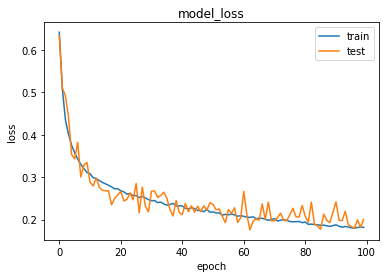

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

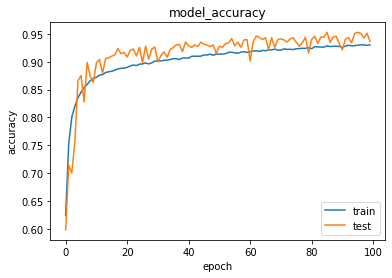

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
accuracy_score(y_test_xg,y_pred)

0.9351849910910806

In [ ]:
confusion_matrix(y_test_xg,y_pred)

array([[21497,  2356],
       [  736, 23116]])

In [ ]:
print(classification_report(y_test_xg,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     23853
           1       0.91      0.97      0.94     23852

    accuracy                           0.94     47705
   macro avg       0.94      0.94      0.94     47705
weighted avg       0.94      0.94      0.94     47705



# **Conclusion**

- In this project, we used different algorithms like Decision tree,Random Forest, Knn, SVM, XGBoost,CatBoost and ANN, and selected four best performed models.    XGBoost, RandomForest, CatBoost and ANN were the best in terms of precision, recall and accuracy.  
- Feature importance method was used for feature selection and SMOTE resampling method for balancing the dataset.   
- Used Hyperparameter tunning on each model for better results.        
- XGBoost with Hyperparameter tunning performed well with accuracy score of 98% and F1 score 98% with less misclassification rate.
- RandomForest resulted in accuracy score of 93% and F1 score 93%. 
- CatBoost with hyperparameter tunninng using RandomSearchCV resulted in accuracy score of 98% and F1 score 98% with much less misclassification rate than other models.    
- StandardScaler method was used to scale the data for ANN model which resulted in accuracy score of 94% with F1 score for 0 is 93% and for 1 is 94%. ANN also has better tradeoff results compared to all other models.
- Used K-fold cross validation and trade off concept to check and handle overfitting issue.


Thus, we can conclude that our CatBoost model provides more accurate prediction which will allow insurance companies to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.Car insurance company’s claim predictions can raise the cost of insurance for good drivers and reduce the price for bad ones.